# Canny Edge Detector

Having seen how the Canny filter works in the 1-D case in the theoretical exercise, we now move onto the 2-D case. In 2-D, the gradient magnitude is a measure for the strength of an edge, while direction of the gradient vector gives edge orientation. Edge detection can be done by thresholding the gradient magnitude, though this generally results in thick contours which are poorly localized. To thin the contours into single-pixel-wide lines, one should use non-maximum suppression. Pixels in the contour are kept as edge pixels only if its gradient magnitude is greater than that of its two neighboring pixels in the direction orthogonal to the edge, i.e. where the gradient is a maximum.

In [1]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter,convolve
import matplotlib.pyplot as plt
from scipy import where
import cv2
%matplotlib inline

In [130]:
# hyperparameters
g_sigma=1.0

In [167]:
### Read Image ###
path = 'C:\\Users\\lukaszbinden\\git\\ethz-iacv-2020\\exercise_1\\'
# im=cv2.imread(path + 'two_lines.png', 0).astype('float')
# im=cv2.imread(path + 'zurlim.png', 0).astype('float')
im=cv2.imread(path + 'lenna.jpg', 0).astype('float')
# im=cv2.imread(path + 'cube_left.pgm', 0).astype('float')
# im=cv2.imread(path + 'cube_right.pgm', 0).astype('float')

In [168]:
def img(im, title=None):
    print(im.shape)
    plt.figure(figsize=(10,10))
    if title:
        plt.title(title)
    plt.imshow(im,cmap='gray')
    plt.show()

(225, 225)


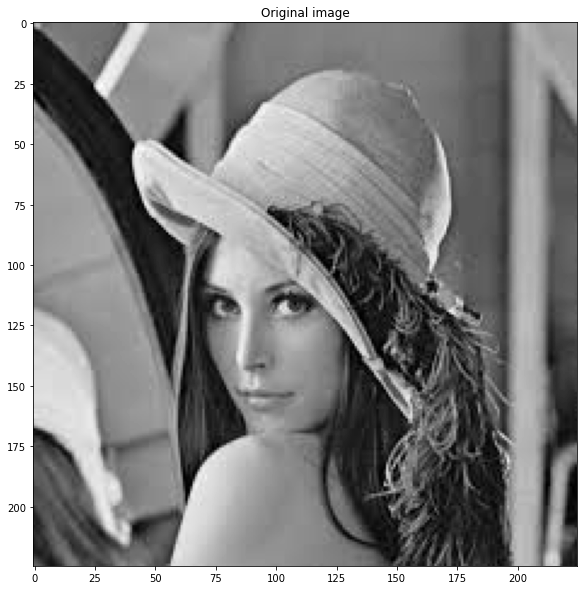

In [169]:
img(im, 'Original image')

## Gaussian Smooth Image

(225, 225)


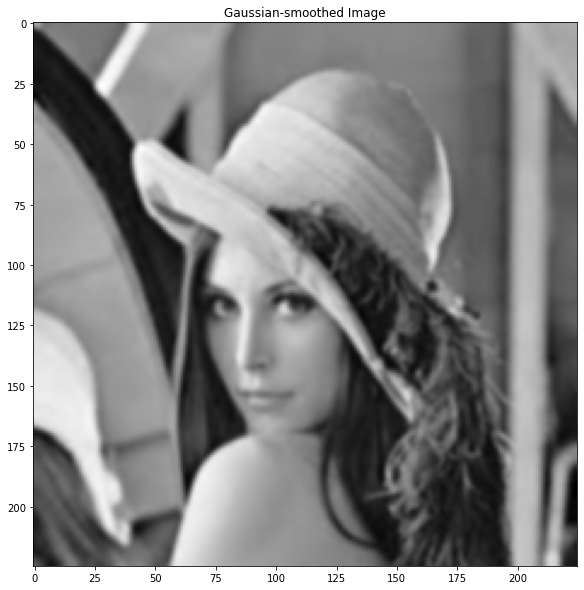

In [170]:
####### Gaussian Smooth Image #######
# TODO: Implement Gaussian Smooting
# Useful functions: gaussian_filter

blurred_im = gaussian_filter(im, sigma=g_sigma)
img(blurred_im, 'Gaussian-smoothed Image')

## Gradient Image: 

(225, 225)


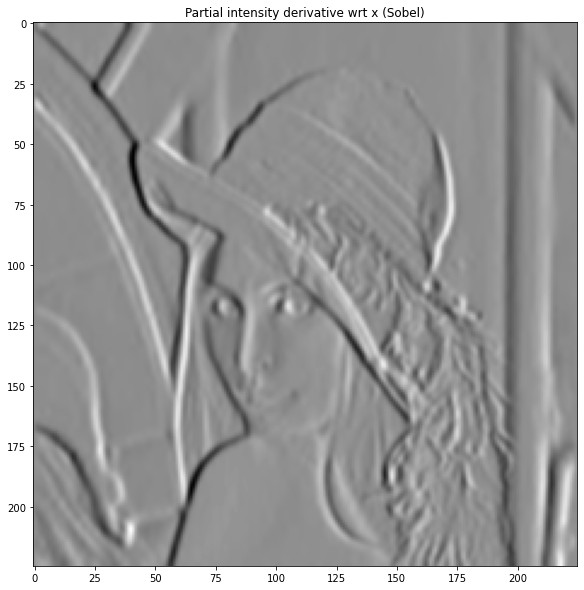

In [171]:
###### Gradients x and y (Sobel filters) ######
# TODO: Implement Gradient along x and y -> approximate partial intensity derivates 
# Useful functions: convolve

sobel_mask_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
im_x = convolve(blurred_im, sobel_mask_x)
img(im_x, 'Partial intensity derivative wrt x (Sobel)')

(array([   50.,   113.,   538.,  1714.,  4417., 35281.,  6284.,  1634.,
          521.,    52.]),
 array([-569.02267699, -466.56690898, -364.11114097, -261.65537297,
        -159.19960496,  -56.74383695,   45.71193106,  148.16769906,
         250.62346707,  353.07923508,  455.53500309]),
 <BarContainer object of 10 artists>)

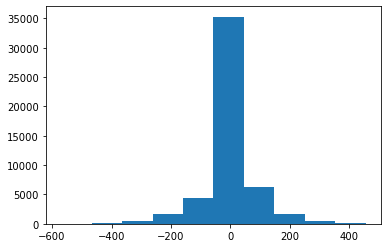

In [172]:
rows, cols = np.nonzero(im_x)
plt.hist(im_x[rows, cols])

(225, 225)


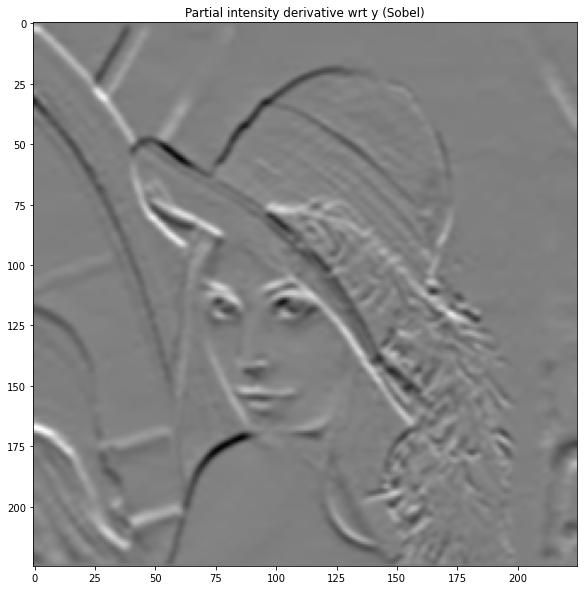

In [173]:
sobel_mask_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
im_y = convolve(blurred_im, sobel_mask_y)
img(im_y, 'Partial intensity derivative wrt y (Sobel)')

## Orientation Map
At each pixel, the orientation of an edge can be obtained from the direction of the gradient.
Note that edge directions α and α + π are equivalent. The resulting directions can be coded as
grey values.

(225, 225)


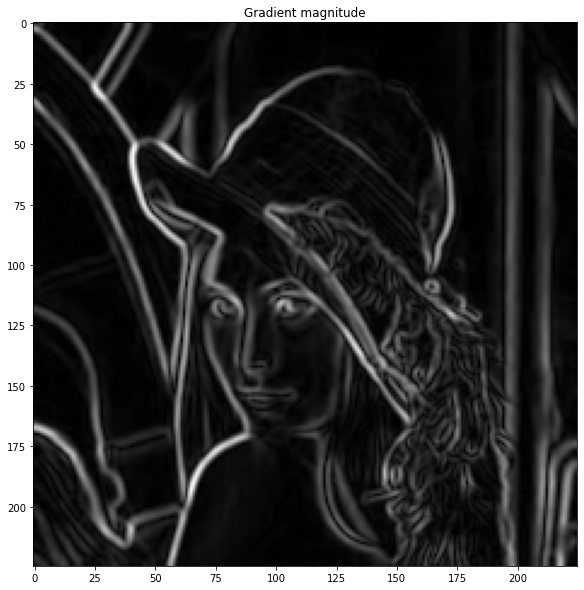

In [174]:
###### gradient and direction ########
# TODO: Implement Gradient Magnitude and Direction

# https://en.wikipedia.org/wiki/Canny_edge_detector
# other approach: use directional derivatives from finite differences (cf. slide 13)
gradient = np.hypot(im_x, im_y)

gradient = gradient / gradient.max() * 255  # range [0, 255]
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAkgAAAJOCAYAAABMR/iyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/d3fzzAAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOz9e7Ct27YXhP2+Mcf7NV9rrb332XuffQ73XizJrQpJpVCDMVoafBJjlVqAgQQil0iovEBQUjEE1CIGQ0hVgl41MRF8oEhAuRFIlBhRCQgmYEhEuPfcc/ZjPeaaY87xmmOMOceXP+b69fkbbbXev+8bY8y15t5ntqpRY4zv0d+9tV9rvfXWszzP8UiP9EiP9EiP9EiP9Eh3VHvfBXikR3qkR3qkR3qkR3po9AiQHumRHumRHumRHumRDD0CpEd6pEd6pEd6pEd6JEOPAOmRHumRHumRHumRHsnQI0B6pEd6pEd6pEd6pEcy9AiQHumRHumRHumRHumRDD0CpEd6pEfairIs+5ksy/6mN79/c5Zl/+z7LtO7pizLJlmW/Zw9ppdnWfaj+0rvkR7pkbanR4D0SI/0DaQsy35JlmV/MsuyaZZlL978/rVZlmX3kV+e5/94nud//67pZFn2nTcgob6Pct035Xnez/P8LwNAlmX/fJZl/+j7LtMjPdIj7YceAdIjPdI3jLIs+/UAfheA/yWADwF8AOC/C+AXAmhG3jl4ZwV8pEd6pEf6GtAjQHqkR/oGUZZlhwB+K4Bfm+f5v5bn+Ti/pT+b5/nfl+f54s1z/3yWZb87y7KfyrJsCuBvyLLsb8+y7M9mWXaZZdn3syz7LSbtX55l2feyLDvLsux/Yu79lizLfo/8/6uzLPv3sywbZVn2/8qy7K+Xe388y7LflmXZn8iybJxl2R/NsuzJm9v/7pvv0Zvlq7/GqeNvybLsX82y7Pe8ef/PZVn2c7Ms+4ffWMu+n2XZL5Lnf2WWZX/hzbN/OcuyX2PS+41Zln2ZZdkXWZb9/brM9aad/rdZlv3hN+//ySzLfkTezbMs+9Esy34CwN8H4De+Kfe/offl+Q0rU5Zl/6Dk/atMuVpZlv2OLMt+Nsuy51mW/VNZlnVsezzSIz3S/dAjQHqkR/pm0V8DoAXgD5Z49pcB+McADAD8ewCmAH4FgCMAfzuAfyDLsv8GAGRZ9vMA/G4AvxzAtwCcAvjESzTLso8B/GEA/yiAEwC/AcDvz7Lsqcn7VwJ4hlur1m94c/2ve/N99Gb56j+IlP0XA/gXABwD+LMA/ghu+dnHuAWI/7Q8+wLA3wFg+CbP35ll2X/xTVn/FgD/YwB/E4AfBfBfdfL6pQD+52/y+s9w22YblOf5TwL4vQD+iTfl/sWRcgd6k/dvAPBfA/Bjb8qg9L8A8HMB/Pw3ZfsYwD9SlO4jPdIj7YceAdIjPdI3i54AeJXn+TUviCVnnmXZXyfP/sE8z/9EnufrPM+v8jz/43me/7k3///fAP4l3AGGvxvAv5nn+b/7xgr1PwWwjpThvwngp/I8/6k3af0xAH8awN8mz/wf8jz/T/M8nwP4fbgFAVXo/5Hn+R95U89/FcBTAL89z/MVgH8ZwHeyLDsCgDzP/3Ce53/pjSXt/w7gjwL4r7xJ5+99U5b/JM/zGW6BkKV/Pc/z/+ebvH7vFmWNEfP+83meTwH8Ft544yv2qwH8j/I8f53n+RjAPw7gl+wp70d6pEcqoEeA9EiP9M2iMwBP1Mk5z/P/cp7nR2/u6Zz/vr6YZdlflWXZv5Nl2cssyy5w67fEpa9v6fNvBPpZpAyfAfh73oCyUZZlIwB/LYCP5Jmv5PcMQL98FQEAz+X3HLeg8Eb+g2lmWfa3Zln2H2ZZ9vpNWf62WL3M732VNUY27+/J76cAugD+I2nDf+vN9Ud6pEd6B/QIkB7pkb5Z9B8AWAD4O0s8m5v//yKAPwTg0zzPDwH8UwC46+1LAJ/ywSzLurhdZvPo+wD+hTzPj+TTy/P8t29Rpp0oy7IWgN8P4HcA+OANUPwpbNZLlwo/xfbklX2GW6BD+lB+b7QpgG/L71e4BXr/OWnDwzzP9wXOHumRHqmAHgHSIz3SN4jyPB/hdpnof5dl2d+dZVk/y7JalmU/H0Cv4PUBgNd5nl9lWfYLcOsnRPrXAPwdWZb9tVmWNXHr5xPjH78HwC/OsuxvzrLsIMuydpZlf32WZa7PkqGXuF2621dsoSZufbJeArjOsuxvBfCL5P7vA/Arsyz7K9+Avl18fJ7j7XL/xwB+2Zt2+Fuw6eP0+wD8t7Ms+3lv8v6f8Uae52sA/wxu/aWeAbe+XVmW/c07lO+RHumRKtAjQHqkR/qGUZ7n/wRuHY9/I24dlJ/j1mn5NwH49xOv/loAvzXLsjFugcLvkzT/EwD/Pdxamb4EcA7gB5H8v49bC9Zvxi0w+T6AfxAl+M0bP6B/DMCfeLO09FcXvVOQ3hjAf/9NXc5xC/r+kNz/vwD43wD4d3DrgE2n8MUW2f1zAH7em3L/n99c+x/g1qF8hNtdbrzOvP/XAP7tN3n/2ya93/Tm+n+YZdklgP8rgL9ii3I90iM90haU5fleLdqP9EiP9EhfW8qy7K8E8OcBtNTR/ZEe6ZF++OjRgvRIj/RIP9SUZdnflWVZM8uyY9xurf83HsHRIz3SIz0CpEd6pEf6Yadfg9ulwL8E4AbAP/B+i/NIj/RID4HubYntjUPi7wJwAOCfLbmD5ZEe6ZEe6ZEe6ZEe6b3TvQCk7PZcp/8UtxFifwDgTwH4pXme/3/2ntkjPdIjPdIjPdIjPdKe6b5OzP4FAP4zOeX6X8btrhYXIB0cHOT1eh0Ea1mWhc/BwQGyLMN6vQ6fm5sbrNebQXwzOaSc6fwwOKBrW/G/1p+/Dw4OcHBwgHq9jk6ng1qthnq9jlqthvV6jevra6zXaywWC1xfX+Pm5gbX19chHZtXrVYL37VaLdwH8FZf5Xn+Vn+VqZelh9yf2v6APwZtP+m3/tb2ZH/yw/bUtG0atp2qtNtDbuNHeqRdyeMr+3pX5867mEcxHqJ8X3l2vX4r7sm7veeV13gf8vGitojdL9NGniy/Z3qV57kbgPW+ANLH2IwQ+wMAf5U+8OZwx58AgHq9jk8++QQ3Nze4ubnBwcEBWq0W6vU6BoMBWq0WZrMZJpMJlsslzs7OsFgsmE4Q1MCmcKaAlzzDt9dR7HwdQCQV8J5getfEMh4cHKDZbAbAo2Dy5uYGy+USeZ7j6OgIw+EQT548wY//+I+j1+vhyZMn6Pf7uLy8xKtXrzCbzfCX/tJfwmg0wmg0wtnZWeiTPM/RarXQaDTQbDbR7XZRr9fR7XbRbrcD+Lq5ucFsNsNyucR4PMZ4PMZqtcJ8Psd6vXYHfAqA6TN8n599TNKy5IFQlqder4e25zME8VrWRqMRACWBP795jf2ZZVmYA9fX17i+vsZqtcJoNMJyuQzpa1oKqFhP9l0RSPUAnb22jeKR6qMYwCt6PlaGMvPRvqd9Zp+5J+v6Tu9vO3b1O1a/KgCgzPNlqYyg3CYNrbenSJZJQ5UVq7joezrH9FNUtqqk5ee8p6LLMq7XayyXS6zXazSbTTQaDbRaLRwdHaFer6PdbqPVaoV08jzHarXCer3GarXCYrEIyvLNzQ2urq6wWq2wWq1wdXUVeN7BwcFGmXQ+W6XZtg+ADWVP2zvWtjGlc1uSdL4Xe+a+AJJX6o2WyG8Pd/xJABgOh/l3v/tdrFarIJAV3CyXS6xWq/DtCdSyTM1jFny/bGPvOrh3YXL8zYGkaa7X6w2AxGc5iVqtFprNZhDo+h6FMC1JFswocNGPTk6SBTK2HmUZbapP7PVthGOVd710ipitN05jH+1PZTBqOdJ2TeW7D0ql4/XhIz3SI92RyqX7UKR3SZO8pWpeHjCsygu8dimj8Fp5vQt5+cfovgDSD7AZQv8TAF/EHm42m/jWt74VBPTV1RUuLy9xc3OD1Wq1oUETIHmCxNIuA1SF0K7CwBPm22rhVqOxwIRp20FXr9fRaDTQaDRcgERQarUfWw5+aO3QJTamp9qCB5Ji7RAT+LH2q6rxevlvQ6kyx8ZhFZCkaSlYLWrP+6BtrQ3fBHoEgj/cVNayWZTGuxpD2yiNwG4WYQ9o7AoMUwpgrD2r5lW2X+4LIP0pAD+WZdl3AXyO2xOof1ns4VqthsPDw2A9urq6Qq1Ww3K5xHw+x3K5xHK53KoguzJya9Z/n4IhheT1t34odOv1OprNZrAgEdQQGBGIKlCywphCnOCIAAm47cOUtYPv2zb0ULwFdzFLVNn2ik2EXZcY+E7KglQWGFmLoK072zQGkixT2QdTfgQHj/TDRGWF5n0J4yrp8Vs/er+M8gn4fDeWZ5k0qtbBplPGsrMvGfzeLEh5nl9nWfbrAPwR3G7z/9/nt0cVuNRsNvHpp5+Ggs7nc4xGIywWCzx//hzj8RiLxeIt4V+1w1KINNXouwzuWLpVJ6MHjmIAQtun0Wjg4OAA3W4Xw+EQvV5vYw2a4Ojq6gpXV1dYLBYBLFEYq9WIlqhms7nxX53nuWSn/7dpp/sQ0Cnto6ompZYz7U+1oBFEKhBSQKQ+SAo+gTu/N13+pBJhraf7BO4x8LVPesjgS/tyF+uzl26VNPatjD3kNr8v2kcbVrUkeby9jKW5Sjn2TTEe7Sl0pJhSpktvXtvZex4wqmI9uk+6LwsS8jz/Kdyeml1IKiiy7NaHptVqIcuy4GTGpSEKHRXcsWWAPdVj72mSqnZ42YmqA45CV5fYVLiqzxdBkTr2Mi9r6fAc2cssrZWt87uy1m2TR0pbK1qSKrIkWSbCtMoqB6ky7IPetxX160Dvg5E/Upq2sfrsI88UWL6PMfI+xp6XXxGfUL6pwKvMe/swWJRN494AUhW6ubnB5eVlEOA3NzdhZ9TR0VG4DiDs5FksFuEDILqkU4a8Rn8XWnQRxVC0JSsQ2Ra0HLXbbRwdHeHo6CjsCjw4OAhLl9whOJ/PMZvNghWJPk20QjWbTbRaLbTb7Q0LUq1W2wBZtErFLEhltKmy18pYnrbRAMvc95wdU8DSWpIUFKk/F9O/ubkBcGtBWi6XG1Y5z4oYo5TpvIhiy3m7CJCHCh62sSTeB9n5bMdv2fL9sAJZz+pe9d0q91KrEPsCSbGVhJh1p6jMHpVV6mLP63ULeDwwxLSL3AV2qVOMyqbxIADSer3GfD7fuEbB2+12QyMul8sQp4dxkyjIgd0ZWxmgVDW9ss+k8rHpxACGtTgAQKPRQLvdRrvd3tiSr6CGQOnq6mpjKUeXiAiG9GOtfmqNqrq8lgJEsfv3OYFSaXkWJOBtMJGyEnnXYuEl2K7WspeiXa1IRflsuwT1vsFHjLw5ts+y7gooq4L8R9oPbdvWOn6+ThbFImXWs5bHVhLsPQVJOqatFV7Ted/0IADSarXCF198gU6ng1arFbaPAwjO2fV6Hf1+H81mM1iY2LCMs2MdjPdN+9JELO2rrByY9GNpt9vo9/vh0+120Ww2AdxaJRaLBWazGWazGebzOa6urkIoBY2xw+VNxtPQuD/AXTwLu0y3r11X+2qffQgZLw2rMek9DwBZcMTnLNiyoFPjdJEsINP/9708/HWnIgvDvgTbN6GtHjqlrDj7Sn9b2vc8LGspKltm8pUqfkjqn+pZniwf8oBWzNK3rfJ1H/QgANLV1RX+4l/8i8HC0Ww2MRgMwrIOA0c2Gg1cX1+j2WxiuVwGwU3LB4DgYKzCpwxZdOvdj117F2CsaLCo70+j0UCn00G328XJyQl6vR4ODw/R7/eD5W29XmM2m+Hy8jJ81FEbQLAa0Q+Mlihd8ry+vg7giGEYCLI0inbVNqpiMSoiq6mk0tomD+sfBMBdTvMsRgA2HLmVdIehF//LK8e+x2RqufLrTKlxsA9gdN8C+5Hepl1AQtl0ddyUsbCmaJelUgtYbNmqjmH7rGdJ8uZMkf9Ryvrp8eWqJy7cNz0IgLRerzGdTsPuJ7Ui5XkeltvUogEAnU4HV1dXALBhGdlHI5cZYEUTpMzkrDKIiwQ8y0xgSYsPQQ2tPrRKcMlSY01phGa7s8pu7ddBzTTfZ8yeFMUm5n3naZmA/a/giVFwAd/h3ZqlSVbjeihtbumhluu+6CGDox+2vvg60zZAu2z/plwbSN4yWVG5qvot7qKU3Kci8iAAEpfYGOm52Wzi8PAQjUYDh4eHGz40BwcH6Pf7ABAsJfP5HAcHB1gsFri4uMBsNgtLSJ5PiFIV35+qVGUAVSGmqbGHVNh2u10cHx+j1+vh9PQ0LLHRAjedToOz+/n5OUajUTjGhcdYWJDVbDZDeAACJ/qA0Y+Jljx1KC4DknaZGNoesbZKgRSvXcuU0/p7eUzFHitinbW9sjFNjW5OZ23gzjJVhrHFyla1jizfLhQrw0MCEQ8BYL6LvPdpnX2otG/LUZk0q/jQ7NNtwPKRXfwPU/PU5hV7ngq23k8pqEXlLyOzy9S1qNwePQiAxOUeClfusqLVA0Bw2AbuHLjb7XYAB51OB1mWBT+aXQHIvrRyDyQVpVUk8GPPcKDxWBECy3a7HaxHXA6j9Uj9juh7pL4u6pxNC5IdaBqfR52z7dLaPnyRYktLtn28tkl9lyFrNk4xxBgA8j66FFyr1TYOCdY2tGmmGMkubW1B1X2Bo3dBZbXLonH1SF8f2mWOlxkvVfn5fdE+Vyj2wadTgCbFl98VON+mXg8CIAEIB+XpEg+BEK0UtVoNzWYz+NLQP4mWkcViEd7j0huPK6EW7mkFRebAMoI5RVXRrb3moXf+phDNsrvDTfv9Po6OjtDr9dDr9QJ4ZBuNx2NcXV1hPB5jMplgOp3i6uoqBCBkIEh+6P/F7f5q4VgsFgFs0frkWY+qDk6vX6pOpFhflzUTaxpF1qMYOPIsRpYpaJ9y/Gu4BNXIYg7a3v+ytE0f7UMo7JMxpuZnDNBWoapL4fuibYXgN80itA/apU2qgqyy6e0bXMXSK5NPytocU+483kH5wFUG5btMy/73wGzZMsdoH3PgQQAkNii1ZfoR0XpE4U1nbVpEeGwGg0rSclSr1TCbzYJVRGPHxBotpjF7YEmf23WAFwEjfscAEnBn0my1Wmi1WgEgdbvdAJDoc0RgNJ/PMR6PMR6PMZ1OwwnOBKUESQRGekSJgllG4VaAVHVLepW2KaIyGuAuDMyCI/s7Boy8KNp2+Y3EeUCwqff5XSa0xX0BnodgWak6NnZhpFXrW9ZqFStLTBOvUq4irb1sHvt4733SruV8l/UsoxB6CpaXTor3Ku/QHWx8vijQr5VDMQXL8kULivQde113ycXq6F1LAaxt+vJBACRLaqFYrVbIstuls9lshvV6HaxD9IcBEHxmOp1O2FnV6XRwcHCwsWRB0g5KaZ9FAzEGklLvF11LASTvfQpQdcqmvxAFMMEMrT0ENLrbTIW2jXuku6zYPxoc0jppaxs8FNK+9ixCZayGsXf5vgdiPaZWFIlcP7Fz2vh7F/N4ygqVmhfvg/ahkHwdqGw9U1aIImGwC4B7V7QN0EzxyHdVhl3pvvNL7e62G5yKFIsiPlk0jmOAr+z4LeJXtjxV2/bBASQ2+nK5DJWp1+thmY1niHU6HQyHw/BOr9cLjcUt7gRWWZZhPp8HgABsOrt6SyUeQgbinV4ECjwAFLsXA0h6TfMhqBkMBjg8PMTp6SlOTk7CEtnBwQFWqxXG4zEuLy9xfn4etvjTYZuDhxYj3dLPpTueEXZzcxN2v83nc8zn843o2/dlPbL9UBZ82jRiGlbZPtKy2PHixTyyv2M7AQFsLFHSAmqDcmqZtln6sWW3bfG+QEgZ5rUPkOTNq33TroLVE/RleMvXkVJ9ug+QFOMlsTldtRyedaTsGNVni+RCqmxFCn3R+8CmZUl5uOUP5GOat7UkeTwmVhadh1yW80LD8LmYocPm471flXc8OIBE4pIYrUHqV3R1dYVarbax44qd1mw2wxIQwVSj0dg4OsNSkTWpjCVhW4pNghQ4svlnWbZxFAh3nTUajY0z17i7jN8a2JHp6M4rtR7phNDDaK1zdorReXV415SauNumRYpZjuw1ki6bqeamDKJIKO7TqhJjYt8kq01KaL6r/KsIz23fvS9KWa0eIu3Sz0XgbF/9UXVMvKuxW8WKWfROmbZMXY/JQZUrqRWdMmXw6EECJCsYCJJubm4CSGq328Gq1Gw2MRwOg1Dv9XoBidJiNJvNMB6PQzr8eFuui4idwDy03PqM99s+R4pt/Y69x+UXLiu2220cHx/j5OQEh4eHoQ1oiaDFaDKZYDKZhKCQtNQRTKljNp2z1fdovV4HXyb1P9KlOi1ragnHa9eylAKtFvDGyuBdL9OHMQ3IWou8D4C3zlyzPkdeW3rlKjNO9H7M8klA9nWhIoGyL0uLtQwUpR/LK2UZqEq7CvxdyKvTQwJKtnxFbbUPQVpWMNvyeemkrsesYPwuspwUkabFDU3kC+ofbK1Vtq2yLHtL2fMsTLG6qpUoJQ9tm2oeqT6pqqg/GIBkG53/1X/o5uYmLDfQigRgIwK3OhMDCMK8Xq/j5uYG8/kcWZZtWJS21SqLJkYszaLn7eT2Bj+XsrIsCzGi+v0+BoMBer1eCIHA2ET04ZpOp2FJjJYkjVjOJTY6ZushqhrVmelaR/h90rZWjDIgyT6f+q3ve0w4BYZsfezRIiS2n3Vyt4LIlqUs87Hv8lmda9toWPuibcALUB6Ae8J927puOy73SUVleJ8AJtWuqf7ZpayepeEhkJ1vKbBcRo6UUQxTlPI/srzA+3jlsrzRq1OKz1hezWtWNqdkaQwcVeUTlh4MQCozAIhsueNqNpuh0Wggz28dspfLJXq9Xkij2WyiVqthMBhshALgspKeG1Y0uGICz0PrRSg1pV3Grnn5cCdfr9cLO9Z6vR6azWYoB4HQfD7HbDZ767w1phU7jFaX1rhMR2ClwMjG63nflGIYKQtLWW3LY3QpcGTz8qwS1jnbA2secykDAvdF+xK89zVGYnNy23zLApGid6vm7QHibdKJ9dc246Xs8ynBlKJ3MYZ34VFl+ENZZSzF99Xq4j3r8Q5P+SlLHviJAaQiwMTyWYXN1inWlsrPUrxyW8BTlR4EQFLNmv+BtxtXowozHs9qtQpxftrtNoA7p+Vut4s8vz16gwEo6cvE3XDz+TwsM9kgiFoe22mx+95z2nm206syTaZFEMNo2b1eDycnJzg6OkK73Q4WH1qNLi4uQpRxhkDg0iV3wNE5W6Nms3y6tEbHbAuS9k0xMFDl/RTZ9LyJmCoT+7nMspqSF8sotSPQal+2/J4wKhIEHqOrYhnZJ8DZV1pFc9T7n1JidgEmRc8XKUFFylVZ4FZ1vuyzL7ah+wLOMYFaxiJTtl3KKGRFwKgofdv/nuLk8YoyRCUtBoZUcVN+7ykgKjeYtr5XRs4WKZtledS2gB14IACJZCe9BR6sHBuZArper2O5XIagkqvVCsCtczYtLcBtWIBOpwMAG87cfJ752vLsk3HsSiyfHiRLnyH+1p0A9gBZPW8NuAOn9uw1Ba1se91hFRPi22i3RfV9X21fBZAVTeYUWUWgioa0q9b9LqxO90la/yJQsUva27xbtSxlrT1V51hZoPdQeNy7pHfNX1L5pcbbvsu4D2UzZRTw0q9qgdsFHO2LHgxAiq2Neh1AwTyfzwMIoB8NLR2dTidYj7hVPctunZHn8zkAYD6f4/z8HAcHB8EB3DKiMlYj/W8pZj2yoE+fT2nCfL/b7WIwGOD09BQffvghut0uhsMhut3uxpLa+fl52N4/Ho83AjpqQEgG37THkygo4tEkXKZTsJUymValmCVn20mxy2SK1SlmKSrDAGzZ7AG/dgdbFcuQff6h0z4Y/y4AIvZ8mXaummbq2Vj5bTmKhFAs7xhQ+jqNlYdK+27Hd90nMTkXsyJ5lmcrCzVtpqVp2vy98mg5bJm8e6n5kJrPqfZ+MADJsx7pb2tJyvM8RBkGbnep3dzcbJw7xlhItLZwCY4H3tLZm6CB+dly7aplxAaP91zZycHlsE6nE3yQuITIrfxcElNQQysSAxDabf0MD6BxjxjJnBY7BUaxrf0xkPN1pzIWAG/CF5HHjOx9L12dF3yuqPxl+2JXkFBE+0x335bLbU3y21pnYgKhzPNFguGbDoS+SZavMvzlXeSlFFPUUkpJkcHAA1ep1ZsyFvX7GOMPBiBVNS1akLRYLHBzc4NGoxEcsLltPc/zEBOJlqTDw0O02+3g00S/JD3/ivncp4Cw4Ck20PgcQdBwOMTR0RGOjo4wGAyC3xF9q3iECI8T4c417grMstulR42+rWewMV+GCWC7qIO3XU9OWb4essWjatnKWouKiBoZf8esRqmypNImbWNReddLD/dFuwqcd2FBir1rFcV9pP1Nocc22D9lWRZdyUkpb6n0POBfBI70fT6fZdm9+LkW0YMBSDaIYxktXP1gaAUBEKxCBEb1ej38JhAAECJI8+w2Wl5ms1mwKAGbaLkq6vau68Cw4MhbtqEgrdfr6HQ6aDabODo6wtOnTwNIYhwjLhWORiNMp1Ocn59vxD5iuezRJEyXTtpa3tVqFY4n0V2AMROrXitDKe15F/BUdvkhRUUWgRggrJJvkfXoXdK7EjxlLSrbtMU2dbBm+G37YNvxVXZpoKymvo/8HyJVad+y1rOvmzKQkpNViUp12TTL8CjyRD2w1ip/FhyVsY5r/u+KHgRA8sx1sUFr72mQPQDBckR/mTzPQ8wktSgRTDHQ4nq9DtYlDdRXBrVuy6RiS2/eYMmyLBzWyw99hVg3gkX1FfLiFPF5u62fS5Mc3Pa8NetzZPtjF5Bk2+XrRlUZlZ30u9DXsb0eklDSOfiu2nLfQOeRHmkfZOVRWcWtyNKuqyB8vqyl2lMU3tVceRAACbizIMUErZLXyLptXYMgEhDRiZlmRIKhPM/RbrcxnU7Du7RG0YeHecXKU9RZnqlRO5z31CdI01VwdHJygm63iw8++AAffPBBiKINIFiJXr9+jRcvXgQnbS6vMdAmD7FlgM1+vx98srgLjjGjrq6uMJ1Ow/Z+Wua8bZ5V28XSPgd9kQXvfdJ6vQ5hKtiW3vbaqpRanrPPFNH7Ftjvqp/eF1DZxrqq174uYGqfAq2K9f7rZhnblfYxV7wDtEnKq4ryszItZgEqsvBbYPQ+gNKDAUgeACljReJ7enYbgHBWm1qQ2u02rq+vN84Xo7MzHbwBBCdlBpDcthPsMppej5kV7dKaLokRwOhOM93WT1DjWZAU0FinbBsYkmZXazmKnbf2rgbrvoTmQwBJpPdpPn7odJ9t8VD6vyrdh7XrPtr5fbVvFcvEN4XedT3LWn3023s/ZlGKvfc+6MEAJM/KYpmAZ1Wya5z0j6Egp+CnjxGAjS3/tKQAwMnJSdix1Wg0MJvNwvKdHuq6bb1iYI8WIrUgMd/1eo1OpxO29T958gS9Xi9s6c+yLFjLLi4uMB6PcX5+jouLiw2QxPoSEDYaDXS73WBFog8Tl9Xoi8UjSuiczaXMWF3Yd1UpZfGx//c9eVKTMgYG+XvbsqjliP+rWo+8ZbpHgFU+FMJDYcJl6L7K+jhe0vRQx4nHe1Jypug5tfTErD6WNxUtl8VkX5kVlyLrks33vujBACTPez5Wca/RNXgkcOfAzaCHtLTo9ngAG6fec7mNcZXoy0QLijLeKp1iLUOxAaof9QGq1+vhnLWjoyP0+330ej10Op0AZhaLBcbjMUajUYh5pMeC0CpGx2yNecT/bD/6MREg2eNJYhMx1i5F/VgWHN03vS9h4TGfXa1JnnZWle6b+dy3tlg07qqmUea9XZYA3pUgftdC/+sEwh4qIIrRPpfWqixhMu8YkLGAyTOAbEMxUHZfY+zBAKQUlVmr9DqXoGm5XIaz27icNp1Og5WJ4Ii72wg8bm5uguWJ4QRiZ2R5pMDIAiSv/JapEjTyMFqCok6nE86gW61WmM/nG0eALBaLYO2hdco7a40fBacEg1ya8yJvx5C8R/vwh/Hee59MzOu/ssSyeyde83cqL5vOfdN9g6RtaZf6l33Xs17GyJsTVd9LWSu3oaIy3Fe/xiwb2+T5EIHcfc69bQX+PpdevbFcRVFIKSZFil9qedQuwdkylZlnnlKWeu9BAKQsyzbMep7AiDUc/6vTK99TUJNlWVgq486vTqeDo6OjYLXpdDpotVrI8zwsPQHY8GWij4/mXcTkiND1JHe9r88ocbv9cDjEs2fPMBwO8eTJkw2AtFwuMRqNMJ/PcXZ2htFohIuLixBlnOBIjySh7xJ/s1yMobRarTCdTjGdTjesUMAdaGNbe5ryvoRqKp1drCK7lskDvdukbU3X1pJUph2LAOiuVqQi2qafdwE23v+HUK/UOC3DuGPW2DJ1Sz3jgSRvXO2jLauW9T76774B1ftUzlLAYVuy48yTUTZ/rxzeOPfknPI4yvwii5P9ned5kOnqolC2vlXoQQAkUspk5pnUYmBJn8nzPFhSGOeoVqvh6uoqXLu+vg5AgtvfCSjUcZsAyyJhDxzELFwpy5dNV0MT6FKY+guxTty5RzCj1jFakXR7Px21FZhx4Fnn7BT4uU8htW/aBziy/7dJMwYsy75ry1JF890X7Tutr8P4qUpV2si2QZk2uQ/r3rtUPLZ9x6vzNxkYPXQqO1b5rXLT688ySl0KK+yTHhRAUvIEiKLGmLDyGpdpcKltsVgEEATcLiu1Wi0Mh8Pgp6QxgWgxms/nuLy8DO9wy7uXLz8KQjwUTSI4IUCp1+s4OjpCq9XCkydP8OzZM3S7XfT7fTQajeA8PR6PcXZ2htlsFpy0GRWc+asFSc9Zo5M6z7O7vr4Oy3W0lhFc2tADVRB70bMxbUXvxZYIUhNon6QT3PZnlfxsn8esR7b+nsbmfdvyeoLXAl6bTkrx2Idw2oewsfOuCnnv2XGaYtxF5eK3B2ZT1ptUnWKKSEzweOMsVV6bXozuEySUTTv1XJXyFY2B+6SUkuRZToqswUXKW5W23baPY+OPZFeJ9D0d3x5vtXKV71hXBa8+u9CDA0ixQZqa5CkLjXaIWkUmk8nGIa03NzfodDrBL4fxk9brNZrNJubzeXDapq/SYrEI0UJt/tqZBBfe8pQd7ARIWXZ7rAhjFPE4EW7Ln06nWCwWmM/nmE6nmM1mAdwwQjjz9nyQCI5055q1RunOPbuzgfXw+kK/t2U4Zd8vK2z3wfzs5N2VmVjzcBHY8dLwylimn2LP8vldGEtKwL9v8oRGkZaaeiZGOsdj+Xo8zQO09p2YYPe06lS7V+mTsnOsiMoKsX0BsdgY3yfQ26UdY3OtCCTneZ484N2j2PNlKTVfYvWIKQlZ9rYfpv7WsnrgqIycic25KvSgAFKK4cc0aO9/jAmqlk7ryGQywcHBQdjp1Ww20e12Q3qNRgNZlqHf72+cbk8AoctZOhjU76hIKwQQLDUAgn9Qv9/H4eEhBoMBer1eAGY8ToRHiNBqxN1mNzc3G4fQHhwchN1r3LXHZTrgDpTxrDXvOBGvXcsK4yJwUmXQxsbCfTJZTasMMEoBfBsqwlqOylBRm1cBg7sCx7JaagpsVO07299FvCEFimIKVZlylClfaqwUtZdNU8sYA0mx8rwL2jafMvwd2L4vUnkW8SULVlNAdZuy7QLC+U4KLOyDB5bpG3s/FRKH6anSHcvD3rc+UkVKTpVye/RgAJJFkKQygqiI8erAobVkOp0G8HJ9fR0iabdaLazXa3S7XdTrdXS73RD7Z7VahQ6az+cBUGisIX50yz6PNUkJTt5jpOtut4snT57g+PgYp6enODo6AnAHZiaTCc7Pz3F+fo7RaBQiXtPSpcCIFjE6odNqxnJxaW21WoWlNQIttp9tWwVXZaisIE4xi6L+1rz2QR4g9D4W4MTy96yF2v/247V7bAwVUVmrkt63y6pKZYGRfSfVTikgw3KUESpl0/X4w7aappaPZJl5VetJyvIXe07bJga+i9J9H1QGJJTpkyp1KAJPsf9VKQZqY2Xw8i4C7lXAdllKga+YhbJI4dM07Ti113RzlfJaq6R6gKwqqIvRgwBIZTXoIsZRZEmwDFCdnA8ODsKxIsvlMsQFoi8S/3NZjmAKuNsaz7y8gaVl9H7zP32gaEVqtVobvkK0YOkBshrE0VqxNGo2QROX1oA7Ic20+bEWMa9Ny2hhXj9Y2reGuw+GVvV+FeGaGgP7oioWBfvsPrTj+yILjqoAmpRVx2PWZdLSd++jzWKA8l1bi+6zjl4+2+a1L+uJ8rb3PRd2LcN9jYld8yzbvjrHi2S8/b0rPQiABKQnoGWCHnrWAW21b2vSy/M8gID5fL7hcN1oNHB9fR2CMQII56DpjjZuo7+6ukK9XsdkMgnOzsyLH2tliCFm4Dbm0ZMnT9Dv9/H06VMcHx9jMBigXq9juVxiMplgsVjg9evXePXq1UZQSN2KT18jAixGzVbARWDHoJC0hnGJLaYl2IEdE1JlBr8FFinBvg/tMEWxSWYtRnqf4NJOXg9wWO0qNh48RlAGdKmWxTJ6+aXq7pV7lz6x9bDMzl4rqwlXAbEphQW4s4LaqOb6fOwbwFv+EvY7Bb7suIq9W0YRSc1X7/o29C6FbZHVZFeKgeSUApQao17bbPNOGbJAsGz69wn2mFdqE5UtQ8xKrWNf56V3kkMZY8S29GAAEqkKUIq9X9R4KoQIBLIsw3w+D/49tLqwQ7hUxSU4AOh2u6jVapjP5xv+ScwvJhhsOZQODg5CpG8eREvfozzPg+WIgSE1yrXVrHVbvz13jRNXd855Z67FhFdKg67C1L1nUharXamMhhkbP54wq5KuPmfB0jb0LoXVNu2vdY2BN71v300Bohho12dToChV1iIwmAJcHgD00iurPKTapkwaZfutquAsM693SaNojpV5r6h9yiod90FFMoxUZBzw6L6BZBkqUqo1XU9BUOXOtkEMiKaUPK9cZer14ABSGYoxpZjGbJmZnndGkESAtFqtghUpz/ONuEMAwtltBwcHIe4QETMDSnoIWgWifri+SiA0HA5xfHwcdq8RhC2XyxBmgNv7J5NJKDOBnO5Y47EqNigky8byW6BlrUf7YIZVKTYJ7L195V1kKYhNYP73JrL+9q6lnomRzTtWl32Dp23BEalIy/PmrAesiqhIsNqI8FmWBV88G77BA8Wx38yH6auiwfnkHfTsBYjleCq7c9S7V3b+VKV9gq2yytEPM1UBRvdJOg9i/CrGmyw48pROS57ypGdXqowtUshjY7bMWP5aAiRSilF5z2pjk/nQ94bv0D+HYIcWnVarFawxdHLO83xjaYtnl1kfHgsy+J95MxgkD6Q9OTkJMY96vV7wk2Kso+l0Gr4JkAjm1OeIFi+CIy4RAnfO3tz9xnQIkLx284BJkYZWZWLHLAyaXlGeqbKk8rXfRUApZQmyQF3LYMfpNsJqn+94/Vs0l3ahlKYYo5QQjWmksTQsQKJCkWXZRugLXvNiXqnztbUYce5zLmnsNoKmmIDQtlAeoekXgZwU79uV7kNRep+CPwbW7yPtMvmk+GVVXvquSOduapx5Rg1vh7fHX/Ua8+C8KnrXK69Xnhh9rQFSEaU0Kk8Y6oG33O4+n8+R53mIvN1qtYLGScftdruNXq+HPL897JZO1LTqWCHKPDWatVp5uLTGAUQ/IesjxK34yrgtQNKYR3yOS4H0vSLI0zPXvLb0BGdqoO3KmPdpCYkBvLLveu/ctyb+TacYIC4Dvi2oUOL/2JZgABtAiBZiflMR4nP23djuNCodvMe5S4auPom2HkpWSy4DpMsoFj9s9BABRYq+LuUtU061/up79hNL0843m55aWWPlSVmzytLXAiClBJOCDeBtR0u972mBTCPP8w3LCeMkMVBklt0ugzHaNv8zLwIbHvTKrfearh0Q6h90eHiIo6MjPH36FE+ePAmWnyy7jeTNM9ZGoxGm02lYXtMtkNyppmCLZ8rROZuhCZbLZUiHQSYJnBSdl9UIYv1UpPHqe97znuDcluHHJgy/U7+9unkWwqIJuIu5975p1/a1acVAtJ0H1jpiy6L3dC57aSgYAe42LGjYC42WT988KilUJAiQmAbJUyBoOQIQ5o8GWmVAWT26xwMxVpHywkDwWfuOPk+LVapvNJ13Qe8iz22UHnvtIczDFL1LS5LH91LkGSQ8UGQtsKl8dIyrjOd8Yzr6XbQ0XaVOXwuAZKmMhgkUC2UrkPm8xj1aLpcAEI4babfbWK1WwTIDIPj6LJfLAJq43KUdaVFwlmXB2kNAQyBDps3yLBaLDXCjFh8rPNSCZLf1Mz3vzDWPeVurUVUmlLI0pdB97LemtU/rUux6Ubm9ifh10QTvm7TfvHaJAePYcymgpe/Z8wcJjKg8WIBEa61dYrNlJNkIwLbMep9+EzYivVXkLNCx6cdAEcFQWWUkRruO27LvbgtCbF/fFxVZ935YKBWlu0r7xxTNGDDyFGS9VzTGPVmxy3j5WgIkJa/hgTuHSdWmFL3qf8tcCBb4n1ond7DleY5ms4nhcBjASLfbBXAHZgCg1WqFo0DU14kMvNFooNfrodVq4eTkJASGHAwGODg4CBadyWSC0WgUombT4qPBKVm+RqOBTqeDfr+/AbpqtVpY+ptOp+GbflP0l7CMssxg8wZ5mUG56+DdBSB7aXkWJC9Na7FIgQAvn5R289A12KpkFRDPf8eLqOuBH8u0ta04RxUM8XBn3b1JpUHjm1l/I+bvgRILlMhn9B6tVlmWBR9D4M66ZD9Mw6Zj841Zl7w07Pv3aTGpCiT2Me+/afPkIVCZo0jKtrtnNdJvD4jGwCn7m/NU+Yi1VKkRwrO6VqWvBUAqq91YIacMBMBbYMimyXPJ7PEhq9UqBJIkc6XTM5kvl+FoXl8sFiG4I/2YFLRRw6W/0XA4xOHhIfr9PjqdDrLsblfdfD4Px4oQHNGKpAKBVi0Gs+SRIhomQP2r9HgSDXeg7e61cZn+2QdISlmRylBM20hZIsqQnXQpIbRLPt9EsvNPFRglbStdLlOLiaZnLbH1eh29Xi/MCSoJnKdkth4YVp6h4IP3+K3gRC3FLKsuoef57SYKDavB+UgQZZfUNB8LjPR5Wy5tv/sGEg9pTO9qBds3pRTKhwrwYkC66PlYPT2Q5M27MvlaPkCyIMm27zfCgrSPwW3TsNqrOj3GtFYyNhL9h7irbTabodFo4ObmJiy30UoD3J3d1u12gwbJ7fNksmra7/f7wVeo2+2i2WwCQAhCyd1rBEZ0qlatmsJBo2/TmkRNlktpCo64Y81bBoy1q1pQYs/FBmTsnfsmW3bvnv6vYpnaZ/kfKtPcZ7liDNJ7hnlb4c9lMN3kQFBEgETlQ4/b0XTtMhiADYdqvcZnbEBJa8WxFiibvteOWjebvveOx980ZIn+ts/b92KWzPsAGUW8oez7/H1fVEUO7ROQlU3nPvpmlzRTym3qE0snNV5VPttxHntnF+UdeEAACUj7IsSEtEcKHNiI1NKsKY7PA3eMhtolI2MTJNEidH19HXyNWq0WDg8Pw/vdbjcwU7UicefZcrkMFp7BYIDT01N0u12cnp7i+Ph44/iSyWSC6XQazlybzWaYTqfBgZx15FICHbIZHoD+R0xvPp9jNpthMpmEHXE8cy0l9L22LnPN+/2QQIAVNilG4dXFi7xctZ4PoT1ic2nfwIjfllEWgVS7q4sKQLPZDFYiKhf0B6RPEXkB3+eHu0y57Gwdqznn7bJXEXjRI4q8HXD6noIxb4nNaz/+ToEbC8hSAG2fVASwds2/6vspAFNGWbtPi9RDsnRZonWSVLVdPKuRFy4jlj7LYNPScc+5Y1c+rBJk61K13R8UQALKD8oUgCJ5Gof9HUOstiN1lwqX3JbLJbIsCyBKY6pQc202m2g2m1iv12g0GsjzPCx7qdVHtVwyblp76JhNpm59qtQRW2MhkUGz/OqUrcuIZds6BWCL3i9Lu2iZ21KVSbMtEHrf9C7atUjDjzFIO4/tdXW6tgCJliO7pKzPk5nmeR7GPecSI9Pnee7uNvPAhcdDYozfu8Y5bC1QHkBKadteG3rg8776fhfN/L7oPkHNQ6SiuhYpfu+CYmOzyPqT4hceaCoqwzZj88EApJg1wtMyLZK07yt6JcNRS5IyXkv6rpZNg7zRIgQgbJ2/uroKViE6TDebzVAuHoRL61Or1cJwOMTTp0/R6XTQ6/XQbDaDZefq6gqvXr3CeDzG2dkZLi4uAlC6ubnZCARJXyj6L+lSHZkx/Zjm8/lGUEhrPUr1TxULnr5XlWL57CNdm5aneSilrGAx4fm+GVKMUvWLtbM+Y++lLED2PdUkraOmZ4nT4I308+t2u6jX6yHCPK1FqiCotsgo9xoh/urqasOiy1hgCpr0qB2WywMd+pt1o5KjO0dj2q8FS1TCrD+TB3o8svFirFXJputRkWXAGyMpvlCUHt+7Lyqyam2bpi17FYvxNmVJKRUeUIgp/vy2c2Xbslg5renrXFfXlZRCpHPJymLLZ3Uzld734p9tKzseFECyg65oIOmE9ASfZWy2gWP5eA1LhsbDaGkRogMorTXUZNWCxKNJuKRFQNPtdtHr9cI77FhGtuaSGoNDqgWJTFids3XHju6coaasQSZ111qVARMDR9sMwCJAYidfigHsAsTKMCxlhCnQFLuWKsO7sOykwKydB2XLHbtmQZfV+GIC37Ybl8k4Xw4PD9FoNAJAYpR7PgvcWUr1e7FYhHGv5y1yHiiQsmCFpP5FnrMpBQDnpgcESVpP6/ek17Rd1UGV14qEIIFR7Fmv7b17Wu6UoC5LVebbvoBNETDZZQ7GrIupZ6rUy1Pm9FufK2OVIel49dKLpVPUVh54S43XIpBkAZK9XjS2rRyvQg8GIFmLTUpQ6jUruOw2fv3mc/y2a5TegFNnbuZB/wRaYvSgWoKjfr8P4NbCRIsOARYtSPQV4pLAarXCbDYL561dXl6Gbf3qd5RlWQBnXGbQb/pBqF8FrVJ0zrZLdbZ9LNlnYlqjfS4FpIryKUNVhbudNGVAuP2O/eZ3CkDug+FXZVJlybMmFaXlAR2vHFaTZNupNUWDNdJCROsqgZEupykPUJDDMT+fz8PYp+XVLqNRedDysLyx9vTaXkEOy+X5PnigI/bRsBsxcBbrA+tPqde8OsSAl46FmHKQaqMyQGefSsK28ys2Z1P9ZilVh20Akf3vlcd7tkgh0fco/xgGBqgOIqqUQZ/neNLrNoaZXrNzg88xLVVObFkszylLDwogaYMp0wQ2B4dWkI1ihb1lKnxWNTZ7X8kbiHxPTfHqhL1cLkMwOo3LMhwOsV6v0el0sF6vNyJdD4dD1Ov1jfPWXr9+jdlshvPz8xD7aD6fhwFBgET/JgIufnPQaLk0PIC3tLYLMPEsBqn3YgzAoyrMMwZOvHxiDMOmx2/vd8z5tQgc2XG8C/Ms83yqT7TNLOi1z3n5p5i3vmOZHbC5hZ4WWS41Hx0dodlsYjAYbAAj3Y3GHaI3NzeYzWbBSjqbzXB9fY3pdBoAEv2MbDBUb3caEI8Jo0zWMl8AG0v4XtvpO3rPKm4sq40YbJce7LftC+0PG7LAG5c2Ha/eln/afLy6F/EFj7cXPbtvsrzMyy9WxyKeU7VeMV5lx4C9r/89ME2ZVNSG1j/VA1m2nLH8rTU11SYayV7BEp9Xnkv5C9zFGCMWiM01D/yl+ubBACRgczDFhIpHMc03lYe+W2Zwe4ORDU5w02g0gm8SHbl5XIgue+k2fAIpAhf1QVKfIyts7PZ+jZqtZdMDaDX6dlkH7SJKCdNdyLa9FeD7ohRwSOWVul4W8HEsbQOU9kVlAeg2ZbNzxus/gn0AIdwFl5/VGVstT7oMxsOhOV8YwoLWIh33lsHG2iIl6O3zHqiIAWALOOzvWB4pKmv58gCsrQPf9/qLbVNkRYqRrXtRvWLjcts5UkawF6Vfls/pOCormzxw5JW5bD08smEoyvTdtry2zFjz3rEfBVm0dNFwot/e3Eq1adl6PQiApAwGSDMjfcZq9vy2GpWXj76r55nZvGy+6rdDFKuBGwGEoHS9Xg/D4RCdTic4ZXPZoNPphPRubm5CpOzRaIRXr15hPp/j4uICs9ksxD3S3Wk8+63X66Hf7wdfKDqN03JEHyZGzdbz1opAUlnBaftAB2GVCRbTRlLlKzvRbXpFzM4TWp6AYFre2NT3ywqoMgIxdW9bEFmFmXt5elYS+z/L7g5vpWZYq9UwGAzCgc/Hx8doNBoYDAYbwD/P8+A3R4sQx/f19XWYJwRJtJ56gCglZOx4thqn1sXGY4qBwBQA9uagBSteu2ra5DuqqauVgHyP7Zhld1q2t506tiXbWt4UrKrlS+tjebDl0x7F2qsKeElR2Wft2LXli/EMvmvnYxEoi/EH+x2bY16ZLMjQPtblYK1DFd5h6+X1meew7aWjdVFZR6uxnY+1Wi24nViZDGDDYKBz1o7XFG0NkLIs+xTA/wnAhwDWAH4yz/PflWXZbwHwqwG8fPPob87z/KdKpFc6b69SVsvR51LoMaVJeu9asATc7RSr1+vh7DZalNhZWZaF6NsMCsklAgIgWo/oVOoFctSBbo9O0J0zatnSZTXdobOLJSYlcFLPW8Zhn0kxkX1ajpimR7HxVTW9Io0xpYFuS2XK7jH7XSjWbymhrkyw1WqF3Ze6O41RrwmsqEzoPOFyGpfYqBxojBRbllR72HbxxrkVUrEdOl572LSL8tG20rztuylQouXks8pH9B1v95BXbltm62+1y7gq00fbzpEy73ljtojKypEY30zNH/u/6D2P9DlrlSlKo+h+DCTFyp6SxzZfOw45hq+vrzesynbpnumybHbulh2fu1iQrgH8+jzP/0yWZQMA/1GWZX/szb3fmef576iSWBHS9hhCbLDp/aJBZZ8tKo8yGX2fDqJk1NyWzyMPGNRuMBjg8PAQg8EAi8UC5+fnALBxNtrl5WXQkGnd0pPH6fjd6/XCtwamo8BYLBZhWz+XIIrAURF4LEMxxh1L3xMISqkJGtPmvPRT92PlTLVHVUalTIn/PcbhlXMXhl2mH8s+XwbU2fpQq8vzPPjOtVotDAYDNBoNnJychN2c/X5/g/ER3K9WK0wmkxBAlVZb7krTII8p/7qY4qO/LX/xxnGsz7yQBan0Y7yHY9JzOI2VX+vIvGM7gRQgeffVN8uzZKmfI/kf+8wLHZLqA70WAxqp//dFXh/HQG0qDX02xjNSMqoq/0vJR29n5TYgy6bNMZwC/Z4lS9/hOLJl93ymOM409I4XS8w6c9uxnmVZMvzF1gApz/MvAXz55vc4y7K/AODjbdPzGsBeL8N89F1P+7LPe0ywaDLb3SBq5eHOtmazievra/R6vQB0ut0uhsMhTk5OcHx8HJyvaSniwbbT6XSD4Xv+RmqJYiwY1oFpMVyAHlHitbXWM/a/DFnAUYWR8DkrGKqg/W2pDBgqAgYpJmPvpTQ3bx5oG8SYlL7vMctdqKgtvD6z5aQ1h5sJOp0Ojo+P0W63A0Ci5SjP82Dx5DLaYrEISsdkMgnb9BnXSHdlarlsuT3FxxPAdvyqOV7f0x02wPYAyYIQLUdMoNl2j41fTxgBm0ty/KbQoQAC7o52UV6q3wry1Kqu7eyBSdtGReN0F2CUmmu78Lqi/Lx5a58pA3qLQFIZeWadpilbbCyhFMCy+cbKY+8rECdYsf6y/Lb1IsCxWMACdfIBHXvr9fqtZTadV0W0Fx+kLMu+A+C/AOBPAviFAH5dlmW/AsCfxq2V6dx55ycA/AQLzgrx2zZyjNEXVbKooy365Tue1hDTZJRxsHMYZZvAhPGTsuzWGtTpdHB9fY1Wq4XFYvGWiVC1t1i8I/XRUOamDt/UvlO7TsoIWo9ibV+G6XmT2uuLVD5VqAyQ0bJ5v730itKMCb1YWrvQfaTjzQWtg7c0Y9PKstvl5SzLQmgLBlXVSPJZloUt99yiP51Ow9E4tM6qddUKAq+/yoy1mFDy+i8m8Jl+jOcU8bciYORRqtxWIKTSUAGm5dLyAHf8ze7WS/HZqjy6qH5VqQhw7JJHkaCN8dh91KtIcUmBdEvvggfpeLYKAQGbyj5bflVGLEC3y20WbGkZ2GcxHzilnQFSlmV9AL8fwP8wz/PLLMt+N4DfBiB/8/1PAvhV9r08z38SwE8CQK1Wy22jqMZWhoHFGKOmGTNXq0WIZAFFCu3rkQa0JtEK1Ov1cHl5GTTjg4MD9Ho9HB0d4eDgAOPxGMCdYzdwF9yRnU5gxGjZ9Xo9bH/WuEdcdpjNZri4uAjO2RQmMfI0O+/6LpTqH+3DKsLBljHGDGJCzRNSsXuxdL1yaJ76266lq5Nk2bb2AGSsLEUaXqzcsf9enp4VQuMBUSEgGDo6OsJwOES73cbR0VEA/BqR/vr6GqPRCIvFApPJBJeXl2FpjcEd6ZicqrftzyrjyfaL7paxSwSar93E4YEsT0v3xqryrLLjUO/F2obl1Pt6RBKfUUsSv/XwXr6X2gxD0jHh8dttlbEiKhrfsXdi4Fe/9XoZIFu1D728NR0r32L/bV787fFEOw5T5YkpGPaell3lJeWWvkerFvkIcAeMdOs/sHl8lo4vBVo6znU+lpUvOwGkLMsauAVHvzfP83/9TSGey/1/BsC/WTa9lICynWAZSZFQsGl46aXeSYEGLYdqWlmWbZx9xmUAgh5+uN1fj0xQxmitSLqlX1E1HVO9Lf0sZxEjqkplAWqKPK3ee89jdmUYa2wyxN6v2kYpJrxNmYuoiPGlgFFR2VJ5xkBgjNEquOeWfW5U4PZ9jmMdv9yJxg+XmzVchQKwsuTVwTL5shYBrb+mxe8i5a4MFfEdr1yx/MqMORWO6lOU0sSrpFnlPS+NqrTte2UpBnhi9Sszvsrk6Y3hffD1smCtCnm8StO3gEd9NPUduzyov/VajB9pu1Xph112sWUA/jkAfyHP8/+VXP8ov/VPAoC/C8CfL5Oe3arn5Bdlwh565n1LNkia95zVALWMZBx8z2qVJAIUWnPa7TYuLy/R6XRCrKRWq4WnT5+i2+3iW9/6VvAROjs7w9XVFSaTCVar1UYQSDp8dzqdsMuHFiL6NF1cXASt2zvXyWsD+0zZCVc00KpM3Jh1xA5ur4yeVSTmE+M9H9Noy4A07783WbdhQNs8awW+d98rq80v1WZWG8vzW+tplmUb0bAZguLk5CSM306nE8B9nueYTqdhrlxeXmK5XGI0GoXdanTE5vJblm06XRZpzrYOFnjEwJ/XbvwUbVEvanO9H9Ns9bfH0zyrgl6PXdNAlKqxe8IHQND0bdtaZUYjkqvvpOWLav0rElapfkn1c9E8fZ/kKYEp5d1737PC7UL7aB/tT/vRPDjGODY41tSfyPoS8X19h2OJcplGCf32LJxV6ruLBekXAvjlAP5clmX/8ZtrvxnAL82y7OfjdontZwD8mqKEWGFOXK/wypSsyY5C3w42O5k8oVgkPHUZRLWqGMNTrSvP8xC4jpGs6VuRZVnY4XZwcIDj4+MAbBhdm9uVdYmNkbO5NMGBQd8Mxj1isLwUENi3Nek+KNZn9polD5zEgFfK4hID29640Xv223vWgup9UAwcFZWzCCwVpWPPCGS8r8PDQzSbTRwfHwcrUqvVCnOEuz85di8vL8OONVqPGAWb9bEWVp3/KYBkhZK+T6GTAjCWX6TGVaydveuaVhUqM3+tBcgKLuZpd1YCftBIL33tSxt3yqZhnd09Ps17lmJ9k3rufQAjb8ykxogHgov6VvvP9mWRklBU9n28Y40WJDsedGkXQJBpntXSxjXi80yX99Q/KTYey9Iuu9j+PQBeToUxjyxlWRZiBpHR6lo4n/EYHP9bppWa0PYdrzw2H6ulxt6xTJNRfnl0SKPRwGg0wuXlZRAkAHBychLA1AcffBAcU2u1WliOqNfrGw6tjJTN89UIwnhum7UUeYNuH1RWIO+SZozpecLO7rhJMeEyIKJIU42V0Y5FVQRi7+2bUsAuVkYP4CnpHCAzq9Vq6Ha7qNfrODw8DE7Y9DPqdDoh4Bt3qDHSNbftz+fz4Gek56d55dL8bZliVCRMtyULnmLjwD4fAwpFvMv+L6qXatD2WRvLTYFibNkiNl4o3PibViryd3UVYFnsXKzSH+9Dwdsmz5QC5vGB2H+9tkt5Yml542/X+ZEqu1qS1NJod6V6ISfYdpSfPK4LwFuWKZYjZhBJ0YOJpN1ut4OPgcf0WGG1zngavhWMFsl6AlXLEetQzwLlCWAFdgQw4/EYBwcH+Oqrr7BcLvHRRx/h2bNn6Pf7+PDDD9Fut/Hxxx+j0+mgVqthPB7j4uIC8/l8w1+J/hsESNyxNh6PsVwucXFxgel0GpYkFDDYYJOpibUtE9jH5I1pQroUAPhLK7xuGbw+74HeIioLvu0zMeHorbPvk6yw8b5jgi52TclaDK6vrzesRR9++GGI0XV4eIgsywI40kCotBZdXl6GsBSTySQoFRoMTsuhc9+Lhpsah0XCaJc257fdDKJ8gnl6vCYGZKwVyONrMbLWBU3DxowiT7Hzx1uCs5HDdaMKD+ZmSIYsu1t2tbzRgsSy1o/YM/sS7pYP7Zoe0ynTZx4wsuUo834ZKuJlVUj7MJYWn9ExRd9alftcPuNY4aqL8nQeEs+xrD64Nzc3AaTzuuZflh4EQALeXjazPknKJO0yl77vpWl/F73HZ2JpxqxQHtMjI9CgjZPJBJPJBLVaDavVKiyhMegjD7ft9/shXIBlStTO6LxKR1Y9dypVx1QbFE3A+6YYQ489a5+LgZOqpO3glccDa14awOaykL13n+SBpaK6xJ6zRPBeq9VCXC5Gxe50OhuHy6pQpKWU0eK5jOZFe9cy7doGXlpVx0jRvChKPwaSUuN7G8uYdz82Xi1P050/9ttes8AVuNPyCXAt2Xeq9u+75E0eUCrzzn2Q105e/9wn7SIbUjxdwZINIaGuLSQ+pzxIP2oc2EYpJj0IgERtQ7UUahsU9tZpUFFmKl1+a4ORVGOJMQB9n7+1A62GaCc/nU8B4PPPP8d4PA4+Rk+fPg1B8+iIzXpdXFxgtVrh1atXIRaMOktSmEyn0xBAbzabBc3bA0BFk2jXib2rVSpVZq9treVIJxmwaY7VdMtMcg9YaD6p9zyAVhaw7cPqliqTV0bAd2i3ZdX2ZtvyrMF+v49nz56FrfztdjukwWU0WlPpX0TLJ5eICZZ0TnptZqPleozX63OPUoCaCo7WXdO2ylBsXMUcumOkVhYbQI9jW5/1rGhaJmvBsr8VFGm72yV6bSP18+A1OsQy2r8CYwDBIqBCK2YlibXLu6AyoK2qlcvyK0upeRd7dl/gyBufVk6WpRhfTs0/8mzd4c3D3gGEOH7EAnRNodWJy2sETNfX1xvnDmbZ3RmQurJSpl4PAiABdyhRJx4bmRW3DlrWAcsj7bBUo3gC2btfFo1qGbl1eTqdAgBGoxHOzs7QaDQwm81Qq9XQ7/fDUQsnJyfBcZtM5erqasMjn47ZFCq0IOkAiE1IyxyVMWo77IMhVUkjxpjK9FvKX0Kfq1Iv+6w3NmLpWfBx3xpeCizY8sQYrPeMps3fKiQ5ZgeDAYbDIVqtVojurmZyWo5ms1kA8jxHzVqPyghJz3Lo/Y8B4lidvbS8/L32sMLfppmaiymAZRW0FHCNvVtm/BWBSi2rBUh2OVvDkpAH2nJWAUfvg8q2W5l0+O3N0yp5xJQcb65WIe3PbahsHWJzjGNGwTrnAw0S2nZ2RzlD33DnGuuiy8KqTOgYTtGDAEhZlqHVam3shLETDng7vDgtKoouYz4JnpC14MnToi0D5DX9tlv/vXzX6zXG4zFWqxW++uorNJtNXF1d4fDwEMPhEB999BGOjo6QZRlOT0/RarXw6aefotfrodVqbayv5nkenLEpbOi/ZRF8EUjymPK+GFWZdFKaBb+LwCrHRJZlG2fSFaWt2m2Z8hVpQ155YwJYnbWLqAoDLWMZS/3neLe7QgEEP7h6vR4Clp6enmIwGKDT6WA4HIa2p0WT4/T8/Dz4GDEitm7f92J2xeqWsh7ptaoCLqYsVAHUsTJpHh5QUB6jViP9XQTYvbmu+dk283b52LS9/5qWtbDVarUQ0w3Axk5bWy/y+KJ+T5Gtk/Z5DBynKDXuyqQV46X7BH8xRUfvbVMGb/fXrgDRlq9IwSGgIR/X+Gc0BqgfHDd3MZYggLCCorxdfZw0zEURPQiAxJ1aFPQaAJHCRA+m45oj37U+C7bxrZOnPmOZSkprss9bpGufV8ZHgDSfz/HFF1+E5bF+v4+jo6Nglm40Gjg9PUW/38d8Psfx8TGyLAtA6Pz8fEP48FutR7ZuXtm8unqDdpuJvQ9gxN+ehuTVS3fI2GUIGyhTmWhZh+kUYGO5Ytqd0n06aMfavYjJeXPDW95hiIl2u40nT56g0+ng9PQUw+Ew7FQDEKK3z2YzvH79GovFAq9fvw4xjbgMzOU0Hbce8CnD4FMWj9jz3rtFQrVo3HqO1t6mE+/bAiTla/zo0oHm7SkN3lzRsnLeaJ7e0koZoau8UKP7UzBpX2teLFtqThTxqRRV5V8eSNax4aVZNL+8PvDyrEIxXq4yxytrlfSLFD1L2map+gLxZXKOP10tofvNcrkMbih8ns9RdvI58lnmQSCl18rw4QcDkA4PD8O6ok5Y4G3zs1ZOhWPVQWGFWoo8AZli3B5DImKlJt1ut3F+fo7r62s8e/Ys+CMR9PHwzk6ng16vF9LK8zwIGAKjohO0i+qvaW8LjGJtUVSelBXAK6sdF+x/NanqcxaUaDrWimPr7/W7N85S44hljD1XpAHqvW0Ba5mxwG8+r4dKZlmGXq+Hfr+PbreLwWAQwBIDlnIHKuNwTadTzGaz4JTNswE1ynsZ4ZG6ZgGB15axsWOfs7/1mgoe7+O96wEXbePY9ZhPkT5vBaE3Zu17Xppl+V8ZYvoa5E+XHC0f1/9leWkq733UoUza3ljz3tmFh1api23XWJr6fZ9UNC9S9bPgHbgD31xF0ZUmfZbKA32S7BKb54bB8sToQQCkdruNH/uxH8Pl5SXG4zGm0ylevHiB6+vrYK7VuAir1SowcGs6Y8NYEKWkTNnbRsxnPIZnG5ZpqAZlidfoM0Stmj5Jg8EA6/UaZ2dnePLkCb797W+jVquFQz25df/8/BwvX77Eer0OEbMZB8kCAOsLwfJq3WLC2gr+MhPPq2/R9aL/lqwmzvAHdAz1AJL2kdaf/3V921ohU+BI09fyx4Qn4K/ve3l47ZECZ1oe/W2FJ78to9B24jzTgKTD4TAEezw6OkKr1cLx8fHGYck8N225XOLly5ch6ONoNAqHzpK56fZdrw21/DFNrwoQ94CSd78I5CojJv+xvMPyBv2tFjltc1sXG0HYlikGBFPjFHj7FAHlE948j43tWD2VPwN3uxz5mwKM73OHozrper5KZcGC1sPj+ZZi6XpKUqzNy5QpVZ9YuWLjuwyY98oAbMbBKwvgLF/y5kqqLTx+GZuHyrsp27Ps7gBr+uvWarcx11R2NxqNsGxLJ22tL5U3jbKtgD5GDwIgHRwchK3trIT6INmOtH5KijYtOIpRavLHhKQCC0/zi01Oy+jpf3FwcICLiwus12uMRqOwm20+n28EVqOwarVagTmzndR6VHbS2rpVnaReGxZRGeGfei+Wl93eqZNMNQ+mxXrzmtVwmZdlAFXaVt+z9eBY9Sxa+n+fml6ZsWHnA8dds9kMTtf9fh/9fj84YnPNn+9zu74u/dLPiEEfdekuxaRTwsvOvTLv8V5Ru6bAfdEnVV5b3xhA8trE8pWi/oyBg5iQLhLYZUjfI2/S65Zf68dafPdBVflh6v1t0yoCR9vkl7pXlm8UKRceyK4ChMo8X0Q6XlTBUKADbO6+tcYOaz1S+V22fA8CIDUaDXzwwQfo9/u4urrC69evQ7C40WgUkGOz2dwIMKYdrY1J8jRU4G2GYRtKnQg9x22rPWkHxkAS36MgIaj56quvMBqNcHBwgNevX+Ps7CystXK79M3NDbrdLpbLJY6OjnBwcBCcXVXz9zrfrsVqvbUuHuizz3ptWIZS4KiIrEAB7tad1YJkY2Hkeb4xKWzd1IJk62O1HE/geJ8YY4mR3YgQY04eeUKtjKanjEffZZuenJwEMHR6eopmsxmudbvdsATMecEo2JPJBC9evMDV1RVevHgRwNF0Ot3YROEpJl69vHHpjQVtA2WmqXay+Xltb8eMzidrNfLmjefrkAJKth62brF8bD2sD1GqHWNCzWtbFS5sB68crLsKMAJuDVOiaWubWkfuqkI2xXurUqydYtc88OuVqwqoj5XL8hxbXju3vDnEb2tZsmUqw1fstdgY8vLScqj/KA0EDAi5XC7Dtn5G5m+32xtWpzzPQ1BSgilNV4OVeqsslh4EQDo4OMDJyQl6vR6WyyWazSYmk0mIKL1YLII2u16vwxEFnHiKFj1Q5DE6O5iU7K6KIgHPzrUNHntPd+6wQ+v1OsbjMRaLBRqNRvA56vf7WK/XQUANBgMACIfVctBo/irAmK8HkLQNqgCeFBW11TZgyQJQ9rc6ZRMg8Z71YbMWRfs/xtxiwsp7Nsb4YsswKSZThcpodh5AYhvxGo8JGQ6HOD4+xocffhiW07jcRmdH3YHG5TQ6Yl9cXGA2mwWLki1PTHtLtUEKVPCdGACIjW0LjjyQZMtmrSBaPi0bx2sMTNtn+T8lZOwzsfaz/2MgMQbq7XJ07F3vN/9rhGP1EdS2seMPQFgaSdWzLO0jDaZDis1VBej23X3x1ljZitL3ymSvx1ZcPP4Rq6t9z84/VR48dwMlBc0ENZSZDDJLsETgzbGjO5p1RUplY8olRulBACTgtvHIgFerVTj9ezQahTVtPaeNlbMxknQSqpXAMgMFDTHtKKZF6iDR8lvBahm1N2BoDZtMJgBudwoNBoPgf7RYLDYAT6fTwXq9xmAwCD5M9O9gQC1brzITyIIoLec+KaX1xJ4nWXCkIEl9Q3RsAHHfH8sgPC3HlkUFn1oGUnUool3AUdF7mrYn3AnQGYfr2bNnODo6wuHhIU5OTkKEd91Cy3P/GPiRfoN6SLLmyXzK1NGCEg/spABCaq6VpZhS5LUdyRMCliekKDX3rDLnlc1rXw9sleUHXtr2GcszLL+xdeJ44JjQo0aspX4fwOZ9UlG/x2TDLvmVoZTrSdndtbEyp+ZmDKR5z1mwrqCGShl3RTabzfCcKnrX19fhW8G5VRKL6EEAJAobmvBbrRZqtVpgurSunJ+fByBVq9WC0zPjIVghoD4Pdku+J6T5LpGnCkMrZHUix3bcWWZl71ETZ+dfXFyEJYt+v4/r62scHh7i8PAwxEg6OjpCt9vFfD4HcOvgTkTNs62Yn+at9fQGxn0Do1hesXueEOJEocWIgJr9rzsZNY2YqZ79qxqFAmrvo8tFZRhK0SSs1Wru8miRdub99/LiNT0QUvNYr9dotVr45JNP0O/38d3vfhdPnz5Fr9fD4eHhBsBhkMf5fI6zs7OwnDYajTCfz3F5ebkRq4vaH+AHdfUEf0r4p9q0DDjy2lR5hrecrtfsPW98kOyyWqzuqTSUtIwx4FMElGJAxz7ntZEn/Lxya/4KEtVJu9lsht2M19fXwbeS73E+qrIbI6++WtZdlZeY0LfjwAJD+/42QL1M2VJk28SWq6ht7Zj3lBdvTHj/Y/npPPHGqYJqhgdpNBrhAHf6SlIWqLvFarVCq9UKmIH8SMdkET0YgERtghVst9tYr9fodDrB/8aayVID15rxUhPE62jVjjztNSbIPEZh07QDlzt7gNuYDwRN0+k0tIU9gI9nXl1dXYVBoLEjtAxl6b6BUZW8PaGo6F/BEge+ChC2h50M3m4/kgVKtjzeJI+B7SIiMCpDKc3MUmpO2HJyrnFJl07YtF7SakTTNo8FoX8RgTm/daep9pWti1ensppnrL5FmnhqXlbNo0z6RekWgWD7bAwUx8pa9JxHVcYZ046BPn7bOWPBsAdkvLn/PnmTpTIg/r6p7DjbN913XWOymPd0Y5KGuOEyG7AZS0mP3fI2CRTRgwBIjC6tSI+Wkk8++QS9Xg9fffXVxoGsBEBEiyoIFTxRi9GtxbaBPH8j75kYM9YO9NY2rRbKZ9nhAELdOABpSdMlRsZFqtfrODk5Qb1eDwE2eWxDlmVvafHM2/pIWQDIa/odo7Ka/TbkabVZdhcglNoCz6/LsmxDC9Xdgqwfl2JtujaCs7UeWadR/tZ8bDnLtkXqWWsNSDGOVN4WVOb57SYBABgOhxgMBnj27Bl+9Ed/FIPBAB999BEODw9xfX0dAreenZ0FC9FoNMJiscDZ2RlWq1WweGpcI3Wij1kYbNvGnou1i1dHj+nZNFPj2rMyp7ToqnNE0y1j2bBzV695eZcBmTGAqvdTeTAfLRvf0XnBOUf+plusuX270+kEPmWd+C14KhLMHh8rmoPeWNkX2bG2L97ItL2yxxSOIuWzKqXkX4qK+q9o7lOu8QQJ+iVzjNnwG1x+AxAsllT6lO+k6EEApPV6jclkgqOjo3C6PTXYo6MjAMBsNkO73d44zNKCIQ4StRaocLAmXz4T03IsxYSUTt6YpuoxdE2XAoY+Rzc3N7i4uMD19XU454qO2gcHB+h0OsjzW8tbr9dDlmXBZ4nXY2WwwOghaWcxxq/9qH5HZLY0rwJ4C9So3xpJBY6GTPAYrSfM9f4+mJ8V8lX7JMa07LKR1qHRaKDf7+Pw8DAcGTIcDtHv9zGdTjGdTrFYLHBxcYHpdIrRaITXr19juVxuxODiWNPQCWwbkmdV0FgkqSUpb84VgSQd47Y9Y9YKW8YYOLLgIFY2L58YOIqB5BjwS1FMOJZVfsqOPa+u+q0WWeuQned5mLveKQCp/FLlToHEfYKUsmW6T7qvOj0E8twXyDPoB8mxw3Fm/ZPpiqGH1+rqQ5m2exAA6fr6Gq9evQrWkVarhcPDQwAIQGA+n+PZs2chDAB3x+huCctwNAw5G9NjaCQFVHrfMm1Pe7Jgw2NGllnbnW8cANTwLy8vcXNzg/Pz87DUyMjF9XodvV4vOLS3222Mx2Pc3NyEHUTe+u7XjdgfHOy65szYULXa7VE1bFuCTWoW9CnTflIwxeVN2xceMEqNn/uoeyw/K7xjv/Ua68DI16enp/jWt76FZ8+ehV2kBwcHwTL04sULzGYzfP7555hMJsFHTs9Ro1bHNkuVzbaXHk7JstkzFRV4WQXG9qed/15/xYSZB8y2FXwp7d4CpdT4SVkBivLT31YB9CgGRm16FhTFlC/+Zn/Suq27Ta31v6pjexHtg+/F3v+68tOHSDGF05uTwC0f46oKcUDMkkQgTgzQaDTCWPva+CAtl0t88cUXYR1xMBig1WqhXq8HUEDrCoU/gDDxlIly659qKtoY6vdhmYKiVmvSto7Y/FYGrZ2pgI1pWUdLq9FTqNMZjc6vBAbU7tkm3W4XAEJwvvF4HMrPXXF2GUjB5L4Y0X2SgiM65dFBj8ewEDTRMY+gx+6m4qThNQAbSwB6EKIKbv3ou2WZZFVm6lk9gGK/HS2XHXMUVgSTzWYTz549w3e+8x2cnp7iww8/RLPZDIfLjkYj/OAHP8Dl5SV++qd/GuPxODhoa1tY4al5qqaWWv9XAakCVf9bBYWf2M48z3Ji2zEGLDzGnBKUMaDA/ylFpWhsFI2DlMUE2ORbRXXRZ1L37Bi0CqPOF2rtunlEl8otIFKr4ja8ybaxFbhFgLQKEH2k+yWVjUrEAuv1OuyapeM/ibye848uGFxhoYwoGmMPAiDleR6E/HQ6xcHBQYgmrWiQQIlOy96xIsCmL4ECJfXDiDVMmUngvetNwthEtwBLd21oHqwf26Zer+Pq6iosLRE48QC/TqcTfJcYr4aAQYVuESN4X+S1kwpau7SmgSJ5XYV3LB0lHRN83yvTu2qvbZlwymoD3An9Wq0WzlCjQzaXbbMsC9ah2WwWgpFy+77G7vLaxYIYPmeBW0y461y1ZyvaOW7fj4FKfc4Dc1XaNvZeKt+UxSr231qZUu/dBxXxRu3XGOiIAeCYoqGfsm2WKv99gZlHkHT/5PWznRPqFkFnbI13pM/bTT2Uq56SZOlBAKSbmxuMRqMQA+ny8hJ5nqPdbuPw8BCdTiecct/r9XB1dYVerxeWTjRiJhuOQhRAABLAndlXfXSATa2bz3nmXmsdsszT84PRe57myzJZJsKDPhkAazqdot1uo9fr4YMPPggA8uTkJBwOSqdl7iwajUZhEKVMig8NMKkZnk7ZXILt9XohPg/P5KHVkG2p/aJRtnUccOwoMIppwby3DaUYdgzYVAGxnqBRPyD9NBoNfPLJJzg6OsJ3v/tdfPe73w3W2vX69jzA169f4/vf/z6+973vYTab4dWrV5jP51GGYgGMWg6sBcm7pn4DOmeBTSd6dej1Nlt47aJAjWVLAbTU/zJ9oL9j4Eb7o8hBPcZndgUBsX70fntklS4la03PsruDjJm33YGqbhBFCmYZqmI5KkOPwOjdkvITOx9o7V+vb88kpfM13XO40qCrD7QgLZfLMGa/VhYkbiGmBWk6neLm5iZEjM6yLGxn73Q6uLm5CZYSYJMZWiaoFhpv8pKs1qPftrx8nmnEJpDH+PR5uwavk1odt2ezGer1OqbTadD0CQTZPgyH0O120Wq13vLLsmV+aKCIZAW9Wo80crZalLydgkoWIKnzqOar5AHkInrfbeqNRR139Xod/X4fg8EgbOvXNrm6ugpR7LlD7erqCsvlckPRsGSFvgp+O+bU985TGOyc1PRsuh6ASFlgNN1UG25LKT7Abw84eYqYLf8+BH5R+exv7xkLYMpY1RQ8qzO/tR6V0erfNT208vywkTc3AAQLEoE1nbHtMTeeFUmVshQ9CIAE3FaawQ+p1XNJjQe7ctse/U409DgRobfmDrwtINlAMaTqgRpbXs8xPAV8vK3m9h31kWK5uKyW5zlevnwZdvSxjYbDIer1evheLpcbyyN26UmFyvsW6DFS6wItSHRO18N7uXtNLQUaUZwAkiCSjns0yVrBaoVVkaaduhajIsFdRVB4FigtD/ucoOjo6AifffYZjo+PcXp6ik6ng9VqFfzdvvzyS3z55Zd4/vw5Xr9+vRFiIqZA2LpYq5D3nm4Bp5O3nuDNb8vcFIBp/vyodck6bus7ZXexeAqU139lQI9Nj/+rLPvHfus1BVBWIfQoBo68sqf4YgzoaN9wPOmyNsurViXOzV340z4sRx49Aqb3TxxTPNeUAaXpgqNygfwIQAg9QveMr40FKc/z4JzMShMELJfLsMMmy7IQyI4AaT6fY7lchg9NZ1b74iQE8NZEZDm0PPyt79p7ltlagcUlP/62jEWdaW2bEPDRIY1WM0babjabGA6HGA6HODg4wGAwQLPZxGKxwGQyCXGU8vzWx2uxWIRyldGyd6VtGIm2NwUmP9y9RjMqgZOCIwpQBZp81zpgA3fCGfAPN65qmdiFigRhFYFuBXSn08FHH32Ek5MTfPzxxzg+Pg67HwmQJpMJnj9/js8//xyvXr0KY4dA1AOQsXkWK7e+Z9ubYFjnhB5yqjFMtJ8Jir0T5G15Yn3rvee1q61nDCjFwLYV2spTvDEVA0EpsmPHghrbfx6lAJuSKl06b20ZrPN9LMCr9r0Fwbvwk23IjoNHYPTuKTU3VNElQKKso1uJGkSAO4BE3mL9Gi09CIAEYIPhMb7K9fU1JpNJABcUhrqdj8tuBFOpyaST2PpoaDnsO2XLb/NRYW8ZlS4zeGW06XBLNbc1TqdTTCYTHBwchMEB3G53bLVa6Pf7yPMc3W43aNXU3mJ1vC+gVIU8q4EeRqtry7q0pv5nZMLKsHUplhNEJ4cnRJRSY6Toutat6J4dO2XftZYSvk+/raOjI5ycnODo6CjshATudkBeXFxgPB7j8vISk8lkI3K9BTheGxVZP4rKr1YGAh6dH958UiswgGBV1uUcbyxZUp5hFaMqVAaAeH2r1730eL+IYs9onmVBfgw88ve2YEGVE+XjHqi1voGpunll3bb/9kHvAkyl8njfvLxs/VN+sZasssFrwN0B8FmWbZzdqooyeQaX4hQHxOjBACTgrkLcSUO01+l0cHx8jJubm3AsAndv1Wp3Z7QwyCIbzx7loA1iY+OQOce0TE+A8TkrjJWRW8ZiQZJdimAZKcSZBp3KR6NRWDK6vr7GfD4PO9cYHuHo6Ajr9Rr9fh+TySQ4btOxTZ3TPIZtmalH24IB77pljnS65rJqq9UKUbPVEY9O6uqfslwuMZvNAihi0FHG0+KzGiqCwMo6ZheB522ITF/Hk/Wf8iwftv2s1VIZBvu4Xq/j+PgYg8EA3/nOd/BjP/ZjGA6H+PDDD8N5fqPRCC9fvsTP/MzP4OLiAj/4wQ/w/PnzMNeYl6ad0uo8sgAuJsA4zgFsLO1xLNC6xG+1VLDfaCW9ubkJlld12qQioVYou6HCs/54oMACIu/jtYHdDBL7LgKdNo0U6VhRvpVSCIt4gC1D6nntJ7oacOzTEqw8j0us3rmIZcBlqnxVwWZsLjLdVBrbAu5tFfWiMlV5Zp/5pcjyLv6OzSV9h89z+/7NzQ2m02lwx6BixHnP31+rJTbAt+TQaTTLshCfJc/vrEVaWW5r539vuQTw18lVaHkDuurgtMzIol2vrl4e+p4KPoIdOtCyjVgHgojVahWij1OoeAPC0zDfB3kAQXc9qXOdXgfuxov6pzCIJIUp62iBszcplaqAgSp1tf5oXhvE7uv1GPigEtHr9dDr9TAYDNDtdgNg4PxieA0eDq1LsUoxsLht26TamcqKLoHrDkSSbUOOEVVSlLw2vQ9hYbXdGCiMKQxVylZ23npKUNG7++YNVkHk7xigtODfliuW/vukKm1VRbZUpTKgsYhSCu37Iq9MunpAH2aNhQds+iF7vMGjBwGQ8jwPviAcXKzs5eVl2MoHIDhuEyFy+YVbv6mF8CwppsXr7FzVPpVRqJbiAZvUxOWkJ6MG/OjMLBOdsmOajbUyqEY1Ho/DoGCUbaLkLMuCw/bTp08DSFoul1gsFiFCt1IMPG0jCD0hFLtvy8ABrCc10ylbnbQ1Ii+AMF64G1KfpRVKDwW24FMBFn9bIVem3kXPWWCk1iMFhTGNyQNQHD9cWmQk+na7jW9/+9t48uQJPvnkE3z00Ucb6/SvXr3CV199hZcvX+L73/9+2L1GBqPLl/z2liU9SikAKUXBvqvLpcr41MKo44bbeemDQKs0lwxTFlvWke1pN3zYesTmrY4nrY/NU/vTq39MwYspfV77pxTEWD6ptLwNLfpObPwryNU561lT9Zv3yvgHluVPVQBfDFCXzTuWT1Vg5I2hMvl4eem4tlbEssCBZUr1d1FaqXuWD9t37Detx3meYzqdYrVaBRnClQY+rzvZisbAgwBIwJ3GmGV3js0AggN2rVYLVpFOpxO81S2jpIM3D6dTZqXMyfMB8oQPKcWUvJ1zFkx5gsCWyZLHdAiQCP7q9TouLi6wXC5xcnISHGrb7TaA291LtVoNFxcXIb6UZexePvvQEorAkQWYdvCqKVQDY3pagApCbkmnhVEDjtoJZ5eM7IflS5V7l3axY07rZH2AvGe1HLQw0mrU7/dxenqKZ8+e4cmTJzg6OkKW3a7RM97Y2dkZzs7OMBqNwtlruk2W6XuAIUZFz2h5vev6X+euztn1er0RdsBaGtUpmGEKdHu5Cmr1XfQ2YqQoJZjsWFKh7wGtMvmlhFKsPLHxy99sW3vfG18xgObV2xPiADb6EEDoL20fuwyZZXeWX2/sF1FVQGLfLZIHsXeq8Iiivi1btlj5LJCz86+MP1BMznllKgLN3j0PjMfqo+/rln+e17pcLsPuZZXHsXno0YMASFmWbWwjVqGlPiOMjTSdTjeYHRknLQb07VENRU+4V0ark9k67gLlJmBsJ4pF/V6eHljy2scOHDqk8YiRm5sbjMfjcDwL0TP9tXgQaa1Ww3Q6fcsEmZoc2wCBqloIBYgumeq3xj3SZTaWjQcYsk4UoPpeqnwp35qyWlVVhmAdBlPaYQzE5nke+pCWtsPDQzx9+hSDwQCnp6c4OTlBt9sN8+Di4gLz+RxnZ2d4+fIlzs/PMZlMcHV1teEXZ/Phb4+solGkXXpaeAqgKz8gEARujymiJmjBpI3Er+kSPGmb2yCiXnli1gALrPSapuXxnFhb2vRibcP7ViFL9ZvlSZ7VMpZP7J5XjzLgT3cjatn4W3e2xcBZkTIWK1uKqvAw+57WpQrwqfJs7LkyYLto95ZN3+OLsXxjYLyIrOyM8WOPdB7RX3exWAQ/Sm760Hp/bSxIWZaF4zKAzei5FFyM5LtYLAII0F0Q9LEhOKAfBZmg9VXwGt8ud8QYlC27Ajs1DZLp8j47RJcqlFl6yNtOMHVK40BoNBqYTqfo9/shfwYAPDw8RLfbDWbHVqsVfE148KhdblRhpGW09U71p30mptHoO7QE0oeK34xrQYGnUcF15+NisdgAwhoagEtL3tZOrWdsaa1Ig0w9R0CujJ6TladNxwBS7JrODzqcHx8fo9/v4+nTp/jOd76DwWCATz/9FKenp2i1WgBuAcWLFy8wHo/xgx/8AD/7sz+L8XiM8/NzrFarACq1/FWZldcO3n0Vtt58i4Ekbunnh9ZljZlVq9WCFbXdbodnCQI5f3Q80THYc9TXOe0JAAuQbF0JZD2A5PVxCqzYe3ZcaRtaiynngO2D2DKq1tErXwq8lwFHBKqqtJIXqEXQKkRl+FHRGIyVqWj+xd61/Mzy1KKy2PlQhrxy2U9R2W25gXIKs+1jW64iGaH32f96NibnbIrveECasf9oPeJZbSo37BJujB4MQLIM05r3yWDU14QWAwAbB9Tq0kqtVgtAQp2cLfCICShbzqJ66HcMWHgArEw+ViNkncjoCRLYLmQuAML5W/TPoY+GZQa2Tey9IooBhVRaOil1iU0Zo2dlUbCp2/tJuuxSZjKU0aBT18uQ3X2m5SxLFkhwnHc6nRAdm+esaQwjjo/ZbLbhlM3lJwXqu9RxWyojFHRuqTBXS6gFADoP6vV6GPtkyt5YVetP2XHBd712TAGgKm1t30sBgzKCVstrwak3R7UuRQpkGeGs11WZsGW08z5W15Qg3deYLgJHVfKM9VGs7fdN73KeF+VVtKRWNO80HZX3/OizZSxowAMBSMAdwGHh+U2fIgCBkdPyQaIZjUJVfZOoYXL7N4GWWg0UWDEdYDNMgKcp6Rq6ZcREvqolWguVNS0TGNpJoxONeTKN6+trzGYzXF9f4/Xr18GRVc8r49Z/4BYoTafT8I511mb5PatKWS0tBpI88KXaIpeI9Nw1RsxWwKvtv1qtNnb0sb/VjykGPmKMqYjJxvoila4+l2VZ2GmpFiRalSxQ1bLphgO22dHREZrNJj7++GOcnJzg9PQUn332WYiy3mw2MR6PcXFxgYuLC/z0T/80RqMRvvjiC7x8+TKMGXV89wSmrVsVTdcDBFY5ibVdzGrA/gewcf4izencxajbfQkW6WtFZYvpKSDXsW8tSLbM2kYxcKFzy/rh2PbwvmPt4eWlCoRatzwlyApyFTDA2zsFLdl20f9F4NICXk2P95V/Kv/WPlC+6YHSIgBVhuz7ZRVGLYNHRfOoCu+NjUHA95X1yHM18dK3ZSvTHrH+t8/YuRcD0KqMsH94n2E+1uv1xqadVP0sPQiAxMqpxk8BoiY2XU4BbrdxM3CiWpLU3+T6+jocUaLMUCeU1fosA7RlBd625njMTDuWeVoGos/qd4xiQiLLshAwUrdqU0DwSInlchmc3HXrvxVauoTllTPWJrbNiu6pQFInbPVH0mUQnRxqhqUPkoIHax0oEuZVmJ/X92XyADaXcvk/BRCYjzINFfiDwQCdTgcnJyd48uQJjo+PA2giQ7i+vg7BRUejEUajEcbjMebz+Vvj0xMksWtVyRPUHtiw7+i7+l99DK1Q9ZbPNG06derB1Va4pgSO1+8xnqF1BXxtOcZHUu3otZPmm2pL774VNrZctr6Wd5QVmCmw4NVPeYUqlV6+toz6zDa0zTiPkadolH0v9k6sj4vKkCrTPutchZTP6X/Lm2NjV4nKP+UewVWZCNqkBwGQ8jwPW3f5X9efgc21cTK02WwWltCoTZMIsuh7QiuTxkpgunxeQZoyct5n2SyphcVb4/Qmvc2L9z1AodqThkpn2qwLndd7vV7Y2Ubn3GazicFggJubm7DbbTKZBNBIQWn9kVR4e1qYBZjaRqmJq3loIEA9ToT+JBoskO/prrXFYhFAoe5usgDJy78qpYRQUZoqfKjF6C6sGDjXsU9ryHA4DAfOfvvb30a32w1HiXA59eDgALPZDDc3N+EIkYuLC7x8+TKEz/Daw2ptnjCu2lYW2FiQxDaw4FHTUctyyj+OjJDt22g0gjO8BplU0E1rtXUCt2PaY9T2uiVrgdX57NUhJahUeMTa2c5Jz1plySpGwJ3PpDe/Nc9UnxUJ71gbqvWK5VcFM6XMePNxW3AUIw9Qe2VIAcH7BCFl61tFKXwX6SilxnmKr3PcUkYcHGyeNkEZaldPPHpQACkGCLIs29Aa9CR7/j84OAjhAKhZ00kTQIgmTUuDRt60DEDzL+Mbolo9mZO3I8YKSAKSFPOKadoq/OmUPJ1Owzbvfr+P1WqF4+PjjQNesywL0bUvLy+xWq2CP4qd7Fyi1DJ4gz82WPUdT8BYfzFaPOicrXGQaGFiH3LMEBzxo9YoT8soojKTu6gNvP/2ngoVtXhZ6yLbjuOdgPH09BQfffQRhsMhfuRHfgS9Xg9Pnz7F4eHhhqZ9fn6O6XSKr776Ct/73vcwHo/x1VdfhbFiy2qFdgwolW1XBTe27Tzha+eJHTcx0KXOneQltKw2m83ggN7tdjc2A3BusC0YAoFjyVuijSlP+lv7T/2jvHratk2NQZt36j3LM4rGpK1HEUj22qAIEOm11D3regBsWrW98WQVOU9h2zdQKkte3hYkVQFNZZ4rGkf7ohg42kbBsrLQA0lWabf5UrYqTri6utrwQ+RzRfRgAJLGwQDe3lFml1f4DhkbrQfaEAwdoFYkgiZdwos5bjN/5mfJE4o6GT1maTvYCgLNq0yefE4FAy1CBwcHYasj/Xjo17Ner9HpdNDpdIL1LsV0qoIj2wZeumol1KUQtSiplq/taB3w+CGY8hh12Yma0vrug+xY4G8dSwR+dLw+PDzEyckJ+v1+iJCtVtLFYoHlchnOVuP3dDoNGxxi7VFWUBdRCtxovfV5nSMxMGTbzLum1znPFVxb5qj+CR4QVGCSEk5FY8cTgrH0PJDopePdt+3hfcfKYPlgTADG8klRDOjq+7E8VHFTPymPZ8f45DZUBrhUATf7pPeRp1eGdwU8U/3qKVq8rko1yYZ+8ejBACQ62GqAP50QqtFQg+C2bk4YOrxyaUmdtnUpo91uhwBywN1yjW3gmLOm3rf18EzDvMdOInAjOCDppPcEJH97zJ/xodSCMp1OMRwOQxBJAqInT57g6uoqPM9nCTKsFYPf1rSdYuy2rGxbFTQa5JMWLnXOJrDjdk2+TysgQxVcXV1hNpsFcMyo4la4pZZlqlIZ7bmI2FdUDqwlSZk/2+eTTz7BcDjEZ599hs8++wzdbhcffPABGo1GeGcymeDs7Ayz2Qzf+973cHl5iefPn+OLL74IkdS5LG2XRzwtd9t2swJdyY5p3lerlqdg6H/7TKwf1NTOb43MboOqLhaLwFs4LzjP1KrkWSm8+uq8UYdj/i/TbtZh1XtHy6g+ltrm3rftF5bLWgCsdm/f8cgbT7HfbM/YRzfD0ELKoIAsR6pPdqUiwP9Nom3rto3ykCJvg4D2sd1QoDJVxwkNBnmeb2zaKKIHA5DI3O1OhhTjU6bB3W6MotxoNIKJHbg7pI6ChBojTel2kpUlayFJaYgeg7OdnhJC2h4eo+HuDh63QYdtbutnO9BXi4CJ/j6aRkyjtEIq1S6xftN6ECSo9Uh9jqwvUZ7f7WJRyxGFoCVP0OxKRRN9G63OEwjMi4C32WyGM9WGwyGGwyE6nU5QAHho83K5xGQywWw227AezWazjWCanuaXsoB4Y3NXTd3OH5tO2XHmzVuv7zXCtgUSHHOq5Mzn8wBYU3X28o3VydYtll5VgWLBjO3fMuMyZcVJPR8rT9Hvorxs/1of0dhzmrY3zu+DvsmAqSrdV1sUjTeVVXpd5z2wGQ4kRQ8CIHFQc0eWMi0bMEwZjCJHMrIsu11iomWJZnPm0+l0wlZg7oAD7vx4PEHrCS37m5NXy6fbhtVxlPeZtuajdfPStUxVO5qA8erqCqPRCMvlEi9fvgzLbDzkl4CIW/8BBEvMaDQK/lnKhDyw6jEjlknvqwZNLZDno7FcDAhJy5H6iOiaMpdRGbaBIR/YfyroSGqN0XJuQzGAUCTsYsT+9Rg8l3/pXzQYDPBzfs7PwfHxMT766CM8ffo0jPf1eo0XL17g4uICo9EIP/jBDzCfz/HFF19gMpmE5TWOPxtZ2u6qSlkX7pOsxUStLdo21oKjmxZI3k4YKk1UqjTyfqfTAYANoF6r1YKvG60VdmOHLbvmyeeq1N/yEP1mel76+pxnkYnlF+trT2PX+0X18L69ZzQfjX3Gfle+Qj88WgOpLOkzNtTKvpSidwW03jelnKPfJaUsPDEjgc5NpqFKNeMEfq0AEoANQWoZogIFEtEgK6+meT3Y9vr6OkSY1h1Rq9UqWJnIAAkMYuUj2V0hnrWE93XZROtgNUiP0XrhADxmZdfkCfzW6zUuLi6wXq8xHA4xn8/RbDbR7/cBAMPhEMBtfKnBYIBGo4HJZLIhCDxAENPWLVO299l2ahGhQzYBE32l6EtEgMxlDl1e44f3FFRbTdgCviparO0vbQv9rkIKllUgqLWM9W02m3j69CmOjo7w8ccfb2zlX61WuLi4wGKxwNnZGZ4/f47Xr1/jZ3/2ZzGfz/Hq1atwnuHV1dVboDvGDKtaHvZFHkCyQMnbDKEAKWWtoPJDCxq/FRCRT+R5HnzzZrNZOBqG84NlsAqTHWvAJl/wfnvtoB/L+O37LIdafxV823e9/Gxalj/Za3rPa2vbB0WWIvIGW27LV/Q59SVl3e0Gmar0wwSGgP1Y1ffVXimwnlJGrfyxyoQqSzqGiuhBACRbAQUXaoVRBkkgZZmROm3P53Os1+tgXQLuAlIyiBydlOnpnmVZ8H7X8pG8DvQYonaY/vbe0/8eWIoJdg84EWgy9gNDIdCKwCUZLmm12210u10MBoOgRXOp0os34gFBm3/sPvuOwkjPW+P2fuuYDdxZgFgmbumnVk8h523tZxk8C1IZULQvKpOWAiMAATgeHh7iyZMnODw8xNHREfr9fti6fnV1hfPz8wCGXr16hdFohMvLy9BGtLzF/NhS7eKBwqK6FAEAK1w95aOofDYPO0fs3NLr+p/KETcqcBeoEscswTst2cqr7DEi9v0YuNB62bKn5rrXjvqOKld2DqbaUMnrpxjY8kBpSiGx+cT4Hn1IFPypgKPLRJZlYdXAWo81PU/pe6RbKmqbqu0Wmw/bpBUjbw6lDBd8tiwofBAACdhEsdYPiUStwSI/9V/SHTpZlgUH4NVqhcPDwwCMer0egDufHJ5Vpkd1qLnaOrMCPiPgfWWYnrZlNT3tYLvGrj4RHrPi8wQIXIZar9dBeHLpin4rdPrlEoMePwHcLblZ7c0OSFturafWgWW3DtnNZjOANn5n2d3hxepXNZ/PsVqtMJlMMJ/Pw7IRgA2rkzrXW/Btne2rkPdOSisvQ6oE2LEzGAzQbrfx6aef4sd+7McwHA6Dk/bV1RXm8zlGo1FwxP7pn/5pfPXVV5hMJnj16lUIqqqWzFh57dKv1chSwjFGnnBOCV3NXzU/b3elkgeO7PP2OscBlQEK4kajsbHJg4C92+2Gd+jDRUVKo/1bX0ogHYnaK6+3DK9WEcuPVDGKMX/bzra9i0Cx51BflJYHUL0yMX3Nx85dLqnxt/ookt8BCEAWuJtHahH32sYDkN49DwR+U8nyyV3ru+37ZcZsDPwoz+NOdp0juqMtRg8GIMWIlfGYjDrs8To7lQwsy259NLicxsajUzIFK5/J8/wtZ82Y5qWTRq/rs/ptr+t/j3mknktpfNpuGmVbLQpsO13u4nJOq9UK1jSbPvO1ddf8YwJPNT91ylZmR2GgQIxLqBrkU0FsTNjaPrAC6CGRAmeWs9lsotvtotvtotfrodfrBUvbbDYLy2YEtnq+GoV3CuRvoxHuCgiLyIKqmGC3ZfL6mf9j33Y8kGHSOgfcnd3GccudtjoPyGw5vrVM3hzaRkuPzfcy7UP+GeNDMSuT/W/rVLYeZceZZ0EiEdxYa5zyDBWIWkarWNoyFfXJu6CiuXXf864K3Xdbldld5pUhdq2qYqf0oACSN0F0bVkZFSeKOvGSUdHiACA4KNO/iGBgOByGs8po1WD8GDJHhh6waNoCpxhzZrnUc17rFwNBluGrPwbz9QQefyuQoSA9Pz8Pu9q63W44p4uWHEZgvri4CGibbUEnYNvWmq+u6bJcbDuCId1eTaHfaDTCTjrd0s+606p3dXWF8Xi8YUFSnzH1S7D9ok7asb6ylNJSvP6ybV8kuFRb1n4mHRwc4NmzZ3j69Ck+++wzfPvb3w7O7HmeYzwe4/PPP8fZ2VmwIH311VcYjUYb4Mhq6KnypNoixsBjgNT+ttdibaXl9fJQJUjnSlltNwW+1Pqs4QAsmOdScLfbDe9xY8h4PH7LqTumOMQUo1jb2vKrJV3bQttOgYVuf/aUPk+x0edVUbVtr+/E5lZM4fLGJ9OwvoXslzzPwyYc4O4cTpUPmrbKEs8iWSQ8vfruQlWEdQq0ln3Pm1PbgNiyFEtvl3x0ztiyl+E1wOZ5iLpSFaMHBZCAt0EHmby3NKKTypqA1fRN8ytPs2f6WZYFP5j1eo1utxuW3BqNxka0bpp3tQza8LaRtR7WymEZvD4fI9sebBNPeOhvtsF0Og3bwbmbiceQ8Kw2AMEni0tyADZijeiSkGUwMSFM5qbWKj1GhP81arECZFqMKIhUILEN1clZaZ/La9toIN47tp10DOm46Pf7OD09xcnJSThbjeCVOw5HoxHOz89xcXERDiFWQGg1am+M2PJ6ID1WryJGWKWtvTZRy4fH0HVeWOYZAyZM197TQ7E5Ztl2BEqqlFlLKMdolr19Nhy/PcHkzSVLCmJ0zLPuel3TUItkDLQX9aVN27alV1Z7PwaOYvXl++QBXAJlnYA79whu4tBgw+RrvEdQZd0XHjptw3OK3vN4AamoXR5Su3n96P2Pjf8ydXlwAAnwK6mOkHb9nYJXhSBwN5Hoj8Ot5PbAVgppOr/OZjMAtxNQBbH6FdnyWSYTY1ZeXe2ATXW6B5QsKLDMkwJ1PB4jyzKcn59jsViEkAdsGwA4PDwMDuuTySQsyZHhcBnSlov+GloPLodRiJChcRmPQSHtln7dlULr0Xw+x2w2CxYtPZjWWo5sW3larqWYULJgIibcrBCMCSP7jO6qYjsfHx+j3W7j2bNn+Oijj3B8fBx85xjL6OzsDC9fvsTr169xcXER+ko17qI28axqKoQtWE0J2BjQipGXZ0xopjRols1zwo+RB1xs2WiJBjYtwTymgNYL7nyj/xv7keOZAN+WkflqG9u2sXW09zxBZ/vJLkl5bRPr21gfxHiWBdceWE21u5bPe1fnCv3F6CNGAKs7mrUP6FZAa3gRKPToXYKDWF9YPpN615tT+rHKQoxsXxY9uw3FFG/72/vY51K83M6NInowAKlIG+HyGTUEWiTUbGzNZvQ5ol8GG4d+HXTc7nQ6gVnxLCZqhzSVr1art8pkkaknUJU4wWPaVArdWtBHAeZNAGW6ZM60LNzc3IT60xGVO9nq9XoQxqvVCrPZDLPZLBxqSoGgeeh2WwIkkh4KDNxFMdePHkxLCxD7mru0aBkhOKA/lTprxpyQ7WTaZheLx+Rj1y0Tsu9YZ1QKVdaVkc4HgwE+/fRTfPbZZzg5OUG32w1LOJPJBM+fP8f3v/99XF5e4uzsLGzlj/lkeaCC7WEpNRZjbRF7PjWm7VK1tou18MTAXqpfrdCOgQDLKDlvsuzOEqQBaPP87oxIAvR2ux2u39zchOViziMKaZ0PnrDSdrLKkG3XWHvE6lamH/VdBUL6rHdP81bg7YHClDKRArlUmtTtgbwjy7IQ+Je8msoY+5O8g+OOu19tfrE2eVeUApMpYBRLw0tHf8dkTQxMF/FPVa5i5fFIQVIqT+Vb3pi38pjPe4pDET0YgFTU8bZRrOMhmYHuYNIBQAa1XC5D1GE1zeZ5HsAWd1ktFouNNe4ywjVVB6ttad3KTkqroZV9X5eqFotFAH/Udlk+7mrjrjJal3hPT0O3ba4AicLCnn2ju9fsshpwx1zVGZtWPH5SzMwTyEXAyNMkUkzCe86WISaIrZDRCUw/r263i36/j16vt2Hlu76+xnw+D87Y8/k8xIGy4NtjhKkyW2AfY6TbCo9Unl4ZqxDbNsa8PaBo+8Irm9ZXv2m91MNwVVEjcKfVT61I/HjWcNsWZQBNDBR6aXlKm+WTRc/HKPVeEV/X52PP6nO6hMy+Jw+jksC0qEARuPJ5CzrL1rUKz9X6l21HLU8K5KSArffb/mcbeM955YlRSgEqet5ejylQZaloPtsyfqMAkvpUAHgLHNGKYC0RFCx5nocT6+fzORqNBnq9XniXzsIAcHJyEg4FXa/XYXu5aumWdLKqQLb1yrJNS1dZDUYHkDIL64yo97Wd9Jw1AsBer4c8z3F0dIRer4darYajo6MNEMJt9NzlpwfJkgExby86M4Esy8hYMmxvXX6jczEdsWkxGY/HwZJE87oCDs+SpmMmBnY8BmLbWfvXS8O+b/tD/aJ4T03/1IgpRNvtNr7zne/g9PQUH3/8MT744IMwdieTCb7//e+HQJBffPHFRrBMjmWPtPyxOth7nvBOpeu1T1F7VRUc+q7WV8d+yiqm/WPnpgIY/QDYaF9amLnrkxZY8h+O516vh9VqFax/urmAwVzVn0lBli0T5ySt4uQjXrk9K6IC3xhIKgNUisjyHasIMD8lq91rubznNMQC+4S8W5eqDw4OwqYGtjUt6dpOZckb61Xe3wYE23FatNnCy9O+T1kJbPqoqdyy5fLmhObhyS+btzeu7TsK3LR8RcaJFDhSWVy1zx4MQFKKoVLVHgC8BUIUJOik43vcXZJlWbAg0eFXhRktJrR25Hke4qPYnQC2jLbs2zCaKkIjxXiU2FY0MwMIwpWgT32EuMsMQFiK0y351I51acv6rJBUMFGA0PfIAh09GJTLnfyotS+lHaXayFIZhlOkTceEt05auySp97V89Xo9nLNGC9JiscB0OsVisXjrbDU64a/X643wCF65Uv+LmH5MK0sJ3jJUtu21jJqnB4qt+dzrh9hyrP72wBbzPTg4CD5fnDe0YuicIOih75wuO6fGjbYn+1brVqbdNM2isaBApkiQlOln7bPYGLGAwOYZK7ed02xnVYxVHlAh04N8Y+nHKDX3twWTVcvgAawqFFMky6SV4qG7kJ2nXh77yLeMjPToQQGk1CTS+7EtzPqfTpS63pznedj+Px6PsVwuw84uWozosM13uaxBqxO38erEiDnGWrN/akDGQJbHaOx/ZWxee2r6tIjd3NxgNBqF9jo6OkKn08HR0VHQunj0CN9hPdWCRFLNQ8MaqI9GvV4P7UzNO8vuLGrcXUdARF8jfhM8qXArAkDaFnaSaPk9PxSvP6qSgj+1tjEPAnSGm/jwww/xrW99C8fHx2GX4Xw+x/Pnz3FxcYHPP/8cL1++xNnZWegbj+l7a/Qek4gJQ6bhKQFeOxXl45Gnado5pOkoWLEKkU2rKD973ZvPHmjM87vt4rQs6/Jov9/HarUKvIRLpnl+a+3tdDqYTqfB92yxWIT06EjMpWoCXr7L8qh13AML2m6qUNp+0vYqC7piSlmZNi96xxPe3hgiX9Zt+wwTogdvMz2uKmTZrQVbLbYeOLNAcRfy0rBj1JbByjLg7SC8SkXzLTbPmK53yHeMyvLF1D1bTvZNbAwW8XdvzNhrni9emb7dCSBlWfYzAMYAbgBc53n+X8qy7ATAvwLgOwB+BsDfm+f5edk0Y5pOjLkDmzEw7FKP7n7jxFqv1xiPx2EnFx0vB4MBsiwL8WZIPBSVy0CTycQFH1omdoguCaWYP3/rQImBI/uumtxTAoLl4ZLMxcUFgNsjLbiU9vTpU3S7XTQaDfT7/XAY7HQ63bC2UVvWU5K9M9z4LKN3czmv1WptxJFhOrPZDFmWbYAkOl4qMLXMLEYeM9d+KmqvIipiSsDm+OSSCscHNwAwivizZ8/w4YcfbmwemM/nePHiBc7Pz/Hll19uACRa82ICJVZ/j2l74Fv/x+qdmqMpAeoxbmuhtQBM07YasaYVo5QgL6oT55idpxTW3FHFb25B59ElepQJl+rOz883Dsi2Y0Qtj5o331EwrPXzgKutmyeki8iCVU0rNqeqggwvLc1HN3GwTXhsEpfwAWzERSJo4s43PbSY6XrtlBr3Vetkf3sA0X6nrnnlKVu+Kn3vgWKvXLvkwWeoDGjeZcgrRwycvzOA9Ib+hjzPX8n/fwjA/y3P89+eZdk/9Ob/bypKpIwGo88Cdz4uZBiWsStzAe6EOX/TYXk6nYYgigDCzgcKn/X6NmbQzc0NZrNZ0EKsJclOOH7bAe0JM8t0lez1oo6NpUHSJSxaZ2hNI6NRCw81YAs0eY3aL5fq6B9AQXF9fR3OTGI+WZZtCBAO3PX6NvTCaDQKMZvYLxrd3NNmvfqWHVMeePXa3ra/Bb6xNPRZ9gHbkbspDw8Pw7Iax91iscBsNsPl5WVYWptOpyG2i2qWnuWjCjiyjEQpJUi8NvHmgX7H2sWmmWJoHC+xti8SJLE6aTrekroF5xpMlcFlFRDb9Oh/V6/Xw25MXXrjnPLaiwKflkMLVLw2LEN2zBQBSW/M2LZJURFISL0DbPqmcAywbcm/+Zzyce4stNH6Y+3B3x6P3xel5kvsWqysZa7bPFNpv08qA/K9d4rqUqUP72OJ7e8E8Ne/+f1/BPDHUQIgAeUns1020wkCIGgQjI3EZ9TBmju4Li4ugpDizi09SJWa/GKxCOcxLZdLLBYLXFxcbOStHanan9fBHvO2nZtiUqpN2jyKmA7bjdahTqeD8XgcttwPh8MQq4gxdi4uLrBcLjEejzcYk55HNZvNkOf5hm8G/TOur69D7KNWq4Ver4fBYBB+NxoNXF5ehqCHAHB5eRnyooM8tUarNWv9CYi9+EhFTIPfHtOKPa+Oj/ZZ9UfRMUrBOpvNsFgs8Nlnn+HTTz/Ft771LZycnKDT6eDy8hJXV1d4/vw5fvqnfxqj0QhffPEFRqMRAGz4cGn92GYpAFlE1lIQq3vsmrf0xe+YENByFgFhPq+WFwUQtkw6RrR99Dntv1j5tX2U/ywWi+B4X6/XA49oNpvo9Xobfnf0c6Q1ib5lBL50JOZcUauSatisuz1yh+WL9U9Kg7aANAZePR7jtZHXf3YMpNL3vqngEVQSkLZaLXQ6HQyHw2C153Jnr9cLZ+oBCPzKq7PXBmUEb4y891M8ugwg8oR8ap7HfC2rKCwx8sDyrml5lKqfp8SWkaVFtCtAygH80SzLcgD/dJ7nPwnggzzPv3xTyC+zLHvmvZhl2U8A+ImdMhdmZxmqpwVSWCmD5FIOfV10NxUdk7nGrfFNCAB0+czmHdM4t9FGYs8WDRovDdZfmYyaqvUwWR7VQp8jtXzkeR5Ap4IXtp+CA+7a4Q4e3f5PMKZlGQwGyPM8HItCHw8AYZt1THhqn++LKdk+8Jh86l0FzOwbjefCZUhaFmhV4CG9PEyYS3Icm0q7AKIUwy2yEOg1b9zHBKLX/l4ZPIFln60qwIq00lgd7BwGNncCcWxy1ydwZ5G2AEfnlS5R23nqta/9VKEigV+1LbfJf5vnrAC0QDfL7nYkWxCpUfz1LErrn1WVqtRlm/TLUFW5QPLKbn0x90nbghRLsfG5C4iN0a4A6Rfmef7FGxD0x7Is+/+WffENmPpJAMiyLPeEeYyUYVCL46DnQLTOjmrhofae53kwid/c3IST5cnQaNmg8yUPcVWBxXJYjdtaDVTbZR0s2uZvyxD1ujLoKhPOMkX+pwma2/6Pj4/x5MmTYKqmMM7z2/AIl5eXGwfFqsOjbtNXwEofIlr0Li4uMJvNgkbHODLdbhfD4RCnp6doNpuYTqfo9/s4Pj7G+fk5ms1mWG5iwDf1v7LWDrUqxHb/8L62se0D7SOvrxQI2mf0P8vHscfIzLVaDScnJ/jwww9xfHwcllAYBPL58+d4/vx5CH2g+amQUMddT2FIjYuyY8j77f2311VZ8RQHJQ+YeWTnmAcWbFr8Vn5glybVn9Fq3vo854W2MecAcAuWGo0Grq6uwgYFjdyfZXfL14ybRIWEShvnid01Sh8n3bBirWJa5iKAatuLaZKXev2YAuOeAhMrm7e7ylN0YwCJyhbBUb/fD4rFarUKPo9ZlmEwGKBWq4VYYuRbdo4oj9230GX63m9gM2SFlsFTDlJ9mKLUvPfGShUqo2xuQ6n5rf+rKGBFtBNAyvP8izffL7Is+wMAfgGA51mWfZTfWo8+AvBilzxIXofqZCZQstFRVQCqENG4Ipxgl5eXWC6XG+deAQjC++bmBv1+H8PhEAACg9IgcKrxsdwKkGITLjaolEmkJsU2bahMiFYcLn1R46K/ELViHvfBZTQyZW0HMhxdhlOfGVrquJ2dafV6vfC/VqsFBpdlt47zl5eXaDabG0eNKCO3FgBqlJ41KdX2llHH3rGCuSxD0fHKMdbr9YIDOwXvbDYL562NRqOwk9AT2jFhpN9lx42nrBQx09h/XrNMtwyj07rF8lYQnAJeXhpaLwWVHvAiqW+QN07UeZoAWA9YVWsolTiCHh6qrQFSuXTHcazLqhoDSvmPlskDGt74KfOt7eb1lfc/BaD0d2psxuan1pfX9dgRbsTRecZ4SXTm9pzNY2WwYGUXSr1vx76X7y7gw/Ori/1/36TzP8VfvTFX9HyZPtwaIGVZ1gNQy/N8/Ob3LwLwWwH8IQD/LQC//c33H9w2jxJleIvBqZXGBhTkBOK3vscjARickEyJYCHLsgAYer1eEOhZlgU/EiULlFheW2YP5abqq+/ZSatUpvPpc0RgMhgMgpMwAQ9BETUuWjHIeLS+ar2wQpr9QodrnoY+mUwwGAwwm83w5MmTkB53+nzwwQdB02awSOAWnM7nc0wmk408NG9tIwoowF+P96xIKTBbFhRZpk5wzvHS7/dRr9cxGAzC7kFu/aZP1ng8DmNMNe4yGrpSWZDk1b0sI/W0XNY7y+5OhPeEqleH2Byyv21++t9rFwum7betgypjsXc9EEL/JI4vLunzmU6nE3gRhThDBZB/qbKhbac+l7YdvJ1tRSBV37dC2YIsnSNeO8f61wMXNt0Yxe7pnNfwLgzRwnmTZVnYncyNKKk5UTSf3heY2He+dsfkPqmK4mgpBnr0OzWubBrb0C4WpA8A/IE3Ba0D+BfzPP+3siz7UwB+X5Zl/x0APwvg79km8SrMHICrObFjNA4GA4bRR0YPo+UOKh5om+d5OMB2MBiEb+6GuLy8DL5JV1dXG2XmpKWmp+WxgiAFbjjpbZ23HXTatq1WC/1+H4eHh3j27BmePXuG4+NjHB4eYjweh6XEi4sLnJ+f4/Xr1zg7OwtO2YB/Mr1XNrb55eVlOCZjNpuFM/GOj4/xne98B1mWodPp4OnTpwFEfetb38LZ2Rl6vR7G4zHa7XbY6k5QTAGiv1kO7QPGn7FLKDHQE+snC7xtnXlf3+MYo1Nuq9XCRx99hF6vh6dPn+Lo6AjAbViJq6srvHz5El999RVevHgRNhNwOVKFgnXIrsIUPGFVFbinLAj8r0ucltnFGGGsHN63nXuaVorR8rd+rMWZv2OAS8eRxi5iWchLaDntdDrhbDf6N9LvjzyIu0Db7Tbm83kY68Bd9G0CI1qytf52E4etn1rebF/wo07oysv0PW0Pb4nPCq4YuIxZRb2+skqx1rdWqwVH7KurK1xcXGxYXrvdblAKO51OeMdTaG3emn/s2djcs3Mzxf/LkgdWt3nfu5ayMm2bdhlKKU6x8arPFV1LKVQebQ2Q8jz/ywD+8871MwB/47bpmrQqNzQnDbU3b63cNjQHFwWn3f7OtDiZ6OzH5R5amwBsWLC0TJo3EA+v771nAd+2qNhj7KwLg6yR+ZKx08zPtlCHbk/QecBB+5HtrBG9x+MxarUaRqNRAAKDwSCUkUc5HB0d4eDgAEdHR2EJ4uLiYuMQSivUWL4YcPMEpb3uPRejGNDSMaZjlHXT0+C5YYABSmlNuA8NaVfaJn8LlIrqFesLrz89JllUTq/PbRljwj+Vpp2/6i95dXUV+AcBiy7pE/hw80Kj0dgIA2CBpvomAfEgtUXl1rJ7vMbyIvs8n0m1R6oNY2A7xiutoqAKkb7Pe9rG5NtFfPg+KTW2U9e951LgrSh/bYMUYHyXZPk4UM2Szfu78MgHFUm7iIoQOvD2jhK+w2B9emab1b4p/C8vL4PPDHdR0cGYy261Wg1PnjwJFhAKttQ2dAskYvVIIeGYsLdaWlH6FM7D4RBHR0d4+vQpTk5OwtIWLRgvXrwITsL0g1FmrpYbRqZVZq0Or1puLmXyfLV2u43z83O8fPkSh4eH+Lk/9+diMBgEixbLdnV1hV6vh7OzM/zgBz9Ar9cLZ5RxezR3EFlmroxTgVzMisTnYmPRG3/aRzrmgLvzvCjoms0mPvjgA5ycnIQgpYvFAi9evMB4PMYXX3yBL7/8MoQ9sHl6lqMixhAbG2WARIpSws9rSwuyU897TDymQXptkWKwurSggF6tE/pbx0fMMVzz5DhgGhoWg4Ejm80m+v1+8FXiHOTGEPrNXF9f4/LyciP6NtOnNYk+T9woYc8u1LZSvmQ1c13GVf9OjT5trVC2X1TIajvpnLTXtf08JdLrH9aR9WRcNV1Gm8/n4QgltSAxLEOZ8VhERbJJyfOLtPl5zuv2t362MSjYMsTKsg1t+67dWajj1abt8Ts793fhbQ8eIHkNk6qoAiVahHSiqQ8SAQ+fIROg1YjLQABCvI0sy8IuFJpoORHVeuR1EMuvdYgxh7JtYfOqMih1Sz8jObN9GI9F/Y/obK3B71SA6JZa1eZsXfke23k0Gm1oc/P5HKenp7i+vg5+XrRwMao3d9idn5/j4OAAz58/D8ucemYbyY4Dzw9pn0zBgi7gbY2IJv/BYIBmswkA4VDT8XiMyWSCyWQS/JV2Kdd9UBXG45XdMkIdLylBECtLGYAUK5MVNPyoxU/HdEywp/LRdKiAcTmNu9hIdMgmn+r1emFplnyI/E15ms5L/fbGdkypSrWx3RThAVYV1ine7fVnqs9s2bU97TIg405RkdNNIjybjRtxCJLtLmPvuyrF5ECs/rF8Y0AqBTKrUGyM7Er7brdYexXJPnvfGixi9OABUgrdxhpOJw8njQolZXLUHjR6LTV8+t8sl0scHh4GMNRut9FoNEIAOLvzKnaoqscgygAj3vMYuh1AKRClwrtWq4XAjZ1OB91uNxxtwYjhFxcXuLi4CMJamYydpGQ8mg8FgWpLek4Sr1OzHo1GuLm5CUtuw+EwHPPS7XZxfHyMLMvCOWUUCAwoSQsX+4DLF3omH8eC+iBZnwx+VANO9ZMnlD2mxTFG36rj42MMh8Nw2jt9vb788kuMx2O8fv06jD970nsMCKTGnDeXYvUqOy49KspHxyHvxRidjpOU/0GMrPJgrRe2vDZNzdM6sVplTNvaA2gek6a/GYU8LR6MQs95xRABDJehYTVYPp2btKDG6qf/tdye4qBKJOvpLTkq2bbVJT9vjmibxcCEPqdAk/yWvIbAiBtqsiwLQWyPjo4CT2CcN62f1msXoJAqv/2fuhcrR0xx2GXeAukz37alKumkeJBaNavkaeell36MHiRAKtugKe1DnRQVECkTIUACsAFq+Hs6nWI0GgVfFwpM7jwZDAZot9sYj8chDhOjU/N8MWXKWu4Uei2qv4Ijr/5eGrYcBEjdbhfdbhf9fj84N97c3GA+n4ft5YymbY+3UNLBSzCizvCq3anGSyanIKndbmM6naLb7Yadak+ePAng9PT0NOz8GgwGoW/Ozs7wve99L5RVQwTYttNxwfJ7zquek65t7xhTVwAA3J051+128eTJE5ycnGA4HIbllYuLC7x69Sosq7169QoXFxehrbx+9aiIOetz3vhTwR+jIs02lk+Mqdu29JY9vXFXpDmm6qnl0Xrrszo+VPHic96uNioZdklO68C0uMTM3W204lIBU2WMh0i3Wi1MJhOMRqON5fxWqxXmli4xA3hL+MfaR9vdOmSr9chzI4h9a/t672gZYv6D9nld1rfBbrmTrd/v4+rqCgcHB+GMR+DOct7pdEKMKqYRGycWSJYdd0pl5kqKPFDkgf1dgY0nq2w+SmVkmPe+5TMWvMTmbQzwxGTtNkCR9GAA0j7QaqwxdPJpZyhY8KwGFNrL5RJXV1dB89fAZGRYnGxcKlEGqeXQb6+csXp5A0wnRSptHTjKeBSwKPDJ87ulRmVAHlOwwo/tae/pEqYFHywLn9fjFs7Pz8Op9qenp+h0Ojg6Otrw0wCAJ0+ehLPbeLYe89Bzrjzt0GpNRU7mWvfUuOUmAbVeAQjMmUsq3Nm2XC5D+WkFW6/XG+AoBsrKMG5bB29s2nxS6RQx+Vj6qWWfFJWpW+q5FIArk7eXlyegvPIQ9HllIR+h1ZPBa7n8o6QbRHi+mO7C1cj+VmjasRKbAyRdUvTqHmu/lNCyS91eeyqv4semY0GXpxQTKGXZ3eHXCgRpaUr5kqXqpVRFEKfGoSfky4CxVD738U7quSr52jFpN9rE3kkpdkXlqdKeDw4gVUF7ZQa0HXS0EuluD6bDA1V1twmtQ+fn52GpgxYk+sUcHx+HCTefz4MvjCfMUoJN65XSEGx7WQCoYQW8ZQnd0aHHitC8zzg99D/ijj5lbBzAzFOtL9r+HPAKUFarVTiTSn0oNPbSy5cvcXBwgOVyiefPn+P09BTT6RSDwQA/8iM/Es4r++STT7BcLtHpdDCbzXB6eorj42NMp1O8fPly44wsPTpG+16Boj7HcUBgxza1vjPeuGM6BDk069dqNRwfH+ODDz4IFrvFYoFXr14FJ/UvvvgC0+k0LAtYgGbBvtXAPEHiAeuyTCamDcbuedeZto4X9ZmJ5WHLWoYJegC9SHEqEvz62wJqCyL4PPmO+ubZJX6C5Dy/XW5jSIB6vb6x203j93C3KX3yuJOTligFBmxnj/doH1hrp/Up9Cxp2n7aBx6A1H7wLIFl217TBRD4he6wZTm5Q/Tq6gqXl5fheQDhjDy2L9suJlNsGVLgzv735l6sjilw5KUVA8PqVgKkrcExiskhDwx6oDsFOm15vLmq4yqm1Gi+MV6kvz3QnaIHA5BI26BeLw2vEWLM0DI6RbFcqqEpViNvU8ATZBAw6WneKe3KUhGyjWktReAyliYZpFrQgE3zNXfDqHYWq4tqiUyHzo+Wmeo1O7jZ7lmWBcZ2cHCA169fY7Va4YMPPghLDnRkpVXp9PQ0OH2/fv06WPL0UNOUsFNt0q55l5lQMaakfl8UeATk19fXIQjmfD4PoDQWMiIGsC3DLTOXdAylmLE+r9/2t3cvJgjKMjf7bqou+myqHPa52DxK5RkDd16eljGTOMYo3CnwuSuWllCNuA0gWI+o6HA5W5fBrNC09bZ1IPj3+GZqPJXhO0VjsQww9+4pb7LLfnpeoVqRgTveZ10uytatDHmgwUs3NS7t/1SaHu1Dntr0vPFhnynT99p3VkaTvPp6+VpgWlQHvlP07IMDSNuSMgMPHbLh1YJkrR7qK8NOY9Rb+rWoQzOtLhoNl74z1AQJMph+lm36J1jNzasT73tgQp9T4U9wos+QAeo1toNdYlPfoDL+Cwo+bTmtBktGxfzpO8F+0XzowMp3er0ebm5u8NVXX+HZs2f47LPPNpYdPv300xAyoF6vBz+y+XyOLMtCgEvPlKvAyDoG89miScX0aM5vNBrodDpoNBphiXA4HAZwRD+SL7/8Ei9evMBoNMJkMgmHAHPMWIudgr4Yo+BY9gSl/e31pw0UqO/E/IFsGfS/araWwabARhlGbK1GFjDyea9s6ujs5R0rp2XKFvjE0tS5pAKau0PJHzgOms1m8P+j9SjLsuCftF6vN5ZnCbi0XJxrWl+WRfkQ+ZgKLnWA1qC1dtxYq4BVOGJATXmbB1RTvE95lUbSZ124QWMymQRfI87LbreL6XS6cWhwDBB5gjoFGMsAIHvPglrvupeGRylQXMaa5FlJywKP2P8Y6dhRnuM9p7JGr5cB0/xdBhiRvhEAyQ6qFEgic1AmYYOrKQMko6FPyHg8Dn4vTJtWgZubGxweHqJerweQBCAAJG/w22uetuYxdQ/86MDxBJs+p9etBUm1MYvyU5PVm/R8ljvcqB1r27PddclFASpN6MvlMpyzdH5+jsViEZzMP/roo7ALr9/v4+joKJjW1cTO9qGQiQldHQvqRxRjotp/6hdC5suYU/1+P+x+5I695XKJs7MzvHz5Miyt0dxvBb/XJx7ZvrBgIgUELdglUNYxpOMvBmC8a1qOGIix78cYO4W+vqdjx2OiXt5qXUwJcB0PMWGmdVSFxYI29RVi3mxTloe+afRr1PAaWZYFK9LNzU0AUVahUEVQI7B7jrFabuUnBB82qKKdCzbNGDi37aJjzbZjDGwwLZ0LGkWf7UWAxOCrnJcET+TdDDli28TjvZ7A1fve3LNpxACS95yWK1bGsgI/lpfWh6R8rwx5fV2GrPKtssu2k51HqXp4oNveK6IHA5BSaDhGduB4TEsHsE5GFXgx64i+Q5DDCMf1eh2LxQJZlgUhyABktVotAKT1eo35fB7yYnns8SG2zKm28TpYJ2OqLb2BZpmQHeBWsNiyWiuYHntg37NWLuDO2rJer4NJ3LYDwRKAYHVh4Ddtcz57cHCA4XCIg4MDPHnyJGjZPHaAHz1oOCawq7Qtx1ez2QyxVhhKgbGeeDQN/UcWi0XYKUhfLy9tyxhSjDjGrCxYVrDk1cOCCJt2EaP3mJA3R6syVZLOZw+osDx2HFrQ45WxLPgsk5b3Pstvn7Ngm+OF42e9XodwGcCdgsewHXr0kX7skrG2jfruKD+0QE+BclGbpQBwTEjF2ta+7wFOndesC9uGB1zzPvm2xkFSq0mqL71xFgM32sZFYEifTVEsvaLxWvZ6GWAUAyi7ADXWIZZ3jEfr/SIeXZUeDEDahmII3WM0/HAi6YTwzjqj7wyZxWw2CyZuBik8PDzEer3G4eHhhrPl1dVViOWzXq9xcXERhLYKJl0msYILiIfRJ7PzwIptG62/bQ9lKh4j0iVIT8BoeVhGTU/ftU7xquWyPwgo+NuWl1t1GX2YVpfhcIiLiwsMh8PgpN1sNvHJJ59gtVqh0Wjg+PgYo9EIn3/+OZbLZQjHwCVQasnqG6X9ogDCCmNPENXrdXQ6HQwGA5yenganUB4dcX5+jtlshq+++grz+RyvXr3C69evN8aEpq+avweWvLGv/WZBEsvIMUlgaoUz62q1c6adKo/HrKwgioEjT0CmhEJsKYfvWGuSx0Tt+5wjtly2vXV+2by1zLb9tI3VOqQKB9ud8XpWq1UAQt1uN/QjNx8wCr49FkjnoJZF47/xfc8vj/c5Z601i8+z3JzT/LbtrMLM49MxAWz7QduQdaaCRgtSnuchuCyfoT8g25LO7THw7pE3Zm25ylJMlnnPFYEtvbYrWLD1T/VNWUXHq4Nd2bFt6X1sPe24Ypm8b/s7Rg8GIJVBzlUoxnS1AYsQqb7PwU4nysViEZZ/lDkyMi53hlFDiQ2mWLltB9uBoL/LTgLvOU/AFQmuIg1KGYS1LnkDVQGV9RHjsyqsaZmbTqcYj8fI83zDqqRxj8gIbRgGdZC2jCzGfLyy23ZRoaLbiPW4CW7l1vPWeExNFYaW6nuPEcT6NMZEPAXCa5uUEEsJlyKGatNNtY3XTza/1PtlGHsRxcpg53NqLnjv8Ft9gbg5xPoQagRpndfKVzg+tX8sSNE6Ve2nsvfLjJ8Y2bIoyNP3PAWPgFStp6m+j/G8XSg2VqrMf29+FAGnslQG5OyDPPlbBIrLpAm8DcRJVqam6MEAJKCYydnnvIrGGBCv6zq/rpmrpmQZSJ7f+SJNp1PUajVcX1/j9evXWC6XwWmbyzqdTgeTyST4BdBaMZ/PQxwga85V0vIWAasYorfmdLu0CCBYT+jfo87kXKNnOH51cPT6ye7aIyNiAE3LaFWjJVNT7Y4+DxpYkm1GLXE0GmGxWKDdbmM2m6Hb7eKDDz7AkydP0Ol0cHh4GPIYDofhfZ53Np/PMR6PA+jViLy67OcBR21/PsOt14yuzijZFFYEc5PJJPhGMRQBz9fSelrSvNVyp21uhZ5nWfEEhloo+c1ggxw3ukyh53PFNGVPqFq/J084xLRFbz7zeZZH62uFI5+1cytWHs2Tv73xzzbUMnmWMjsP9J7XL1mWvbXkzOUzjtODg4Pg00bQRMvNarXCZDIJh0IzDbUaKrDQtrT9EQMS3okB2paxPoj1b0x4efnrf/Jozl22P+ekWm+5O5AWa/oieVZ5tRZ7/eTJm6q0K9iw7b8v8BLLK6WUlVF8quRV5pq9Z8dQTFErU74HBZCUtFJVNFR7zfutjM6zctj3gE0hTh8kHtxKx2OGt6/X6+j3+1iv1yEabpZlwS+A6cfKrsjXUgogpZ7xniUz1C3CJIIkbpUl0LAC2RMgZDR2V4kyZ+ahbUuLDpmbCm37PIBgeaHVjnFhlstlOGLABtWjgOEZexQeyhDtsqMdF16/kXRHXafTCQKLea1WK1xeXuL8/BxXV1fhKBFtd21LS2UUB/t8jGl59WP/qYDXdlFTuIIrLVsZZhRjoiqovfLZfBTw2KVdLb8n0LQcwNtKRYwfxASibUcLhmL1j7WF1oH31IGb5yLSGqoWa/7m+FZeZzdGKMDUJeYYMLX9o35JFjx4/RbjR147W/6S4ud2jLL96B+q8Y4AbIAo8qWUTLH1io2pd0neWH1IVAUkeePCzinv+Vg6WgaLJ8qW68ECJKUqA9BrRG+Cq+ZEq46dfCqomZZqIOPxGDc3N5hMJgEIURPhMs9wOMTR0VEQ5lquFHPwGEPsfqptrGarjE2DrHHZkAKGmheFvTIQZf5e3pb5ar46WGNAKcuyDf8JPWPJtgOZITXlLMvC7jae4E3tkUKF/gZcehsMBm8tmVJY6BIq66HtoH1BDZ5WJFrCZrNZ2AFJ/6eLi4tgkbNC0OtTO8ltX8TGjE3DkmVEKoCtUNAAmrG4UjZ/28cxi4L3XVRWJa8NPcEdA6D6P7bszG9rGdIyWWuaB4J0/MfmdIqsYsOt6nmehwO0Of46nQ6AO2sx50AKlHl1Yplj/mOWL3g819bB+3jlsOXT/lF+rkePqF8X5zoVKQ2hYQ+uVYudtoHtI6/disBejKoCLJ0HsTz2AZiqgJsqz+6LyrRbSrEp00ZfC4CUIk9QU+h4GqBqG8CmU5gyUctQKcz0gEhuNT86OkKr1cJwOMRgMNhYaru6usJkMgkxSgC8FfZeyTLRWLm0rqmOTt0j2FssFpjP5xvB5xi/h1YQno/mxd6xbawACbjTdnWAUpMlA+N7ZH7U8rjdnZYZMjVdYmI9AGA8HuPFixdot9t4/vx5iHTe7/dDnQAEJ2pqzFziIkjM8zyAI28JiYxa+4xp0vlTAdJqtcKrV68wm81CMEjW3TtKxGtjy5y9Z1PveO9bIchlRvpq6bINzwhjvbTPNG8PFNilPi2HR57g9OazAi8dP9pvNhI0v730+Z51ztY62CVQvuOll1pSTIFEve71ty4l0ZLEuav9tF6v0Wq1wtmK7GPOTxvXiPXTOtESbDeZKH/SOe6BKC2/7XfNK/WcpmPDDrBeVPpoFeL47Xa7YXPNbDYLSjHBE+NNWYDkLSGm5qHl3V7ZvTrtQvsGRvdB29bTtntMcaySZ2x8efSgAZIdmFWesxqGNorHhCxj85i8PktNhGZsnqWlZ5aRUXHrLdfAVYvzOjfFLKtSakJSA+UuLgUxNE2zDtaCZNOP1SWmqWo6MeZjBbjHrKxwI7CiwzZ3/7D96eejwpAMn9YRhm3I8zwIntiSm/a1LkvyHkGX+jnFliRifeYxYNtu9n6ZsRJTLvitwQFtmmwz735s7nj5628vj9j/GG9IzW8PmCnQ9UCZBZj6SSkJdlzaZ7yye/1h09BxyHsEc6p4cdzqkhotKHbnms1Ly2LL6/WZB3zL9ruXpke2z2x+HrglyKfyQmCvFlDOXd3ub+tm8y+ilND26rMLPVRAVIV2rcO2bVkm3wcNkIDyjRcDGqrRkDwtiZPBOld6GieFHSPdMnDkarUKEba5PNXr9fD06VO0221MJhO0Wi1cXFwEczBwt702Vhc7WW1d7HsxYKhEp9v5fI7ZbIbxeBwYKIBwGvZwOESv10On0wkMxgqqFAhjG6oQJeNWp2TL9LS9WV7GkyJgs2AEQACqtVot+Ii9fv06LH31+/2wBKqxZLIsC1omfcmoVaoVyDv4llqo9jvBGiN5M4gfA9LRkqX9UaVNvT7VMqW2GGva1vrDvuAYp4XC7pZiHRmXxwpuW1a7BBYD2jEwkRrH+pzm5YE9Wgh03BAkefXQNNXiqWWybaiC2vIV67xsgU+sLTyAxPfVh+36+jrMY3XcZrl1ydcuKWv/a5taAKLtph/PGqUU42G8Z4FfLC2WUY8K0eVz+iVSCVWXB8YZI++hVZmWNipGCqDKKhyWYvWPAeuqeWh627z/w0hV2+rBA6RdqOwAspqjNzkto6AFCUDYsk0nXF2WoGBm/BKeVG/N7cxLyxoTImXrbt/R9IHNk+65Q4mMgZYjBlPTyNOWkaU0aQt4Ukt0+jx/q0DQM/D0GQvYaKHh8hxjIbH9qV3Tt4q7zCj4dPmIVh9alzyHfnX0pCAF7rZlU7PXGFy6/Kh9FhuDVmAXabaexm8pBWgUVNCyqKfL6zIqhZC3+6morEXj245Z+7xVEGIKg5e+Lg/GgJstv3Ve53WvjmV4ir0Wa4/YNna9Rt4DbB7KqsujtKawfz1ga5cjWT4CPls2r+62filwpJQar7adLQ/l/OI8VSBpj1nRfid/U7Dlzbl9AZBdwEysHbeVE++T3lc5q+T7tQdIZQRHSjtVBqZMSJmYCjRNl4JjMpkExjkYDNDtdje0UgpmRnYmGKH2ZoMT6sRmnlYwW2aUEkr6W+vKQ3hnsxkmkwna7XbwQanX6+j1esF61Ov1ArNVi48FdLbNLXmCyNNGtewWoLKPlDyrH9Ox2/ezLAs7EQkCVcOngydw62TP9mCfMRo3+40+R7RsAXgLPNtdgh4ot+NQn7X9HRsDFlDYdOx/a/3Q9mQb2CjF2sYKGPi89QPy5l8qb0spwetp6d43f9OqQMuXpkEBqX2l/nGahqapH5sW37Xj3uNF6jfJ9vGsU7buag0jTyHwZ1BVloPWUbXCkheozxH5lwdKtO463jyFz+sbj+8WWSD1fWuNs4or+5ibMQAEBYcWXFW26ALB6PfW3UD7zau3pRgvtvXaBSBoGb6uVAYwK8Xqep9t8LUGSCkhrAwpBSAsQ+JvnYz6DWxqbNxFAiA4Z3NphvnSD4nLO1xqodDlhLRASeti18Y9C5Rl0rYt7HM0R/Mk+U6ns2Et4DlnBEnqi+T1hdcflpFou3sO8lpfrafVAvmtjqkxDZ+a8nK5DNG4NTI6D8tlLCsus+lhl41GI7QXmS3N9VxWo5WNeWpQUTXZcwzpdwpQxICQXrPP2b7Rb1LRbi1aGuyWfvqzsN0tILXbrT0wZIFFrC6pesYEcEzY2ra1y13e8T92+bcI2FkgbwV8rM5W0PN56yxu20L5gAIdABtnr6kvIQETARIBke7w0jzUGVqXyi2/sbzGAgzLh3W8e0ubsfGsSqvlJ/wQ4Kk1WK3+aimnbyKVHC2TrU+sby2VEdqxtoql58k0+/2QqSogAsq1y7bplXn3wQCkGBpPkSd8y2jOXjp8znOC5DNqftW0de2bcUeurq6CEOHz3InFbaUUvJ5GpeWyYM6rUxkNzpI6aesSm+5k04+CEE9YeUCIv631xD7j1Y3vxXb/aD+RKXrtpoBL667lVSFAC5KCLdXSNfo2+5DCRrVYgl8VzB4j84Rm7NlUG8betc94ioBXJm9caj9bhq0gXoW+LbMHFFLzvwgQ6W9v/sZ4gp3LJI4VW4dYuWNl9cahTctrz9jz9prdLaagj32sFjPbhnpdv4vq6I1Ve9/+t4I8lobXxxY4es/ZslleyrZSSyjToSWZS21qTbN1KgIlXp2qCPFtQMQ+8q2aRxmQGKNtZHTV53Z9h/RgABLgm4+LKKVpeunG3leGqdtgLTPSiaJbxMmczs7O0G63w5ZSHlQKIJxEf3h4iDzPMZ/Pg6WBTM7TGPWYCvUD8Nqg7OCjoKf16PLyEu12O+y4YrBL/dA0bzXeWJva/C0A9QQ3r+tSDq8pk7caItOkkyWXE6zWyvbjbh9alWgVqdVqweGawR4JFvXsJgactA7MNN3P5/ONM7FYJq9NUgInJjC8vo0BCW3bWF4KMFL3VPACdw7zuiSn40P9fLxybAM0tFwqCKsIXrvblIKSoNge1aF5xHytgDs+kTrKwiujgnHLa3Sca3pq3eJ7TJv9w+3wXFpT61+WZUFRI++h3x2tUVpvb1yV5bVeW6V4QepdDyxqu7IeVAB17nE+EgTVarUwx7nBhvVX5cwbqynAp//LyLJ9AiNbxrJkLe9eGkXgeBeyoLbM86n/RWSVD48eFEDalVKCuehZfcd+LPjyBLsuqZDJcBlNtRhqKVzrVnM3mZ4Hkrx8vbKVGSR8h4yXViRrQdJznTTarBVaLEcZTd/7z2ve5LOMKWUNYJ28tGzbKDMF7oQLgQ7DBdCRm8+odYnAlveAO9O9XTb16l8kzIuYnz7rkU3Hmw/basHWX8/+jpWjDDgqUzctVyzdVDr6HAWhzncF4V4+ttwqLC2485SJ2Di388jOe5umVz9bN6arUeo13o+1lNq4XEUgdhuKjfvY2NMxZNvECnY+5y21klerhUhPC9Ao414fpaxHsXKnwOV9gI37AjDbUsp4UYXK8MN904MBSLs0nKdJeN/6fEprUcGpmjC/gU2mykl3dXUVoiXTn4dOwcqYGKDw4OAgLMVx0uqyjFdHnbysl91tYpmaZfrK/OmoPR6P0ev1QkRpAOHEcLUgcXu3FbJeeUm6vKXCwl7T91SL1uUzfUb7UJcGbJBJ9ZPxysQ+ZB1oHaLfEf2T1JmbebLual24vr7GdDoNYQm0jlpXT/ikBLBtV3s9NaZJnjUilq4thxXctu3snPH6WueWTctTAjzS8c+0UpZVnQMkOx44h9km9gw0Tccu29i6eP1rx7e1PLAu1vlYFSwP0MVAmfImfqtlhaBALa6aJnmQAooioJmaz/ad2DVvnNvx5Dlpx/rJ8lI9d5KAsdVqIcuyEBiXPqVMy8qWMkpFTCZ54yCWj7ZJ2flt267MczpeYu+nwEnZMtn8PAWgCIR7cqQKdqgKph4MQNqWihrHm3h2kNvBquvTupPDMiEd3BSM3LHEs764pq3b5vXE+Xa7jYODA0yn0+D8q2Un87L1tUw/NpBiAInWEDouapgCxlLhcSM0PdMRWYVhrE9seWzbeSDLq0uM+XqAif1lHaJ1C6/nt8G0ueyiMXNoMQIQdrO12+2NfuH7BFbr9TpEKNelPo8Ref1UBPBtG/EZ2yZ2fKuAzfO7o2C8/ioSfPpczMFW21uBgM4pbccUUPKEh+arlpLYXNC0NH8FxgA2olKn2gXwwb9tb53HnmC1H68ddJldn7XtZttAt75rmAqOafaRgn2ma/2WYmDBtrEH2uw73ti2vy3P8gRriv9ZlwTl07Tu6nKqHhNk+8+mbdvFey72vEce6NJ28NpvF7AUyy/1XhVw4fFpL31tQ7sUfx+UAmMePRiAVLXg+6RYfroOnRLo+jytFjwXrN1u4+rqasMnQXdHESjRZym2hdgyBW8njWVkMSYVA3YaEZzbXwnmeISGRuONCe6UoFCh5O3a43MqNGNgz9aL/z1AaYW452juvUcNlLt9uMtF02Qbrtfr4L8Qa59UX2gd7e8YxYBSDBSwnh74sc/GwEGK8elztvxFINf2h963Tv5e/VJtZcvh9bX+tgya9SaY0Dw9cOiVy5uPHm9JKWVaNmvVibWh5a2xY3+UP+V5HoC97gzbhTygZfmUN0a0XPxvlR0l8he1bLKNCY74Uf85Kq8MZxIDId4ci/FCDxBu0472Pa+ft5WbXltrvmX4UAxEeunb1Rgl6xxv3+d/vVdEu+CJBwOQlKqApaoDzg7Y2ATgc+ww3cHmoV8KSm7pHo/HG5YjggsyIzoG9no91Ot1zOfz4EBohbqWMWZaj4EhbVM70Khd0lF7MpmEs8LokN1utzEYDDCfz8O2fwKpWNt75m8L6Oj3lOf5xtZkLav+J3Nj+lYA2I8yJC9tFQjWOVYF0GKxQJZlgZmSiWoeur14uVwGwOSBan57zN0CC37K7szSdCwxzzy/i37NtD2w4IEga6WJAT0KJq9t7W+v7yxZQGrrZdOy162iwWs6FvR9Ls1oW9pzyABsCF7W1/PT88Cova+CXLeg63JurIx2TGt76H+2n251J/inopZlWXDipoWFSp+2q6egaXsXATV7T98FsDE3bQRzLyirlotgTk8qYBvrAd0M2cH02u32hqXc1kn7z/apLb/WsQg8FJHH72PtGJv7+m15T5Hs0HJ4PC2mlHnlsCCJZBUg771tyRtfZUHTgwRI75JSwkaZqjdIPQaoWotGUSbA0uU7+gGQSWmkYlsGpaqDpah+tHzph2WyS4O2jLY9OAH0O0ZqodN29Mqu7W/BrTdhvfe9entLXvqtwpnP6M4W4A4gsd9jgtxjsB7I0HLGyuVRUb0tQNNyxjRUW4fYvVg5PObpgZoyaabmQtk54bV7GSXLghsqTV77pbR9DxzpvFFAr2NO0/OsG7Z9dKzYcaPjXyNLK6BS4OhZFe6bdJ7px/NdiTlpW+VI20ctTJqO3YySEqhlxs02ZHldLI995V127sXulRkbsTy8vnsXVAbQAd8ggJQSmkpeR6WEg4Iee88DStQCuYW/VqsFSwzP/KGWAgD9fj+c66ZmXzsxbf0sk7Vl8oSUbSsKSDppt9ttjEYjjEYj9Pt9ZNmtNjkcDrFarXB4eIjhcAgAGI/Hb7UxNQO1lFmmz3LrchWtbvQL8PrMOqdbYeAJIe8/629PNM+yu23e2uaWoVoBxj5XhkvhqbtibN6kWIBL7Ucy8aIJ7THzWDvYMWH7xxOoFvx65bR9o0LaE3Kahlcf/cT8jLz+teM/1lbAXQwtLZfnX0ZAreEACKLV+pPn+YbfmRc/zM5nPeaC/cE5oX5s1rJC5ca2j7WQKg/jeGL6TJtBE/keQzhwvFLhAzatEDpHeM8Dg16fxsac+gzq/OS3uizwXXUqZx+wXFYZoLWXoQ8ABJ9L1tu+Z8dOWSGr/axpaJ29PMqAeJ1DsXICxUBExzzJtpmnpFgeYfON5eMBXQ/U8p19g0HL32L0jQBIKe2NVAYle+AnBTT4nMckdPmI/kir1So4BBJIcLmGASR14mu+qXp4wiz2jH2WDIU+SIzfo8tZjP1DYKeHvNr8lanZs41YfmXeqsXq5LCC1fZJGcak9bX9qdqjZQ5eG3uaqAIkGxvHmpF1jCjo8axntr5e/TXNGJj20tP24Di0ANa2n/4vWhpU8vrIAyGxuWbTUqBmqUwaHnnP237hx4J3y+g5l1SwWFCTEqqsg0aC9uaDWpCybHPHWQycaH0soACwsRyl9eN8paXbjoeUgCwCvrb9dZyqn5FtP2+JhqQgPaVYkO9omA+71b+qzIhRrAxl3y/73DbkzXEv/zJkwV7Z91J5WX60T6BUpnwPEiBt07De+7um46UVQ/5WYHDiLRaLsN2b361WCwCCLxK3/nNdnABEg9nZ8nh5emX3BIBN4+bmBvP5HLPZDKPRCK9fv8aTJ08CyOt2u1itVhgMBhgMBlgul2F7sAVGtVotxA4ic9WzrZS58V6e3wXlVGEU8/nyhLNXdzuhPGGvQMeCMk27aGKmNDgrtFQwaURvFYCWMahly6uPp+nx3Rgg8QS2966+FwMiMUFn81JLma2jrYvm5Qn9FMP0FALNyxtXfE8tMSyvVVwUVGr9aBX1xo8dc8Db4Qm8Pibwsu1hLT1qxdS5wzFn68r/eX4XHd5anrIs2/DHifV1LG1v7MTS0jS07T3nbDuWyDPIz/I839iNZpUStfqxbBoPSZ/zxlBqfNm2tb8tlQWWNu/3TduCqW3Kvmt9vfd5LbUj+8EApH2Amfsglkv9VWJaFJ8D7nY/LRYLTKdTrNfrsPWfZ7IRTDSbTfR6PVxfX2M+n4e4HNwRFetcT1jZcut/D9RlWRbi9jQaDbx+/RqDwSDEc8rzHL1eD8Dtwa3D4TCAOC2b+lDxbDNlPGwP9WEiMwOwEfVad4VZs6+tN9/x/DU8oWrT0j7z4gNZK1BM2Gp6Xj66TKJCjME52T/0+WK72bytc6zVxu3HAhT9besfA6Yxi6aXt9fuKmw9oGb7Q8nWQf/b/mD72HFu+ypWDu2HPM83hDGVFraRCl0KcW0Lb3lGl8XY7upU7LWD7UsCFl2+ZmwybhDQPtK62rbRfGzMMF0aVss2y61LjppejD9qn3nj1D5rLdGsN8uoc4Nl0jR0adDeZz10Sd9r2xiY9HhrGZBUljxFtiiffVFVgPMugFpRHlXKULW8DwYgfV3ICh6SZTpkkjTjqsO2TkxqOXSE5sGn1IC2AY7bTEiWjTva5vN5KCu3wHKpjQDIgiAyUW83TWxdme8Bd1F8VRhYJmrT8DQ02w/bUEzIevmT6cY0a0/Iqd+DFezWcTRFtoxFoNljblp+K6y8usTSt88rMPIAp0cpa4qXvt7T9o295wls+5xNk0DAAjTtU2uhidU3Np5i/lX2PQI0zYP5KqDTvrTl1nLa/tQlbwtC7Nz2xppeqyLYUuC6qN80f+trZZfGlSxfKVKG3ge9b2uRNwfL8NSyfHdXcLNL25R59xsDkKx5cp8WKast2rxiAoTAYz6fY71eYzwe4/r6Gr1eD/1+H61WC91uFwCCU/R6vcZ0Ot049JYAC/C3Omt+RXXwhAUtSLVaDV999RUA4KOPPsJoNAqBEev1Ok5OTvDs2bPg3AhgQ7uzB7xabTvP8+CEzudZFmrstKLQGRTwTaAeII0NeGvpAN5e9ipqL2sBsUJfBYxNx54HpUCQYJigmaEiVFhaMGqBo/VjUmFtQY9tQwvudDnU1kXHnt6LCbIyViMPcHljuQqgse1jAZuWWYm7trQMXOZmbBy1FtH6x8jUnAcWWOgYjc1fhr1gGnzHBojUZ5g2LY7cHEEHZAV2tl8sP9P0ma91SmfdaPnkt85VrbMHajR/XveWNGMfzgeSN9+A2zmpFiTNk3zWHgWkfCnm51QWIFShKmlaxS2lsJRNj9+2LcvStiCljPKXAsbvgr4xAIl0X4jbphsTOvY+JyJNvspU1S+HVho6bnM5iqZ9j7FaAViVVNiybOqovVgsAGDDkVzjhNjDPa2fho0KbgGmPqtLFfxtfYNsvT2QZPvA9pk3PmJCW3+n0tZ2VLBiwbIFK1ZIxxhfCmDY8qgQKGoPj/HwGbVieelYSgGjGIPzmP02mmdRm3h19cqhabENbN/pu3rdc5C2VsXUuFK/oTJgX52yLZi2Zday2Tp6feudT2j7k2W18aLKktd/MaBt29RrE9uW2qbkJdbK5/FTb17GqKyCdl8Uy3MfAG7fIPDrSt84gATsp3NjzMMKOX3GY7wESLVaDdPpNASR5FltnU4nWAja7TZ6vR4ODw/RarU2dpfxCAs9adqW1ZbFq5MH8gjYrq6ucH5+jlqthpcvX+LVq1fo9/vo9XpoNpsYDoc4PT3F5eVlOG6D6alFSLVvfqhx6g4dDQegu2RqtdvDfsmAPWd1r26xa954sH2YEuIkCgUFtpZxxwASte0su9terX5J1vdDtfQ8z0N7eMuX3pizQjKmEdv6xpaRrBDifc8SF1uCSQl/r81jeZdJMwYqLXj0QKtaCHVM01FaNyDY/ubYsNG2tW/s8+o8DPjKkAUGWh6+qxaWVqv11k4tr45eWzB/BWAaE61Wq23sZOWYps8ir3l188ar3tOt/DofbP/a9rbtyw0gLIf6iPGa+v/xuoYX8Jbc9gkc3jWgipGdV/uqo52/u5DymF3SiyksMfpGAqT7IMtELGO2//V5ms8Xi0VYQptMJsiybCOuCM896/f7aDQa4SwvTugyYMHTirxvJTLSxWKB0WgEADg/P8f5+Xl4pl6vB/DG5UE1YRMgkXFbJ2QKe2XQZGZcvlCLGb/VadjWY1sNTvvPvuelb4UG21gFkqd5eu+yTmpt02UMMnM+S0BMcKXli1mVtG5W+Me0Ywtu1HHYY3SeoPXq77W7LWcZpleW0caAbkzT1n5RsGOXUTn3dAmZIEj9drStbP1i4NWCTmvp0HbWPFgeBdscR7RCU7HS9BR0eGNFd4PxHfWVzLJNp3Xg1snbbirx+kz7x/JPBUQeUPGWkj1FgHxJ41vZ/DyAxbKV2eZfhd+UpW2Ff9k5VJTGLve3fbYM7budq5TvwQCkXRv1PtF4TFB42mtMo1WNb7FYYDabhSNG6MOgfgx5ngcmp8HcuPXeMpqitogJC6bFvNVRezweo9ls4vr6OiyrdbvdsMy2WCwCYNOdWRr0UT/KjOr1OpbLpbtUl+d3DupsF21/C2JsH1WlWH/qf2rSKa3Ve98rmwo3TVvrCSBo6l7fWe3cA0+aXwwYeW2WGt+8bjVrLy0PUMXmBr9j/RfrXw+IlAVGdj7HgLhNy2t3C2A4b5UUKFvArW2g9bLAk791DNrt6vqcboLwlDxdRvPaJM83l9w4bvlfrWy0LnmKh+0vbQPbjjovtE66XKbtbPuUz9plNQsUraWOwCymSOxDxhTNxfuibf2LgN146q6Uklv22n2U68EApF1p2wbzyGOOHhO3ecby5kQloBiPx0FD4yGwBB4HBwfo9XpBI2PEbeDWmqDLNDEmntLa9HnVugjAJpMJVqsVXrx4gc8//zxooY1GA51OB6enpzg+Pka/38fNzQ0mk0k424nl0uVA7oTTpUGWj+BIt9ayDRhUUxmdFTipNtf+8f57WpfH1K3WqsKEddHDPNWqZJfdKMi0DQia6X+mTJoO3N5RJmrRsJHLPQZs6+mBfa9tVeBpOjHrlSdgreD2KAayeC8FhG1efM4DbwpyPcDLulkQpHkTMBC8su2Btw8wtgKe+XkWJxX2WncPJDE9AMEKrc7OnM8aDZvLtNqHuqSqc8y2i3VmZiw3Wqv0YFvlU3bcKHEssx1ZbjuWdenRWmN1Lllgb3f76X2dU9oeGiiyyIq0D9ol/Zgysgt5Vrkq5SmrhJUhTwnzlM37pG8MQHpX5DH/lNaq91SzJMPiYajtdnvD1M/JyhgkdtLy2zJTT/B75Yrd0+VAfrg8RmGsZQI2Y0Sxnnr8hp3IamXS57Us1sxediLE6u6R7TdPMJfNzwJo68tjy2atFio0rY+RFWIpwR/TUG05q9S37PWUEmHrbynVF1bwad67MMiYANim/CmgaBUSD0QW1cMKCPaxpqFOyUqesLd5qvXGAkZN257dRmUAuNvRqlYmrXvRfEqBW1se2z+2Ldk22h62jT1fr31ZicpcS9G7tjAB28+l+wBqD4UeAVIBWeYGvG2KVwGe0pQ5IXn0yHq9Dkd4AAinZxOIdLtd1Ov1jVO3+a4yITsoLePz6qJ1UsBFQHR+fo4vv/wStVoNo9Eo3O/3+xgMBjg6OkKe5zg/P8dsNgtnOF1fXwdLmfWZ0rJcX1+HZUYNJcC2IGBUi0nMH8nrs7KTNsbMUnmoxmmv8VuPatFt3xbssQ/YTtYaxTJwGYPf6vjOdqYwUIugClJ+mL4naDxgZbe/22/7sZYQmwbvxbR/mz+/Y4LTAxgxDVOf9UAGydbBRnO21iW77Fr08ZY8LLBJWQSV7+iHB2PzHbVoqkVSl+1t/ygQ1zbhGFUfLA1/QGs3+QDzUb7pgTKtm/XLs+PMWpBiAIfPqGXMWxr3LEjq++SlXcVKUgR+LXAsq2inylFUpiLSpUmblgf6U8pBGfBfhlKA+T7pESC9obKNrwMkNoBtmhZYkYkdHBxgNpuF3Wy0znCS0vS8WCw2tv5TEFqBkRq4RZOa9ynY5/M5Li8vMRwOMZvNwk42Bovsdrvh6JTVahUci5UB28NnVSCp47a2B3B3aCQPtOWxJh7FAIy1NthrsXYoc91jlBaEKGOwS238bUE3v1lWu1tK+5sMXENHkOlrjBy+Z51RY8zLgocYIPF8P+y1VDuqsLNM17ZxEUiKMeOYwLJ52PtaHgUKCja8NomlpVYX2352LGndVEjb+nrvarqqbHEccI5yXipYVysQ04z1MZfA8/zOR1ADxbLsei6dBcPKQ73+jdVbgY29b3mfPu8pJhYgWVBZJBOK7hfNgW3IkzP7oKplqwLSdqFUP1Qps5dGmbL/0AGkVKMUaQgxIGLN2nbSWksPmdRyucRsNgtnoRH86NbvLMsCMFmv1xtRtnVtnlR14MaeWywWGI/HuLy8xOXlJVqtFo6OjtBqtdBqtTAcDoPvEZ2t7RIhNVoV8urUqYAxy7INIMQ2oJM462zPrkrVw1uaiwlhe6+IuVlhzXdtHBpg8/DRGIi2Tr4W3FFAW2sUtXjr7GuPgojVwbvutU9Ke9XnYoqCgmNt07JMToWr128eSIr1mVd+K7w9vyQPmPHbPs9576Vbpr1j9dc20HEAbFporLUVuLNI6bigcsLxpenZIJVaB2uxJG8CsHHoK8tFZSjmLGz7hmPbAm8tSwxcap3VimQVEg+gK6gsmjcpivEobxyX5WcK/PRakXKhz8f8qlLKQuqZGMUUsKrpeO9W4RtaHpt/mTQeDEC6LyRaBhB5/2P3vIHNiRvTfKygViFPJ2cuLeV5HhyV9dBaWnbIhK6urlCv1zcOsdyGYu/O53O8evUK7XYbr169Qq1WQ7fbxeHhYXDWJuOaz+cbcVHI2ObzOZbLZdAus+xuh576IC0Wi7D1nXVvNptoNBobJnpdXrS+ODFNkt+e0PQ08Ni3xyTtUotdclFhAvgHtnoMS61JfIb1pUM221J90egQD9ydrRWzNHr9HwMhtp3tczHQlGJAVjDFwIGmYQW+VT48EGKtA/x4gpDPe87AXjvyeY01pEBZj82x5YqBSL0X6xuvPtrmeZ6HcaAgSi2L6/XtJgo6bnOpzJ5zxvqxTVgHvsdnaOkF7gASeZM6kzM9r+52DhX1i33WaxPv3RhIyrLsLWtYTCbExncZxUrvxcBKah54ssje89JQUp4Se64sOLJj2lNUbDvY5UuPUvLYK2MZKuJLlh4MQLoPqgKOip7TQZCaBLFBFQNVKtD0nDYKQOCOufHDyNzKUGKMN0ZFE5kAZrFYhECVZHC1Wi1YkprNphu80Aog/cS0KDJPZeoa/p8CJ3X6clmqokVV0ThsWjFmlwIXXhmUqQN3DE7fVa3bA3+x8rMc+l2VdnnXm1spAKFt4c0xu3ypbWHBrNc/6qOl3zFhEhs3MWCtdbDvlGnHmGbvpa3Km7aHnZ/6nJaFz6eAh8ZNAjZ3ONKKZMdmCjho+bylNFvn2MdrN9uGqXaM9UFZIVvlmaL+tu0eK1dRWno/5pAfUyiLyBu3VQGMR2XrdR/0jQZI+ySPcViErMxNGbGmocyI57TV63VMJpPAoDqdTtg6y0NimW6320WtVgtb75muCoWU87BqxfqMnajL5RKj0QjtdhsvXrwAADx9+jT4BT158gS1Wg0nJyc4OjpCo9EI6dKPisEkPedHBYcsA/2SSARibDfdUadnvFmqosUpM40xIWUaHvPwGC0/Khj0WW8JJ+X7YIW2fZ5OsnyGH/XzotZPa576fVlLTIoh27paq2kRc/XaUtPjM1pPLaPG/VHLrX4onGOCMwXa1Vpit4J7pA7FauHQsmk7Kcj3gJ8FM8pbrFOxbX99Ns/votlrn/ND5YbWJJbLtqMFk3Z8afoHBweBfwEIO14BBIXLWqN0HNkPLUWetSOmhFnyfKm8Mch+pFKmccmKAIz3O0WW31bJg+9pGkVgVt9TeeG5IcTmppY3Vc5Y+1ZNK/aOnbNVqKidLT0CJKEYAi4zKGJpWU2M9/gho1wul2g0GhtntQF3mhfveZFmvcniDaDURLb1JFihn9RsNts4ALPT6aDT6aDdbocdbCT1YbDASCNGM181czNoJutCRk4mzHJaxrKrplP0n9essLRMQPtc+90yiiKQ6gEUtpUFeOpgq0CZ7anO857ATjFTW4bUM949DywVAduivtB2UIav7ZFl2UacIg8EA5umfrXOEShoPayvnxXW+kxsfjHtFNm0LR8pElzanwQiOi5se2mwV69tmJYCPF0GZn1oYbYbDfI83/hWoezxLduunt9SESCwy2Oe/5On2FhwWETbCGn7ftl8LAC2ZMdAWaoCzFLPWH6xS9vYsbcNmNoHfaMBUkw79e7xfopxx67rtzdRY5OAGt56fRuMEbjVuObzOdbrNXq9XmAqdMSlr9JsNgtWG5un1VaBtxlErDy8zqNHZrMZRqNRsHJx59pwOESe53jy5AmePn0aom8Dt1v0rY+NblPnMiHLRCuHOmXyQ5DFY1jq9bqrhVrt1usfW8dY3VOkbavvqiO21tu2tSdsWGddWi0CMjpWPX8suxtJdwNaQGr9U1Ltp+WwlkotT6wflJmm5obXdh6AVCdc1puAneOQH9ZX25xpWOLzdqu5R3pfwzVYJ2APoHhpee2tSgd/2/ms/aK+fkxXgzfq+NCz2/Rj/diYvxXW/HBO0ypFCzjvk19xrLMvdJzrrjg7Pux3bJk01rbaTrb9+J7GnCPQtmPUKkUeGLZ5xu7HeI4HhGy7F9UvBho9hagITHoyxtYl1R4xuVqW56bKsC2lFA7SgwFIu1a2CtKN5VsF8XoasW1wi6xtB6twXywWyPNbB22CEDIQWpDyPA9LbOPxGI1G4y2fHeaTWmbzgKBlRPSFIkA6ODjAZDLB1dUVarUahsMharUaTk9P8eTJE5ydnWE8HodlMTJGPT7FWpAUHNoIvmSiXK5j3ZfLZTiehdY2bWMrjLx+9YBsWdL3PPCpfWEBjrcUxfd06zWftULPvstvjgEVYmpFYfrNZjNEOvesBlZ4aP00b+ZhmS2fU3CgIMT2S0qQlSXWnWOEFkcei0OBRxDFpSQNjWAZuNZJy1hmvDBN+hTaQ1yZjrfbkaTtzb631iw9useOMQWf+tHz/MhXLBCwEe85hnQ8Kq/QZzX9m5ub4PgNYCMPAknyPAVhNoK2J6ht21SlGCBnn+jxR4C/7EwqAs9F92LPezy6qPwWHCnZcRwDBx7gSVEMKHlju2o72Hxs3xe1U6q8ZenBAKT3RRbE6PXUhEj93wZ0UaMiYz04ONgIEElwQVCkjss6YMrmG6ubLTstSfP5HFdXVyEmE49I6fV6GA6HmEwmG/5G3IGmS4VkaNRu1dSuu9VsUEFNE7jza7BnUHkM3GsT717ZieZpMJZJ2/7QZZeUJmqBUwy8pLROWlLschpw165k/rqU61m+SBZ4sw/1P/Om8NOlFxUinkBJMS3LzFWgUsgTgGvkeRVwLAdjRlkg4JECAntN25vkOc/rf86lVP09XlQE4DjOdBnNAmu+b0GrzYvP280Q/O1ZIPS/WvO4yYOgCbgbf9aqp7xBrUi2ne34YdvafmJbeOQpRhaI6sc+5/GIXQT/ruTVJ/VsmWtKqbrF2qNMmt688+aTTc/+jsnpslT07jcGIMUQcVlKMazYc7F7yug84KKDmoKMDLvRaGA8HgdNn2eg0emx3++j0WgEaw4Zl13W8Cwrtn5emXmfwmOxWOD169e4ubnB2dkZXr9+jaOjIzx79gyNRgMff/wxrq+vMZlMMJ1OQ8ymfr8fBBW1SwBh55syoOVy+RZDVYsTNdharRYO02WZZ7PZhqC0QiEFlGzfFQlqkl3y8tJWYZRiIvqtTqGqkdvdjAp8lNmwz9mWFDYKahSgcps3QTBwd+Colo3/9bw4hmPQ2DoERsvlMjgHW7+UWJva/x5I0GCYKhhrtVoItMogpuwDlkuP9+HykYLIWu3uTDsFWHo2mAptBT38r9c1UCpjhOlOUGs50X5Uy4X2LceIBYxsFx0nLCstsGrJ4lxkubLszl+Lfcy2sumrRYh52aVKAm/Wn47b7FduJrBnCOoSF+vKMaWRubX+nuIQA04xsqCfIFsBsaecWOBahcoCk7LKQ0yBssqjBf4EmmXKUlSfqm1h/Sl5LcYv7adK+TSdKrQ1QMqy7K8A8K/IpZ8D4B8BcATgVwN4+eb6b87z/Ke2zWeLcr1XRO+RmgK9DiIjVMaiztqsD5mJbvnX4wKYliVtEyvULbPxymbPZiOTIuPr9/shgCUnHMtJi5daiJgvGTrw9mTRMAYqMABsMLBUXatSVW3EAgjWQ+9ZJlomD1t+C7Y8YGGBrn3WlpVatlrx1AJlGa+CVcarUo3fAvWYEI+BIK9ttV7WCme1fp0PajlSsMI5phYO62eidVLgYAOz1mq1sHFAy6ZlV4sdgULquJwy/arP2Ta21iZtI+apzxBAxixPfM8uj2r+3hhjG2VZtgHavWVj2xZ2WVrJm0se6K4yj71xHgMT70O2xBRbpapCn++8Lzm5b6tP2bpsk+fWACnP8/8fgJ//JuMDAJ8D+AMAfiWA35nn+e/YNu1d6X10vpenZUYeM+Q3mdBiscB0OsV6vcZ0Og0O2gCCplyv19Hr9YIvCe+rXwJJtSA1advy8WOdN9frdbBovXz5El999VUQDrVaDU+ePMHBwQE+//xzDIfDDefKdrsdyvn69WtcX19jPp9jOp2i3W5jMBjg4OAgCFtvWYZCWUHkYrEIywBXV1cbjqVe21rGnqKYlUOFjhUKnvbG5zxfEM3D+pt45VehSkGjfkYeE7eWB9WQ7Unv6mBOy4EGy+t2u2g0Guj1esEy2Ol0NvKnhq8+TtwFqUJW21IFrwcy7Pi1/aT1Vqsk63F5eYnVarURQ8sKPrYHxyHDatDRm22lZdYNBqrU6Fjjs1mWhTAdGvqC/jeqACkvsGNC+18tTbTsqOWK7aCCnv3JPLXsyhc0CjaVHloZqSxZwKhzQtuYzzMPgkTOZwtIdczpWFHrEZUznV+anzePlLxlVQuKbYw5O8/fJ2Ai2fKk6hy7r9c9qlo3L22bvicjSd6yW6qeZcDjrrSvJba/EcBfyvP8e/dV0PdF206CIoFsmQqFxPX1dYgYfXV1Fba4AwjLAFl2a6bmQbdkkNzdZfO3QsEKKP7We8ocuKvu8vISo9EIh4eHWK1WaLfbGA6HqNfrOD4+Rr/fD/kBCOe2qUbIWEYA0Ov1UKvVQtRsllsFql3auL6+Dksoi8UC7XY7tJnHIGOAh3mV6Ud9L2bBiQEkFf5qCbKAwEuLpFYZBV181vqhMQ/Nm8BBgRUFkrWqcLxRWHFZdDAY4PDwMCz7ar+o0zzHLJdDKZRZX20D/fA5K5iswNL28ZYMWI/JZILFYoFut7uxxKOkwpngqN1uo9PpbCxV2TZSwK5tZpfJ1AJKxYLtpPX2BImtF8uhwELbSS3OCqR1nOjyJMtv/W7UeqYgTt9VRSpVZgI2dSFQsKp1sRZJHSusm1o4dX7r/LD9q4LXzkktg4433S3oCeh3TRZ8aLnsfcC3PFnr3C51qfKux8/YV3a+2LJ76bxLgLovgPRLAPxL8v/XZVn2KwD8aQC/Ps/zc/tClmU/AeAn9pT/W7SPxttHR6hGaYWtDnDVAJfLJWq1WgBIBBW6nMBt71dXV2Hr/3w+35gM+m0ZipbNQ/X6PH0RxuMxzs/PcXh4iMlkEvwrer0eTk5O8PHHHwdHbu52GwwG6HQ6OD4+xmq1wmg0CuleXFwEDb3Vam0skVjnW20nOrFTE2fbqGZvfbJ2ZWxW07FjI5a+7XtSbEx55bVCSC1t2s+W2bNcKhABbBwOTLDFNqZ/SL1eD8C12+2i3W6j3+8Hqx+DDCrAZigKHjRswYBaL9iP1iJjGaaNpWUFsIJB5qljotFooNlsBmsI89JgprTK0lLGXXDa5upTY/2YFCBpjCOWVa1QbHcuPasFSfvMGw8pPmLHibUmW4uNBfy6IUSfYx8wTbU2ah1jpHmxf+1yZwwgWl8mXRLU9tBxb/mfTdPOHQu8U22qeb1Py5GWQ69Ziskb1tla3IG3Q3TsUkavPLF0U/mWqet90c4AKcuyJoD/OoB/+M2l3w3gtwHI33z/kwB+lX0vz/OfBPCTb9J4ME5D++wIZeB2cNp8+NxqtcJsNgtLW3l+u72dZ69Rs+10OoHZ9Pt9HBwcYDabYbFYbGi+Wi+P8VqQpAKKZnGCnRcvXgSH8RcvXmA4HOL09BTdbhff/va38eM//uM4OzvDn/kzfwaj0Qi9Xi8sV3S73eDzcX5+jtlshrOzsxATqdfrodfrBQHMJQ4KK/WXaTQawXpUr9dDkE3dbUcmFhMmRRY+ry/tb8+XxE7m2ISPgSN7z2rL3tIZ20q3YxO8UINXAMJ3///s/VuIbd225wm1MeM2r3Fda323vffZ55J1EqseCgQftaAQFEpEUDEfikIL0gLB16xEoUAoKBV8qqcUi7JAyyooUPFFS0FKEhMxTTiYZiZ58tz2d1m3uM1rxIyYc/gQ36/P/2ir9THGjIj1fbFPZocgIuYco4/eW2+9tX+79DY0lwsPHl4GBeJ4B4+Pj+34+PgTBes9BzRVaihFfaUO7+AjqZvxMg7AhZ5e9PsFsLJYLKwsH0I64/HYynJzXJs8ubu7u0rYuigKGwwGdnR0lECLepQYD/0ul8vkFVOPGTTlOhX2ysuaBN7tdisAyYeIPf/mjBizzV5l3RhHtD7QFLCm1ytfK42goyaYM3atOB0ZC5531dNGf1oSBN5SgK2HOHim328K6DRZ3YMzPbnpPVe0nOcIGrfZ45+z+XF5oyG6Vo3MbQBHTn75/3PPbQJLXiepjIue6+XhU+jfRv4/hwfpv2pm/5+yLN+ZmfH7xwH8L83s//QMz/jJ2raK8yktYiC1cvAmoVSUKTRhllMnamlHLRKybZoqI6pqa6FKlPTR0VECaGabKrsAHfI8er1eUtx4qFQh65Fts+opk7Isk+Du9/s2HA4rHis2mXolPFCqUzZtaKH9RAoh2rh1yi73HG8lR9+pQFHrmns0n0Np4ZWyt6Y1yR6Qi6L0c/BC2CtFBUgaRkHRci+KWcejeSkKBGh+fvqdhhKVduv1Os2F+fl9o8BH96OCGk8Dv96MxecFRQbTY+RO3T3Ka9Cdceqa5Qw1pWt0j4aIc/ysNPHj0b2pz9DwC9f6/Zv7Ud73dIjC29sAhej7nwoc1Y0tB9Se6gXaZmyPeY6Ga19yew6A9NdMwmtFUXxVluUPP/773zCz/+8zPGPr9lOjerO88vUeB92YCCIv6O/u7lIY6/r6OoU5CHuQlLparWw6nVq3203XR0JchakXVozdKzWuQ8GMx+MEdv70T//UTk5ObDAYpFykP/zDP7Tj42P7kz/5EzN7UAxv3761wWBgX375ZVKux8fHdnFxkcKIFxcXtlwu7fDw0I6Pj+3g4MBOT09tf3/fjo6OkjIjmbvX61lZlun65XJpp6endnt7a1dXV6kEwmQyqYRc1L0egaa21lST4qjrpw4k+ftU2XsQptfgMWN+WsEYMBmFtvDksKaAUGg9HA6t1+vZ2dlZOqlIaBMvp4JXgO3BwUEFLMELZflwCEFLC2ioynsYlLba1OuiHg08Nhxa0IRj+ADvEl6l0WhkJycnVhRFGtdisUjlI/SYuYbUGJuWOdA14bSnmaV34FFAVUPIStOoJIKCfs9z8JE/2KBNC5BGnheAqj5DT5xyH2Mm4Vw9ZXqqNfIIeNnDHOmj2+1WrsU7x3pAW+QHa4oRhcHovebQxSd5a3+ak+fHXLfPfy7FnhuLgsqcN8fs01C8B1X8rgNYkS6JnheBTx9S1fsVvEagODeWx7Y29z4JIBVF0Tez/7KZ/ffl4/9ZURT/oj2E2P7MffdPTcsBEg+iok2nigwQgRLkJIjmVyBg9MWQmguhY/K/GVPEsF5ALJdLm06nNh6P7fLy0oqiSGGSg4MDOzs7s7u7OxsMBtbv91OYECGEcCW8MB6Pzewh2XoymaTnklSLIGYc+hoA5s876uiH70gURtgjeKO8jAgcRRaZ0izX9L5IWWzbPM94YaEKUvNHuFaBiucJhBVJsdwDbXnfHj+qSAALXsHwTHJ81FOkgIq/8eZo+EMBjxoNET0iWrEHeNEx32ltH7yeHHQwswpI0+RyH0aLFKfmcvGZ91hoCIjrtMyA589orSNFUQe6PXBT/tA5+HVivDonzf3RU3vadD9F44ImOU+cAihPc/Uq6o+GRX14RvlHvUiM1ee1+TH4tXgJHg8PPHI84fk08rB97pYbWxsjMurrpx7/kwBSWZZzMztzn/2rTxrRp8/4SfrJEX5bF+I2XggVVioo2ZgI89lsZpPJJHkLzDZF+7D0d3Z2Up7FfD5PAl6f68GQF5Z6rXdFM571em1XV1f29u1bu729tXfv3qXwS7/ft5OTE/v93/99Gw6H9u2339r3339vd3d3dnJyYv1+PyXMDgYDe/XqVSoDwHvn9Fj47u5uCp8NBoM0b4oC7uzs2GAwSF4QTriNRqN0z93dnU0mE1ssFrZcLlP+CMAuEtRKH/3Mb+w6AaVrXfdZro/IilNl7wGJmaUwKMpEw1nq6VFvk3q81CNTFEUFgAPCzSx5LSkuWZalHRwcpDy5wWBQCf/qfLSAoibp6o96F/ypMaWhWqPeA2a2ASIK/vh7OBymY/0AAfKhZrOZXV5emlm1aCP3esDjE5qhHeNfLpeJbsxDrXgFVZpXFSnpiJc8Df21Ckp0jJ6XPb8zXujv83zwYGuIN/IcMK9o7H4efo213AB9a9hVyzv4XDsFuDpOD7J07v50YUT3l9SeA2g8Zn6RA6DNPf7/XL5RHehv6tfs+dbsxVXSfgxB2oKS52jbAiZ9vlpCuuGxer2AIHmVENpqtbLj42Mzs6S8VquVHR4e2t7eng2Hw5SzRF+aD8T/KpA9QIqEFWMEdO3v79tvfvMbm0wm9otf/ML29/ft1atXdnJyYjs7O/aHf/iH9ubNG/v48aP98MMPdnNzYycnJzYajezVq1fW7/dTzSTqwUynUzs/P7cPHz7Yer22y8tL63Q2lbO5XvNFAFtmZkdHR7Zer20+n6dEbcJvl5eXNpvNbLFYpLDbbDZLlaSppaSKoAn81K21B1N+s0cWlF7r+cU3PzZV8BrbV0WiVc2xtAmxRc+E1pzy6vf7lQTr6+trm81myZPEOwR3d3dTOI78HuVzhCLjVTCuXgOew/qYWfIUKuCDf3neer22Xq9XASDQBX4piiKdrmR8AAGSvD98+GCdTie9+1Bpo/T1Cb3ek8E8lL/Uk6MVyTnZBm243tNPec0sLiTqw01lWX1ZrXpj4CHlTfXycI9WlwaEejDn6aLgTeVJpCw9CEZe4XlWbxf8rOFcs025Cf7W0JoCZT2Jqblh/voIJH0OT0adgZ77PAdycmD5OYBR2/YYndxWr7YZ92O9VL69GIC0rZemiQDb9FvH/M8BrrzlH3kFEJj6HcICKxQFBQAy29RGWq1WlSPK227iHLpXwcxn5KDwWpTxeJxOqZVlaYPBwFarlZ2dndnr16/t4OAgnTLiKDXCj1NGZVnaYrFIHiE8IYTfyrJMCg2vgApOFfj6WhatvwK4ImcC5Yu1nKsjpWuV29g5nnyKdcUz2zZdc+UdH0ZQz4VX+vp875mA1ziVaGYVb+V8Pk8KFw8n+TdRnkcEkFBq5PBozpI/4Yai9Lyu3hzmy9/wBh5IBW2aowI9PHDUn6a1UTqrF0Xp7emuciDipeizSBnWjU/BR6RE/b3KI/56BamePnqdf36OpuqN8rTkt3p/NK/Ky89o7AqcNXGeZ3qvZo5+P0V7ivz2LYoU/JRtG5o1XbutTn9KezEAqa7VWdx19+Tatn01tW0Z2SskHxtW17aZJcVDTs9qtaqEnEajke3t7SUvys3NTZgwWScwvZdD5+a/WywW9u7dO5vNZvYnf/InKVx1fHxsu7u79uWXX9rr169tPp9bt9u18/Nz+wf/4B8kb9Dp6WnyIu3v79vZ2ZkdHR2lI9e8/42kWhK9Ly8vrdvt2qtXr2w4HFq/37fj4+MKDQjBlWVpJycnyat0e3tr8/ncJpNJ8iqRyH11dZU8B7xWhbCIWu9m1eKaqgSUvh4IR1Z/jt6+X78WuXvMNsqqLMsETMys4g3SkBtelyjPAw8TwPz+/j6F2ij+eXNzY2/fvrWrq6vEE4RGeSaJ9YRCUE4axtCEXxQjQIW6WgAkFDvgmv719KPmpeDtgGaMnXIVRVEkMDafz5NnUY0DBVEAKbMN+PReWV0PxqgeO+gLvdfrdWXcgDd9lip3NVgi/uB6vUcb640XSPsFgPgwlfK9hmr9u958uA3FrJ4oXWeu1YR21p/P/PzgLWjLeL1cVY+Qzlnzz9gTRVEkQM4P+Y91IO9zteiZzwmY6lou7LVNew761PVRZ6y0xQZtxvjiAZJOJsc0Oes7urbps23BUhsrUseV80J4N6guPm5j/VF3MUX9+PHl+tuM0ytxFTZeMa9Wq+R5IWl7NpulnBTCEqenp/bFF18kIcVrRhBKo9HIiqJIilrrnMznczMzu76+Tn8fHBzY7e1tUup4hnhBrlk1AZbcBcoLoKTxSKA4AUUaytH1aGo5cJRb621a3fPrBAMKSU/yaIhN76EWlSo0+lAlY2aJ18gzGo/HKb+LkDD9A7C4x5+kon/lZ+UxgB6ePc2vQjmrR0EVvG86LwWJ6j3SECW0iQCGyiS91v/2HiQAldmmJIPPi9GxqizQ59a1CDx571CTcmnywngAjyfS00fH7+Wg7189iAogc3NUkAw/cGjAj9uPmTVRXuR6zVfya/u52ufu/5/mFvHdNnL5xQOktqBmG4/RNp9t02fUch4CdXGr0FeBqsri9vbWdnd3bTqdWlk+vIPMKx9CW5PJJIW8Imu4zThzwhNLazab2f39vf3www+2XC7TkfzhcGjffPNNOh6+s7Njp6entlwubTwe28ePH+3777+30WiUxn98fGz7+/sp/Mbny+XSut2uHR0dVYDiDz88VJEYDAZ2eHho3W7Xzs7OUrkBcrL6/X7FW0L4jcKUt7e3Np1O7fT01G5ubuz9+/d2c3NjV1dXaX6Ej+qSCXM5S5HSyPGE3tsWlEX3+x/ohhcGgKhhCpqGSwAknU7Hrq+vk/eGfofDYZr72dmZjcdjOzw8tOVyaVdXV8nzM5lMKrk2gHhVtvCyNmiK1wVQjreF/DROLpIgrqFUX4VdgZEqYby1zLHb7drx8XEC1nhI+F49Ur4B9DSsqdcDijQJHbCnOTx6hF0Tvb2i9wCgjlcUtOl3Xj6oHIrAi/KJhqm4VstHqGdN8yy9R4yxAMRvbm4qhSm5X71HrPfOzk4C+N7rpOBOvabk1eGBNHvwXpG/iOdU6apjf2rLGfzQqs39TX0oXeu8Qk3885jxPbbvxz6nbX8e3JvVGx4vHiBpew6CPQYY1bmyt20q0CKLzFucKDhAA68T8a9TACCt1+tUm0gTRL0A5Hn6fO8J0fEyNhXYd3d39vHjR1sulzYYDOzs7MyOj48TWDk+PraTkxM7Ojqy+/t7u7y8tL/9t/+2ffjwwRaLha1WqySocHkD7Di+j7disVikZ11cXNhisUhhuoODg5TIfnZ2Vnn9CkAJTxOn5Q4PD1MC/OHhYQpjkmi8s7OTXrqqYZEcX+S8DNH6R60teG0SNn6NVbkBeADUKAt4SIHEev1Qy6coipTYrgCH6tOs12QysV6vl97bV5YPpy95tQyv8yCPjLZarVIIVOegdb4AxoA8ffksvMkLjEkq9yecAB5a00cVh9b+4b1z9AHP42lSz5Pfy/qZ5krRAKgKPHQcPtQGEFSwAI0YhwIl3zwYYQwKaJRn/Ak3Pzfmj/dF6QvwxSOoz1Xg7T10OlbWAc+hjlFfAcNaApBoOQ8Sfai3Xb3KZlYJrytA8jLR//1TtDrZ0BaE+Ov8PT7s+di2zZi05QxEr4vq+n9uJ8eLAUh1aPjnfPZzbQTPmLkfs3pLD6BEnBxBjxXKi0UBCN674T1CmmDJZ7nx+zGaWapgfXV1Ze/fv7flcmmvX7+25XKZ6hl1Oh07OjqyTqdj33zzTSVkYmaphIEeJ0cA80qVnZ2dJMDKskxHtBGYFIcsy4fE7l6vVwFYKGgUHnPqdDrp1BM5UVj3JIHrazH0dJHSMaJdRFPv7dwGnNcBdd+PX3NVEqo0vCLTkgE696J4CKcCQsyscgpof3+/AlYBXOopubu7q7zeRNdBfzwYhccBDD4xWMcL+GEe+k41ny9ECQLux5igHw3h4AUCoGliOZ8DivBWKIBQjwv8rF4sBQeMC4VuVg13ev4BIPmj7NHviFd0DZSuKoeUzvz2Bhb38pJb36+Xa8pzSi/oCM19/9oUoDXJLvhB38+nleH1zQX+FBv08Ablc7dtvTNtPSEvrW2r6x87txyIatvfiwFIZo9zO9ahSO1vWy/RczTfp24sBAybUIWGhgBoeACm02my2EnUPjo6sqIoUkjp6OjIRqOR7e7upqPYaiV65cLfORpE40bJXF9fp1Nm9/f3KVH89PTUvv76a/vyyy+t0+nY7/zO76Q8mF//+tf253/+5/b3/t7fs/l8bqvVwxvgX79+bW/evEkhGTNLtY5ub29tOBymuZMztFgs7P7+3j58+JBCftSHevXqle3v76d3ifV6vfQ2+sFgkIAkR9gPDg4SsMOr1O/3U3gQ65JQT3QM2CuGyK1bp6Da8JHvK/IM8jfr5JUfoSDCJj4U2el0UrhiMpmkYqXj8Ti9n21/f99OT09tNBql+lN4Befzub19+9b29vZsPp+ncg9acVtz5aISBRpq8sDN8y5eC358eMyDe9YfBQtgZ854cAjBANjhc7NNIjngT0EWe1fBEcBKPWP6DjrAlw8faT0nksjV2wOQ0DCYvo+sjfEThQa9ZwYAgVdLE7GhEc/Z399PISuVwx4sMlb1SJVlWfHsKKDXpuDT7wFvBOAB5QTmcDhMMgFZu1gsUj4lYTbdwwqInwMkeX33GAeBN1xzOie6J/d9m2e2HWtd/4+db9P3df1GMhLej9qLAki59ljvzs/lkTJr546t8yDxW60WtTSp2YJgRakhbPCEqKXuW86zVDdutSzNNrVGOBFWFIVdXV1Zp/OQhI1XBk8SxSw5kYZiw6VOrpUPi+DRQVAjPDXnAEWDIJ1Op+ke6EaYSIsJ6usK1JNlZinkpq+X8MXx2tAron0b4dQEjppaZGFG1rB6QlAY/K2ggfsJpQEq8AwRdmOth8OhmVml4rl6Yvg/EvSMk+f60HOOVtG+8vND0fu8K5p6dpQXPejlHn0GgIumng+ApwKYnCdN79UEbr+mEUB+bFO609Ro07EqWND10DFDC5VtaqhFfUfziZ6j48vNxf+tNZT0QIcHU/7kXl3fj23PvU51127T70ttzwFKt22/FQDpqe3nBEpR8x4Zs/x72viODYv3YjweJ1c8Sc6dzsPxVZKXO52OnZ+fp1i6nhTyz9Lx1Hk8lDn1/ul0at9++631er1UhoDCj0dHR/bLX/7SDg4O0hvhOWY9mUzsj//4j+3y8tI+fPhg19fXyfujtWp2dnZSuI0Tb7y/7e7uzo6OjpKyZr54Pa6urszM0vu3eNdbt9u10WiUTtMhqPn+7u7uE6/VbDZLScuTyeST2lQasso1L/gj2ubuidbFr2O0htq8QmLcZpuj6/wmKbnT6aQwI2B2b28vJWIPBgN78+ZNSro3sxTGmE6niUdIgtWK1944UMUJ2NeQFuUi/F7hXWeAYp9gTZX5stwc96Y0hHrYCLNwwAHPAzWU/GkzADb9ekXu1w664AnS6vEAUi8P9Hg6ABbPsL7fjZObmnvkW5RfwnMU5Pn1UINNC4xCI2iiHjcALUnXGCSaY8XclBe0SGXE+wpgIpDqlSkyBO8Rv0mOp8zDZDJJJ3IBsupBei7vUVsw22S4vmRAk2s6p8g4oXmDJ/quqdUZqG1wwYsHSD83uKlTNM/Vv268CCApo+gpD5QNniJNvu31emmD57xIap1HFrxeh/DUz7Td3t6mY/yAGYQmlbTNHsKBvV7PzB6E3OXlpf3mN79JuS5lWaZ3f1GnBAWEIsMjRG2f+/v79HuxWKRj5yQXz+dzWy6XdnBwkKo8397eptecAALIU0JprtfrBPgoMUAdHcACycUAjMjq9NYzf0cej2iNov9zHoPIS+QVjP9RvtKTSlplWgEK88cChy/gQ8JXtPF4bBcXF8kTx3v3Ik9WND48e9zPeP01hONQvL72kp5U05AWzyW8s16vU34fwIPn8Bn3AMA0zBWtO01DQpzUBBD4GknQO8qFApQrDzBWzWeK9n4ka5QX1GhT+tEIKWoRUsChmVVColzPK36Yh+aKqadJx6fPZ4yRlzGSXdE+hOa+BpLOCXmKwaPrHT3rc7Vt9M1LAUlPGYf3ukZ9tqW7yhX9/zHtxQOktu1zApmn9hkpOT5j3CgevV6FtuYloZjn87n1ej2bzWYpzIZl3u12U3E/PCsqgFQgmllFOdC80uIavS8CdNPp1JbLpb19+9bMHsJUeGq4f29vz16/fm3dbtf+4A/+wA4PD+38/Nzev39vZVnahw8fUgFIwnO+bokqRsZL3sjd3V2iwWKxSAqP6ylVYGaVnBUEKEIeZauvpsD6BzRNp9O0BoSeoro6SnvG7+nZho9y4MivW04w+O+9ZVwURVIWq9UqeSp91Wo8mtwDfQC5Zg+lGIqisDdv3qTq20oPDRejNHWOmsCrClhPwikfAGZUsXNtp7OpgbVer1N9LS1mqWAFL6QCB58fB/00hOeb5gppKJw9CWD3JSVQ2uptU4ClskPXleuarO5IZurf0EnXnLng1VOZRPkI7QNABGDGO8naeACmnkyer+DM8zPfK4D3QAvac6IV44v1xluIcUXpCP+8zwmMHqNjdH//FKCtqeWM8M/VcvPNGZWPaX9pABLtKWjxOZtXepEVb2YVIUPTzUk/KA4V7gANPCUooIODAzs8PDQzS6/uQNnpM72AUqvVW5keUEUWP33zos/b21u7urqyV69eWVEUdnR0VBFUv/zlLxNwubq6sr//9/++jcdju7m5se+//95Wq5W9fv06VcsGwHhFY2YVrxQ/eHnwKOlRcZKt5/O5ffz4sZKbdHx8bKPRKJUN2N3dTUnv3Ed47+bmxq6vr+3q6iolc0Nvza/y4DMCm37Dez6I6K28letH18p7DtRaj/7GI8P9/uTXZDJJrxsBkJtZOtF2fHycDhOQz2X2EMYiVKkhO03WBSChjPFY8AzGisKOAFJRFAnUAt7IgWMPcaRfa+KUZZkquQPgqPfF2vgkc7NqThzX6ak5vKEodcD2eDy2othUc9aEb+6lLzxorJHm5HljxgPfyAOj9OI6ns8cWAvmgqfKh5c1r4swGvuSPDQ9NAIdVb5BT/LEFCz7/QIPaNK7l2GMo9vtpvQDgNJyuUzvb6ToLc/1eyvnsdq2vQT99NvUIp7VlqNn0+dt1u8vHUBqatsQ5zmf19T8xouUIteZWSWvgqP/avFxlFXfz6aWmD43B95y8/FuT+8R4XO8ENPpNCVwE+MniZe8gPV6bUdHR3Z8fGzT6dTm83kSwNRMQiirNe8VqgpSXORcq/FuwIsKVy3ah8DW2jsqbAklQXcEuuaGENZRq5b1ifiviTejtclZbXVCJHJbe3CFkmIOeDJQxj7kgmI3ewipAgQAJVjrnHZbLBbJgwNw0PCLKj+az3PxngLlC9ZBK4jzLDOr7Ad9nYd6qzQHBsAAPQj7RbT2QlzzuRSQ6HgAcXhYeHbUvPcw+t1GzuX2suczpaveq0BI562hWBrgzp8o9P15uRddo+BFn6d7zBt5gDu8w+xhM0sgnR/1cPn2c3tpaC9lHD9l+znm/JceIPlN1pbIHqS0eU5OKUUbXq05lBH3q8WmgkMFAV6J3d1du76+TonKWlXbzOzk5CQVPQR0aLI2gsyHNsyqOQjeulT3vrdC8RKQJE2tJDxcV1dX9sUXX6QE3FevXiUvU6/Xs/Pzc/ujP/qj9JqRi4sL6/V6dnJyksIrehQaRcyzoRvvZDs4OPgExAB8ZrNZcqufn59Xikf2+31bLBYpaXswGFRe1Ephzvl8nrwoFxcX6V1v9I0XYj6fV05yKS/kgI5+X8dPEX9F1/Bs/6PryBoTmgU04rUghKtK5P7+3q6vr9Pa8548Tg5SEHS9fihkOplM7ODgIIEpKsTD34AyvEdmmxAfr5rRYn54WVF89/f3Nh6Pbb1e2/HxcTq0wBg0/+j6+jrxlSZ5k4QOzxA+1Zct52hLiFX3sdnGkwIg1FN+eFh4N6CGmNTDo0CdeXvjhGs9eMmBJz9W3cfsHZVP6nkGLEInQAb7lL64jmfr62sYp54uVTDFukM3DbfDN3qylx9KiHB45ejoKL0LkvGMx2Mbj8d2eXmZaK/J9pFn9bEtpwse214qUIoM/G3n+Rhv3TYOiTbttxog5Szx52reu/KY1nZDqJWWU556nx7BJmauQhlhQkKif3t5JExzNMjNJfcdf6s7/fr6OgEHag9RgJBSACcnJ6luEt/jcSrLMiWeM3+Uqeaf4DXScSDE1QtVFEUaH7kfhM5Qsuv1OuUzIVA1vKe5JSh7BRbQg/UBlDVteM8rbcBRXT/eG+Dd1X48apmXZZkUH6UjuFdBtc6b2lYAAA4NUNMK+lMOglo5WpRSqzHruHRtFayjeFlfTQymaKgWFuWVM7r+egIREEbemp5q0lIIEUiCL/2pUUI3hMn4m/AeYWENY6pXy6+t5ifq9TllBC09P0S/tQ8NewEcFBwXRZFoonTUa5VXPC96QKd5Zzon9rjuQcar3uCcB4l9iked8RLi1ff+eRn3UwORbXTPSwVJn6NtC5i0PcZZ8lsNkF5Si4hdp9T8xtNcJHXd60bxAKksy5QkXJYPr3bQMvqc2iqKhzwL3mTvjxHTd2Rl8rn/39+j9yI4NUdoOp3a7e2tff/99+k1Kd1u14bDof3iF7+w0WhkBwcH9uWXX9rBwUGy5vSo9uXlZQrNYZ1GR4Y1X0PnggCFbpqMu7OzkwodcrqFV6mgICkLcHx8nPK8AJ4kcZMYPhwObTqd2nQ6TYUuP378mPKhAFPqjYv457EAvQlI1Vln6ikwq+a9lWWZqpHjAcSLx9oDTHg2BTgBJSTtHh0dpXwiCnICUjV5ez6fV3J5GBvrrfxJsj3ghUTn9+/f28HBQcop293dTacY8ZIBlNRLQd6bKl/AktnG+6GeGh2j5vKYWYUOenIST2dRFKm0BHTwoAra65wBKfCU5gVpmNLziB5w4DfX6z6GTyhNwFjUk4S3T5PuAYWMl5wyM6uEQH3+EtcwH8Jjmq8Eb5pZhV7+B4NrMBjYYDBI+YQAUnIICe0DpnSfeLrBc9so6sd4UB6z/39uwPQc3rGIZ9vMq45mj6HnXzqA9FSPj9mnORrb9hkxSA4ceU8OVmvOk+SVvQdIKHdCBOT5UPujKIrkkfFzjaxUTwf9iSxA/a35JNPp1Dqdjn3//fcpERuQMRgMkhV9eHiYikmOx+PkCRiPx/bhw4ckgDVhWwWwFixEkUfHiAkDAJg6nU7llJ2ZVY6kj8fj9DqN+XyeFDtJn6PRyMweQpplWdrR0ZHN53Mbj8fW7XbTaS/ysfCsRQApWodtPEe+eUvcK8MIiOlnmhBMxfFOp1MJRamy1XdZ8V681WqVQDshD97Rt7u7m15uSxXj6+vrtE4oLS07wPMIdzEnrjOzBJTev39vHz9+tOFwmIqA8s42PHx4EO/u7lKZAvLjNNcPcK0hIU0OV0+IWbWGGeFAQmkKjOBXX7dJ31GHlw6ApAnfgEE9PWm2MaRyfBElcwNWlHfUS8g8ARIKkOERrfGkHlfmqeFu9hL0XK/XlXpPACQfXlPwqfXIPEAixAs4Gg6HIUDiwIGGBqF7nfdt2/YcOorne0/XX8bm9aR+TtsGFG3jhfpLB5Ceu30OZuZ//e0VlwdOHpjQ1GLDRXxwcFDJ2yBRm1pBmuxcxyyR4owEBZ9HXinty8yScplMJnZxcWH39/d2cXFhnU4neWSwojudhzfFf/nll6mopCqp+/v7ystE+Q1owjOggFMtYX9SCAWv1ouGmbBGORHT7XaTSx5aY/kyLu6lbpWe4gJ4oNAioPQ5AL9/RlOLgDmhNjxo6k1Qoc110+k0KTBywjRE6sEP9acU2LKeqvR5tveeqDeC9drZ2Unj0fo7rInZJt9Gvawod5Q34+A+DacpMIIG6iUuy+q7/cgL1Npb6hmjD+4FnEa8ofvPG1R1ax15h3XsUR9qWDBX9WipV6ssywqNvYEFTdXLpHWlfNI066NeOz1o4b3ZeALJMaNv5CV5kuqhUxrouJ8TKOn9z73Pf4r7fuoWgSSzeo/VU+n6ogDSUybzHG61xyiPbZoq3lxYQ8NA6ur2linXUOenLEu7vr5OAoYkbazT0WiU3tnGiTKfE6NCKAJkES29oPPCWV3weJI01AcQevXqlf3yl79MVvQ333yTBOubN2/s7du3trOzY5PJxL7//nu7uLhIOVYoK/88rdvjPUgoNIQx3qeiKCqgCeHNSbrxeGwfP360/f19u7y8tF6vZ69fv7bXr19bv9+3L774wg4ODlLIcLlc2ps3b+zm5saGw6GNx+M0l5ubG7u8vKwkGytdo799axJudd838bfyBHTEizAejytFCfHoaf6InmxbLBYJ+HItBwrwbHI9CqvX66XTboAfbXgdCXuh9CaTSfKakgeFZ4Y9wvw7nYcXKbO2erTc1xVbr9fpVCY8T76Qp7MeFqDpQQHChlQV54XKgAsf5mGfAi4ZvyZHm1Vf2uv5yYM3bRpqU+8T3ykfQGcFfwBRM0vriiGj+5H+PDgC1Oqe5WCAlgUw24TT9DN9yayC293dXev3+3ZycpJKTpCTRpX9i4sLGh5iTAABAABJREFUu76+Tgndmp+k+8DLwzp5rq3NXs4Znrl+cq3OyMoB5+i+52xP0aO5ceUM+jb9bTOeFwWQ/mlpOSScu06bZ3CEp7rkUbYqmNSTFCVBRiDoMVaSgq1oszJW6o6YPZxq29vbs7OzsxSSoTgktYZub2/TKyxUKWHNeyGGV0EFu1n8YkINj6D0vQdABS+KjhcHU/nbbOMhI6lb12A4HNp6vbZ+v2/dbtfKsvxkLeraNhu7jcBt27xAVYWtoQwUnrfsAeNmG0WsuSQKUnkO4BKPj9mnih3akusCH8ATNMI6mjzPWnoPku4nsw2vcR1Am7n6k00Rzys9vFcEcMP+hI8VlGhOImNRmqj3iusBKJFyjvamfq5Gj84p8vz4nEnGDCDlO7yBkYLWMKTeXwfodG/7deBHw6DqPeIeABUJ2k0epLqm839Ky8lf//dzG++fu3kDv6khv2nPCeC26evFAqSIASLGzW32bVrOcn9Kfwo+vDWiz4pc2moN0tSqVS+JJoLOZjMrisK63a5Np9NKvJ7j6avVKr1MVHMV6kCbfqeC09NM56pJ57qhEVCr1crOz89tNptZt9u1y8vLBOxGo5H96le/sl6vZ0dHR9bv9+3w8DB5kEajkb1//z6F6cglIFchqo3kfzR3Cc+R2cZ9j3KGRigsBZkot7dv39rFxYUNBgMbj8fW6/Xsq6++SmUJtOgkx8xvbm5Svo2G9pS+ETDxNK/j/yZr1POeX0vvQfLKY71+OPpOeBcvQq/Xq7weRhUYc97b20u/B4NBpYq52aaEAmuroIy10ZOZWP6sH8U61WtB/2VZphw3cpHMrBKunUwmqX+9V0PUPnGcMeLVobwFXk74Tvcdc2EPky+jJ640CRwQpUBdE+IJLcPLvjBjBHRzyheQpV4p6K15fVpBW5PI4REzS7lRyCToTd8UjIXnoJmCpOVymf5W8MNn/DD/fr+fTse+evUqJWfDh5eXl3ZxcWGTycSm02kFxNXJOb8HnkMH5VodMGoCcjpev4d1n3uD8DFjbCODcvJI+U09/bQ6OdXUd661neeLAUhNE4wIso1XI9f/c4OjumdE4Ciy1hQg6TyjDcL3uO619pAKeH0FB0qCpFTNf/GeJD+2OnAUzdsztCaUUtr/4ODAptNpqlVyenpqr1+/TspTE2rJZRkMBinhW61BtcIRoioUPMD0NVXMNooFLwP9qRdOlQPH2smb6ff7SXEeHh7a0dGR7ezs2OHhofV6PZvP53Z8fJyUIePHy/IcwnYbXvYCKLemkTcE69vMUp6bVsQGTOipQTwm5J2Qf6MnnA4ODlKRUECWWTVMBQDXcJQHHOqlA8DhZcJC1TCtmaVSBfv7++lVKdyrni8PwHXvagFXzWHiXp+47fNwuFYLW2rTMJuCtN3d3cr81WJnnD5MH+1R/V8BnRpqjJvnKRgFXKmnkcZ3yCbWk2KiAGtdD/X8Kd35WxU8chOjkNccEWo1e6jRNplMUhkRalxFAKkOKHnjMGo5pa7ft9F//qfufg/mcvdG42z7Of0+p7yqo0MdCIw+e45xvRiAVNfaME8TMSIL+XO2aFNsa9Gry9krfbNPX2arFWE5ao3CQejws1o9FKzT0ETTfOqAks4vus57ksw2oS1OeJ2fn9toNLLb21s7PT212Wxmp6endnh4aGVZppwSkrZ3dnZSzsqHDx9SnpDPZ2BsKCm+02RSxojA50dr4+Tmy+/7+3u7urpKJ2GWy6Wdnp5+8vLOTqeTjser0lWLvalFrvg2llY0buZet4Z+zT0oIKcDkGq2OSCgIEUVJQAGT0tZlinvhKahFvUa4KHCc6WeFj1673kOYKueQfJk8JIoDQjxsffUi6JgQQGD2SYPpyg2icp6nwI1n/ODVxGaaLhY1wv6MT4FUVrgk/VQkKO/dZ31Ol3niMd8CEwNCvUG6Zg1fOmVvA/ZaQ6YNp6nnjxt3DsYDGw4HCZwpLWm5vO5XV9fp3xIQJ6nh98HTUBkW73iQVgEbPzvbQEO9ylv6/7N3R/9/1i9WTdu3/x6tn1ubm3o4zHtRQKktqDiMa0tofxzH0vgOutALR/+V2CkAk1d+ghOtTzLcnMyi0Ro3nbPGPAgATQ4CQYQyM3TK8mcR0yvNYurbHsr1uyhkjFJkovFwk5OTszM7OjoyH73d3/XyvKh9s7r16+tLEvrdrs2n8/tzZs3NhqNbDwe2z/6R//Irq6u7PLyMpUU4OSSHjMGWGk5BPUG4RVRsFWWZQIxqkRV2JAH8/3331tRFDYej63f79tXX32V8o54PxmeI7xNGg6KcqSidclZXHVWb07o5p6hHkzvaWD9UIpaSBFakHSMomYMgI7FYpFAB4AUj4ICCk6PMSbWTsPKR0dHlXwh7vPgiO8wJJiT8obOfz6fp0RflDWJ0vAOXkXdu8z37u4uJXUD7PAMAcD05JyvIcSRc8LiulbwioasFITilVQAa7Z5rxtAAqDG+L0xpryj4EWvYd+YWfIiQnOdJ88A1Hq5QZiRPeq9T+rtZu4RoNvd3bXT01N79eqVvXnzxk5PT9MpxpubGzs/P7cffvjBzs/PU402eDdnFEQgRoF1bu/p/ZEu0M8jw+cxe1fHqh5U3QNKdwWoubFriwBW3bXR3/oZMrhufpG+0b/raOIBbBungNkLAkh1QOKnbk8ZR8Qcj51btFFzm0XBFS5rLE9N4lSrDEGkjNl2fjnmUoWqY4w8GvytuSWz2cx2d3dtPB6b2UP9IS3CWBRFylOhaGOn81DDCEWN0vSbQIGaegK0QS/Nm1EaA1yjZENVWoRXsE59KFP70yTxHD1ztG5q8F4d/SPe8tc2CRPmDvgAOBASUa8FSk2VK3TXAocoHs1L0LwfHZPek2s+DMM9GiLy4SWvOOAdr8h0TlzDuNljuh4a5lIaME4MH9YOL1d02szTVw0CLU/glWIkS5o8JVFT8KRji3haxw29vJdGx6ZAzvfjwQv9AkQJzQMyzTb1kii7ofvS9+fHFc3by5fHGtK51gYIaKt7vsqcp7Q2c9yWDrkx5UBq2z5z97bt58UApKi9FMDk2zaL9JgF5R4UtQ8XqFLV/ADyKubzeSpGSL0eBObe3l7KkSHuTmhELchIWNQJCn8tTQUl13klhBU7n8/TMe2yLNM7u96/f2/Hx8f2q1/9KuUVDAYD+/LLL63X69l0OrVut2vX19f2m9/8xr799tt0hF49MihtBYlqPXHKyXsXoLdamD5/g/4BbxrKASyph0Rp5xWVbuwc3RV4NwlMb2ErINP7PfjVsXje5Hs9FQTYoOAeOW7kkkFDTTRm/QG35JQRIjazlICtrzwpiiJ5+aCxf0u8WqaMj1wo9dxogjBggjHiFdFQDzxEn0VRpAMQ/rCAXosnR1+UymlGvEbaB/PBm6LAS+eJdwu+Yx5FUaTcPXhd8+tYO54R7X8FczmDzQNGvGCaG6bhOOYV8T+eNDXqWAvy1hSAMQ7N+eJda19//bV9+eWXqfL97e1tekfiu3fv7N27d0kGeoBYJ+/8PtS95veeb9vqg4hGTX3m9rHuC722bp5N8r7p+ki+5eYID7KnIhnox+t1STTWJvrUtRcHkOpQ8udA6J+rRZZFbjN5K8EzQQRaEJRY2VyD5Yk7XYUNQp5wAPkJejJHLeWIsXLjrpt/NK9ow2PZkUjOCbeiKNLLePv9fjolNRwOE+CbTqfW7/fT6bDpdJoqcWvDusaDpm5/Fc6aBItgUetdlUlk6XoPhPdMaYu8UXU0jfgpx1t1woC5qSWf8yZqP17oMWcNt0ETqiZrgUOt76O0UHDgj30rONCTkD7pWfOE1FMRra/uGcIvCuI1fK2eHlX2CoaULgqooDG8TR8enHoPDOPc2dmpeOJ0joQGPYBljOx3PGTsJaWd8o/242VxxFcKkPiccZdl9X196tEuiqLyGhXlv2h/5BQra85aIQ/IPRqNRpVDE4vFwmazWZIRmmO2TdtGIT+l+TXwz20LbOpAitmnocvP0XJgpo38awNWfd9PBahmLwggNTFom+9/CvD0lGc8Fo1Hlp2ZVQQlAqcsN5WbzR4EgpklBWVmyZokUZjjt6owfMIivyMlnRNefi4qaL1y9xbcZDJJJ/HI48BSv729taOjo3Rqan9/3968eWOHh4dprrwIFU8GYR+lmwpZL9i5zid1++s9PVB+FBfkRcFafI57Vfl62uZ4IaJZBJQihaeAWz0Deq8qu9zaREBZwSE8tFwubTqdVvJuOEmEYldwrzlfGmrz86cvTg7e3d3ZbDarVNDGC0RODqBAiyrqXAEOAAkPdFerVXp/Hk33id9bymu8SoNxsEcVWMEzHkBGRpKnPzk6PoeNPmkKEKP1Ur73+U4RD+l3yifqUeJZChy1RaBQ643pPNTrq3yhXt/BYGDHx8c2Go3Sa4t2dnZsPp/bbDazi4sLu7q6suvr6/RuQU+LHI/r7+ds2+q+nGHkW53MaGuUtZ1vZLTV9RN5QiO55NeiTk5uszZt9fiLAUhm9aj853r2c7RtgZHep4BFhZi6r1XhogQoYjibzZKQInEUi7Pb7aZQEi/Q1FNb3mLEEo6Uc92m1f6ivj3IWq/XdnV1ZWYPuTxXV1fp3Wa8+PXs7MzOzs7sq6++soODA/v666/NzGw4HNrZ2ZldXFzYzs5D3aTvvvvOzs/PPxEQCgo1UVY3Kkocpam5Lhre1A3M9VTt5TUHGp7TEI96MyLLva7VgSOlvyoc9RJFVp33Ruj3XmApOII/oCEFPgmRkATNb2of6Wk2wr2EgRivAhOtZ0TNoMlkkop0sjfwjDIO9QgB2lgvQIvZA8Am9MW8tWClN1zMNl40To3SOp1Oqmq/WCxS6JD11xOMhGG1EGoESNTjx7gBdvry5qIoUv6Neln8/RFA0j2q3/nxqNdOQ9Bcq6fp1MtKqE2vZf8BVvVVQfAP4Fl5GjB+c3NjRVHYq1ev7OjoyE5OTuzo6Mhubm7SqbX379/b+fm5XVxcpFpxeKnVUPH8r7weKWa/b3MKuA5ENLW2wGjb1hYs8Nw21yut6uim1/rPdXyR3Mld78eaG3ObebwogPTU9lN5kT53i8BJ9KPXq0cE4YGi0eJ0MIwKNX/KoS7MEn3eZD1sM2/fB5VuF4uFTSYTW60eXheBEqT4GyemyHdZLpd2dHRknU4n5R1gfSrY9K5lFeBYrBrO8IJQPSD6GaEN6AuNfJgHheXzhJpoFAmIHO/rPd4Si/gs6ivHfxHY9WOCF4tic3pMFbTyHPSjT6VPxGM+N09p4wGAV/Se5nVWKspe6cHzc7T3fejYcqdGmT9hNd9Xk3zzz1TgqvlAmpulNIr60rHleK1JgXke1DBoFELTZ6hs8rKOOQAK8doCvgE+1FzDo7xarcLn1snYqP3UOuc5ZOzP2epyhtp6tX7K9lsNkCLmfAzDtmWanwN8eQHv66FoPgY1jVQJk6yNdWm2Oemyv79v3W7X7u/vK28S94qyCSzlvA9NVhS/PeAoyzKBGQoR8vvg4MBubm5sNBrZl19+mXKPvvnmm5Sf1Ov1bDgcWlEU6XUmJPkSqkNhq0eI5xO2w1Oh4RZVEMwBCx5gRDXp0WiUCl1CW/LDyINQr4kqBE8/FSyqJDxYivaD0lbn2wSIfD8+vETfXrB5D0RZlundY9CeujTQWWtzmW2KdbLuAFd4HcXu83G0rIMqUQ2HKtjxYSj1TEAzM/ukTo7Z5qWsZvYJ0OVvfb0FgFtPmeJZ1HHgtcRTwg9rwJh0rjpfpZWOFaCq761jnJobpaCfzxS4Kb8pyIKmakzovtLfZbmplUTTdWANNJeLAxDsFzNLc2C/cax/NBolb95kMrG3b9/a5eWl/fDDD3Z9fZ1kia6xX3+al3NPBRmPMSY/B7BpmtdjnxmBY/1cZZcPZcN7tDrg/ZQxtm2/1QDpp2rbAqPnAlJ1XiSzan0ktcA1wZPTJAAmL+z8ia5I6dLqPvPA4bG08P0hgIuiSHkmV1dX6QWpvGiUfCVA32q1stFolEIcg8GgYiWrB0nHrZsXL5Aqe/1eFQBj1vwalD9KRz1H+mLN6ESct9QjL0Rureos/8i7klsn7yVqA371GdoHoEaLcJKk6xOc/Ri1enIEHnlmDjT6+ek8vOfVX68eIvXoeBDic4R86DUCeHqfNgU8TYBX55yjh9kmJK8gyNNZwRdj0/4UTEQ0U9CsssivSQ7U5z7zssqPEe8YniOO9nMdJ3sJcZKfmfNc5cb00tpzABja5/be1IFLb/z59nM4Jmj/DCA1tJ9zcbxC0lwknyBKKIc8BqxFEkt5QarG3PGQ3N/fJ4Gi773yY4kUrX6vY25qqpg9qNJnMUdecIvlPZ/PU3LmcDi0+/t7G41G6a3dHGPudrs2HA7t6Oio8lJV6KLeAn3lheaFmFU9Aihp+mIuvHft4OAgJYhyzBpvGAnFk8kkCWyOnkd09Z8hTFS4+zBPRH8Fdfq/X5MmoKQ8GT2rznosiiK9xsPs4SXF+/v7NhwOU/FFeIH8MA2tKcAgVKcnsnTt6IN1xfvg54XyZX8poFNgCJ0V/HCv2eZ1GJxU87zDnvI09t4KmnrGmLvSQPONtOQHniA9Gq/gwsySt44fD8Z03/l1x/PqedJb+R5IaSjM8wqf6VjVC0j/+jnrB017vZ4dHx/b8fFx8k6u1w/vCry+vrbz83O7vr5OMkQT8ekryvXMgbqfs0Wyt63c/RxjqZM3uXvMqsam9xyZ5Q8H/ZTtnwGkoKm1rJ/9nOPxytznE6lS0dNRuKBRxGVZVt49VZZlJTGUEEBkUeSYXgGNeqE8w+t8vFeCfrRP/a3Hg9frtc1ms/SaEd6XNRqNEoBCmezv76f3MVFfSd/tpM/DJa+eH56vBeUIVzB2Pu92u+nFtMPhMIXX2PyMF2t2sVikEFLk0vd/m31qbXnaK42jv+uAUZNnSMFsTij6tfXrqK/WmEwmieZR+MpXSVaFRs0qVfKqYAEYZtVXk+SAva4je8d7NNT7ozzGvAhfLZfLdHJNjY1I0KtnCrp5EKwn/hQUaT0rmr6zjL40xAcdNZFd+SeX68X3erJMlZt+540p5rherytj9h4/1k3XTwGRB0hmmyKzapQMBoN0+pV3JV5dXaWTsR7Aev5Xr/VztWh/PqX/yFB9aSCJ73KAKAKfkWzid52c+1zA6Z8BpEx7CqN9TkbVTUyMnmciVJT5VGAiGNQix9pEUangpd9I4TVtiJwi1c8jZaHPjZ6pyuv29tam06mt1+v0qhLqn1BcL7L2lS6aR6I5IF45axiT/2l6Hy5++sCyJ7ykng9AVxRm8XT2gjD34xtzqAO2vuWETqTUojHzt3pb/Bri/Vuv1ylHS3kSMKBAnhblUOFB0qR6BdcKOqL5Kk8y7giodjqbk426xhgmGjLlWboHvXdCFUB0as+HljTE5OnPqb2iKFJfqvCRDXiQaJqjpZ4lnUcTj3mlFfGQp22kLBm/yjKdr3qVdG3whuvBCDy2msOYG5PSiWtySvu52lNB0ktrnl5t5ubXVj+jRbLxpwKCLwogPQfDPIZwL5lRvYWLYCPh12yjoPmt1i+WNi9Q5XsEJa543M7z+dzW63USJjoOtRZVAPrvNBQR5YyoUtDf0dzpV4UwSoiwGx4xjlN3Og+1Z05PTxMdyLNS4Lher1MtKPKN1BMBHdQSZ7zQEAXf7XZtMBjY6elp+rvX66VnEVqjQN1sNktgyStOL/xz4IimSsMLf8BZFDKJ1lPHoeNRC78OrKkXQvmVZ6Dw8MRB09vb21TXSosf0lgLvKF43Rij5nzpUXtNQta5eBrpnAEHOkeACgn4Ozs7qWApYI+kcgqdwh83NzdWlmVFSWtYS702Oh4UP89Ur4qCT11frXPkvaDwcL/fT2U94G/AOrlh8CVrpp4fHbPSyssq5S+9PspV0r81XYDfGINqNOkPBzPUa3t3d5dOrk2n01QGAD72wMinLeicdD/4z3+uljN6nqM9NSfJr2md3PD30Lxnz4eC9brP1V4UQPo52+cESXXegG1bHajwFr4XAD4hWIUF7nb1QCmT51yc0Rj8fU3zqaNLtJE84CqKIr0uglAi4RCfy6HPUStdrXP+1zBa3ZoVRZGAFooa7wfP0cRslESUk+L7zQnl3Jg87TUcFK2n77dJ6NZ5EqL+lF8ja115E8Wv9YF4FjllPvwLD0dAWOev9+R42Y9RP1fPhhYtBEirZ9PTgHX2IDjiaX+dKhjPx9znE8IjOntQrInxPmzPfNXb7Ne/iWdzckqVnTeg+Fz78oCafDNPZww+BYVlWVaMqVyen6dbBN58+6k8GG1aG7ms7eceuwdfdWAs2o/bzPWp7S8NQPpcBHtsv23QfdvNpxsVoYdXwswqp3xUeKvlTC2hoijSKxUostfv99NJEEJWgIzI2osEu1fAftw6ryYPkhfImpSp96jwp2I4FXPNNi+MNauGKtRSxEInoVuPJ0fCmjCK9kHuEblOgCROD97e3qb8IxKzFaw2rb96F/z/3kJTpWK2SaDlez0ir7T27u1IKHmgoTzpFbCfB99pfgkgUb2V6lVCke/t7SWeJ48FQK8lFsw2YU7lIZ5JPoqCphwg8jlRjIW11n12d3eXqjLznkC8WHiOVqtV8i5pyIxxasFQPDe6j5T2KH4NoymNFayx//F+dTqdlLOnQJ1kd3J0qBWk7z7T8XpvjgI7nx+pc1B6k/+koEyNmqIokvcMcEPIbLFYpPvNLNVA0uRrrTWmAEnn4UGpH7e2nCEXGTE5L0edodXm+7bXK08/xhtUlz9a9z9jyoFL75lTmRElafv9qXKvLU1zrQ3Q+q0GSJ8bRbbpv26z5K5p+7w65teEbRXoamnSELrL5TK9G0tPbpVlmcJvahm3AT1Ri671TK3zjawD/xzfF79RBtR6It8Ab4MCAO8doh+UMKeglD5+PqqoaShlKmZr9WJVZlohWo96e3pELQea/PcepHgFpPNR2nr3dQQSmtbegy2/fnznw0vqufR0R7EDjLinKDZ5NtoId3KvmaXQF3sGL4TSzQtjD0bpD5Cknio1OnhxLDQl9KZKWmmgtNZctbIsKyBKQaXZRvnXrQ20pQGQNMdOQarWhirLMnlBPQiNDB8FGAo0FHDovvMKPMrF4zkYMPCAhsIZh4ZAGT808J7aOpnd9po2MjCnC5rkfBt9Ea13G4Wv7bH6c9v7msCS/yzyiGpffNY032hdo7HV9fFiAFIbpvupWlsGiMa77RyavCeRZW622fh4NYpic4pNAZJaqAhrrWTMtZTx59i/WmJREnHdHPzY+b9JyfvPImEJSPFNLWGKwOkRZj0+jGcH0IAA5ruof4AYHqGiKFK+DEpZCx/qHLwVG83Lzzu3cSN+ifhDPUrwhplVlLR64OhLf+ee6b9TgebBVqQQoz4ASXhb8MDovOhLw6F8DlhgHTudTRFGANFsNkvr4E8OKj1176DYKUJKuQx4SHN+CPOQ3+OflePbotgUd1WFrgcmuM6HJXWtGavygfIbvO3D6WaWwsI6LgCShggBgrrG6tnyQEcBjDfm9FnMm3Gph8wn3PP6HqUJPB7JSO/V8j9+/Zv2QZORoGOK7msLgOr69/+rIRR958FIzkOkLdqzkWyOxls3rqY5af8RONq2PcWR8mIAUlPbVkE/9zO0PXahPHPlrBpvqalAUkFBH+oZ4UetWATFzc2N7e7upnAUmxirq9PpJHe2vmDVK1JtdYwcCRtvmUebOidQFNSplcoY8dDc3NwkJaUAgR+EsFqkWhQyUpzq7ZjP57azs2ODwcC63W4Kran3SL0d6kHwycWskc7H80bEL7r2SmuuifgADwigjZBPxHu6Fv75er0CE1XEqrDX602CtfIE/WkVcfoCsEd81el0koLEA0qICL7d3X14Fx4eH154bPZQifni4iIl7XqFo8fJCZVSFb3X66XDAFRkxijRBOjpdJqS8AmpRvsHxQ2w17A4z2ZNNJeG6802niFo44Ej661zA4DiNeXddlzT6XQqyfC6v/QaeEpBvoIk70mKrHpkG/vD7CElgFOo7Cfej0epDOVF6K9AjP2nBxUiYKTj8z9NCjoHFCIjIddHrkWgQ/9uGmsEBLf1MEV9No05d40Hx03Ara0H7jFNx/hb4UH6nC2HTn/u5hme3/7vaFOrtQZTadKjuirVokHQ+TCRCjt+6CtnaXnFGQkBD3L8fdHaRJu5ac3UCs2d3PIWtoJPPaHlgan254Wd90x5C15ps818/HURYPKf+/VWeir9lUeU1nXCxz8z4sVImKri1mv9eLnGexMAtNo0f0h/a1/R2q5WKxsMBraz8/B2dwBJVL9H79UTVTpuvIkocfVgAEpyOV+6dv5H6aFrxLOjfe/XSJ+Bx1BPqpltwJHO2dcg0pNk+gwfgm9qTfzO3DVvSGuP6TOjNAC/75RWOUUfjT03n2hvRPvRX1/XX+7etq0JQEXX6DPb7PU210Uy3s+vyWMV6QG/brmWA6nP0V4MQHrspHIIv66/nCKo++w5iR4xbwSEopg/v72y9kdXFQyo0sH6Wq/XKSFTj1X3ej1br9cpZKRvVff08GDHh2varEeOuZs2qacDQhWLnXfMachFwx/QZW9vz/r9fiW3AQCpykmPPrM2JOQSdiFMoYneHrjVCWs/dxUSOSXogWdRbEIi8A+Knd/7+/ufgCmUUbR+8JnPQzGzyry81wpF5pOBqccFzwEseA4hNl1TVewaymTNvEJSOlGp+/b21nq9nt3e3qZ1n0wmdn5+bmVZVsat+TpqOAA07u/v7ePHjzaZTGwwGNjJyUkltH1zc2PT6TSba4ZHCdppqI7QoJ6GhA80jw16MG9ob7Yp+YEXi31hZhUPKAnl0FONAUKJRVEk/vAhK03k9jziPQaeryKZxlpTbb3f76d38VEAcjAY2Gg0+qTALd5Dnkvu2e3tbSW0nJNL0T7033tDwe/LSH5HxmMECKKWA3GR0eNz0lQHtH2ermMEUJQ2EX0ieUZT3qibX0TT3FibPt+GrlF7MQDpqS0HOnxTorexaj5X84rIM3z0vx8b4wMYqTXsn6PWGae7uN67yzUnx4fWPNNGHo46S0aBVZ2F5Z/nnx0BKM3N0NpCahGrK54Qmy8u6MOZZpuEVwUW6m1TBarK3tOmrVWk10b3N1lpqshUQKqljXfEP4/rIoXg18wDQT7z667gXcM+CHYFd0VRVHJRmBuV4CNBrKDUN4oIMtflcpnCY4AG5S0Feb4EBLQFuM3n8/TuL7/XvAckWldVRMxN9yPjURp7D5Ie0/dKSGWCnhqDfzWXxytVnxSvRpk/yelpzx6ok8tezulYOVCi+1jlEz8eBDC/yJuMLIj4um3L6ZSc7GuScW30UN3zI93gP8+BI29k++Zlzzbjip5H8zzKmni+jZ77FJ0cAbqm9qIAUhMjmdW703KWCc1bmL5PZdZtmKIJnDUJiTaf6Rwi4bqzs1MphucFnVp85Olw9Fy9AngX8CAhsNWLkNt8/ruIVr4pnevmmmsecOkJMT5TcKQhk7Is0wk0b32zaRVUkrMCbfjRvJfolFyk2HLu/7rWdK0qWQAGJ6IUCEE3P2eUih9Xbo1VqZptyk34k1ooY377ujs+Z0mfpYAXzyc8zMlLEu31ZBqACm8UXpnhcJi+wxMF2FksFuk0JHyv4BnAgBcMuvFTlmV6R6B6GhUcMja+V4DHb1+wVJU8z9Y8NoAPhy8I+elaq6cPj4yWUOj3+4l2eFv7/b7d398nGiE/1NOjoFGBLusSeQxy+7woijQ31oOyGBpKxXNI5WwzqxQZhb54y8m18wBJQWe0tyJDlfHqXog+8zK8jfyL9ttjm9+j+owmORKFw3IgP5pnHYjcRr9uc13dvdvIWN9eFECi1QGEHOL2VklTv7QINOWQq98sERPm/m+aV1Pzi+0TD0lQNbOKtYtwVwFHZV/ebM19GvYgbMTn6sJF0Og8dMOg7HTu3vL3Gyxn5SDEtOWElipUVfQIVX2PFQqEE2iRZwUlSDhysVhYr9ernGbyp9e0H2/1e/DhvUzR/JW2dcYB4zTbJE6jcHPCTENCEWhTgc29Cn60H4ADXh/lPwUAKGT1Fni+UTAH397e3tpkMkmKWEN1egJRaUZIlIMH+/v7NhqN0rNGo5Ht7e1V6lMp8AJEqAcJ5Q3IUHDM3uK0qJcF6nXRk6f6mz3oQyNRcrauk1f+8DTzgB66xniQzCzNRwFSr9dLRoeOG4DEHABuyBUFzR5ARM3zXKfTSZ49ZJQHSJTUUEMHgISHD4DEuppZpUJ75I3zTeWYl3WAUeU55WcvAyOgEjUv6+v0WU4H6ffMI3pGrrWVOV6G1+nhbYFKDpQ9Bmg9tr0YgPQcqJm2DRLPAaLoujpw9JwAKacsFSx4ZvPWEA3BouNQK5zf3INCVetZBXUdY0bWkM43AkReqNS13DXb8g6hNRST1k7xz/CVr82qtaLwXHjvB88BlGrIKwJK0Zwew5eenlj5qgQiq08BTZSz4NevTtgxRwXC2o96HXQMfh7eGFAej/KTvFBWrwulGaAHAIB8Fk5JaW6QB3laHNGHdDyfcD1NjQov4HNyReegIMUDV+2LiuTq3WCs/l5ALcaAV+gRuI5CI9AFkOjn5e9TGkRKD97QNeZEG9f4Z6u3ivwsaqL5HEpvuNBvtC90f6iMYIxNclzX3X9exwttWp188P14eeM9ys/1nNxnbe/d5tmPaV6GNbUXA5BobUEE3+fAhP4doVklUk4Z1aHyNj+5PqIWAQ+/iWBuVRpeSPMchLMCAYQXgGixWNhkMkkCklwNEiGHw6EVRZFeBAug8vRC+Ea5DBH9fN5JnWCIhIm3TiOlkgNo0AALmyTroijSe6n0WoSsvkdrOBxWvEg+H0LpoUf88XroCZ1cfZyoKd2b+ErBmNKwKIqKcPTeLj9/z9P040NEep8m7fp1wgOgSkv5RcNkKEhNstXP+RvvCwUcKRHAMyaTid3f31fWS4GRmaV3de3u7qZ3eK3XaxsOhwlQwTMcfVfPEZWdF4tFCnWpBwa+ZczsQaWR3zM+vMu8AXk+d4Pnl2WZQmY6RsZB4vlqtbLJZGJ3d3fW7XYTEMHLAh0B2JqDxxoSugRM6XrBX/CcB76aX8a+5FkA3vl8npLK9cAIMo1EcsaNXJvP53Z9fW1XV1cpNM6zoJVPPFeaqtz0vKlgXcGW338KoCIDI/rd1CJZuS2w4p6ngI9t9HTbfrZtjx3/Nve9KIDUlug5QFPXHsNE+rxtAJK/LzevOnCnn9VZWrrBIq8EAjRnlUb5OggGPbruFaTOJzfuNs3PZVsLats19WE3Pb5NKJK+EZ5RuE7p449Kc78Hdt57FHkEtm1NFpwH1nwWGQyqcNUDEYGg3Jrr9x405/aJPoOmoWPP29o/Sh+Ar1a+KkMOJuApwRCgjtV6vU6hUnKUVPH5nCoP0nUvAWAiT46OK9f8nlY+jPZftLe5l3Hounijih/Nz4uMEN+UX7T2l/eYROvr5+t5Uo1Af+hC+9RnYnipMQKoivZETqZGtPUeYpWVOQPFgx8PjvRa/btJDjwW3ERj+lztKcAnas8x3sfoixcDkLYduFfMOQI+Vun42LNXFtp33SbR35Fy8UrUrHrM0W9gFa4qxNTqV+8MP979vVo9FAqcz+fW7XbTCSGs5G63a8Ph0MwsVaXGw6KMps+us4oigKk0yDFvBMyaBI4PEWlI8ebmJnkGyCfCfY9Vr3kmeAQoAhjlHWmITYEQApq+vDfJu/fb8GqksOoUTxSS8esAv5fl5qi7KmMFCTkgyLO416+HKukc2PZrrAqSsAB9ad7TarWy+Xxuq9Uq5dToODWp+erqKiX2cmz89PTUer2ejcdj6/f79uHDh5STQ+4KuUtmn4Z/mL+GYHVvAsCV9urZ87SGRvocn2QM/QBBZpYSvPG2lGWZTtfpmgFouF/fvQbvcg3zBUyp50sBGPMuiiKBRe6FBjp2DW95j6bOjWfiwcWbRvFNgC5AiROKs9nMrq6u7Pr6OoFi5VeVk9CbPazXeu8SY2RujNE3XXdaLl/J35drEYiM/o7u07k3gUKfW9Wm1QHpp7Y6OfGUvtqMtREgFUXx75nZv2Jm78uy/Bd+/OzUzP4jM/u1mf2Zmf23y7K8/PG7v2lm/7qZrczsf1iW5f95yzk8isi5xX5Mi8BRBIr8M+pAUu5vz6wRA6vVyWc5ZRVZsWxWTiqhcBCMJFz6ekHUQdKq2n5jqzCJ5qktAkeeVtsAXQ889Rn+Os1bWa/XyXuAgPXgcb1ep/Caeh24Pjrar02tfj15BEDyx49VmEbgoY6eEX1U4XIdio/PfAiUz3QOnh+9Z0GVjCpOHaOOwY81t+ZekfnwLY3vUJhmlmoHcfhAK3VPJhM7ODiovDLk8PDQ9vf37fXr17a/v2+LxcLOz8/TvTzH7zMNW6ny8mvJ/xp+ZR10/h7wwyf80Ee057R/PClmVqkTxTPoA1nQ6XSSgUS/GFV+LXzVc+an4BpPlK4b13qgxm+/f5WXlstlyg/jhzCnf08fLw6eTCbpFFwEkKKwmOctnbevVs4z8RL6ti2vb9u8fvDGh7/OA/DceKPWVo/W6cbnaHX64XO1Nh6kf9/M/l0z+w/ks3/TzP5vZVn+O0VR/Js//v83iqL4z5nZf8fM/nkz+9rM/q9FUfxzZVl++u6Gz9w8kygDRdd5oOOFcbTYOaXk/46uqQNIUV9+nN5LokpVN78KZ6/EvSsaQYWQOzg4SHkJFF3MCWc/xyYlH23k3IZq423w/XpL2yf1okAR6mYbZYsHSQUxwEh/vKA3q+YnaBhTwVkEPFTJbisEcnyg9PGKwSecevpBQ6/AvSJTiz/aS/qs6Bmebr4xZs8f3soFyFAE0hfH5BqAwGKxSAn6ACXydk5OTmw8Hn8SXmM8HtyixD09AJTwiuayMP8obMRcfQg2oosC3+gapR/9YCz5vB8fitL9zhp5gKP8xP/6d8R3XrYCbhgzdNC1NtvUn8LzjVHH62bwLk2n08rpNQVp2r/Ku5zsUU+YD5fqeistcn02ybE2LaKP38d1BgctAnV1uu4vQ3uMbG0ESGVZ/mdFUfzaffxfN7N/6ce//9dm9n83s7/x4+f/u7Isb83sT4ui+GMz+y+Y2f9zq1Ft0ZomnfvOh6f0b/+T66/t33WgKAJEOremMfqxKRjwOQV7e3uVYnGED0hqVKFL2Gm1WqUcDdz3uQ2pY/Ku87rxe7r466M50qKNru58s01I5ObmxmazmRXFQwIqFZbV2tWQGMe/1+uHOjG+YjYAyyunsiwr4JP+tAqyT5721uC2LcenOSvZK2X/vfajily9T9BaAYE+k+v5zCtHBWCr1Srxlhf+3nviPSLwsp7G1JNVOufpdJr2xN3dXaokvbOzY6enp3Z0dJT6uLm5scvLywpwYG0B2mZWObygIcrValODSb0r9Md1OeDgw+U8XwGHrpue5NLrlN8YI0YPY+EaAAg05LfKEh0n98ALXK8gkrnwHXPx+1TX2vMla0y5h6urK+t0NtXG1+t1OnTy8eNHm06nNp1ObbFYVGpY0Qgh+v3haQ3AAogpIFLA68Nunke178gw2bbpXmxrFEU6JzeWOtDYpr1kkLWNIfrYHKQvyrL84ceH/VAUxZsfP//GzP6OXPftj5990oqi+Otm9tcf+fytmmfUJkDkAQktR9gILNQBI3+P79+PvQ048v1oboLvSzes5svoC0IRpIAAfXFmZJVG89C+cmPQe/T6HPNGAsZbhZ5OqtxRxF6weXp4LwHXa76RzsNbzCqY9PltwfE2zYOFXPO0bQJl2q96bOjDr6v+Xbd+ER9GvOQVSx3/Q1tV2HoKj4YCBrTu7++no+6APUJwZhuQAJ9oiFrnE43bz1k9R8yLlpMh+ll0X+763HdeuatBo393Opsq5t6zgGzwz1BvtYIfvydyoV3GkONHDTcul8tUmgGgpkf7KRIayUFtOYAR0bGORyN98VO3NnNoc91zzuElA6U27bmTtCNqhKtRluXfMrO/ZWZWFEXpBUAbwtZtJv1MN7h3jarFlnMxRoo7QuE5Kzq3qfSZ/ru6jReNT5+luQJ4jXiWghwECB4ks4cQBV4R3st2dHRku7u7Nh6PbTabfZKcCm289VonTLg+Z9F4wdWkHLRP9ewUxcY6vr29tcVikUIwHAtnvVTAkpvFWMjJ0hwk5SUdj+Y7+XosehonmktubaO5192Xu06VFH97+nqa+u+Yn44nAo1+XdTiNtu8E64sy6TwtD8/bw1PeQ8UdOXZ6s3QU4fQajqdVkLLHP3f39+3o6MjMzObzWaJbzqdTgrfXF1dJQ/tYDCogDJogFdSX9vjjS2/TyK6+Ws9KPc08n9rWFc9yXhP/Di0ejfPY67wf6fTSV4xDSVzH/MHuGjomnCj/qjc9TlLus682mUymdh4PLZut2vHx8e2t7dny+XSrq6u7PLy0j5+/GiLxSKFU3m2WTVnTnlNZSf8A624hnvhoyg8GkUm9PvHGkMRQPZyM/rM66Tocx1vBIaf2p6jj5zc/9zPfyxAelcUxVflg/foKzN7/+Pn35rZL+W6X5jZ9207bSvotbUBSSpQotixB0jaL31HuQB1IMlbTfTpQUIEhNqAIn1+NAYElVpQeiRW3d+41Qk7MGfCSLxqAEWjbmmlUY4ufk4Rc3sloP20vUcFs1fWmiDNuvvwmD81pKdTCC/o0X6/btrUe6TejVxeidKsaa2j/2m6Hzx/eIAfCcmoXwW+SisfnsjRxCtDn4tDiErzVOhP56Nr7AGEglIUnobcdI47OzsJ/O7u7qaTnIPBICn/0WhknU4n1cgCQFOhebVapVNwUTiFpkBa1yIHkKM+ohbtt6hFoVGlPfcDDNSLowcX1ut1BSzgXeY7wNH9/X3yRAPKzKr5fXpwhLm0UcwYZhgd9A2Im8/nldeT5A4QeJ73tFLZoWPMrRvfe5DxmNakA5tkrb82Ak5t23MAm+doOfD/2LYNUH0sQPo/mtm/Zmb/zo+//w/y+f+2KIr/hT0kaf8VM/t/telQBbifQNNCRVarfu6ZV5nYC68mlK6Ax2+6iCF1k+XynqLfTfOusx4QREVRVCw6+vTxcoQ+VvLBwUE6/s47mcwejkVPJhMzs5Sn4OnLZxHdcuCwTvlHvBB5P/hcc65YW9zvZfngUSPviHwIDTPyg/WJAgQoauVsr6gZu1rVuQRtrvX3RvP1eyPijW0sLO0vB7K1jwi8KyhhTppbU2cIoGBRwr6wpNnmdS9KDw9QVQF6QEq//hrGTg4RuSX+5aisLx7YyWRis9ks7Y+yLG0wGKSTnhQRpX8KHaqy9GMDjPhcPX40xyT63vOAKnZdE+inYXIzq9Be+6AIpAJ75tLtdq0sN4Uo9XQse40+AC7k8bAHNafLz0dzhXQfaYL9arVKvAA9yaGcTCaVMgC65vQZAVFPT81706b0UN6PAEpOfm+joHNNZWokR/xPdH9ubNuMoe31OZ7dpkXycdsWPb+uvzbH/P9De0jIflUUxbdm9m/ZAzD6j4ui+NfN7C/M7L/144P+flEU/7GZ/f/M7N7M/gdlyxNsyrQ5BeknFwluBTxR6MyDlLpFy4Ej/3e0Sfx4oh8/jyba1I1LP1fL3rv+zTaWuR5nR8AsFgvb399PwpRk5t3dXRsMBqk68HQ6rYw7AprRBvWKMke/qEUKQYU3P1i36qGg8B9H9QF/KsRRdJx+IcmWpFYFSD5kQlOl4r1RvjAnaxaBpDbz5/qme6LvPWhQ4BPxm9LYK2GfkKtePO9d0Twu+mBtPEDSHBbu9aUVFByhnDU8pOFkBcRmm3DLer1OawtQYt152/3Hjx/t4uLCzCydehuNRtbv9xPPmG1KCkRGADwBP+CV0XkwZn5ryEnXFD6PeEPnqHzc6/UqxTQBLWab5GkFPOr1ATQyT11rPEbUS2O/ALTYV1rUU+WjgjYAEmvjjTjopsnwWq6ENAA8TV5Ge6PK6wTWShPPPf3VO+/3cyTXI5mmei2Sj3VN93OdLoh0VqQv2j67DnQ1yW7fngKU9Jn8jvprgx3M4oM+tDan2P5a5qt/OXP9v21m/3ZTvzXPayRexISRRVIXD+ZZuTHwO2KuNhZDNI6m8dSNLweS6v7PjdU/H4GgwkxzTBR07O/vV94aHj3bb/7oe35UmWzTIiCNgPeK2ax6ikZP4ugYVdgxfx+WrQun0Jf3ZmjOTp2Lv26uEZ/7+7e1rOoEbTS+HB/5XDKvMKBj9B0K0p+G01AbTb1+TflufKfeVBSqzhueL4oivZKCvlCwNB2rBygRDZmDArIoxJrj5ZwxpSCqzrjzdFFQqnzpjTkdk19HNSZ8qExppPLCzCoeH+UTnZPOke/V46ZV7tmLmnRPzTIvs71uiOjk95OO0d/DZ/oc7Uv79s+KPn9K20avbdPHtt/VyYmnPL9ta4MbHtNeZCXtNsBD//ZWV064aN9+k3rGrkPk+r+OT5+l42gDjCJkX4f2667RaxEqmjvkLab7+/t0nJ0QWrfbtcPDQyvLB3c6b0KfzWaVfAQVWjQFP5rY6NdLPQTbtBy9EcxY/zyDd2uVZZkScQmz4UFDuOopGPoiLKeVszVZ2FsjCHStoK2vPcgpBl3biMej/6N7c/SKrvP5ZL4PT2P9vCiqx9rVQ6BrAkjwpwcBGL1eL/2vVjkKCDr7sgpc63NNmAPKn79RnuQZ4eG4v79P+TR4WrrdbjottV4/vIbk6Ogo1U0qik3ulB77ZwwcCNDEZdafmklKXwCV3x8KPrhew3/RunkQBoiBdhqygs/xinEdfEpiNePAO8M93W7Xer1e8iTxmwKVPIc5s7/MNrKDeais5Nm3t7c2m80qJQfKskz/z2YzM9u8S4/6SD4Z2+8b5S0vx9UbqikKmuSvAEnpXQeCPDDOXRe1nA5s27yXpEmO+GfScoCS7/SanGHclKNVB7Cifa7f+TF7wFs3t6i9GIDUpkVMEv14QJKzLvndBgTVgRAdW25M+l00jjZjq7svxzC6gXO0Q4GgELwiRzhiEWp13oi+ypSRJeevy/1f16JrI/BlVs21APREIM4f70dhKdhqsty90PQKXwXzNnPP8dI21pquS06w+e+j/aDPjgRtZEl7DxJhEjNLyl7nozyr/ft6NlxbJ1AVKJHErV5E+tYioihA+maMnGZkLvrONp7Fd/CchrQ1uT235jnZ4emtNI3WMgcO+E75UveN7wtABv3MHnIQFXgBLnW+eJEIu1EfibkwbsagBpPyAc8EeDMm1ozfnBTNKWf/W/k5tyf4G/rU6YtoDXyL9n50b655HfiXrUX6a9v7c7rhMe1FAiSdTC5nKAeKzOrBglpZ/vNIuERj8oLLXxN975Fs9Dv68fPwc8zNl//VHRyBJE3YxNNi9pCQjeWGt4WTPpT+p1897RIJYqW3el74HADmFXAT/VF0+j40/Z978JCVZVl5o7sqTUAhXiRCCLlXikTAAFqoJ8oDTq+0fMvxU3RPTqBH/eWAerQf9Ddr7PvUPlAc/OZ+vQZlrHTle7x0mrzMoQE9PQmfwMua14Wy9sUH9XpACuPUEJCZVWrnKNAxe/By4UHE0zUej9OrLPTEI/PF08KYGK8HoAAnBQ/QlWsYs/K+Hv7QfsyqNYmKoqhUflegpsDIpwLQ8KDiES3LMv3GA0vJBuQEXie8Q/v7+8kQ8cnTClyVRwmhzWYz29nZSS8kxpNotiljQFFI9hj0USNIm5evfm/4EK7+Dd0icJ4DTf45T2ltjKVIvuh30e+mpnOLjKLoutz4PRg3i6M5/vnRM+vA7VPbiwFIfpI5IGRWTb7OLXIT8FDrpQmQRECsDgTlvtex1QE2Lzx0THXzjGgazVnnogKkKIoEJDgui8Xc6WxeYKsneXCX5wCl0tksrkmF0opAXNQYv4IiDd+oMjWzyktqCZ9oPSj/yhVNptZTU1EJAS+cNBHXv6DWh4yiOUU0jPaAX2dVrBEv5EAW10fGAX164QPttV/1MuhYaCgoaKF7+ODgwMwseQD86SqfN6Z01qRdr+gZr3oh9KSdByJ4kBQ8aE0wLRpJ0vFsNkvj0ef7k5ParwKeyOOoSogwsIJQD5DUe6VzAhhpEjQ00Fws3YvegKEPKm9zH2ASIKi5RoAY1pbf3K/1k7yXTkPxzH0+n1un00n1qNjDjEMBEqFYlQ+av+QNA/2/aZ/5/eENB/3e76Nci/ZK21Y3Rr5vkqFq1NRdp33njFj9PgJJkQfey8FIDtXNsUk/5u5r214MQIqOuurfdYDDrDrxnHcoUgR6X6QQdCFzgC2n2HKKq2k8ucXfpukYFCD5cWsSKWBB83AAMApG1OJviidH1k3umm3n5zeqF/Zmm1CHFgTEE+CVrQprBTPR+noryD8vCq/l5lr3f05g53gnCt9E4F77ifqNBLcHTtH9fg7+twez8JSuGeulVr+CCD3C70EnP16R0Re08IDF5/9Ee1zBw3q9TsYDhxoAMr555ZujqQ8xRfzs7zGzClDScDEAT2nDGCPlnjP+WCvvnWOs8DygiRdcK8hTw8WXPfGlGPxcFUDxGXNU+noF7A1pL2NV7kXAKQc0lOebZPO2cq2pRfuqbj9/jlYHjnKtSU88V2s7/7bXvQiAxEbm721+09Ty8kquTpg3KSP/WZ3XSlsdKIq8Vn58ubHmlFduLDxPrWIv9M02IRCE3Gw2s/F4bPf39zYcDq0oilRt+ObmxobDoXU6ncpx/wjNQy8Vciq4+Ixr1O0fzS8CqCoYVZjTeH/TcDi0w8PDVEEbRUHoIAqJRWugz9BQHgBTQaZ6pBhr07yiNfU09t6GCNR50OCttxw4isAsPBeBrIhGzFXzUYpiE05ToKoJ07y1/fLysnLCymwTTqEMg5625BlaMZukbNaDMRVFkf5nTEov78lgn2jYiEMLZVna9fW1zefzyjwjIKRhG792ukbwnfeKRftLZSdN63iROK3H9+lfc3o8z/B3WW7y9ji9qvtTPXl4BvEedTqdFFqjXAIypiiKShhTAY+OQU+TapI5nmsFpuRGci//K6CGZ3z9JwWlno8jfs/plW0B0TaApg4c6Z5uC9pyoH3blpMj0XM9f0V9aNiyDX28wZAbV9v+tL0IgGSWz69o+szsU7enF/Q5gV/3dxMTtWWqCCB56yW6/rlaHeiK5oVS0rwcBS6ak6MniiLQxuf67EgQPXZeUR/RxtPcDxScV1beoxDxjFdMuuH1mgic6311wiNqOWutjr+je/3fdbzmx63APMdHXolrrhG84l/9oWFRBVZ4KP3Ylb5RTldEY67384hC2VFfnm6Ab62XFNGuznCoky/KP9H8dcyqcKIQo/YXrVnU/HzV2+f5XkPo5FypQaDXwgMAWPglUpQRj/lwt9JA+ccbB9oHciDnRWurkHOy55+mto0Madt0Tba9/7nHYvZCAFJkBel32rww8wopCmc0gZsmgKR9RffrWPxv/dvnPUVjaLPJ6hRtNCaUvyao0ocWZjPbuLtvbm7SEVqKw2GVkaxtZun4e5QE6ZWaro8KLvUoeTe6nzP0U3r5vCUfYqMQJpWPyUHiey1kp14JBVc+wRaBTxIqz/brxHXQlmdGys8rwahPNQR8YrC/DwXh69V4ntTQjAcdXAedFQTRpw/NqCLUAoR6vSb/40Eys/RuM6paa7hNc1a0ErWZVcBBzlPjxwvfk5fEvMiZ0XXRsBAesJOTk+QZubq6SrxE83l6UfiHfpW/dKw6JsZLbhxJy+RgAdYYA2vq33OXs6zLsqwAWD5XYIu3TUEZNMYzRE4Zie3kDWliteaERY3xIG+U3gCkiB9ub29tOp1Wxk2DXyg6GRkx+mzdA/7vnOGzjVzW+7dV4D8XGNN5trlW/26ji+v6ea45b0PrFwOQ/PFdbTlm8opXBX5kpWkfuXH4v9sAo2iskXXvP8v1GynKuuuaxuHzLBQgmW2Ui15LdWAEsYYYUG5aI0VBlh9jHQ30uih/pG5+2nektJmPhmNQbgqgNESgydT6o6BJwaW3ZGke9Gnuh/JwxANNfJYzBDzdvSKL+CraP0rb3Li0f59LRFhHk6s9OOB6AJXyVlluXrK8XC5tsVjY/f3Du7b8OP1Y/Dz9tXqNrq3KH+/R8uvEd7yL7fr6ulJTiXXROZTlJgnZ0wLwqXvEK03Pr3rqjaZJ5HhxNFlcw8E544X5a1Me0meo/ADIApRULihv3N3dpdezAEx97p/y6M7OTnrt0fHxsfV6vTQWXVtor6fZ9FDFzs5OBQxrNW+l+3O0OsDzXM9oO45cI/T4mPvbyCe99ucCc1Hblv4vAiCZfeoVqfvtlb/vx7uC+dxfVzcW/e0FVk7R6Pii8UbPrgNfdQwa9ZmzDM2qR511TgioSOBwOgWgBEhSgESYgXsisOAtL9bMx6L1b59P4+fj56bASBUgAInTLqq06QOrXMOJ9KvKiFNuGorTcWtoqNfr2Wg0sp2dneSdAmx6b4Gnl/br/46Apb/Xe1M0n8bzg3qOIj6DrkWxeXkxSmtnZ6dSPFPfWxeVc4DWPnEdzya5PTzXK3yzTQK3zyHx49bfnh7K6+qBIIcGcKG8xDWsIXQ5ODiwwWBgx8fHdnNzY+fn5ym/SUNxPnTAnqN/79ny+9SHhBgP+07nCTjwe9CXEdB7/P/sEx0LHiRdPwV8fIbH2cxSrqLmJJEDyNgVwCiY63Q6NhwO7fj42LrdbgJI2rwu4Hu8RFpqwcwSj2qSf50nNsdTTa0OJEX9PkdrY1g+d8vporb35to28/D91N3bdl1oLwYgaegnsnAjSycKB6hl81gEHLVIMfv/c8AoslDaeA623aheqJpZRQlpMrQXzl5h3N3dpeO11KRBuOzu7qaXVXa7XTs4OEjubR17NMZcjFmVuYIVn08R0QVQgFJVF/xq9VCNlwq7WugShe3DaGrNcvoNq7jX6yWPGtfpswkBENagXtT9/b2Nx+OUvI2L39dHarI8la88sPTHvPGE+JCjgqMotEaf3KegiPfYDYfDRA9CZISl9ISgrgFKC8UEDeAJfV/YaDRKgAnPA+DEvwonAo5RkrV6cBQYkcwN/97e3qZ1VNoCMLTK+s7OTgJH19fX9v79e5tOp+kouoJ1fXUJoF7BgU+i1qbrYWaJppqAzZjM7JMcLrNqiQMPfqEfIIZq82pUwc+r1SqtI/IAPsaLc3NzY2VZJj7B28aepr4Ve5L3rPFOSN6VeHp6al999ZV1u117/fp1JdkbPleAOR6PbX9/3+bzuX333XdpTQnn6tqrgeD3QCS/IsM5+v7naG0N5udsPGPbZ7WlU07ONT3zOef+YgCS2acTqwNK0b38fi5glFPydQBJxxpdmxtPDvA8ZqH1vjolYlYFpt4T4U+oqBBFMPqwgV+zCPT5seTWrs16RUpRc21UGDJfBV16jYJvfTaC1P9WgAEdUXhYymVZplNyKAX1qmgl5ih81NQiD1z000Q735cCCs0VQtENBgPb2dlJr6HxFcqLoqjk4ygv4YWj7pCOBdc/1aoV4GnFZsJyKF2Af92cPI3gQYCP1lUCXCgQVl5gbPxw3F8BuPKc8gjzzYX+cmvr95MqdgV8jFOfwY969fwzdD9G4Ur9Djr4cBzP1qKrrL8m5ePNNbME6jDEyrKseCUB5XzGs5VXFdhhvOlhDC1JosYY6xJ515VG/6w9rT0nDZ8KgLa5/8UApJznSDe6bnbu0fg4n2kf27Ym8FN3bfSZzuun3GiqAMyqSb0q/BGQWK8AIbVQSXrs9/spBwAF1uv1rNfrfVKAzwsZzS1CuHlPloIbn5OWA6pcg8LkGLmZfVKsEaGs75HT0JlWRNZqvVxL4czxeJxAA0KZui/ct7u7a0dHR3Z7e2tnZ2d2d3dnk8kkebOm02mytrXMgIYZPKD19PBhLKWhHhFXDyH9qJeC9YeOKBuseLw5w+HQRqORHRwc2OHh4Sf0hs/wFpE/dHd3Z1dXV3Z3d5eOxCto1RNtvL9suVza3t6e9ft96/f7VhSbEgHr9cO70fBwalkFPF5lucm5weMELdQoWK/XCbySM6SAjFCi7in4k7H0ej178+aNDQYDm0wmdnR0ZFdXV3Z9fZ2ApQ/V+YRmPHR4mqAL+1LXSvcYXk74xofKAfR6P56vqD8Nr5FkbmapSOPBwUHaVwAaPGXwmdawAjgjP9Tbo2E2vEfsUw5TjEYjOz09rfDZbDazq6urRLO9vT07OzuzwWCQnjefz+36+jqB3sVikeQWwF89yd6b22S8eX5o255LB9R5up6j322bB/BtDDS9t+0zfgrPmLYXA5ByzXscPPM2LcQ2xMyBo6bvmlrOJeu/f84WWZoRDc2sYkFxn+ZlAB7Uu6Il/7HUmhhYBXE0Du7XXIq2zYMC70b3ypjmPUMa+tB1Q3gCuMwshRGUjihltY45kUWojnFqXhQ0x5PR5EmKBLeO2//U8bL3HLGmnFAkXDQajezo6MgODg4SaPJJ+so30I2QIkqV05GMA0VcFEXK80GBotD1fxQyipQ18V64nFLzXhPu0QRerYKt97GOzFe9HWZmh4eHZmYJACtPwxtak0yBiXrB9LOcfFOQpPwTGZbeE+UBgDc6FZzpM+BlBRTK/8xBQRSgGXkBHcjNUuNsd3c3hRvxzHW73cQDZhtjRUGZmX2yjwj/Mh4PCrlfTyh6noj2WLSHntqeovifGyQ9tnkafY6+/WdtHRdt7/XtxQAk7wrOKU/vlVBm16b3t2W8SIm06SPHEH4Rmha0zeaLvouUAL9znhsdi3puNASF9UU+DYUPsc6xjvE00Id6KniGjkO/80JI3eDRdXot3+M1wMpkHJqkORgMrN/vVwoJAowiD5Kv96R5NeRL6HU8V99bB3Ds9/tJ2d7f3ydPzHK5tOvra1sul+m9XpovpRWaI9AUWZFtjAaa99zhDUAxDYfDdHqo2+1av99PiefMDbpRSmG1Wtl4PE5vs1dvEeBGlbjnOeZEoi/ABVDm6yiZWQJVvEcQb4E/xaQ8yNwJ9annBmWOoiY85Ms16OlOwkRnZ2fW7/eT90xBiuaFEY5EefMdPKUKXOsK0dQgiOp6wS9qHNDner3+BCwo7ZU/oMvt7W3ibfXGlWWZ+JQ+Cavd3z+8imW5XKZXjXS73eSVI2ym68/eUiPGH6og34uctL29PTs8PLTBYJAAKwC/1+vZzc1N8objzVJ6aBhXD2Do3vF7qa1sf0ntpwRRbTxH2/Tlaf1TtRcHkMzq82XMYvfdY5F95Bny4/DXRhslh569J6duIzUBoxxjRN/xv+Y9qFfFAySzTd4JghXwMJ/PzcwSQFL3OLk2uO0jpc0zvPUa5Z/o32abWi56vZ7QUSGnJ6rUit3f37fhcJjc8YRwmB8eCH7MNiE7rF4EKB4RrGOezxgAEMfHxylBldDCcDhMAp5q0Lz8t9/vJ7CE4Ee5RKfeIr6t48FoLXTdoQs5RsPh0I6Ojmx/fz+FOAaDQQqxspaEBxeLhV1dXdlyubSLi4sETjnxhQcAj4AHfawvCoqj2iR2AzhRehwO4CWqKFXClwBTTWLWcIom7PrTTLu7u3Zzc5N4iXCTejCYO0AMI+GLL75IIHc8Htvd3Z1Np1Nbr9eV0JZ6f/CiwEtaiZo18lWvuU7BqoYttW8FV+xR+MWDU+Ur+iRkCm24F8+PljFQviKEDKC9vb214XBoZpZCuPAEtGEPsj8YB3va7AFEXV1dpZDs/v6+nZ2d2eHh4Scgv9fr2dXVVQoRkhqgcoY5QVsFlc8Bgj6X1ymnE57rOc/Rz3MBJZVZTXr0OduLAEgqJPm/DjHWETwCN20IGSmcuu+2AStPaX4cdc81q3qP9DNVrN69b7ZJRvXKk+t98ioKx1v0PixWZ4lFij7ygPi5eGCMsFb3vYI8vvfJ5BpW07+jhFlteqyahgI0swSszCyd7PLKA1pxz8HBQUou5R4UDx4PHz7S9fFAPGo52iqA8OuplrzW9IFes9nMbm5ubD6f29XV1Se5JKqEVYnjnYz4Q8NRPnTrQzoALxQvCtvMPvEG4LHRdVM6RLwAv+v4FVhpaQi8hGYPuXnD4dAWi0V6oa02BSqMz3u8dD3VsPFrpt6x3Fpr855IvceHKdWzj3GgHinorC3aPwBlwCb8pKF01tNs44ViPbVEgeY9AZzVONOTaTpn+tM1ZT0BeFwb0fOpCvnn8DL9lN6Wp7SfY5xtgOuLAUhauEs3tQ+d5VpdiK4ObEWbqAlceRQbgZHo+rYtB9Zy/UReKj5Xaw4ho4nYevxfBTP0JFnbzJKrGq8RljMWPcqB90DllBGf+TVTga7XeF5AAKslq6E+BD2emt3dXRsOh5Wj2xo+xDOGx4NQgp7QYyyqEDXPBs8a1utkMkkel+Pj42TRElqBzsPhMIUsAEl4uDqdTiURmfVlHdXL5vmhDnjqegOKCHeQtxFVHJ/NZjaZTFLC+f39wzvTONZ9fX1tZVkmGtCPepDm83kKo5DDBe+wlmabGkIK1hSQmFklOZ53hZ2fn1un00lhS5Qw1ynP6/yZI2EzVcqqfPUkFmBhb28veZMAuW/evLH1em2Xl5cJOCoA1yP9jAcvCh4hPGN4OtkLeEvx5vnxo+BVPqlsUJCg+43veFG1Pl8/pxF+VPADjQA6PHs2m9lsNkt8TH4b3jMASr/fT15Bnnd5eVkJc+/s7NirV68qSdqcGAUc4fXyHmjoo32pfNHTbtpfndHBtW1aWwM3d403Jto+w0df6sbQ1JocD3XPiK5teo7XZ54GkayrG9827UUAJLONIlRi0JoW1AOaugWs+yz6vS3jRtc/Bzjyz2nTIubJgUi9x49dj7STSGn2aa0dlJh/XrSuCooiy1f/j8annyPcfbKlepC8Va7hRg33RJ4qTw8PkABXqtRJIi2KIoE0PSmGYOYe8lhWq1UCmnzmLe1tmnpf/LzUs+O9F6o41FsCqJzP5+m1DrPZzBaLhU2n0wr9AYOaZ6IeIVVM+qNNgWrEA9AKRbtYLFIYBYXvPX2eHpqbpOsLD/Gbv+kDuvCj8wTscirPgxTooF4M5QnPc+opjNbMrzNzUmXPfLUvv7/8vlBPE/P1Y1R56Q0cfZ6GvQH9eFLVM61rDDCDxswXL62+eJoxqAfQe8q8zPNyhGs0HBvJKZ1brm0jq3+KFsnSn/J52rzh/FLbiwFIZp8mXUfKqe6Ha+paDjDkWrR40Ybx4KUJWD1mnF6wR9f6z1UJqQVptnFxo8TU1a0ucp+rg7VfFEXKJ8HyM7MKUPIeIsbolRFWtAp4f7/mBdCfnrrC1Y5QI58BD4YHSAhdHQNAyQM5rlNvEk1d/uruJ5diPB7b7u5uoh1gSQGBejmGw2E6Ko03Qb0IHkT4NVfFqc9g7f336injGj2KznFuTqPh/dHq03jIWKflcpmUl+ZmDQaDilewKIrkvVIlrx4z9ZwoKFJvC54q3hN4c3NjvV4veS705JwqbfrR0BpgEC+OAm48YQrayDnSte12u3Z6empmD96k6XRqk8nE5vN58p6YWcpL0yri8Jvmu+H58N45xqV7qdPpJE8WXiDdR+wL9crQyDkkhwza68EG5TtdD/rXMDf7GeBTlqVdX1/bYrFIdNJ9BE35HC+cPpMDA/v7+3Z4eJg8auwT9QrDR9CbPllneFdBnfde+1CjbwrCvLxvaxw/FiR4Qy7ytqgXPGf08btunlGLZHvbpjomZyDl5pTTy/7eaB5NwFbbiwFISigFSHynC+Fj5Gbb5xlFXqI293urSce/jado23FGz/fP9ELJj08VoNJP6YhFq0yIINEif3yHFUeICwGtY/GeGT83fZ5uZB1LRCNV8JpMTZ8+6donyHqA5AWd96AwHgUpKG6zjcLmGZpYi/DWEzaAA69oqCatdW3wUJGbkaMpz/KeGs2pUEXmgRJNQ6vMn5AlAEj3JEpKvWsaTtKj2ihmpYGG8sws3a9H7tXLoN4WQjOECEejUcqDIhR4fX1dWVdda9ZS8+wAHeoZ1GP9hNaKoqgcZ+/1egnsjkYjW61WdnJyYru7uzabzdJpKuahuV6sEaE7X8eLdQRMcSLLe0DxYOn6K88DHhT40AC/+joXf0qONVcDRT2q8BK8oB4nPI142ACdGBb9fj/N0cySgUH/ZmZffPFFOlk5HA4r+14LVCrdMD6YA7ypsifnYeZ7lXsqh7wS99/p/755ed626bUeOHjA4nVrHTh6bNtm/JG8ij7PXa+fqR7M6ebovrb6+sUAJLMYfau116Rwc3341kSYOhDUZtzRs9oyTw4c6WdtGCFiWM9Uqvhzc1UBTHjFKz8VcvTnN3DdOmjowK+tF/B6H4pZvR/0p+DH7NNctlx/0TXKg9o0jyEKN3qLSMN96jFTAc26aH6G2eboOaCF9YjWLArBKB281cdcNSSp9EH5ogBVuSjIwIPIWoxGI+v3+wlEK0AiT8ULdw/kdP0BnEpvnTM5cfQ9m83S0W/GT96T5wflAy9jmDMhIUpHsIasRVFUq4cDmEkgHwwGydOkz4PGKGTyn7S+E2CM01/wGc8G8PAdvAnYUuNDD2TQ4A991yA8pZ429RIqzyndvHJWILtarVKeHaEzABinUOERD1zZ13d3d7ZYLBJgVo82HjBOgZI3qQcCdMyMCZqwXzSNAPr4U5daSoHPvdzTda7TAW0Vtr+nDjzo3x4c1QG3ts6GbQBdNEZ4MgJzuXv87ybd+xi6ansxACk3UZhRLXzv5jWzT5SyWX1Okfe81I2hDSJtuscLjjbX51ob5sxZK9BALbKiKJKA99ebbQQBIRbCaijFvb09m81mSRHokWodj1d4NBW23prwoEkFEQoD6xPAofkyelRYlaL2Gc1Z6aQ0V48LYTt9vYTWS/LrgZBmPAAhM6vUb4K+VC2mbgzvvyIE4t3hjE9DeBo+UGHulQV96Okzmt6jQEvnyXvZ1JszGAxS2QCtYeRzbSIFotXOsf6VfmabRG7AEbxALhe1po6Ojuzo6Mim06m9ffu24v3iuX7dmbPmonivIYqZ8ON6/ZDIziEGXs3y6tUrGw6HSXHzHM03U55dLBYJzFFYFK8ihw1Y3/V6na7r9XrJAwNYpTaVevh0T+hY1AukygvZy4GM9XqdxqiKNzJcdZ+y/v1+PyX6M++bm5tKxXRCaNxHqBH+Z/y6BkVRVIDl5eVl2iscHGFcGHOAs7LceAY9eIfOmnMIUGPNVCep4cD/usc8r/u2LfDwRoYCA28oeT3pZQi87o0E2lPAhh+zD/8rvf21+tvs09f36P71e7luDE1zejEAybdIuea8HG2QtPYVMVJdy13zWATdBHCeyoR+XnUgztM2RzP1MOjJELUOVTG3Yb6246hbX2+F6AaPwijRs5vG5nOPPGjz41V6+b70iLHZxqtktlH4mu+xs7OTQBIeAs390T69oIQuWMkq7H1Tr1A05ohnAQoIYECiL9iJ9a39MS7ffGjQC2sdH//7MDH9KqgYjUbps06nk5ScB9y6fp4fvZEWPV89DcyHfBryhlCu0MbM0poCGLz3M1d6wYeCdP/5OcBzXlFGdFXlpTTgxJm+R49r6uQk41AvFuPHM01Y2cySp4prCUubVQtH+pIb9OfD554Wfh3hS58krnlhACgMSuVJ5R/9vY0sf6w+aeqnjcfFg7o27TnB0mMAo+pwxuNp7vXQNnrJ7AUBJFUmHg3r57rJ+Ex/NzVFnJ7AUWsCGY9tj0W2bcfhAab+rRsbRcvv6AQNCo16N7zeAQGC651wBp4PhH5ubLoGUcxfrYmyLD/Jl1CFYFY9baXPZ16qWLxSMLNQaWj+ldmDsNZKv3rUmT6gq5ZT4FoUpia1YyUzH32VhtnDayuoqVMUhU2nU7u4uKjk6ACmolCfhu50jMoPqjD43isX1oRQVqfTscFgUKlJY7bxOGmR0Q8fPlTWSK10DVUyVsBWDhgDcjiWX5YPBTgHg0H6fjAYpHuGw2F60/vNzY1dXl6mY+eEepQflW8IZRVFkfh+d3c3hesU7AEc1FM2Go2s2+3aV199ZQcHBzYej+3Dhw/JGwKPoNjxcGn5CnJter1eKmnA60zYMxQlJUynYMG/o9CDT/Ww6Fqwnuv1OnmoWMPd3d1KGFABuA/RUVQVD9/Ozk6ay2q1qb5OOHG5XCaAi3dyMBh8ErKOPKk0BZWMi3w2XWvd05T54D5KXahXnPlOp1NbLBYpod0raDWkvJ7JGaK577ZpES3qQmzRGKL2XDpQ11D3uPcm1Y3B3+Ppyzwi2uv3ZvaJHtD2IgCSCma/QP7/HDquazkhmwNHdQj052yPYdBo3GpF8VuVp16jFpKGrRDoCBB91YfWrakbe+R1idbbu1G5nu88qFNlrzlR/ppoPJEXwVugqkSVTmYboM8pLwVIjFOPixNWUAVDHo3mEhVFkZRrUTwku/KyVAV7zFW9BAo0da5+jbnfe0J4hneJo+RQ3oQLeUEtFbbhFRQxJ6g4eaaKDLBEuI7n6ByULig4wo8oNa2CjtIlFLxYLFK4hoRkBeZKD+VJ1h6wjFLV3CzWVr1u+tJfzVdC2eLtAOxocjRhJj0RCB3UCwaddnd30/g8cNAyE8xP82i8caJ7hX2kdaeggYIhrkeeq6cHHqJ/vIy8YgdgyVqVZZnqcnESktf1ACSjEJfn08jwUWNM8+7gR+Vx5JqGetWTnktPUCCmMiJ3rW/PAUh03+SAh5dhzzGGNvdtk38U9V/n3FCa8vdjdPiLAEhmzQnQkfuMz3P95MBNm8Xwz2sCUtG4n2oRPGWDtAF/CgBUIURMy3VYjBx/RujhVcACw4LVpNW6sep4tOlYFEDzXL5T0KeeJOblj9Xrtf55Cgp90jI0UUADLVQhRUf5eR4F8LDA8Wqo1cyrPTRsxTUcled9Z7yDTMGQ9x55eka0Z15mVgE1zAvLH4/G3t5eKoapvPHu3bsE4PCA4C3So9feQ0FirZmlmkpaP0qVK4BKlSz0XK1WyTuHUiMf6OzsLIFXAJOZVU484hFUz4Lm46AY1YOkhSgBUQBB1mM4HCZv1GQySUDN5/1AK+hGnk1ZlonGuu56cg4+I0fIbFOUkfCY53f9UTCqPK88BV3NLHlwdD0BLXq8XL23eipRjQflVX3JLa8TAZBDI81hg0ehOzJKk9kVDCqvqxedsQB68AxhuKinlGvX67VNJpPEO14xR4Zg5O3Q//29Xh9FwL1Nq5O1vkVyow2YqxuLGjleD3swm9PfTWN9qt7V9mIAkm9thXrTvdH/fJYDXDnCNnmz/HXPsUC+bcM0TdcgVPD28LcXmvTDSytJelSARGLlarWybrebBJUHXLox/VwQdAp89Le3iFVgK9DTcAVeBV9MzoePeI73IKhiVHoqSNK+EKxHR0c2HA6T9U+Y4f7+4f1U4/HYOp2OXV1dpXDNcrm0w8PDdP3h4WEltAAQAzxQLfry8rJisauiQ0mhsPAE6Jihra61rp8CJDw/x8fHCXR0u930So35fG7ffvutXVxc2Jdffmm/+tWvrNfrpfe5qVcND8hkMkk8dXFxUclX0hNZrJ/m4qji3Nvbs/l8bovFIuVsERZCsUJHM0vvvyMHRl+jglcJUKEhFnia9QTMlGWZvGL0oeACniiKzXH3y8vLVM6BHxKH8TxpQjbjvL29tdlsZnt7e3Z8fJzmiweKhHAtw8FcvNyLgLX35sNLCpD4DJ5SQ0ArVnc6nQr9oK2vDq7986Jj9n6v10tz7Pf7ic7UkYJPtUzBarVKhTr1eVrOQfesysBer2dmG0+wVjkH6Oq6X15eJgDr92KkYyLZnANWkU7yAKkO8KjxW9eUD5p0q87Ny2nfX+45+p0Pp7fRnU1gzdNNr2+rm18UQPKLbvYpEbYBCG1a1H/u/9yCNPXpvzN7+vhzdNkWlOnmimivGwHlgXDxiaQAEX1prHps/CbO/e3nqWPx3+XAk37G+PxYPOjJ0UWv12erJcrf+tJXQk8IUYCK96yV5YM3YjKZWFE85BitVis7PDyshC21r36/b4PBwO7u7lIeh87PW2NY0Z6mfs7RWuj16mFQhaiAp9vt2uHhoZ2cnNjZ2Zl1u107OTlJ4ZEoVGtmlZpDqjz9fFBqmnxu9gDq4L+yLFPOFnzJGgDyABp4BBifX5sc3zJuLUiKNyI60MD4Ac0oXjxkzNPzunpaNJxF2MeHsjThW4/O63zU60P+GvTxMsqvAXPxfeo1gB2uU4Ck3lnPb7rm/M9+wUsIiPR8qAAPcKs/ZpswIwCuDmjAZ4A68s94BoBfT9Hq2uXAUVOrM9JzfdXJsbrP2+oz/b1tawI+kdeoqW2jP6O5tr3/xQAkr3yi39q2ARqRIsihzNz/Xli0QePP3ero8Jim4ZSolof35BD3p3Kw2SYHgdyP9Xptw+EwWbv6VvacpaNeDC8gdRw+SVuPeXO/nlzRJG1Ahl7nTwsh3NSz5j/T5+tJpLJ8yJd48+aN9Xq9VMwOoY0HibwXwitXV1d2d3dnFxcX9v79ezs6OrLFYpG8cWdnZ3Z0dGRv3ryx/f19e/PmTQWcDgYDu7y8tMlkksIv0ATB40+L1SXO+78VmOjxdT7D8zWbzVIxxr/6V/+q9Xo9++abb+x3f/d3U6it0+kkD4/mkFxcXNh0OrWPHz+mpGneXwaIUj6kscZ4inZ3d+3w8NBms1kK+/X7fTs+Pk4hTXJ6Tk5O0vvmzCzxqZ7SgufxCPAdP3hzGBseH59/4599eHhor1+/tl6vl6pE45lVTxLAAOCl69Pr9ezw8LCSSEzCsBb01LIA0AxPMKfqAALe06DATsEO4Ey9q1wPHbTsRafTSesD7fD06LF8QmpFUaQ8MsLR9/f39u233ybvJcU3B4NBAis8ixAlXiD2C6CIwwPqzVQjkPVcr9cpBAvdRqORnZ6epoR4ShAg+9hrEShoMsj0euWznM7RdWoCIZH8igwh9rvmo/mW88poH153+7wwfZb+7z+L5hzNI2fs6T2eZm3aiwFItMiL4ds2gKXN/RFz6m8/tjbP/TnaY8CS9yB5IcFvtTwBF1rADaFJkqV6kaL+mxjaz8lvPPrwXiE/J8YWJXJHYTPtX4WKXhv95jmEAjharv1pTsve3p7d3NzYbDZLwhthPBqNUp2YbrdrvV4vWfd4kAaDgY1GI7u5ubGDg4NKMTylDcIG610Fls+/8k2vjYQZdGT8eHCOjo7s9PTUvvjiC3vz5s0nFjxjASAR2iLXxIf7FMDq+qJc+Yzn0AcgHiBUlmVSnloFG0WqdXc0nBY15QnNX1Lvjf4wDvVg3d/fV47+e173BovSnVww3QMKOjV5m33oeZ99oTzj+V6fq/tHw+ueRmpY4FlRHuDZrJ16Br0nlOvhD/K6NK9K+6Y/TfpX44jcqZzc8I09BRjWsgIAPsAioeAmsJJrkdzb5t4cmIg+e6zeikBL3bX6O/o7AlNRHzk8ULd2kZyuA4hRexEACetUB4xQVCQbIVBaRMC2TJZb9GhxItTdROjnAlF11sQ2zfeBYDKr1uXhWlWwKENexqpJpgAjjgJPp9OkkLSib93GiRhelYI27+HRH/WyKEBC2Gougj6H8AjXaf9eYavi6/f7Kaw0GAzs8PDQBoNB8q6sVqsEYoqiSMpyNBqlV7RAx/fv36fQGnk93HN4eJjySk5PT229Xtvp6al1Op1KYUEFSXqySemYA0kRKIXPAQAoK9ru7q69efPGDg4O7Je//KW9evUqeb/KskxH6vE44VVQr8HNzY0Nh8PkDfH5cF5xaiK5hkI4/j4ejyv5Lvv7+yl5HPCIR+fg4CAVeaQ/3qW3Xq8rr6rw/Ao9VqtVmqfSTPNXuI96VqPRKNGUECv8p7lXSgvGDv+xtrxzjmcyP8CB96hSlVuNBf1by1PofNhP9ENCPPdp1XSfuE1TEAaIg55luTntqF4ZQPjl5WUqWHt2dpZO1CmtGBvzYJ3oR+fJumqIznuH9XoFfeqd9kDQ84oaaV5RR0Z/GwDhW6SPvMHoDT7mri3y7DQ9t83Y9Fm5+TX1pWtWpwcjYLQtOHwxAAnXtCo4vjNrJupzgRDtk363Qc2+Pee4ov4UND2lTwWkgAr1HKjQxOrf2dlJ7nGEAxbxer1OglKBhffkmH26MXIgyYf8fL4E80DBYEmbbTwXjEMBlLeUuSYCpCpcUMrkAw2HQzs+Pk7eHcJkACPq7eDR2NnZscPDwxRewe1/fn6egM1sNkuFIkmI1kTpu7s7Ozk5saIo7MOHDyl0QkNZKEiKaBkBf83tUO+CAmSUJ+MZDAb2zTff2Js3bxIdlsulXV9fp9APY8QDAkAiNGZmKSHX5zzpuDUfbjKZJKXK2lCxGVDPKUtO30HL0Whk+/v7dnx8nGrwcPQc4KP7Alrwo6Ea1lC9p4Bd9gzGBMCaxH31jOncARAKlFRpA/Tn87nN5/NK2A2vmB6JR6kDkvjMgwE1lrwC1WRtZDfXU6+Jv8uyTCFg+lLAoaE6PiPZWfPHADY3Nzd2fX2dXsjrq24rQGIvm1VfmaP1wwBD5BJ1Op1PcpT0x6+DerI00ZznqjdSeYd9F+3BbcCDGnIeCLQFE36P1YXY6vpoGj9NAZh+7+VSrrUFPDl6tJ3XiwBIhA4UIPnQjC7+YxZPWwQyck2tpm3BznODozbPeyxDa1iDHIqcxbxeP+QXadKtAiqtZYJi3sYa4Tme+f2G8v1ElgJC2ys2Va5R/57XIkGpykvnq++GIucIOum9arECLjVZVvNQUKB6LB3DAsDlTzypZWxWrdTN5zkgGNHVJ1Tr8Xv6VeXAuG9vb+3y8jJ5nfQIuCprfU2IhtoYm7fMNfEaIK601NASIGk+n6fxKmA0s/RsfWUHJwbpg/XOgUzAhs5T84i81xLFnvPmKB8qSEPZ80wFSj4kqmNTj0wUdvPlHSKF7td8d3e3kseocsAfINBx6hz8vvWeXp5JP1xHqYXRaJSKXeJR0vl1Optj/ORgMVcFrTpOfQ57DW9gLgSLp9DLUL+etMhzxN85cORlX5081ee2BUp1MvopOi0HlurmExmv2z7T03ebfl4EQNrZ2bHj4+PKJgXBU9eEz7RpjkUOrbZBl/p/zrvRpESa+n7qdU2boOmapr4QCAhHlIDZxgLSejU3NzdmZqmytio7lEuv16skL6rij4SLXzfd0NFaq1WrvKOCXmubYKXCTz5xXN3rfnyRcEFQ8o6qfr+fjiBrsi9HufV66MF1vV4vjYdq0ICE2Wxmb9++tcFgYLu7D6/OwFOH56PT6aSEXLWc8UQo/VhblHnOEGG+8AZ7kUKDABEqHQNyePZkMrGrqyubzWb2x3/8xzabzRKYg9bc2+l00vv8Op1OBcjQvCdLecnMEl21jhSAEZ4dj8dmZqmqdr/fT0fvqW7OfGezWfLuEUZTL4MPC+HdIE+GnDNCPQAJ9aLiaeFY++3tbSo9oICTOWotHwUy8BpgTD1Q3AeAwAOpY9RSB3h6oLGuOXuZvgHoHN5gH7MGvV7PVqtVpTTFfD6vAEGV27pPFUh2Op20njpnvK2AGzyDeNGUh6EBXtx+v18ZD7zCIRQd48HBQQqbk/+k1bMZP4cRVBbhqcrJEc/nnt/pu403SXWUyjAFSdEYvAH7FEDiwY7OI/IcqTyv093+nsfozuhvNZJ9exEAiQ3FxlcrASFvVn1ppjYV7E2EayKqegb8GHP3brNYbceRG9dzXRfd539y42RdfKjKbCPkVIh6cMN1dd4K/Z/WtIG9FRoxvioztVLr6OLHoTyiXiB1UTM2BKS+pFQBrfe6AdTMNgCMPlDW0JZxaGkFTTBWutF0bCjH3N7x/MCcNYTJM/U+NXKo1zOdTpOS5Lnco1405oJ3Umnv58F9CjQ1KVdpSh8ocY6CdzqdVFMHupNXoyUUvOxhnRSwodjNrLIv4EXdJ+rF0YMNjMnzqtIW2vv3uel1kQygPz2CrwpU94SXA75BL+V7XSuu0VNd6p3ReSkfbKPElabL5dJubm7SS2jVEKAf5BEAifpTeLR8/4zH73X6854+rtVreB7z9vIvZ5D7z3LgKJKnj5H/z91yY9DxekBU19dT55ajd1N7EQAJ61c3qDI+uSRanVkVtNnmyLXPU1Di5jZ7HVipI2ikhHJKv02rE0Z8nxN8Hnm3ZTyu5wfFpRsdOqogpiYIli9uZbPNSRGt94JC0jHWAV2N3zMGBVl1myvyICEsFdTpEXKds/KNB126wVUJ+5NCEeDUSs0oDyx5dcmrEkUJYa2en59XEoHv7u6Sl240GlWqNUc0wxsAnXKnDFXwK434IcSm9YjwQlBVeDab2WQysclkYn/2Z39mk8nEXr9+bWdnZ8ljpDzT6/Xs6OjI9vf37fb2Nik7zfHRcbGuZpa8aXgGKOi3t7dXqaxMhenz83Mry4f8MRQrHoqDgwM7OjpKidS8u415wft4wlgr3VPcxxrpb/U8EbI5Pj6uJL9rSQiVacyd+egz2S8oZTxnyFD6UFCrlfHxECpg8V4M5UkFWuwtwBvgmfXl9KXKEpXjkYcFUMPeZWzkrzHHsixtPB7bfD634+Pj9Dw8rVpmApA0Go1sPp/bbDaz9+/f2+3trU2n0+QZHw6HFZnCHiP/br1+OFzAO/HIgWPseBjZY2oo8beXgRHo8cZg03eRcakguE4X5sBZU2sCQ23v9zqsjXHcVtdFOrJNexEAqSg2FUmjUI/GitXtqxvax3c9ONp2PP63R7BK8Mc8Y5v76oCR/3tbhBxZwCrsFCjR2OBeAKvSWq/Xn3g1PL38/BWURABKlZEflxes/Giyv85VE2+Vdrr5on4ZB8rC/9CPty7Vm6XeNmjjwwH6HBWoVJ2mijWAh5Cb1rVhvNHpP4R4JJx0vp5GOj/NJWGPokCKorDJZGKXl5fp5ayTySQpq16vZ7e3t594jrQCNgoc5eg9fQocUJicJtzZ2UmFOlF6mqQ7nU4rBwy06OLu7m4KE3PCDUOAeUMvD4yU77SOk3o7FKwArvv9vh0dHdnu7q5dXV2ZmaVq2Ch27V/BfxTCUD7X6xgrXjzG4z1ekfLVH+8xVd5V40Rlgp4qUzmjZQkUoDEOBfTr9ebwh94HsCzLMpXJIA9Ni63yjj9fBX53dzedfgRo6/w1tAdPUqOJwwf6ahPCfsxJjQxdE51nDgTpvsv9znlInmKwb9si+bnttbnx5wBhpOMjvRx91oYOLwIgmVXdrMSDWXD+V4C0Xq+Tdag5S94CNmsGDRHoqWPCujkoo7Zhzsei7Nwz/OfbMmtOKXKdCmBAKqeHNP9BlR5ASZVqU4ssCO8NUQs3il+rYFL3ugpyH/pQetCP2afKRa1oeNSf8INXSSAej8ep7g55QzS1OH2ITOkGKOWUlY4JeqtiVh5Q3lSFGoVV6njArwfjZf6UNZhOpzafzyvvLOP1KPv7+3Z+fp5eC0JdKKW3Gke6prq3uRaQQ36InjLSU0sKCsg/YY329/fTKTf4l/fhcZqN+lT0y/xR4grcFSxFITqlodZCOjw8TLygoVm/F3KhVKWT1olS+aa8CtBQeanhMz2AwI/KC83lU36F7h5M61jgXfpiTvQJbdXoMNsk2GNYIHPKsrQPHz6ktaQm2fHxcQJKnU4nnQoFWFO4lfFrwUrvLaNxSpATnAAmaKuhPsAannZ+K+0jo9C3nH7i7wjcPkdrO66m5g3buufUPdPrvuj5ESjatr0YgKRWsyYXEq5RywMrmePTuLNJwgMsoSB8/gvNEzD6XhWJXpfzgjwWHOX+zl2vzSt3FYR1QEk/Uxe+eul0PZSx+Y6ERhIeNTeEsAkvZEXwIThy44ro5EERY/Y/CFJ1aZtVa5DAM1446bP8+PQZWIkoYuhGzo2CqKJ4SP4FIF1dXaX3Z5HQDq2Yu3o6EKK8mJT+1VOC8YCw1heIemCJwPY0Udr78HUOPGr/KGNoubu7a/P5PHm88BgQHry7u0vvSDs6OkpH8nkWygQQDs9pOEZlBgqIZHnGyLpQXgCZgecTwIPCGo1Gdnh4mEAKh0eK4sGrdX19ncJ08I9Wjta9pJ41BecKEOAlkvt7vV4qGsq6K7DQU4oaHtX1YC1YdzxW8Crgg7wd9cQoOAIMqXeSeUaeKvhHw3/wmspq9VL5XCjPf+wzBUiMnRpWnU4neXEWi4X9+Z//uRVFYaenp6lW0mKxsOFwmMKvrPHt7a0dHx9XXu47mUzs48ePlRC4nrSkse+Ojo7s66+/tsViYe/evbPZbJZClnt7e3ZycpJKWhCWZk/M5/NKwVSVOdr8not+onufEyTlmspIPx5vzOj1dWNrAkf8bgOMvD7WPdjUXgRAQhlonooe6UUgaAzdTxDLIBdy4znRs9s2JXwERJoW5iktYvzcfB6zKfzYo74j5lcvDGuoDKwK3APVbcapit4sPuGh/XkeUKverJqUmvOUeMXjQZrPDUEZk5PD/WqB8x1FCdVTosDIbAMItC/dJ+od0zFG66dARj/T5r1IUT+5puPRuk8oX/UE0AB7HMtWj0YEYjVkkwPROg+uJ1cEAEefSmMzSzlK5B55MNztdlMNJwXiCtq8dcweUZ6I6Kwn4/Bq4Hn14apoH0ayzgNd3QO6bzX8q317T6l6DP0zvCHmPSIKpLw3zcsE3Wf6v+c3NeZYI/Yf18CHFFu9ubmx3d3dVOWeXDWADmU0fHkHHzIF9EInao+RqwR/qHdVDROS/yNd5tfR65qnNi8nn7vPNq3Oi/RcY3gO/fsiANJ6/VB1WeO3+rc/DaUnVzj5gWuTTYI17wWiKsymRc0R9zGM6j1Lj2X2CJBFii66nv/9ZosErQp9ronCWIQpqOKrx/zxIOEtwJr1a5EDel6A5jxImiztrXeUE1Yoglpzp3LKRwU3SkKfoyfGyHO5urpKwpJ7SfidTCYp9+aP//iPk3UJUFLwxxqg6PGEIWQBE+pRYF1VSalHgH7ZP9pUmerfel1dGOD+/j4pIT04gTeXEgi6VtfX1+kdblpsEMsazw/ARosHMh/v5SK/qCzL5BW4vr62yWSSkp4VNOB1Xi6X9u7duxTqu7+/Ty/Z3d19eMcbHi+zh7e8f/jwwWazWYVHfOVqs00uESUCtE4WilRzoFarlQ0GgxT24f11XKceHqUZ+8bzLqBaX6/Cb47+w3cKipgLie946YqiqLzXzNe2YhyaYA9YJpdL5YkaUApu1LNaFEXFW0RBTk51InfIY2MMZg9gZzweJ1lEAjavBfrmm2/M7CEx+/r62r7//nv7x//4H9tisbCPHz/adDpNYW1ymChvQGkJqtrjMafEBaB7NpulPbCzs5OKXO7u7iYAh77yclEBYk5vPAUM1HlUmowm5bUoUtNkaKus0+fpvcxNP/d6LKKL17l+DG3aiwBIau2xYcw2IQA+96jTu3n1uDGCWnMYVIk8FqjUEdz36Rnpua2ANhsiGlM01oip6xgLhtWETHKQ1Krzp7wil3rdXLywVxChVqZ3+5vl3znFj1q/dfk2/B15jzRnAoGN4sBljoeEk5q8jBWFqcnsZhsQpF4jwpLQFsXoPRm6hkorxg89/HrX/Wirs3QBcZy4U6+iggP2NcpV1w1aYvAAXjB0tKkHgTFwjZ4IQ0ExRtabe5ATAJJut2uDwSA9A08DxthoNLLd3V27uLhI64D8IpSs/atHEG+aehdYK0APp+OoI+bHHAF4XS/9LucdUr7yikZBtYba/LF5NUJ8H/CJAlj1wsDnCoqggVn1IAHfASKVHtBd383GOgGGOaG2XC5tOBymAqYYbniQyvIhwXu9XtvFxUUKtWkeGAAN7w/yjLQPjEAAaKfTSc8mP5A93+lsilcCWv0+i357WdhWp3wOr402z1+0xwC3be55LGhsQ7cXAZDW63V69xJKB2tHwxDqSVKrjQ0C87CJcGvjplZB5q1hz2xNilvbY8BP0/WRYooEkP8/B4A8Go8+9/2hHFTw+rEhDPS1DOpBoUIwyZS4uP3JDn4jhOqUtHoS1asDz3C9Ag6fJK7gOfKWeXpooqYKdgCKmaUEZLWySRzGuuR6FYwAAHiVEI43CtgHZlZRDvyPJQ9w8mHNSIApWFTvUeQt0s9UQemP2SbEpmvlQ+a+D78mKDd9QShN6a5hFKUHeTwcw14sFhWQoesMqEHpz2Yze/funQ2HwxRa48QT78ADuPV6vfTSYZSxT97H6OP1LHg1WRuuxztEYvBoNErjxjPOOkBH6KH7yPMw8/JrrsajyhZ4W6ubI4ehOQCWPC6e7Q2WKPyrISjPVzQFY3i5oCMn0DQ3j37Uw4zBjAzqdDqpcCnlJE5PTyvyqdfr2enpqf3yl79Mhw14px9gnjAcpw339/dTeQ3yEikxsVwuKy+Tvr+/r8gPjCcv83SddG39ZzkdkpOd21wf6SDVBRGwrgNHCnb15zEASueSo4PXefpZ22e+KICkm0qLeAGOfGjDexDMNkfMUU7cT0hCBW8UQmoCErmm128LlnyrW8Q6hoo2jh9LDkBF/XuQElmsCFjc3oQHNC+AY91mlmrcmH1awVSVplrgfnwKjjV5Ut/nZ7YRsnyn4TSf4+KFA4pMgQpAyys3taSxGs0ewA/HtzudTSIu39/c3NjFxUVysd/c3KQK0Mrv/A3IQFEpsICnAUk6br9XlN5RaM0DpDrhUpZVr0xZbkJbGk4DFOj6QXd9FQulO/hMPWXQw4M2aMn/gCqObS8Wi1STSNdNeZR5rFYP73UjZIwypk4SXh34aDAY2IcPH2w8Hqc9orzCWMlTARjoSTu833iXeMbR0VFaT/9OQ/iAuagho/taP1dvjnpOtQ9+1LOpp7+4l/AcPMccPc+RL6dyw3sxvfdWvUha2dvMUmirKB5qsI3H48TvZVlWvme/KPC+urqysixTrtB4PE71w3jR9OnpqRVFYfP53MwsHa64urqy29tbm0wmyQt1c3Njg8HAXr16ZQcHB/bq1av0DsKzs7N0ku729tbevXtnHz9+THJJQ4hqQECniFZtWwSOtHk5rusQgbQ6GfBUkNQ0xrq//fP9MyN9WQcCfXsRAMmsWiXbWyOqoDX/JLJOFCh5d7bZp8m5Pub7FGDjQRKf+faY5zwWZUfPqwNQ0b0eJJlVNxjKVb12KDXNlwDYRpszZ03kNqi3vjV0p9fw24djta9caMpvSp2PKhV4jPuxsNWDBa+a2SceEe1fx6Hj0gMMfE8iMYYEypTmAZGfk6dvzuqMxqr3o3gBDT7x18wqIEpPmZblJj8Fxas8pfs+Anmq6BlDlODNWOvm4k/1EaYxs/SuL81n43TiYrFINak0jAYN6JM1AjDqGnmaAbLwWuHhYF5KhzpL3CsDBbJ6r79ejRB4XkOZmjjvAVud4vPeA78GuRbJfvaV7mNNoNYGKFEDaTKZ2MHBgZ2fn1deJKweK1+3a3d3N71KRr21hN2m06mt1+uUb2dmyXs1GAySRwmPnBopbfbez9najG2bNdXmw38RIFI+r3MU6D1117SZz4sASCgU3WBsSPUaqSdJrWoNyWnyIh4FrQ2D9adHiBHKMKkCL1pE8EjZtN3seo9+HvX/VOCmz/HziBhNgQQWbm58asETDuB0EtYcAkNd0HrcV4GGH6MKde8ZQlkhcPb395OgMrNkdWMBqwLS3Cl/yocxeItaQ3nqykcgK8jn1Rrdbtcmk0ll7ljePu+O0ApzR2kijHkWQhrlzXwWi0Uq0hh5WT0/+JNMkdGg90UKUO+Blnh/vEeYuaknQvvw1qyZVRSh1uKhL+Wjsiwrifd4o5R/PQ10HbHmNafu3bt3lTo8o9Go4uHDY0oI7bvvvksJ1SrDWDfmx/Fx9TaqQt7Z2bHDw8M0pouLC5vP5/bhw4f0TjgNZefC0t4ToJ/pntPPaeoBVIWO3NTSCawz/Oz7pn/2kj4/J9s8iNNQLTKj3+9XaKuAjd+auE0qxs3Njf3mN7+x6+vrlIv0y1/+0k5PT9PakqivSdn39/cpj+nq6iqFb8/Pz83sISF8b2/P3rx5k9aemmeDwcDevHlTAZaTySTxLPvAAwGlhxqqEciM1rlNU+PL079uXWhtAK+uYwSko//188cA61xrC0ZfBEAyqyZQq/D1ijOy8Nkc+rmG3tSDhHWHAFcvk5lVGFCfSWtCrtoiJucZeo2/x1+X6+dztzZeBQWWkdWuOSjqQarbRPSrz8hd60NI2nTt9ZltrLZoXVTh8z3/Kx+p8vevivDgUPv2OUMq6HzYUceuuUBYtJqzFwlRv4a+zxyPesAEX0ZhOu3Le1TU81THXyhUBX06Dp6jz/ahRy9Xcs+B9iovNOR3c3OTPDmdTicBlH6/b6PRKK0v4+J5GtrS/aEKEc+a8jD5NuTIaFJ+jmaRcszt4xxNoJf30vIdtNV55JRW5L2LrtX95OfiFauG4NSDpHzsm4aw1ut1Cml3Op102uzo6CiBQbyDeG4BSBy+KIoiASZCs+v1OoWXOX0JiNvZ2al4ATEmlXebvB2Plf8/pd54jmd5mZUDSpFhT4t052O8cy8CIMEkSggVHAAaQA0nAbBuUDo+VwPBqi+BxLuEMqMPTQxlPJHSZXxR00WIFiZnFfg+o88imvF7m4XX59d5kdSDhGfEu/W1Dyz2TqeTjp/re5Cw4FRx+7lEdNAQihfE3qugR97NrBLf92EuFfRRiEDHwrPgHy0n4OeA14p7NdcFxa1gRgGXt7BpGqLUa/W9TpprQ2KxhkW84mHekRcpZ6F6+rCPVDGp8va8ryAT5ZMDYzxLT0+pkvZ5T/CoP1Xl5x8ZK5HnhLEhlyaTSQq5Qd+jo6NUFd3s4d1zi8XCJpOJjcdjm06nCUgRPiyKIpUS0EKj6lHk3XA7OzspLPP69Wvr9/sprwqDROfgvX+5efo1VNpHBih01D4oo1KWZaKX7rGy3FTxhs9YQxKTGYc/4co9zE8jBdo/90fGTlE8FPYkhwpPtu5Bxv/9999Xqt13u107PDxM67JarVKStoZCqQBPzhgHApbLpV1cXNj9/b0dHBzYF198kcA0vAuA4n2F5MjljJio+T360lokQ/THew/9XKLro+tyz6apTlBwBY0jQE17EQDJrPp+Kv0fpeitdNyXJH+aVQuh6UkSjVmzWVFYfK8ngHxcfZtWB4giJBstdCTEH4uAo5YDSdF1PhRSF64BIGkuDHQHpGroJxqTX39v/erYFbCod4o5qefBg6OcBUyL/ldFoONXHuVaBRM+d0OTxZU/c+vgj1mzB+BXEmUJ3Sko87RWHlLwqeCIa7wrPPL++TCZKmhvDOT68NeyrgpMtemzFBh5r5WC1NzeYf5e+CJvuAaPw3q9tqOjI1sul6naNieWer2eXV5epnAba4HBpu8vhA8ADjpeDjH0ej07ODiwfr+f6mV9+PAhVV/WXBnlr6YWKYlcUx7y4VR4WAEOfIyMJX1B++MdZbrenk9ZWzUO2Hd+fXme8gDgkhA8RrCGxXnrAoB0b2/Pbm9vbTAYpPpK3jOpDcOPH7yMVJCfTqepNhMVvBkHoUnqQpHoDuBjPfksWr8moPBY4PRUPdNmXB6E1/3t9+Y23jRPQ/V6t5nniwFIORDhlZcCF4SbAqSyLJPC5Ds9Mgqx2dQKzHCZavPA7SWh9acwchOTeQ+V/ph9ugm8FeuteAUyPuGzbizRs80+PU7srUuuYaw5UMZ4deNE89O+/IkTBY05pZObn44p5+XQ8JtZtaijWrcoLeaT89R56ynyPvj96OkWfR55ayIrUsGqNyj089xz1UvEbw/kdb6+RZ97zxfjVFrh3bm8vLSbm5v0qpei2OTbHR4eWlEU6RSc926xblozjPFDO0CFesh5ee9gMLDBYGBFUVROd0Ez3Vdt5l1nsXuDRekMYGA/eN5kLn5P6hhpCpo1j0mvR4bXyQnvJVCF6umMJ4vP8MCq3iiKjfccD7k2gBdz293dTaE5QnHL5dLOz89tOp0msKavktGEct0LulaeHr9tza95JGM9YPbf18mGbQDTtvc0AqSiKP49M/tXzOx9WZb/wo+f/c/N7L9mZksz+ydm9t8ty/KqKIpfm9k/MLN/9OPtf6csy39jq5FbPqEQZkK4qFuWJELef6PJjlqIz1s6JMcSFuJ0A3U+ond5MZ6fuqnVFym7bVsdktbnaIiNn0h5EeaElupZ4egt73PSwmg8Rz1AquRUKKsQJMSmYTa1wHx5iCiPQsGc5rL5H4S0WrJmm1CAunH53HuFPMDDo1bnrfR8TlPPEQURSZolvKbeuggU4cHQH+9d8IKINdW/lUaAhZyy4jMFrE1eWh9C0YRWBUht9kEEthmPKk8+JzRCCGw2m9mf//mfp6rSy+XSjo+P7fXr17a3t2fffPNNKhaK0v348aOt1+sEdrSIKLzDeDSHDM/rzs6OHR8fW7fbtVevXpnZQ9I2dXpUseQAUiQnvPLxBodveL0UkCuNWAe+03A08lNDxIxHZbLnlZ2dnUoRSLw6fi7qCfa5fIxJ76PyNpXK7+/vE03xIClAur29rRyKMLMUYqUERKfTsdPTUxsMBnZ9fZ1exnx1dWXr9TqV+dA1QQ4qzf3BgrqfiK+fYjg/V4v2vNmnB2H8tTkZqPJFZXTk/ff3Kl1UfrWhUxsP0r9vZv+umf0H8tl/amZ/syzL+6Io/qdm9jfN7G/8+N0/KcvyX2zRb6XpxCP07D8zq1qKCBq1TrFGUEKqtPiO3ygrM0tASZ/tBepjUOtLbG3mEQHW3DV1HgmEYJRs2+bZvnmBrtau2adeJm0+HNNWqKiwh398+I6xed714ainNE9rDQWoAInu07Hk5l9Hjwg8aYssQ89DGtbintxzGWtUx6fN+kWyQ8emc4rmon+j1Mw2tb/6/X4CKtQ66vf7NhgMkvzRnCn1/nleQJYxXxQ0QJ+kbR9u8mP0c6jbQ/yOjIIIICu/6XfeU+ZDtl5uRuOMwqERIPCgLgILOgYFHD7lAnCM0UGBR+1LX3zNHDj2D5Cif1/OREPhkVEQ7dWm/fVTt7bysW5s3qOfu69pfmrENelif03dXohaI0Aqy/I/Kx48Q/rZ/0X+/Ttm9t9s/cSg+Y2hDK3CONqsbEgYlOPEMDkeDY6BU6iPsgBYdYAjnntwcJCsCLVAPAhj/IzJ0anV/HML3La/bRe97jmRVal01o3vx4yFCd31CD21QFAcCAuv5PyPz21RYavH7vlbaaFr6xNIvZLK0UH/97k9+p3mNij/eg9O5Pngukgx6BrQP2PFRU8uhVcCHjjq/opokPN6eVClf/tcqygUgwJhzaCjt/i18UzNA6oDSDpW/3/bxrgjoaveC7xJb9++Tce08STw2orV6uG9kFdXV+kAyN3dnc3n87QPzDbySulHLhnJzOQ38fZ67uOIOgVaI5r4PDL9PgIZ6s3xHik86rxfjEKKKiN1fyrfqmGha8p36p0ty2r5BfiUfuFRwpo6dvYDvHZ/f5/yf4qiSK8EIRdIa7fxShodMwDI7zHGQl0rBT+Mn1IOyEUzS9fp+/iiEL3SUenp1zLi4Z+rRboj95mXGf77nDyInhf97/ev719lb117jhyk/56Z/Ufy/+8WRfH3zGxsZv/jsiz/H9FNRVH8dTP76/zvraE6K4Omk9RN1+l0KpaX5pdomE1PRsDQ1L7gHk4x8FsZs87qbQtuVJhv0/wGeQ6QlGO4OoXj18NsA5QQ2goqqUmkJ84iRo2Unj6bDRQJcw2V6Pc6Vh+2iwCq32Bqfep3qvAVSDJ+7zlSa1vH4xtjVhoBjPieEB9hJx2nKseInjkvjK573b26DkonD8C0L/7241Ma+/EpMOK354ccv9QJ1shqh19JEGbcmo/EmKikPBqNkjGFh+f4+Dj1NRwOkzLVaufK/8q7jFmLjXJUvNfr2Wq1Si+P9TTPyQCdc5PyzRlBzBtgoeGh1WpVOdUWyXNVhl7u+bBY5BHWuXgvkHqvNBXDbPMuRM9z7GPAHcnvABhSN9TYU97Xoqb0rd4jnqvGt0+iz9E5Wj/dK9oeq0N+qpaLFniQ5GU0LaebPB9H33tjp+k+354EkIqi+B+Z2b2Z/W9+/OgHM/tVWZbnRVH8583sf18UxT9fluXY31uW5d8ys79lZtbpdEo/gWgT6d+esbyVqyfUiqL6FnndGDC12YaR9XUQ/kg2GyJCxw20ag2aopYDQ9sueNSvp2HdvHLWjdkmHwerTN/yDW0p2kYuEuNH+ERCXoGMerHUg6QvQUXJ+Pwjr0g8QIrmFjUvrDxAY8x+Y3uApM0LB+VP74nRwwXqAVLFEQGQCKjpOL23oQ5INClkD6S0HwCSAiKvFD2w1P+j50fATz1qum7RnOiD56H09TpVfDzr/v7hlSYfPnyw4XCYTrZRSXlvby+daPr+++9T37y5nb3CXuC5Zpbyy8w2Mml3d9d6vZ4NBoPkrZpOp6E80Dl5+cF8+CGHk33Jbzw66h32dbwU5Pj1iJS68p+uC7yr/LFer1O4i0rmOjf6Qu6ookVeaAkSfwJVZdPBwUFac1+/zJd+4F7GQf/IO60Or2NTEO6BqI5N5QPX5bwqbeV+xPu5e/06btva6sQ2Y/HjaCN/9D7/9zZ68tEAqSiKf80ekrf/5fLHJ5dleWtmtz/+/XeLovgnZvbPmdn/u6GvCrEi67BJeakSQFlohWM9CYJ709e00TCMejj8cWo2w7YgSVsbpmu6JlJcjxlDRNdIsEVMyXUKNlSg3d7epmT5nZ2dVFRvsVikxG1c89EaeyCj36NYNMxmtnltDWFVrEDv5fHgItpw/v/IwkXIKiCKrEV9tlfekcCErtzLs7Q/LRsATzNXb5X7NVTLG/Cf42vPD15I5YCKD1+qgoBeqtTU86Y0i56jY1HA6AFSRNdo36pS1yPhrA0hSAAqSvDq6sp2d3ft6OjIXr9+nd7f9ubNmxQSIxRHoi8FBTnQoF4Xxk9F8rJ8eHeYvjiWF67u7u7a+fl51oCKmvIc/EJivxovACSzanVxVfbQDd7T8fMsBWKska6ljkPXBrBIdXxAC/RS/qfMhVm1WCfymnvJEVOvBvKBWm3UJ0K+4FHSSuv0zxjUi4THifXVGkrr9bpSwkL3qNbr88abN160+T1Rt1fqdGeb1sbAqOs7t/+gWU7naP85gFRHF29AtJ3zowBSURT/FXtIyv4vlWU5l89fm9lFWZaroih+z8z+ipn9ySP6N7P6RLU2DaKgqGBa/jbbLIxuYN2E6ib17vC2c8h9/xhk3vTMJpo9RpDWofCIKb3g8NYQgEJPrtSNt25DaPhOwQnP8gpfv/eu+7oNHn0XhZf0GX5jR0fSI6tQ13EbHlHhk+PRCHDk1rRp79UJ4tz9HkBhwADO9Dp++/XKgaQcnyht2jTfj4YuAUmqDAEzBwcH6XUvGAUHBwc2Go2s0+nY4eFheqcbr4TR8GhEOz1paGbJoCNhm/eCkeui5TUiBeHpwRw0V8/X3QLUA0KQl1qXy9NdaUbz3kQFxd57qGvvT8/xPPpRgyDiCe5XD5KnEWNVeeSNGYALQNDPSXWD0taHCxXAa/4ZY2BsuR/lj8e0bfb3c7cmsGaWl4m5fupkpf9s2zm1Oeb/H5rZv2Rmr4qi+NbM/i17OLV2YGb/6Y8D5zj/f9HM/idFUdyb2crM/o2yLC+anuGF0I/PrTBMnfXoxvvJ32r1wOBmm9NqeB9wc+vJpE5nU5eEt6778IQuaISYc3OuU4BNC/lYEOmFUG4MTVa2XoPiQFgQPtBEToTBwcGBDYfDdPqn0+kka9oLLJ6nQEtPIZKkiRdJLfvd3d30igYNvzF+zSnQPDVvsemcI8sYy1mP6+u49T61nHmOt5o9rVWw1vES12oxS+aNJe4VhnpbInAU/c3zGI+fs+cN7xFSgKgASRWl8mAO+ES//TXeA+Tpq8/x9FQg6fthbhzZLsvSrq6u7O7uzr777jsbj8f2e7/3e+nI9+/93u+lHMbhcGg//PCD/cN/+A/N7OHdXWaWvDjwhNkGHN3c3NhkMklJ2oTwzs7O0stWi6JItXUi+imtmAN7iGPqJJmT74THhDIS19fXdnFxYWVZpr3Fc/Acl2WZvCVaf07Bre4bDeuxL/Ha0yfygRfB6ppwoo99rAcOoDm5UYTA1FvlPcG8t5PPlstlkl0kXaM/tC4S8/M5roTbOp1OSqY3q4bQFOTxnYJD5W/l0ejvOr72oFRlCs/WvanPzRlRfmx1gCQap4LrnEEbPSOSBzkQlRtbm9bmFNtfCz7+X2Wu/U/M7D/ZehRBewq6jRZPrSA2MZuK6zUGjLWhjM+mh7m0/9x4PZB5blTu+8xZ7XX31YGkNn35a1F4mr/Ffd5SjRKofX9+Q0TWL32ocotycaLNrBuybi2jnBYfvonG7AG1B2I6luj523gtVdh6q1P3gfckNfXpmxdWdffn7tU95NfG09JfnwNIdeNvspyjPcpased9/kpRFCnX7vb2Nr1eRIs97u/v22q1suPjY5vP53Z9fZ3oj2dEDzR4jwPGAeE2ZBPvBqNgoebE1FncShv16AKWNKyk4yRkVBSb13jwHG8MmMXvVdM18YdkfGhUPdGAG+9x05QIlTs07ifXS0+B6jF/xltHf113rgeUKdBQ+aTPUd6K+FVBvMoIpUkOjLTRK5HzwP+trS3watN8X9HzvbzSe6GDlxP++9xzH6t3X0wl7W2EbBPYiISsmaWNgkWgcWy1QvBImG1c2ggEhAXHQr1iqxPSbUFS3UI/hjlVQfrP2/TrrUDN24nGiQVI8UI8dShvCr9x5FY9OF6QKqBQrwMWLmvFtXrMV3MIdGzqQTGrHsX3QkmVY6QAVMlEVdg9QPKhFE87rPHc2jAvfqM0uVctWA8MlYbQwYOUaN31bwUrRbEJj+WsVQ/CIhCk81YlEYGVqD//XFVQkdDNCeucVcw88VAqkOEZAJSrqyu7ubmx4+NjG41GNhwO7ZtvvrGDgwP7+uuvk9flw4cP6ej/xcVF8qQAfDwNNKkbZT8YDMzMUp4T3iYN43ha6VwVGOHF4fUmAGn65Pg7uUqj0ahyIpU9tV6v06szVLHjdQF4sX81SZq9y288QIyd/C31bmnIjMKd0ICm4I1n6XprzhI0AhziJQLoar6YT/jmPnQGoI6SArxLj71Xlg+vsFEg7QEac1MZFhleEV9H8tT/1LVov7W5zl+rgFd50RuXkTETPSt6rracvntMe5EAqQndRiCj7n4V6voqBq1Z4zccP+oGRtFr4h/P9mNqAhzbLF7OUlBm2taCUOHfhpYoMN2YChQUMLH5SdLGgkZpU3L/4OAgubzpw4davUBQy1GtXuaBS12ra0cWoQdbfKcb1T/bH81XsKI8o+P2OQdKp5xijv7mOq/89XlqCStIokXgqI636oBDJNA8qItAUg7ccL166SL+zvUVCf+2isDTWPv1PKEAVvNwuG86ndpkMkkAab1e2+/8zu9Yr9ezL774wg4PD221Wtnbt29tPB7bn/7pn6YXpAI6qBnGWpZlmUI9yC8AUlEUNhqNzMxSYrGZfcKr0RozfkAZe5L9SnK0VpFGDh4eHqYwG4YORgcvX6X+kzb2iwIC3SN6EMYDJLxy0Ej3P54c+tOQvZdZnne0jIQaGox/tVoleQJ9AEu6TkVRpHExNsrG3N/fJ/re3t7aZDKpVL/XF0xDFzVyNASmv3N7ygMHH7raBiTp34/RXV4HewPJj7GNtzya73MCI9qLAUi5xXrMZOuIpRumKDYn3cwseYiwAPRUG7/ZkGVZVlzaftEfu0iPBU7bNq/M6vqKFGTk/vXrB2DRHzaAeoAAFt67klOSKH9Aknp/1A2vQCKyutQT4FukkPV/bXX5LVEfOdpG9+Sa3qeCPRfH1zlrbkNTy4GjaF51wK+p5QSd582IltsCozaGjH92pFyhpRY4xOi6vb21i4sL29/ft8VikdZlMBjY4eGhnZ2d2c7Ojr19+zaBCE5h6T7x9PAn3wA3KGIStxkHc9R+lD5qaKiHxIf1zDavZdL8NsZLv+xrvKnqsTGrnihUjzTeff9OQaU/dNFXtWDY+rkUxcYLpIdzIgUdGUEeAKs36eDgIJQdRbHxNGopCL4DYKF3VI/ovvUyNmo5/m675+pkUu5a/vbfeaMiat4Yo3n6PVVmaF/P0V48QKLVLVD0edS/MoXG/X2IDWXN8U8zqyQRIgCprkptEG/R89wmBdpm/J+jtQVzjF9P1ECHyMqBxrjKefcaAgdhTNkF6Iww889WC51n4t4HYLGeWGX6PjIFcgrWEFKRwlcF6MGFjo0fTbaO3OGexpEi9xs+4m19ls+70nwS/tZxKDhSsKjNK9KITyLAop/rfepdbNqrEXCJ5EJbcNTG4IrG4sfpBbDvl9pEum6Xl5c2Ho9tPp/b119/baenp/b69Ws7OjpK4fmLiwu7uLhIe+ni4iK9r0u9CewLvDlFUaTj+AcHB3Z6emrdbjedoFssFikkF60lfIMXp9vtVp4LwPFenOFwaK9fv06nxeCnxWKRQud4UXZ2dtIJO8CNpy/3I0uXy6VNp9NUUkWNV2QufRZFkcbq8xmJDiDXp9OpzWazBPw0RK2lPnim2aa2GeMkSX1vb6/iDQcUMSc8SL1ez4bDYQopkqah4bbVamWz2Sw9l2RyNd7wink5ixeR6z0vR4ZLxLu5PVD3eXTdYxwD3gBuMmyaxsg4IgNtm3lrezEA6bEtsjDbAi1VGDC6maViX2qZ8yw2o17jrWw/lrZj+tytaRzb9JNT+n7+Gs5ST5Oe8vBxd9+n3zQKSqJjuVpV2ieK1oEWvS5qkSDy42tL3ybvRm58ftPrXHQs3ivmw6JtrcfHtsfQ5DHjeaqAbTuWCDRpQ1mR10gIfjab2c3NTfIS4YUZjUZ2d3eXgI6G7rWujp+Pzx3DU6LhMY601ykK5RP15uqeUk8jxg0FK3lhuOZ1Rjk5KPPIQ6weJD3Q4cO/jFmvV9CoZT40NUJD7NG+j+galXzhWr2Ge/gcMAdNAEb++Sr7SDegRfWl/O86r1GdIZH7vmnPPaeMyO2dbeXENq1Jzja1FwOQmtDeNkCDhY9CJ9yvJw888+qGw5Ws8XIzS8c3EWje81FnLX8OpvvcTYVpURQVoajCVjcdlpcW10QIkxhalmUS7urGpg+f22NmFYWAGx1BvVwu07roeAFo/lRdDoSoEPXeDy9YvNCLFJvvX3/rOJrAvqe12SZEoQUzddz+2LCGEaK5tgU30diisfJ3FDLy8/fh2roxbXONf542P6ZIcaghFCWdMj88Sbwl/vLy0v7kT/7ELi4urNfrpcMeX3/9tQ2HQ/v93/996/V69pvf/Mb+4i/+wu7u7mw4HKaSAFpt3sySvCEv0swq72nDU8JpuijvDaOEgpZU5u73+xV64dlh3+IVMbOUY3R1dWUfP3603d3dynvooI+v8aReWTxnNzc3lYKKEQiEBgo+1+t1JSldZbOZJS+cBzAANk0OZ754wzRMp9X4cyF5eEeLQqrXXL1W3tgDJGlEw4M45Uulp8rJyEjSdfeymf+V1tqey9ho0/xejr6jRXu0CRt4mdN2Xi8CID1mISKiKRN4we9bRGAEir7oFiAFw2lIBsb2TB+1ugXUsW7TPjc48v2rUlYl4ePxeo1ahwgitUZXq9UnCY/aoo2OAFMPlHqPELJcq/NBwOQ8YE30yHmPtgEWue/rLMXIqjWrJl4rrfz9XvA2jaXNHJquzQGWHGjxHi6zTYjV0ySi91Ms0UhW+LGpx4DfHiB5gMFrSJbLZUrM3dnZsZOTE9vf37cvv/zS1uu1nZ+f22KxSEp/Z2cn1QljfymPq6cIOTQcDm04HCYZ5g03lWMa7saL1e12K0CDfCA8MVr7iH6Xy6VdX19XUhQ8ONem/ErSNaE8wJT3IKk8L4qiUm6A9635MLcaLHd3d8kYYwxFUXySH0V4nrwmwoY+pF3Hy4A+ABLP4Tc/+moZnkUIUHkvZzgpr9YZCtBGG7zsUwa4tk2S9HM1v6cf09qCI/37t8qDpMLHNz+5nFVNi9B19Dz/bLPNyQ8ED8q2LDeJ2zA6sXssMawGNshzAD4/79w9nwMoRQBSnwmtNBTgx6UAidwBaA3Y1NeB8MLPHBDJuc81yVOFrQo1FQg6hrYbVMGVz93RsamV2Ab4t+FRbQoYaB4g+bCjAkIfJtTrHmuo5Gio+yBSKl7x+fv9c/T+HCDdRuD653svIX/7e7w1r//rKS1eJnt+fm63t7f28eNHOzk5sV6vZ8fHx7a3t5deavvhwwf74osvEmBYr9fW7/fTUX4FSOwpCqJSYBKPEAnbkcfBzJJx0ev1bDQa2WAwSMf88QwBFpbLpQ0Gg0/2igcLZVkmbxO0V4Ck1zEm9ZgoHZv4UFMj2OcaVoyAtPewAEhYM7zhviwIhrL25UN6GNcRP6BPkEG+HhNjJr9K6REBsBzwye2JaF94fo/aTwmSnqs1yVI/5zZ680UAJLM4qazOcuQe/VzvidCxf55Z1QNitrFEeC5WFi8yVMuk3+8noUICJVaRKkkdlz67boGaGLjpWk+jtopPx6a5A9zP/5oHoILDPwfPEcKT+xDQZg+u8F6vl17MGc1PE5CxZDW5m9AaSaoINqxE5oNVrODJ0ywCN17ReM8Bz0Lo+r6b1jLi5YgG2q+uAQIXmihIZR0iz1nTHovGnlNgkeHi+UaVj3okc3waCXxosc1Ycq0OAOn3fu0jRcg8i+IhgXg4HNr9/b199913tre3Z1988UX6fXx8bAcHB/aLX/zCTk9PbbFYpJfafvvtt7ZcLq3f79twOKy8B0wTemezmR0cHKQQG+CoKAobDodWFEXFiwTNyVXiNF2v17PDw8PkOWcfTadTu7u7S3JOvbE+lLxarVJVcOU9b4zwA3gqyzLtSaVxxBtKe3Kgbm9vKyE9DZ0pfyDT+YwQv9nm9DL1n9SQurm5Sd9RfsGXz+DZCvCUZzTEzRg1hIcxrknarFXk/eEZPmzHvvDOBg9OdSy58NpP2aK96nNHc/s5MuTbGEttdeuLAkhmVYHdZGF6NO2vayMk9R5v3ejRdD5TwcxG1KOxUTJiNI62C9S2bQOonqN5azsnzPxmVJe7AgufcB09S0GC5tmYxS+H9WE/7/nxoTtak3CJAAN9RW54f21ufrlWx8veK1YHbvz8tf+fgnc88MwJvmi/RzRtu8ejFgEjb1Q0WaR1nymIwyM0m81sMpnYaDRKsoLTsRz/V5mnMgeApB5EHzblOq2IzZ5S74nm8JHHx9z19Br5eh4cKv3ZY1Fite7JqHBptCejVqccvXe0iR+UBxm/N368XNFn8VnEe5GM8PtPQZOCGQ9elA+i/j2A9PP6y97a7N/oei/Pm9qLAEhlWVY8EWbV0wNthKVaeio89LNIiNGUKbGIQOd7e3vpfUBmm+ra5NCQuLizs1M5heKFSZ3AbbOxdZ65a7ZVdG36zSlVs00NFN3s/jstqom1aGbJYuv3++kN2iRde8GH+1uL0+kR4pubm1SVVt/BpnVMtNYKIEtBVCQ8FWBpeEMtUu9B0nCXAhf6aRJkdfzAs7SCNh4kFKT3IDF2r1BVWUVr68fkBfI2Ldq7Sts68Fn3UzfetgaSv6et8FSFqfOgsf68j/A3v/lN8nbiuRmNRnZ4eGi//vWv7f7+3t69e2fv3r2zsixTfg9H8NUjambJ40DYhneprddrOz4+tt3d3coJOrOHPXdycmJHR0f25s0be/XqVVK2PO/du3d2fX2dcqIASoTelGcAeXieNGeT/WZW9Wyy7vCi0s3LI78fkcnah5mlfa45PdoYl1bv1j40T1LrGLGGusdIrVBwyH7UPCqlhdIsMi5V5nldFAFBDe1FBWE9bzc11Z9N1+j/bfXWY5qnWR39/OdN4/mtAkhmMfHN8uEGfkdCMiJqrg//bJSJmSWBYGZJMKgVoEc1qQqtVZnr5pCb93O0p1oQdYrHN7+5uc8zoh7jhX54jbRIHRs9sgYRBP74LgKMfDH1SGl/CnJU4OYAuJ+Hrr23OFVg+oRRT9vHWHk+pBHRX2mk39dZ65FC8u0xPKrCLaKB9q3/5/a7X6dteDTXvJX+GAODpkrLjw2lOZ1O7eLiwk5OTmw2m1mn07Hj42MbDod2dHRkZ2dntlwuUy0dQjx4j+hTFbuW0WDtyY/UKvXcS/I3P4S5MRwoTcALaqFTpJzNqqdMGYcaSJp/w9g9IFaa162/PksNAMAYxlWUL6WAQ+nBOHUfecOINUS++8MOHuSox9yseojHz8/PP1L+EZBi7jk6RW2bvdI27JYDSY+RcU9pORpG4+K73yqA5AV1pIDUussJVd28vr8cUfxC8mwsMwQVngw99qnF3FarlfV6vZSw7TeSn6M2ndNjhXQdY0TKKvo7Agm+T/1bN6sKQf2e/KxOp5Pc9xpaU88QrzlQhc6pHQS/VstFCKulTBFJLdkAONIaSVjjEUjQ9VUQRh8+4Rzl4wu65QSFp31bJZFbEx2z3s+6YOGqgNUW8U5O6DDetsDfj9P34a1lP2+df13zY6obY5u94sehCsj/pnkFCWAHIJXlQzjt+++/t8PDQzs6OkrH7L/66isrisJ+/etf22AwsMvLS/vw4YPd39+nU28azoeX1UtDbs1oNLKiKKzf7ycwhvfj8PDQjo+PUw7Ocrm08/Nzu7m5sYuLC5tMJskba2aVYrjIUOZMuI6/lecBbUVRfPKeMcady5fxHpLcfoKnuUdlQyTvtagkTdeR/b5YLCpryzyLoqiEJD2P+Bw75II37PB48XyzTz1qKn8031Dp5J+rdGtjbEQt8ojmHBg/RWvjGfLXRu0xgO1FAaRoQTziy1mjXsBG93lPh16nz/Q5HavVQ+Xb1WqVQj2qDBEQZVmmI7ok9/nneKtV20/BdE00pOWUux+j98x4KxoBRlhL388GHUk0JSdCX5Wg6xXlTeiJG0ICWhEYEKQhAryBmsDNXJi7L/wHUPMlC2jKD1r3JKJhlPtU573QtfBKRsOaGuZTC1tPHHqgU/dcv+b+3qe2pj4iGvn7HrNn2ghcnaMHpzlLXZW1hl2onjyZTGw8HtvBwYH9xV/8hZ2entqvfvUrOzo6suFwmEJp3333nY1GI/u7f/fv2tu3b229Xts333yT9grJ1BrC5jkcYjg8PLTd3d0EeOANTtBRfbssH0Jr79+/t+l0aufn53Z9fV0BLxggeGjNNjypyc6+SGVZluk4uwclPtxLg+bsPw0rRvwaGSnwv54G4x79Xp+pYXJSAoqiSAYZ8sp7pKPxe74AFFEHS8Ge0sCf+FNvMOvheZO5q1dMvWh+nvqjJVLoN2rPDY6eKju88dU0/kiH/dZ5kKLmBWEEnqK/+T8SrJH17ZuCGI0ne+XI9yoAyItRJal9esu5bfvc4Cmy4qJne8bSNckxndKQvAQVlqrYNYfHjykSbro2viaKAhHGhtD0bvSIt9Sy9PkBfq4qdHzuQRva13ktmpoPv0X3bGOFPcd9UT+PEWbPKUzrrtF9mXt+JFN8Pz78oV5VlOFyubTxeGx7e3s2m81sPp9XPKTHx8d2f39vR0dH6QTZ3d1dMiw8QNODJMwBj4d/u7zei2eX07eALsAJHpNcjp4H5dwXefv9IQy8S14W6v7TPaj95YCJ9zT5mkK5deceNYZ0D+vziCL4kKLKBw13KxBRLw+1q9AXZhsQpKCP52hfPrri932d5zrH0zl+bgOO2oKNx+7tJoMsp1Ofw4h7UQApR0A/ebUKvNDS/zWR1ns1omqlkTLlecTkNW9GixXyrOFwmCwQ+tAE9G1BUlvF9BQFti04ikCShhSj7wEvhMJUmBKixILG06TrQCiOMByCBVrP5/PKG8c1HGFW9SBpgT0NiWgNK3WtE2JVD5QKU9Zfi72pUPRAX+ncRmioIvJhQ7PqG9J9wU0F+VF4LTIamnhpG8EW/TTlN+T48akC1QO0JoPL//ZK24Ns9VADOADjes1kMrE//dM/taurK/vmm29stVrZV199ZcfHx2Zm9lf+yl+xL774wq6urlJ47Pr62ubzuXW7XRsMBpUcF6pQsz/MLFXhHo1GKbSHBxw+ur29tevra5vNZulZZpbykkajkZlZpSCrT3CmREdRFOkgi/IU89cQW6fTqYQHI0+S5vL5MBNzRw6zP1QeQ29fY8mvO/vG7/d+v5/2vcpwNeToR/OsqGdEykAESkmmV2NvMpkk43E+n6daVppUDl2UHtApSlLXE4xKUwVejMnvEd2jTUDJyw//N8/Wti1YyoEwr0vrjMPHtBcFkMzyhGoCFDnkqB4AD6Yi8OSfpxaCepH4TL0RaoX4TRRZPG1BUkSjpyx6jpHqaM/vaKOoMIzGpiBHPUmq4NUD54UsY1NBra5ufgBhPheIpkCBPj2o9has/87nlyhIj6xe+vL9Rq3u8wgoqOBj3v5aDVHWAZMcnz6Fz+qeo383AaLnsASbxhCNRcfhgVI0XvpRJaNyh5/7+3ubTqe2u/vwSpD5fJ5C0Ht7eyl/aDQapXe2kQOp4yQ8ou8G01NdZbkJu3GvKio91al1iLR8iaeXn7eCGJWDkWL2ByfwhnhAn9tHnsbaNMTmDRJd4wgsad4OtALEqffYGz76DOQW68D8dB5KSwWqRVGkHE3opnLNA3LoBq2i53jZ5ddOv4tCxTk6P6b5/j9Xi4Aanz92Hi8GINUJyyYLV5lEQzd6vw93KTiJPB76WxMKl8tlykfijdlYR1S13d3dTUd75/O53d7ePhOV8jkrj2ECBTdNyLuub68MlL5mm3cymVk6DswRfzNLViBvFTezilAHHGnyNQBVX/IJQFLvHkJevUQIPp7hT7EoL3rQAQ9w1F6FoYYIo5N0TQInAvkIPl89nLEorbyiygEiLwA9UM/tM8YT/URKIHqut0593/45/vO6/qPn+X2xjfCPrNxovmafFgWEz5SXCI+t12u7vLy0u7s7+4u/+IuU9H98fGw7OzspJ+kP/uAPbLVa2du3b+2P/uiPrCxLe/XqVaqcjScB2XR7e2s3NzcpD6koChsMBnZ0dGSz2cym02nyiuDpAFANBoPKaTnA2mq1so8fP9p0Ok3FXPHmMhd4X1+8mttP5GySpwk4QOnrya9cU4BFUjZzVlCnJ2dZF2QEz7y9vbX5fF5JA1BvMPJosVgkbxKeZ92TjId8VAAWdNGSC0VR2M3NTSrueXBwYLe3t9br9azT6aQEeQ156rtA4WsFTOphQkbU8a/ysfcW6e/HtKiPCPRGP1ybaxG4i3S4H0v0f5s5viiA1GQ9RgJcraKcpecRLJtaN3AdcVWJLpfL5M7Eha6n2tj8mgCp4/WoPhLiuRYx/GMZ2dO7rt8cw/vPPEDS6zyYAVwgiBGcnGJTlz4ASd37PMfnhnGtepvU64PAZLMyBzaaCiCzaj0unQfj9/kC6g3zeR+edjnaRoLFgx/GYmaVz711m2tNIEZbtKciwdbmed6ij/Z5k7BsAmLRc/0Yntp0fMoHWm9KPy+KTdVkqmbf3d2lJOzT01ObTCbW6/Xs7OzMdnZ27Be/+MUnr/2YzWY2Go1SjpGGqthbZg+AB4NtMBikPCMAPsoX3qfOkhqa5D69ffvWptNpAglatDLnQdf0BG0AGjOr5OEA9uqAq5fp7DeeC31pKh8UuKocByj6/YwMAQhCMwVZaqyQoE6Izswqofy9vb2U6L6zs5PWaTQapdAoRiN9sp6ARS9LPN1z/KmfeW9UtH8Z/2P2SdMei3RY2xbJUJUh2xj0bb1jLwYgtRW0/h6ahsJ8f5HwhUkUtNQBJRWA1MNgo7AxzDZuYzYsP02Waw7sbEuTxzQPZuqYu0mx1nnkiqL4RGCZVU/EaD0ptQ7UMlLryAMfD450Tqq8eK7fYBE4UIGSs0y5hvXXcKEHNE3rwN8ejEQASQWqzlkBYN06eQvfX6efR56THFCqA+B1gkx5jL+3BUR1920j9JuMiIhe6qmMvCfwCMqc/J+Liws7Pz+34XBoh4eHVhQPR/RfvXplb968sS+//DJ5pSeTifX7/U88PgAlTSnghKgWYOU1IjpmgJEWV8VbOxgMbLFY2O7ubjrJph5hQAdKGiChhSXxpvDMCGx7he15VOmpNFXPqgdIauTq+usaqYGloJG+FYR1OpucHeijY/IhMD9u6KxlGnJyR707Oi5vNGnSuM5deVjp8rl0igdH0VpF69xkaOXkDf972jXtcZUPTde+GICUs3ojr0WEHpU5dKNEC6KeA65REBQpKpSrVpLF5cppEfWGYMHd39+nkBwWHM/0wmAbS/y5mlckEUpvMw7oB0j14APhjGsZCxZBXBSF9Xo96/f7VpZlcmPrkXzqJSl4QqhhbeFqx61NKIz1Yw08UGbcmtQJDRBGKACt6aTHobEWVdFEpxmj35HwN9u4zOExTUIlRMJnCOwmYKQeNU3QjBSTttyeikCr5yfPS6oUvFKLxp5rEbiru98bKnUgLhKgOeCpHgqfq8j1eEnNNom9Hz9+TNWyh8OhvXr1ys7OzqzT6djZ2ZkdHR1Zp9OxH374wa6uruzdu3f2/fff26tXr9JeoWGwMR6O9RdFkcJrt7e3dnFxkRKJe72elWWZ9iDlBpjr3d2dnZ6eWlE8hAgXi0Vlnsrb8KG+uHs+nycPFSBJaamgvyzLSmhNgRFz4j7oqvtM6xOpMQRQUzADMCLkj5cOukA/XtSLN64sH17K6/mAvpkf8ojnA5wobULVca0t5b3RavxofiXzRtcwf/pjfpGu8TKP7yP+5/e2RoX+1uYjPdFe8h57vV4Bln+WnliMnu3n2BYkvQiA5IFCrkUWbZ2iziFZ/zsCBRFIipSLgiddeD3ZlDtN52nQhhFz83oqcIos78f0oT8RKICZNbyp9NICjwgKdeNHlrsmNJptrDi9Vr9Xizmag2+6QRm/CuDIS8AYFMzleLxu7TwA4UcFgU/S1Gs8/RW81O2L3Piiv6M9lesratFei/pvKxtygi8Hvrbl9zpQpR5K/zwV8MgElOh8PrfpdGrdbreSj0KI7OjoyNbrtX348CEBcwW3Zhulr/uLPQWQANzwYmi8RZEhQKP2mKYl3N7eVnJsPG28LNiGtio/vOwANCiPeYCeW5u67yIDQmWGzk3LKiD3ozXXv72x0QaANOkE1iuaS9Ocn7v5eXsDk5Zbp9wa1gGbpvE8Rc/SXgRAMquGO9osck4YRwynVrW/XtGoWhe5ceCtMLOUEMlvfUEkSXUIOywVlH200E2KIGcJP7Z5UNSEqOs+jwSMKmrmfXt7W4n9F8WmGJseYeY9d/SPF4VrWTfNa7q5ubHDw8N0zF9zkHyRR1VWuu76o5tbXefL5dI6nU5ad8IORbHJM0GpYIkqUIuUh4IXnqfP9sAR5YrXSnMwvEdGAb0PJejcdG/oHmDMvoYUwlmVPi2in/8s4meuod8mPowEaE6I5uRKDpTVCVmls/I89NVyEppDAkiBN6bTqd3d3dl3331n+/v7dnV1ZWdnZ3Z6empv3ryxk5MTOz4+tt///d+3y8tLe/fuXQJJ19fXn3juyG3hvYZ4QV6/fm1/8Ad/YIvFwt69e2cfP360wWBgo9HIdnd37fDwMHlgSPAmn+jVq1cpkZgTdx8/fkyHLXT/ehpFHk0fXlJjya+R/sCz3ujUdVD+4jptAEBdV/oCBBZFkYAr4E9zqjS8qOHtsiw/eYuCXq+HOhinz1XzxrfOhd85A1BPCHtPeNRYIw+0n6vps72Rp/vHf+dlkcoQ9farvqkDTB6k6edN7cUApDrL1S+yCq+cEFRGjIQz3/kF8ELRPxtG7HQ6lRwkrCnu1aOymrjnhUD0rGhOOu/c2B7TcqBoW6CkjKqASL/DelUlot4PPammbmPNB9BcA6+YNDdA1wLhqi5tHZ/OwQNsb6nyLH88mnsQZP7UWcR/XgFEylk9UZqgrp4K/S6yKNXr6RUSLedyj8Cvfs710b7yfKT7LQIonq/a8HeTpVhndOSAUa75eZltlLPyoQfZqtQBSIAPgP14PLbz83PrdDp2fn5uRVGkU23dbtdevXpVOSW1Wq1SPTGMMfYVIRwzS2HpwWBgZ2dnNp1O7bvvvrOrq6u0F6hlBA8wVg5MDAYDK4oivYJktVqlPKbBYJCeo5WmVQlGoF1pFu07bzjob+WhaA975arXRJ4KBfyAFmhDGDHKKVIgw7PVg6fjV6PEz9nvRZVPumeaaKpGTC5kn+PrppbbZ/6apmdE+8fPMXdPJKOi++qeq7LmtwogtWl+cjkGUGLANH5TRIrPAyXfl/9fLQM92cSzUPjk0wCUcgApBxJ1rnVKpM2Ct21tGcjfo5ub314YKLjQ4ozqJQLkADz1OK9aTepBWi6XyQLW90JpvRdV8nVz8PTWTYhgvL29Ta99UG9BURTJm0helPblaRStbSTkfYiREIoPSSqt/Y9amChD7TsScqpkUEqRYFewoHPw8/HfRWvANU0gKSfscqCL76L11fui59S1SHF6yxZ6a5kJ6E5uUKfTse+//96Wy6WNRqN0Ag2Qc3JyYq9fv7b1em2z2axyKES9oxSqBfj0ej178+aNDYdDm0wmNhwO0965vb21yWRit7e36dg5B0s8QGFtyccpy9Jms1kqngpQU4MhUujalD/bKFlop94UZAHGgwdc0RryvYY8dW/Rl86H75Qefs95kIIMU+Oa/edLheT2o/IS10MH9JDmaPG8OgPhuZunb9OebwI70V6suyf3Xd2zm9pvFUAyy+eIeMvCzCquQ7U2IkJ6b4f2HTUUPVYgihCmRJFrRVUq1aJQo4WM5qnCPPpbr3sMSMpZ0l5h5zYZ39GPFxwqWAExvOJAwSlJpXd3dympk3s5Cos7n2cCfOjPbFNJmzmRjKlAdn9//5O19laiCnR4BAVIUifWOgpC3y+Hu306nab+o99KP10Tfa4/wabjJQTnwy0qsD0NfII8wE6tdH2+b5Hlr/urTjC3MQRy9+bua/OM6N66luvXA1VVYv6EI3MCzOIVxZNEX1RPXi6XdnJyYldXVwkgdTqdlDj9xRdf2GKxsI8fP9q3336b9g81i9gz0+nU7u/v0zvZDg8P7eTkJNX/GY/H9u2339pvfvObBJS0lhDhMpQ43g/GTN2k6+trG4/Hie/1ZB17OvLa+HXWkG+0RsqH6p3VQwuaFJ/zoERgP9o3agzxuY5VgZBZ1TjwYS4MM/2MpiE4+MOXPVCgozzFPJm/8pPyl+7TnwoobauHIqCT+97MKrrFOzjqwBNNnSB17cUApJyHpO56jzQjy5C/PYNECj9Cmwq+IkCiG8J7kMyqKF+PYTeBmabn/hSM7p/Z9rpoM+q6+Fi5gisPBqCX/z/qS4GWz4fxVl1bxe2/02tUIepxfrNPq4ObbXIQ/MatW18P4vyYVOBHXiA/Xw8A/efR2kX74acUuE2trWFQN16VC7lW950PqeToo7ysPIAipRDtwcGBzedzWywWldOJ+/v71uv1kgLUk0vKK8rrq9UqJWqbWQqLjUYj6/V6iX/Jk+SVPYTMFLzs7OwkgAcw82BFQUOTsvQGVOQN8Gvjw0yR5zLaN7mxRBEE3UtqiPh18/0qQKtr3msGD3u5kNNnyDQzS2FAnQ/r4Ofgf/u+n7O1Mfr12kjG+mubDPmov6e0FwOQVMD4lptonSD31/nTRvyOUKfv21vJbEiUInkEFAAry4eEP8AR1hi/OfKfA2h+7DqGpo3nW50l/xxN+1e3tFo6+mxNcJzP58lCLcuHvIx+v5+O2uKZI1zF8X2eoUJd88B4p5sCE60e7POGdC4qbP168D0eLF7/wOsi1uuHdziRv0E//X6/UuJBw4raIiGY2w9qbUb5CF5B6o/mqtC/P+7vjQmz6sszFdh6b5uOoy2Y2kaY5QTmcwjEOqCUG78HJWo0+XC9AiQNj8KjZVmmwoyvX7+2fr9vo9HIvvjiC1uv13Z4eGhv3ryx8Xic1hLAwsEAHS/eob29vUqVevbY7u6uTSYT+7M/+zNbLBZ2cXFhy+XSBoNBpUihmaVQneY8mVni99FoVCmroeEjbd77pkfhSRCPlDf37O3tJW+yns4jp1HzDL1REo1Fj8gDhAghsld8fSjCmuxDTeZmL2j+pA/DaWkB3jvJvlaAo2Ez6KH7WxPRVR7ou+9UDgBs1QPzHC2nR73HOwJo2oc3+pqe5+/j/zYGT5v2IgBSTnjmAERu8+RQZQR0vNCCQb2gzW0q+tAQRnR8HWZXKyv3HP2/Tpm0VQbPoTC2bTmFqHT3bmi1oDQO72PyERBQmrPZo1wl9TLpJtWxRWONms9tiuqssOb6LixVjN6TFNGQsWvLCZHIGxWB/BxoUQMgJ1wir1cT8Mm1xwL2zwH0m8Bqm7F4/s7tA+8JVXoSLqZ20HQ6tdlslhS42QYc4A1SJe5PZ5lZZY+xl4bDoa1WKzs8PEzlA7gWQ8/MUoFJX+sIkFAURaW+kU/SblK+nmbec5MzaNU76/eBD2s2KcrIa6N7lDQK6Mf3ei/ralZ9v1xu/zBOb8j48SiNlGYqQ83skz4Yj4LbSA749XmuvdVkXOjfEa0iZ0Xds6I1rtN928zzRQAks9hiz7W66yIUaVZlLGXAXOyS5pF2ZN2oJwNrQMvea96BntLyY8uBsTpPl44jEvJtafpYC9zTSgVjpGzVi6LvNIM+Wi4BOnlrG2Ckyd5Y0L1e75McJCy1m5ubSmK40o4xekstArLMi5ye+Xxuk8nEyrJM648Vt7+/n6oec+rR56Dl1gOhBwAzq1qoajG2WSdohxfAJ7pyDTyuORQeiHpwmRM6bYDZNjwaffZUQ6CNMPWKxfOzXpMbqz5P9zH7BuWKN/Li4sLev39v9/f3dnp6mnLbjo+P7fXr1/bNN9/YbDazy8vLVEKEhndnNpulMZM3xKm1k5MTm8/ntre3Z2/fvk2epaurq1SOg5Ae8owDJyg2cppUGSuYwmtOjpLmyyADiqKolKrA+FA+U/oC0NTgZC0iAwrPlKY4+PUglEh+Il6pxWKRvG0acsR7o3udMRCG9LqFNUZ2FUWR9IYafx4o8hn9QAP+1uKQAC89OOL3rXo2I6Cka7hNi+5hTdQoVU+Wb0oD1qANoMmNF1r5fZnzzvv2YgBSE0iIWtMiekvEAyS1PiIvkt6fQ/IwKJscRcaGNNu8TBT3t7qFc8DQAzz93CPr3LXbtm2VTQTWAEhqcXmgiuubOkIRQNLfCpLY2Jp47EMM3sLWKrn+GK6fT1OITelP8uVisUhWP1V2AXgoo93d3VRRPQeOlN+goyaEmlWLQkKb3FpqU4uS6snQmBCJeuz0VCa1eqB1BJCi5+fAhXpY9PpteE+v9/v2sX2a5XMXImCnoYoI/GmfZp8eU45y7Mpycyrs8vLSPn78mLxJ8Pf+/r69evXKvv76axuPx+nIvuacKEDi9SPz+dy63a4dHh5ar9ez4+PjFD46OTkxM7MPHz7YeDy2u7u7BPBp8LQCj8ViEdLMHyrQE3u6f+nHAyRAktmneXTK+2qUqTdCAT4ASentx8pzmDd1qpBVRbHJbaRvxtTpdNK4eR5vWYiMbTOrGEt4n6G17lWVQ9zv6a2HWRgblbr1FTPMBSAe7cXIY/2YFhnwXg5E+0UjLkrrbccSyQc/ljbhxRcDkNpYcW1daHpP0/dqdXh3nf7tF1wVmS46m0LRvI5ZBUdbK1zvrxvjc7bHKhfurQOWZtVXAShg+f+T968h0m1pmhj27IjMjHvevts5VaeqpqqmL/TMQBuB/hibwfZPgbDB8swP28KD2wIZYdAPXTDI2AzohzXGIDC0GSEPWCMNjLGFMQjLYGSDxkJtG2z1uJmurqo+p893vlteIiMyIvIS2z/yPCue/eS79t6Rmac6a7QgicjYe6+91rve9b7Pe1lrqfL3DcO0DhVeFLKaKKoCRvNuXCjoRGnbXwfOBGoq7Ahc1LpUwMd6ciBT6UjBTb7K5Xbos9Gngj8KdlfUKoxJQ1V0Gj7WPjSB9Agw8ftDebcOJG1TbzQG+g5ts/NMnWJxevpv0f3AZjUWPZPD4RCz2Qy3t7eVw7CPj4+xs7ODFy9eJG+PAiUqVHpACGaocOjh0T96isqyTF4p5gXxGW2vGjzusfAxcnDEOQNszjVzD5COiwIk9Qa5LNU/DS/qHPD3KHhXUOJh/vV6ndrKPCKCI7ZrG95TnaHzwvkkms/8c3pEcsVBVgRW2gAGH4tcieS+6sQ6o0Jp77TJvTfSodE45PRnrjwbgKToGrjfYRV6TUqFxd2zWjwMREbz+l3YutuXv+nS7729vbTkXMNDrig1PyAH1Lx/2iZVBrnS5tpTKCitQy2ZCHyQXsvlMnlduNcLwQWXyauHxBUIw2a0+gCkEBu9dvRUzWazdK8KBS0OIvjdJ68rB270t16vcXFxUcnJYHLs7u5uOt6BbngvOSuH3hsKbl0ppGPh9WjohnRVnlEg6ta1zgXSlm1wheP8E/GcKyHvZxOoiWSDPvuQklMi0XtJe/Ku5pqwPzomCjxdcdUpOfLTarXCx48fAdx5GyaTCcbjMT7//HPs7+/jxYsXGAwGmM1m6Ha7OD8/x8ePH/Hp06dKOxhuvrm5wWAwwGq1wvHxMYbDIfb29lIOEs9/u7i4wPn5OcqyxNnZWQqB9/t9jMfjSn+owBaLRQUYuKcM2AArAqnlcpn2XhqPx2llHfmA8xTAPQBEgEi+doOCY6FbieiiGdc1Kq+Yc8R7uR0IQ3mUTWVZps0y1RjSbTPYJpc1Cl75TtKIxp4bh+ph5Lt4j0YrXJ95vhbblAuZty1twIWCVJ0z6j3MLWTQ8KkC1sjQyhkv3l79rrTVBSpeng1AAuqJnhOEj1XukeDNvadO8OvgKPP5wLjVE6HinDKoa8efV/H+RQyr90TWmnp1VBjUKUuvR60oFSY6QSN6u1Lz97QpakFz1Z0CQwKT3J4wvC8HgtkHncza7ly4KwJNbWnpbVMBq210pR/VH72L/7eZv3Xz4bssdTLCwV5UfDz1t7r7WSdXx15eXmI+n6PT6SSQ2u12K8v1AWA2m6U66JnhPFAPJ+cDgLR3EcNp3A5AlZhuZaEe0sjoATaH1jotycfqzSVQZ+hOwURkALsMjfhPx4jGSjTvIpDkStbBCvtH3oh4wL05+q6In5giEBliUf/1NzdqvOSMGPZZ6f1UcytnwETe+9zcVo+d0iwCR3XvfYwBBTwjgBQRYJvnIsZXAuUmkAt5R7IRk+qzWtbrzWnxutW/xuGpKHVC6ISMJtVTl5wi9f63VbB11zQvgL9RKHDFzGKxQL/fT6eT02tBKzFaIViWZdqzhZt00ktHgUjAQiXDpHD2yz2MFCa8pkmYOasfQLKiO527zUBvb28xGAyS1cr8Hub+6O7aah2roFM+IK34zM7OTkrCBDYJuUxaV8CmG2lyWwLmR6iioeXLBPbd3V0MBoP0fmCznFt5RBWlKjgXvJG1GvFNHc9H13J1NM2h3LxWYKp1uQeJ1/xe/d+VuQN4lzF8F8eZy+4Z5qIHh7tsHx0dodfr4S/+xb+I5XKZkqkvLi7w5ZdfJlm0s3O3AevFxQUA4Pz8PIFeApnRaISyLPH69WsURYHr62ssFos0VtfX12nzyZ2dHRwcHCQ5NhqNKgsJeKYiwRCAtHhhsVikDXN5Ftx4PE77Mekhuk5Tjg0XPmgYWHfRZlt4APB4PE4gx0Gd8qa+Q7cwoMEzn88rZ88RWFLWKA9xuxH+7waNeq2YF+QpGRE/RXyqHkzXJZzbepaj6zEHLfxdP5U/tQ05faXAxt9B2aMAXL3iKl8J8CNDxIFWndHicqAtaHp2AEm/64A0dahJEOZAgRYd1MhT4yDKGUaFp+7qyoRh/k9lrvHYtm38Losrlpy1Bdwfj8jrEaF81sWJQQVOy5b3Uvio9cG6FBgwT4ITX1cPeq4Dx8TbHgFBb7eDbf1jGIyHeQKblWoK2BjqoLBSD2P0qQBJ+0wloECI90VbGag3gIpPE8WVR5mIPRgMUhs8MdwBAJV9FDqr44cmg+O7KHXAvw7ouyIlXfUZV3D+XgfA0XuATdIw5wRwZ2iNx2McHR2l0A9zg7hCkoZAp9PBl19+mQALQTFBNg+y1X2T+v0+1us1Dg4OcHt7mzyhXKVJvmDOTb/fT+Pf7/eTIUIDkMv/+X7y6eXlZdp5++joKBlGDP9xfzjNe3PeYf+dpjoOlA0EjuRjp7UrVZU3zvM8nDbatoV95VzXUBzrY9H3KVCKlHs0X1xX6rxzL7mG2DTHaxtdkzNMot9dn2k/KZ8UEDH05rpQDVAf/wjk5vRNTp/92gEkLaqM+L9+5gCMlpxCj4SzP8OBjZQpELsyFR1zwpAJeI0Th9aHLtmuKzkQ1USD77JEAMotCv6ujK3KRsELhaOuPPHEYE4uBUr83wWBAjC+g2OgbdMSjbfyHr09Gudnnzj56aXiO9VTQKFJi04VgYMlp6UqmU6nUxGoVHyr1Sp5fTShFEBFMBVFcc+DRIudHijdeZnFl2mrEFOaOpBoAkc5nqorOdmgdeXeUyfc+VmnQPy6fncvJ1AFRJp4GoV8dNzJG7e3t8l78+HDBwB3ivjw8DABpZ2dnbSJZKfTwYsXLxLooReJc4bhOj6rc4PL/6+urhLI4SpGgg56MMmT7IcqRAUSGn7udO72Yer1ejg+Pk5toAfTl6fzOfa5KDYrRCPvqz/j3mvNN1H+1EKDxxUx5QlXiLEtRVEkbzhXrNLo8PpJZ84t3V5DZYXzhsqanIwl4NBx0Ge9Di05ma1zQudaZCw6XXMGs9LTV9X5vNH61MvneWR1c1LbnLueK88SIAExCNESAQaWOiGbsyC9vmgQ6tqlSr8sy0qSNq00TgZaQBRc0Wo31hmh4qivTwWUdCLUKRm9tw6dc6Lqkn8KKgpM7sXCcBmtCt0ThZNJV7+pIGQyKsNZtHZpRTJB2wWm9kXzllyZ6zOqBIDNijx6kG5vbzGfz9MZfOw//2f4jb8TrDgoV6Gvuxp3u92Kx43XxuNxZf8aJldT4ShwJKikEiZAUgHLP96vSassSk/3rkSJoBGf5/gvVxxI+u/Ow9uAJG+Lfle6sL8aWtHEUxf2wP2DW8kbqkiAjReCY3Zzc4P379+n309OTiqJ21988QWGwyG+//3vYzQa4fDwMCVbX1xcYLFYpEUL19fXODk5wXw+v7eMf2dnB8fHxzg8PKwsFZ/NZulA29PT08TfZVkmIF0U1Xwc8iq9SwzRDYdDvHjxIrV3MBgkfiGgUBryjDqly2g0wng8ToCPRgtwx7+Xl5cpyVv3CVNedp7VcWISOYEMw0H0kJGenc7dGXk3NzeYTqeJHznPCVB1jyqCIXrgNPSl4DkCR7n5EhmQCgQ9/4qfaiDp787z0ZyNjDl/RvlBcyjVyOP/5B8FR6SJyiGOtRpq/t4ICNXhhbrybABSW8tRS66zTUK2zoKMkHSurZGV6SCA35UpfelozpKpK3+e3qOHlGhMVJnSOtOQkU863qsKSgWP7osCVENOuvw5521gPU2ANGc1ccw9sTWa9LSs1VrMgUytX+nm3xWEaN4bgBQu0fCu0osCh0KM9UX9d5pp+5r+/JmcRZsrOY+RFwW3bevPCdFcn1Ux1wnqHEDLlUjpkPcvLy+xs7OTdtmm8maYmcv1eegzjQPWQ8MEQJpzBMjkA909WxUYc4Q4T1mfK7eIVqRHt9tNezkxxEejiO3QOUxDE7h/SK2HOdketg+470HiHPGwsI+Lr2xSIKGhQ/KX5tU0bcPh801lQLRcvw4gKa1zOs37lmuXP5ebB3VySp/NzXvgvjGl+zWx3py+qJPfuVLHm3Xl2QOkpknXtp4290WM1oSe9VNBEV20GhYh8zP+f3t7m/JSNN9gmz64Iqgb/IeCqjoFE12LvC2RcqHw5TLhy8vLtIuwKk/ey00YWT9zlyh0dcdfYLMKSHfR1mRNH+8o5s3ioTl6uQBUQBitRVroTKpVK5EKrCiK5JGhcIi8I+o6V88D30+6MFRJJUcrVmlBb5R7dNTS03e6F0jHV2mhfVBPiudEbcNbeo+/t+4+/63OG900X/S7A3b9rvRyelABqiXvNNT36H2kD4Hu6elpSrLu9/s4PDzEcDjE0dERdnd3MZlMcHNzgzdv3qDf76edtsmbDDlrkuzu7i7G43Fa9s+kZoZrCbYmk0k6V/DDhw8p5+ns7CyNM2UegU1ZlpVzJweDAV6+fInBYIDJZIJer4flcllJ3AY2ClSX3Y/H47TRJRPD6RWjt3g2m+H09BRleZfMPRqNUshbvTl6moGCFBqsnLOcR0zOplcL2HgEdc7MZrO0YINe82juclx1DyomtnMRhe/rVufhjuQrP3XuOn+zzhxfOmBpC9T0/TqeGpZVj76eVUnaaNqEyhbSPleaDE39bCrPAiDVCYyoRAAmIsQ2XikXeLk6vd1RPcoI6vHQDcWU+Z0xVDBqu7bpT10fH/psm/fnLJGIMZXpdRly1FaNWZOGakGqd4ZtUC+Ou+K1fdp29xY4SKIw4aeOXVludlWn9T4YDJIA5fgzLKH5Gy6gIu9UTtD5dbZNk0hZv67A8sRQt84UPOUs4uj9UVitzpp8yhLN0SaA1dSmJr53HiAt6oyr3HtUWUe8x93Yz8/P8enTJ5RlidlsllZWEXxT2VJJE0gwZFeWZcr70xWMXHnFFYtsF3NtyrJMexgpIPB+Ks/ouHNFHcPMzMXjyk6u/OQzuiiAyeF8TmnGucd5ByDlZgEbb7KHaRwcqaGpvMO5REODxq2vRtaNL5mkTfprKEs9RpqXqu1So5p/kaGRk80RX3velvOcP980dyJ54fPd54Xyhydt+zv1T+fVY/ThNiDpWQCkSHA2/a8lJ3y2FcZO9DoGyTGkMwBBkj6nyktXSOQE6lOAo7rStu6HgKRIMfp1Cumrq6tkfaky56Smp0SX8XNyqXAFNomW9KrQoxdZQTn+U6tHhZsKVF8dot4ueq4Wi0XKjWL4gp4dfqqlWUd7tkXzhlTJzGYzrNfrpES4iZyep1ZXlG91pZwDNB9X9XJFnqO2Qr2NIG5rFdbNncgg8vrbeKy0/5EyUPlBHnFvZOSZIz3VA0XgCwDL5RIfPnzA1dUVvv76a6xWK7x58yblNI7HYwBIwAnYeBqpgBeLBS4uLtIzDFtdXV2h1+thMplUlDW3ftjZ2cHR0VHygrK9XMoPIMkz5SNV+gRk6/UaZ2dnePv2bfIQuRIneCDwcy/xarXCfD6vHJHC5xhOZhiPngrNY/HwInlYjS22XT2+lFd81nmDHlvOH646ZBiQdbN/TIr3ULwCJeUP5VvlsyZDxOnLz7bgPSreliZwxP9JZ5UV7j1SJ0L0Lm2j0qBt3+rKswBIQB7MNAGlJmH2EJDkzBa9L3qnMoLG5jUJjQNP64hCCaiebKwWjLfDreJt+xi1vW1psih4TScqaRJNMg1NMcRG61UBEoCUJEnLUEM5TCCmoKIAo5VMl7kem+CKzC0VBwQsHuLSvAGCBCZL9/v9FDak8O/1eslS7/f7FetXBYm2UfmSipLtYPz++vo67ehNgMRwgoIWHyct2u8IIOWsRAVIfC6in1p/DwHc/psCFKWZzoum90XzxxNXcwrCAWPkPfOcQ3+30kTbrTlCVPrks8Vigbdv32I2m+Ho6CjtqD0ej7FerzGZTNJePARA3AKAod/5fI6Tk5MU3uacury8xHA4TPNqNBoloM3QFoA0p4rizmN6fn6e+qyr3kgL9YQAm/PIPn78iK+++gqvXr3CZ599VvEgEbRwH6jJZJLmEecZgR53/mb/CC7oVVIQpyFvji9lscphHX/ez/lEmcVQno6dhrQ1MZwePCaBF8VmzzeGMgnYqB80R0x5pak0gST3HLkXKQe06t4dGQg6F9RzRHAUySZ3IlB/5MBR1Eafu64z29Dw2QAkLw9R+k9dR1siRs84anaAo5ZcnQJoAkBPQafHlgjE+fU6YKXKmDkHDA0A1dViTDQmGNGQEumpCpv1MolS26Sf/psDOy/ujfL8JU3UZmiDwqEoirTPE61HKtBI0eeKhxX5LBWCegUUwESgi+9xYOBj6M9FnhMXrHVGxlOWyJhqI8yje7eZ+xEvseSAVY5WWo/yixd6Q5i/s7u7i9lslvJj1OMzmUywWCwqG0dG40z+Y8h7NptVzmZTcEMFRuDCFW+6qo99cL5TBcl6NRSmhk9ZluE+PrqFhx4Mq8DI6dzkPfV57PxAg81zSTm3XR5w7jkA9vFU4OggUkGx5kiRttvMLQcKdSWqt2k+KM0io0RBU2Rg1bV5Gy+QgyH9va6PUXk2AKmpsU1oUT/9/rYgIhKQDmz8vlxblRk0oZdFXaia5NfU1qfwlD2FgvIJoBPBrXsA9wSItoEeNu6yy/wCCgb+r8t39/b2koBkwiUtRwrZy8tLLBaLyhJ/tq9OwSugYrsjRaWeJHcT6xYGFxcXuL6+TuEBWuXdbheTySRt9Edrm4qhTph5zsR6vcZisUiKiuBouVxW9sMBNivbXOEVRZEAKMeENFKQxd+cfs7HkfJXXnkIHzY9F83XuuJGjBsmTe9yXnfQqZ4HbbsmdOt4A1XaUvE7HRneubq6wpdffonz8/O0Omw0GuHly5fY3d3F9773PXQ6Hbx9+xYfPnzAer1O3igNY3gobrVa4fT0FJ1OB69evUqem+FwmOYktwUYj8dp52p6Mbk8f7VaVdIMuFGpysPd3V0cHBwkbyu9POQpzTtSL9fFxQU+ffqUVtbRe0TvrOcgEowB9z0opAfHxnUB8yPplet2uymhnTlZZbnxbjPPUI0+5npp3aoHeL8DIoItpRkNxEjpRzzrHjHlT16P+Pshxo3PC84xlSGUNerFY/3qPVJPn7Y3eofPffci6WfUt6g8G4AUlV+10tf3thGQ0TP6vwMEFloBEVjIAbLvyup+TKkDSUAViOTG0i1KxuZVcbFOKm1NuFTrTK0/nYwe39Z38zOy4uusfO2j/jnIoqWry1iLYuM+ZyiRwiACRk3Ggfab76Ri4n5LOl5AVSBGfFgXCspZgHU0y1l13pe6kuMtbd9jy0Pmvj4blToLOKJT9LsXKt5Op1M55oYhagBpJdpkMsHp6em9el0J65gzDNTtdrFcLpNypxHCP3o/NdGbh+1qUrHyCUNrnM+sl+Enf8YVpAIWhtE1hMf+q3xQOaFj0mas/HnSj3NY38OigIT95m9174xWZ/F3Ha8mA2qb8l3pFpevKtOb2qLANbqm9efqicZ6WwPq2QCkhw70dwGMmn6ra0cTUOK9ar24S7WN5Rp9/nkWbYsKBgUNAO4JYmCztFw3WlTAwJwteoL4u549pkJal/1SeEbjWqfM3Tvjk9sVKYWWhrk6nU7qU1nerUDSIx7KssR4PMbOzg4uLy+TYrm6umoEABSaVCBKW+Za0BLjpqQU0pqjoXkVOZ5zEKv99Bwcto2fdUAvEmDROPn9Ufu2LdreCBwr3+aATVSXtlWTa52fdONTeis190b5SmWLggfgbu5cXFzg6uoKb9++Ra/Xw+HhIUajUVo+/ubNG1xfX+PTp09pM1bmx+iO1FyZdXBwkFZjlWWZNpzkFgL0OKnng+E88gM9KTymhGcUakhQwT0NhU+fPgFA8hYpDQmuuOji7OwM5+fnWC6X6PV6GI1GKfzOtqvniIZJURSV3bvdkIt4Q8eL7dGVgzyiRTevJR+oF8TDlTRqNF2A9xIIsg0OnjSEB9xfhcqiPBQBjjrefmzRuaQyI5Kp2i7XjxE4amNo1fW3TT+fDUB6LiUSdE2ApU755sJmCoxyVgvr9klc195fdXFFkaOTJtlp3ygggE3uDLA5G0oBAC1aLj/Wk8nVcqSwJ9hwTxTb2gSS3CMUuaFzHiR6wwiQ1ut1EuS6+zCTaC8uLjCbzRKQioBH9E7+r4p4vV4nkKUWroYNPQmS4RUg7z3S8J/ydcSDbQRaG6Ed8f1TG0X6ye9tgFFdqfPOKD015MD3KW3dY+AAab2+23NrtVrh5OQE/X4f19fXePPmDdbrNQaDAfb397FarfDZZ59hPp/j7du3iSc57uQ37olEIMWQmS504EovhorpRSLo1+RbrtKk4cNQHI8L0ZWYy+USZ2dnWK/vksy50ze9SwSW3H9pNpvh4uICq9Uq7YNGmnlImHSkcaBH6URj73yhK+B01SzbPx6PcXNzg/Pz85QGQNmlu2Xr/ON4KjiinGSqgK52cw+Thv+VX5WXolCi82lUHqJX6owc5/lcGF7TGhwY1QEcn7M5D9K2suMfW4CUAxTbFiV6E1Bqqkfbpp8512vb+rYpT6lctKilkHtfrs1uVatnSOPVVPSa9KyWuq70oNBRAZlTeHVejkhY1vXTrX0KuW63m5b+c+UagJQPwo3o1LqMkqq1qLDVrSRU0OpqSgIk7jmjfVJLzgVYFCZx4B8JMKdPE838+59HaXp/m/ZF4IgAKQr95upWJZEznlgnV6lxJdenT5+wWq1wdHSUnh+Pxwk0e1iW81c3ZuSSfnqBrq6u0kGzBBu6hw8NF4IHbn7IMB35ZzabpXwpLpv3XBP3MNAbRP5VbzKBFsFDk0HqY8F26b51atBpnWrQcdsEfQeTtinH2BeOFz122gb1TnEc1NvEd6qso5xQeZOTr84/0Vz0nMKmOp9T+S7b+I8VQHIh8liQpHXo9zZC0q28HEBSy1/d8OqRUAZvUuZR+S6VTtQe93Cows5ZZ/R6qOufeTu8Vzdho0BTNz+VPgUOhTqf8TyGOvDh97D9LjR1fNSDozki8/k8WZdlWaZd1Dudu3Ol6AWghT6bzSp00XdqnoUKWed9ClRN2uY7FWQyVKCrcXTMNN9LQSo/da8YDRO3AcbbAqNIcD+VcPS2tAF8UeH4+z42DkjUCCDNNUzrtFV+VI8BQfB6vcbp6Wllb6PxeIwf//jHiTfpQfrw4UMF9DDpGQBevHiRkpGPjo5we3t37tpisUheGy6Q6Pf7CSwwbKxbadBrqhsrXl5e4tOnT+legiyGgXV7D85v4I7HmZR+fn6Os7Mz3NzcJE8UeZieY/fCkQYKDpW3OV/V0NCxZn30JHE8uEiEWw8cHBygKO4WnHBPMuZcEcTp/ncMO5Km6nXSEBxDbQSiKlvp2XIPSsTXrDN3D0ubeVWnX3Nem7a6KOfpch3i7SVwfKryjxVA+i7KY7xGdUWtQ1Us0X2/DijeS0Q3BRyR5UNriopaXc+q9LnSSr0troTU0wHkky/10797m3P9Yv36nqhPtCp14zxdMqyWsHu8tA0ufHL8qXRTWri3yTeCdCBSB8QdwEft2QZoRDzTVKJ7vgvgtM0z+ufhNQ+TRbzZBNKi33XpP3e6ns/nyXvjOUMKyMgTBA1FUaSQFZ/Rne6Z40Z+5mpcBcsKfLgJIg0WDQOTPg5gtCifKrhUGUpw2qbovPB9u1wZe+E93NKAINX3LyJNNOTm46f5R1E6hnsJGRbkNcoQvXcbnsnR5qlKEzjy39RAa9um/1x4kB7SyacGLk2Khve4kqwDUaqs/T06sSNXelNpa0VHE/OpigoRnww5AKIeGaAqcFQAaxKrbqRIVz6/635CanXR4wFsltM6GHXBFXmWckAhooV7ztjm29tbTKfTdJzDfD5Hr9fD/v5+2uCPHp7z8/OK8tH66T2islPlpu9nW+nFUsVMS1m9Uarcon6r8Hal5v1u4rFtAJSXOsvxIcZMDtBFoK+pn2qhq5dP84ioCOm5oULVkArHT8MpdeBYx6AsS8znc/zyl79MyvTi4gLj8RgvXrxAt9vFixcvsLe3h6+++gonJyeVVViz2QwfPnzAZDJJ57O9ePECw+EQJycnePv2LdbrNabTaeXE+5ubm3te352dHRwcHKQ8pdVqhfPzc4zH4+QJur29xfHxMQ4PD7G7u4uXL18CQAqhUS5wZWZZljg9PcXZ2VlKKN/d3cVwOEzhOiC/ZYqCIq9X6VkXvuL/i8UieXXoddvf36/kJzEHkbuTM4zGcdXcRJ5fx/nMBPCyvFugovxGMMnC+nRTSn7mEp39e04OPqZEPKqhVG+Dvj8Xealra6SXH6P/GgFSURT/FoB/CsD7siz/8re//U8A/PcBfPj2tn+1LMv/07fX/hUAfwPALYB/oSzL/2CrFj2DUkfEbYRwNLH0HapoIuUaCeW2oOgp2t+21Cm8yPPiE9i9LUVRVHaV5qfu4KuhDA9jqDtc85Tqcr1y9HSgsK0yVxc7FQpXq1EpclUQlyzzAGO3DIF4B1ylu9M+SuolXShUKbT5qTTMlYhvm6zF6FrbueYGiv7mc+yh/F2nQOp4POq78py2m/Qn+HcjST2eDqyi9kYASQ8tPjg4SPUyH4m7PlNh67hfXV2lJGrgbpwJPrgak4nSNzc3GI1GlcOS6dXhHxdbcE6zP7PZDO/fv8discBoNErjNplM0jg6+GX9DPcBm/PZaByRBhHv6u/0ZvGzLMskRyJ5q2OuxgeNjaIoUoI7gOQ94/26fQHpqnJNjTnew1Cbhth6vV7y2LF+9ifabDbiV+WvqDwWFEXvjHg1AjP8roZZXT+a2vpYfdfGg/RvA/g3Afwd+/1/UZbl/1x/KIridwD8NQB/CcD3APyHRVH8ZlmW9wO7v8LiKHKb4krclbz+VleH16cMorkxbh1+F8X70lQiYVF3X/S+iPm9PnVzRxsSUsCop0nd2UozrQvAPYCUU+h1fYyEZW6cXHkzN6IoipTTwd/Z/sFggNVqlZZLc08bB0Wax7Beb3ZG5ooh5ls5QOI4aFiPVirr8GXR2kcVqs5D2wCiJsvRPxW08bPJwn3M3InAvLbd6aEhy+herdd5XMfD54jXV2ccRfKj0+ng4uICwB3NDg4OEt+Mx2McHh7i1atXKS+I4Ij1XFxcpBVk3DH7+PgY19fXiYeHw2FK/tZ9jYpi4xmjl4W8TiDBY0J2d3cxn8/Tlhfcv4kLG5jDR1BWlnfbYwwGg5R7VBSbY53oeeWfA0gAKf+qLDerZNXQ0twn0pzjrONAoKPGm4Yx6U0icCQg1TH1xHD2I+Ir3SdOPY8MZZLeEU8DyAIov6/pt7oS6TEFR1o8/ByBo2iet9FFTbKhTb8aAVJZlv9RURR/obGmu/JPA/h3y7JcAfh5URR/DOCfBPAft3x+69KEEEmoHFHaCFIHONE7I2Vb1yZgc1QEJ3GE6JXBtmWSptIElKI+bkO/Jq8Mv7t1TWtTV6CppUthRCWvITadYLTUAVTCHWx3BG5cAUZtVp5qAgj63GKxwM3NDWazWTq3iodr0iV/e3t30Gin00lHPbB+DdvoJpMqvAmaKPxpJVMAa57HYDCoLKX29io9ojy5JjCZE5Q52ufAswvMCCDl5mWuRADI2+L9jQR9xAMRiGKdGi5mmFO9HzoXgPsKLZo73i9956dPn/Dx40esVivs7+9jOBzixYsX6Pf7eP36Na6urnB2doazs7O0pxJ3wZ5MJmlX7uFwiKOjIwDAbDbDyckJzs/PMRgMkteE+UUEF7qdBdtzcHCA4+PjdPYbz4M7OztLYIJJyNzriFsOnJ+f4+rqCvv7+zg8PEyr5BjiIiBiUjg9Tvp+Fm4BwkRxD4kyx1E9P77FhY4XD8PlNiXj8Th5gIbDYSWUrePGsVWPIgGT8iEL88DW63U6nJvzmfOefBDNZecVLZFREl2L5kskB3Nz3tNKondr5CAH2lwf1emrJp2dK4/JQfofFkXx3wHwnwL4F8uyPAXwfQD/QO756tvf7pWiKH4PwO894v2sp/LZ9v6HlIhxmsBZ7ln3CkQKo66+pyzbKpY6ZL4NaFMm14nCiUGaeOKwKnvfiA/APYEG1G+lsI1Foe3O1aP36e8aXqGgU4vSk2g1Tq+0YaHQ1yXOFJQESro7MWlKb1u/36+AS22jgkkN9UUCrY6mOQGZA0geEnTQFAGoXMkBsajddYK2rh/bFBf+ykd147ytbNM+q9eVJ88rmKbXkvsnkU8INABgf38/eSd7vR6ur6/TqjUAaUdr5eVcCJbejuvrawwGA5RlmQ7a1f57HxTc0zjwbT3Ua6TbfOQMT9/A0f/Ksqz0w5/3+aCyyReIOKhm/SyRfNL69Df210O0HFP3EDnYctC9rV7J8W2dfI2Ak9/jMt6NpKgdbd5V99lUHgqQ/lcA/mcAym8//w0A/z0A0VtDSVaW5e8D+H0AKIpia1dIGzDR5CH5th3hb3XompNV36UD40rAGVyfiRS819nU1zb9bCre5ybglwOKOZCUUwAKklSwaHIyV7XxOVqLw+EwCWoKTgUdGorzjRQjZaLKVwGatk9/i4CD16OKlO2ezWZpQzyGQIbDYTrRm4nb/X4f8/k8eZrISwoOmYPhdGd7lR4UqLqbMD1HfN4VBBWMjg1/B6reHB/vCBRFIUOtR7d80PdR2eXmqwOKaE5Gz9V9ahtJb1eoUX3aDu2b8zdpG/GZehoUMOh9/F13XnYakEevr6/x9ddfYzQaYTwep52vv//972MymWA6neL8/Bzn5+eYzWZYLBb46quv0txar9eVM9O4jP3q6irtuXR4eAgACUxFNNWVmkxQ5lwdDoeVlWEE7fxtMpmg0+mkPuh8YJt1eT1ppGNFerP/uos826j0JKBkeDDiN5dNnU4neW4ZdqSxkzN61MjhdW6c6wYkgLQ7ORPDgU1SN/ugHi+dr5G+iXjYeY3XcwaEPhPprhzI9PfzXQ40tY5I5zXpSp8/bfTlgwBSWZbv5KX/awD/x2///QrAD+TWLwB8/ZB31JW2QCCnrHN1RYg1Ujx+rwviNuAtUh5Ng9/Ww7FN8cm3Dch6DCCra4OCFLe0gPvn2kUT3pe2R+PiE0bbEyn9bXnJLWEFLTwGhZ6kstxslqdhQwWHLjA0yZv/+/t0w01dNVUURdpDRuumMmQiKO/T5ciuuJ1ekbBUBaHftWhuBsddxyYHxJTmbQRzVHz8HVhF8xXYeEqarF2t10FlDmDXlQg46bu9rdxIEtiEaTRMy1WU9DLd3NxgPp+nw2WZ9M3wF8HK2dlZOqRWNztk0TmsbdK9gwaDQQJi5MVobDgnuBs96yefcz5puErpqWMWhdZ0XnHeqSfJeVLrdSDvHhAHR2oYRDzLa+qR0/fq9gEajtVFKwogIyOiib/0Mzc/cs+0AUZPpT+ionKjrq1N5UEAqSiKz8uyfPvtv/91AP/fb7//+wD+naIo/hbukrR/A8B/8pB3yLsarzXd81hgkQMq0eTPoWfgPqjyEJGDgUhIP6bt3oY6q6ANWMqBq+i5nOXv4IHC3Dds03up9MfjcWWDOgo5CmvdKFIFhiv0usRFB14uFHMKtG5yXl9fp80gp9MpgDvhPxgM0Ol00onpVBwUhlRymghKq1F5Sbcz8M0z2Sde0/apZ4pLpmk5U1j7ijd+Rgrfwb96YvSaAjQFhPoOpbWPhdK5aQ560bYrP3jdVDwOSnW86/4UqPN/b3sEyCOZEckJB2p8VjdQ5Zltp6en6HQ6mEwmKXz2+vVrDIdDLJfLxJukHzdlPD4+Th4KnmRPZbyzs4Pz8/N0pMhqtUrnDhIQKYBXxU+vKYAU1iO9dNd3XZhAzwp5gyCOHmOlqcpXJp1rcrfzoe7f1Ol00jsod6JDcBUc0Rjh9gHROLm84ZwDNhvhaghR6+Bv3AqFNNP8KV2FqCFHvjtneOqcyekwBx8RGHLQrrzsc6su/UEL783lJUX3111r8842y/z/LoC/CuBlURRfAfjXAPzVoih+F3fhs18A+B8AQFmW/1lRFH8PwB8CuAHwz5ctV7C1RbRtfo+Yqi1BI6Hr33WgXXBHikFLpESijQH9vU8B9OrqqbPM6+p5KEpXGupvCpJy7dMdneltofClNcm8CFrK0aoubSMFId/lEzj63QGm36v16TheXV3dA0i04AmMiqJIh4264KcA1D9VABSSRVEkQanhRrU4+b+CA3qxeI3ASnOZ9DeljfK85zGpgudvwMZzxMUK+g5VOpFlriVnpOTmYPQZKQAFdlTSDqoV5DWBJAWVXnLPah/93R7u03cRQHOHbQVIu7u7ODo6Qr/fx8uXLzEej3FycoJPnz5V3snDaouiwPHxMfb29nB4eFjhHx5Dwue4+IBHjdBDpAqe4GUwGODw8BDL5RLT6TQBjLLc7FTNvihA0lAsAZJ6IZ1G2g7m30VyncBOAQV3nq8ba8oQzjU9tFZDfC43+Dv7SYDk4Tj2y9vE/ZjYJwCV0DnlpYbnnee8RHym9+bkvQOsuvdE99cBF72uBkdUlLZ6nxtvTaXNKra/Hvz8t2vu/5sA/mbjm1uWJhS4zf3bvC9i4jpBm2OypsIkWkfcfL4t0q3ry6+iRFZOdK3ueVcmbjEoY/PPk5k1WZNKVUM5KtQoLCiwI2BdVyJhkxMQDgR1kzp6hWih0sWvm2DyOSoAWvoU8js7O+noBQIkLbrRpoMZBSNMto1AkOchRSDXaREV3s963RulY++hDZ0jDmSc/nWl7XyNDB7lNwrqSAa4ItV3+P1tjZ86wFfXH76PK60uLy/T6rCy3Gy+OhwOMZlM0qGyHAuCFXqI6LXt9/vpMFzyEI/64Aoz/ik9NCSloSKthzyofEpPqtfDMSJQUbmtR3yod9Vppzyk2xIQuNfRV+tTUO/3cgwIANWLq/zlW79wPrPPyoeUI2w3r6sHKpKvzjfsYwRavI9t5KTzdwT4+XwbL36uLW3nu8v3NnPu2eyk3dTJNkR4KkBQJyiBqrBxRFpH9MiioTKr2+QrasND+vCY4swV/ZZTVj4hc8yqileBEa1G0pigqN/vp+RmFaCXl5fJoqQFSlczBZPuOOvJkTqmER3VFR0JGf/dvYwMARZFgZOTk7R0eTgcVpJHDw4OKkuHCWCKokiegL29vZR0y/2M+AdsvDS0aBWIaJvcE+TjrGPEtuin998/FcC6otSxUCHNbQ+YREuaRWHSCMi0BRN6jyuHyHvk4LPOc+R0Uw+Zzwm9z59jm6KcJ/7v7XZ5xflxdnaWPKvcBHI8HmM4HOJ73/seAOD09DR5nAjap9NpJdF7MBjg6OgIh4eHaTHBcrlMeUlHR0cVr02n00lhbw1Z0ThYLBapbTr3e70eyrJMHiLer3lE9J4qH5NWerQKQUMkawlMer0ehsNhqoPHtzjPRN5igjvuoq3v1A1C1etDzxH7oWfaUS/Qq0xQq+NLIDuZTBJveohQE8bVAxoBeJ1LrCMK4bqx4vTx++vAWa6okaTGkibza9tdB2nRNjTpWpZnA5DqylMr+23emROo0cDXDbpeUyUQoXZnuJwy/lWXHE3aWBN1xT0RPpFcEVI4RBYhFa6GY+qAWK6P/lt0bw4Q6vecQOEk50oVJpeyb1TIGkJz7xe/09rld11pRSuTSazABgwBCOvVa9o/9sUVu3riCAb1U+vis7pHlQIkBx8R0Pqu5kLdOHJM6vIlmuY/6eEgyPk+ulb3zqb7XDmRF1TZklf6/T7G4zEWi8U9kMV8F906gjlOt7e3CaDwPnqDeJ19J1DXBQSqrDXXzec2r9HrRM9UBJCVd/jH/qj3NzIImDBOuvh1V8pKdzUA9Ble0/5FslNX0OnY5OYBZZ7mGVIG6PhrPiGfzclA5f9ciYDRNmUbvVFn8DQBNZ9T28iPXwuA1NQZF+APHbQ64kdFrWifeHWAicKWlhkRvS7Vjfqik8K/P0Rh5BB3zhqIntPrTYCjabLpp4IFB5e6c7TG3Zkculgs0vJhdeVrKMkFcG7y8Y/Xdaz9GuvTT7UuNRzAPs5mM9zc3GA6neLs7Ayj0Qij0QidTietFFosFjg+Pk4hDiod0oF9p1JSGukGlD4+akmqAnVaOQ3ZJ/1NhbeCVp8LmixKunsIRMeB1jiAyjVXTPo+F6YRf+o7PHziAFxDHn6vhtiiQlrps0o/rUdpo/JE+6N01medpmwvAYnuzLxYLLBer3F+fo73799jNBqlucQNDnd2dnBycpJWqNFzc3p6iuVyiffv32O5XOL4+BjHx8cYDAZ48+YNlssl5vM5ZrMZyrJMHk/2jfOTc1X33Op2u9jf3087dfM6vS3Ocwwt+ZjTI6N8qMDEx0tlIGmnXquy3ITClL+V7nqN39leem7oOaa3DEBaScr+aFSB4XWdV9zclSCUIJWrEU9OTtDtdjEajSoyoig2h+vSoFKA6nMj+ssZiTlQ7gaiG2B+v97nvKy6UnVsG10ftSOS91F5NgCpDky0edYR/EPqiZ5psgr5Gf15W1wZq1Xj1lpdW6K+PAbJRyCmjQXxlG0Aqh4KKmL3tlEAaqIlBSInPYFCZJGrtRqBWAc/+rsr3jo+Y3tVgSpAogClkKNSUeuRq9Mmkwkmk0my+GkJcqM+tpWWOZWNKggVggom+KfAiH3w1TuaKB2tMFNB7kCGfdf9f3RHb6ebAh/9U1q6kIuszCZw72MWvVMVuLbDi89P5yHyQuTddAAaPR/1J1I8Omf0nQQH5JP5fJ520H716lUK0w4GA1xfX2N/fx+dTqcCVnjcB/fxIqDq9Xo4PDxMm06SztwXSPPa6FkiUOMc7nQ6aS8khscjBa599rAR+6+/ObDXe7TQa0QZQ2BEfiVvUmH7fHaZTtorQOIfc4ZUHilY1HfpnGDOIc+jK8vNSkX+xiRzepBIF99bTj1ZzmM5gLSNIV4HYHKh5KgoXd0T2LY4SNLPuvJsAJKXbQlQBx6eskTEzQGknIBzS1AFb1P7XcA3gbim8lB68b2Pfb8XBUkUIEA1t4errLjUXV3Jahl5+xQE1IXZvD3KW+7yj/ghEi7sg/KFCngmzu7t7SVwp/kQPLWcSbIUwOQf1s9PWo+DwSBZqLmcC/ZFaahgJkrg1iXPXq/ysQtWtkUBB/e1UWs3Z3y4hyUCQDoGfi2ajyrIo7HzUGNU6vgoF1aL+ub11CkZXou8mlTifL8qQvIPzzkrirtz19brdcrp6/f7aVk/t8xQ7wb3VDo/P09AisBiNBql7QPYL13d5UeB6DJ+gimGg+ltUX7odDqVg1oBhKGlKJyrc9nDueR591A4L7k8iIwDNR5UDvFePUKIdVLWqceUQI1ghh5heo00VKj5i6QvS7fbTWFJfZ+2E4gTtVm20RV1fKvv8Wd8HuSMljojtW372pRnA5Aeoqhzwu6p2qODlKtXB1WtBo/zRq5YWihq9avAcwUeCfGn7G/0nl9FiZSCKxQVRLSQuJcJPSlU3PQgsQ9qnavFxmdYVCgokAJwz0KNQLCDIbbd6antoEU+nU6TdciEV4Kb4+NjrFYrzGYzzGazCoAhEFLhTO8SXe0Uxk5nt06VDgoiNcTCcI0us3avnJcIcCi/+yeAe8Lbx4P1qqCN5kpUoms+dhpa0zyUaN7VvVd5j7yiGyoqePfkeeexqN06V/hd80yodAlogU3OF3lpuVxiMplgsVjgs88+w2QywcHBAX70ox/h8vISs9kM8/k8hTiAu+0pLi4ukqIeDod4+fIl9vb2cHx8XNmagcCo2+3i8vIS8/k8gSDKwH6/n3Kg2NfBYICzs7PKztgAUviJvKlhRO4nBmy2j9D90HyPMAXkem5hXchWx5q8zIUEOnYML6rsIsBkGwlk6TUjfclz9ObN53OUZZnAa1EUlVzL9XqdjCmGMukp5Ls1f4yGSuRBIkiN+LlJ5zivRnVH9yuQdr3HlYQ+J5Xvta25ua/6uY1xDDwjgFRXIqGT+/1XpdSj4goz8i4AMdDRiejPqFB+SlAUlSb6fdfvd2tLwadOPgWakUKJ6m07Pm2VX/SMC9M6K8wFw9XVVdrziEqDfaQl3+/3E6hSC5lAO+oPf4s8GRrSA+4LMAc3LASJFFTa3zpQH1mBzvM+Vm5Zep185qFzPzIOov47kNxmHngfnMfqeDe6r67uKEzn9CHfMOSzXC4rR/UASGBlOBwmhQ5UPWLMKep0OgmwK2DgETkanlXPpPKlgxf+6X5ZdXPTjcqcAuV3NRDUYHKPaMRv+nvk/ddwtcr2aG8jjgU9eyrzNCGecoKFhpHvkaaeadLTjb3I+10X5npMyclCfW9uXL0el63bzsG6+qPyLAASGWHbEhFVJ0jOUnxI3bnBUIbW+jUxN5pw7C8tCJ1k2wCr6L6m4s9to1javushCisHXPip+R++WaLSncmQQLWvkRciUiR6LQJltETUba/CUOmqCksTOFnYlsvLy2QdnZycpCX/9Ja9ePECg8EA8/kco9EInz59wsnJSaWvVDBMwiRv7e3tJStaLXcNa3mujbaR9VOZ0mJXZUchrzStA4s6ZxRg8Rrr1Hbz3Wy3zqNcuHObou2sC3lHYCQHcspysyTZ933idQXJLCoLHNQ74ImAkW6JoABE28Xl8jc3N3j//j0uLi4qhxfv7+9jNBrhRz/6EQ4ODvDp0yd88803SV4VxV1o7he/+AX29/cTqAeA0WiE+XyeVlYxMXs+n6eFBgydkW91d2t6QEk/bkRJfqB3hn+6/QIBA+lMTwz7XRSbPEZuFbBeryt7Q5EnnReUH9TzyZCf0puGjoaQNfzFMWP/mD/E/rCd6oXjZ6dzdybden2XbH91dVVZ8ToejyvtIYBVb2hU3BOc03ltS84ZoHzoPOy5UerR1X2ptgF0OeOrqTwLgAQ8LJwTgQkVHpGSrkOndcXBRM6KywlLf14tcM3HaAJiOdD3EKVQ1+eHWuNPVdhXFVQ62SO6AdUJrmNVN+EjcJ0D3DrBtV16f8RzOTDKawxbLZfLikXuAn48HmO9vjvk1hUraUG+UqXBerkqiEBDBTKfUfqSpgBSCILt9ZBlZLHXudTr5pLnQXlo1D06DzUWWOq8BLkcJA+d5fqp//sqPn1Oed1LE70UaJEnNUEZwD3FpPOEYa/5fJ7OY6PSPzw8RLfbTWFVgq2iKNJ2AQBS0jDDfAQ4BGNFUVTCtAQiuuM928P69/b20mIF7j5PvtNcHk1P8L3ONDSotODYqvdVPbPKAw72lTd8SX1kGBF0UsErL6gHGcA9LxFDXjoPmJ9EIKx0I2Drdrsp1EbasH73Lj103rQpEd1ycjBqi9Pf/x7a9n/sAZIWVQwumNrUvc19ddfcuowEqCoyWhTKsG1AnAp0nZR+X9vyUPrnAEeuvrZ01ntdAbC9DgJYdJK5ZyLXBge10XNAfKwDhZ16j/hu9SpFVhTrYw7CfD7HxcUFbm9vcXBwkAQdrcPxeIxOp5Ms8dVqhYuLiwQkVDlqm1SpMXSi/XAvh/dTw3kRMPL8gai/ntAaeZdUUVHJqaKLQPFDiz/fJMSVFv6/znufE6qYqICdv5Rno1CeyxZ9h/OctqkOrKp8olfn7OwMvV4veY92dnYwHo9TiJc8xw0dSafVaoUPHz6g1+slL9R8Psd8Pk990sRsfidgJ0gZDAb35jP/Hw6HaVUZgYGG3zwM5blt9OqQr9guymD15tBL4/lokaGl7SBdNWeNXmCVVQRDbiDd3NwkL5qCK55pd3t7mxZzEHDxDEfmGeniDG4GqjzraQnOg03Av644ePG5ngP//v7o3V5fruTkt8v4/1wAJAcGufBJm/fVAYzoWt19Gj5wq1GZxxPPFCTVtTtCzw9F0w+hfdv3tGXEpnsUhAAboeR5CqrEdULV0TKaNJG1Tpq7i1rBgYbRFBgAVavV20cg0O12cXZ2hqurKxwcHGBnZwej0QjD4RCdTgeHh4cpD4nHjUyn0wQi2P+iKCpWvLbFjy2g257P6v1uqSlfqzBVGrAtSjfN96gDSqow1N0OVBVenWfqIcXnVSTo+R4F7REdlG+UZhxjBUheB8fNlYDKFfX8eJ8VIHmfdIWVPrNer5PniCGyq6srHB0dYTAYYDKZVJaN82w2bkvBJeZff/01dnZ2cHh4iPF4nLauYOn1emkFG0O9TBhmO7iztK5OpZEwHo8TDRlGY6F3i7xTFEUCJSobeAyKJiGTDwmgNKncDbHIuFLaAhvjgvf6mYlFUaR9kDjuPJ+x1+ul8+sAJPrq6rTZbJYMJYba+v1+oreGKUlLneMezlK+csNHeaXt3KqbQxHA0TapkaV87mkAEUjKGb7++WsJkCK02HS9CfjUEaAODEXvUcHSBr02DYLnqjSh4rbgJ1dHTuF/VyWilf7/UEWmpckyaeKhqL3RPTnezAEsV0zuWYrazuu0YDudTgpfMEeCAIwrh2jV60ZzFDAKLjxklgtNlWX1HKs6JR3RrSnUmKN7ri73BDqQeggv+XyODJ7cp7db+9zEP24dt5Fv0fVtDBPvb+49CuKYsM2QbFEUKby7u7uL8XiMsiwTWNHkYgXbumcXgIoydgXHawQ/CkiVDxToRHzCvnmulYLWyBCN6MU+aXsJUKJ6WdT40Wu6RYImp2tfmWen+TcOMJROCqg1PE6Di6viNBTJ9ygYyhkbET/p/036qkk+e72RUZGrj7/lSps51qY8G4DkBAGaQYErIn0mErxRaRKSLky1rtxA+eTxZ3SCckWBWiu5Pvlvfr2ORrn/m36PStPkaVtfHRiJxkQBiAoct4xVeKhQ9Xe6YlMPgAKXaMyjfA5gw8dufWodCkJUEdCqnk6nWC6XODk5Sc8wvMBE1sVigevra/R6PcxmMyyXS1xcXKT8Ij2viSCKliXzjnT5v+Y9eNHwmyZpa7s9xMZ6m4SYjoMqOyoRVxA+dj6O/t4ccI7uUQDpitSBovdbgan3jSCV9FPl6yArUgTatzrL3utkXzztIBob9uXi4iIl4w+Hw8qBs8PhMC39v729xdnZGb755hu8f/++Mt9ms1kC99xugyB/vd5sQ6Dh5eVyiaIocHl5WVnWTdDA/qlXlCE/0phhMQI60ltlLj2xeniu7g/EuheLRSU0Rhooj2uYjitJ6f3jPCQoY5i81+uldjHvand3Ny3l5y7Z6snVJPDFYoH5fJ7CadxigVudkFaUCQyxdbtdDIfDdI8u1mA/Is9Rne6M5pXSmt/1s87Y0Hnl8jiq33ViVG+kG6P5kivPAiBFg+AdqwMASqhI8OUI1aZs81wElHJ9c8HvCuC7bGddm38VpUlx1j3HomOsYbTcPdu+v+565BHKCRS2TxUhf49APXMziuIur4PL/iksNHm11+thtVqh1+tVrgHVnCEKWe+30q2JHmx/pLjd29OWxrxHQYUL6DqrMQK7WnIg26/p/y5wm+alj3sExIHmhO6oTU3varrX5Z+/L2oHAQU3Lu10OkmhEjAAwGQySSBJZS+9SAAqYJAAgv1UJar04QolAnYNsfoYRTmbyuusV+erJ1T7PGGdGqbj73xWZW0EzJUe3l4FeB5m1yTsSIboik16knR1F+smHfkHIIFCpaECdZYcj0YlmuM+RpGei+qJ/iKnSZucplxb9bNteRYAiSUHiOqEIq+rEHOLUO+vI1CO2G0UbATK/FOZRPMpVABoX+pAX6RgtwEd29wb0cwFRB04jBRANI5RXdEkcGHjngX1IHlOl49Hrl9OXwcWFLxeh+Y/RSXHfyrEmSdxcXGRwBDzQJg4y9+KosDR0RF6vV5luT2tYq5iocVKyzMXz/ecLQpbWtq5Zf4+Pk1/Wr+CB98qQOmW4zV/d9P4af2RQKfCiaxf5SFXaM7rzh9RknakCL2NpFMTGPP5xd897ONAvSw3odXb29uU23ZycoLFYpFWTu7v76cNWr/3ve/hxYsXqb3L5RLT6TR5yyjf6FFRGtJzSa8I5zGPGwE2W0roKjk/q4/tZo4OvVTkfQUPrFtzknh8ispPbhnCucJ2sd9luTkgV8ff30mvD73HfI8u9+cfDRzNhdK8O3rdyvJuo0hu4TGfz3F9fZ1ykPb29rC/v4/lcolPnz7h6uoK4/EYk8kEANJqQAIlgl6+R8ctN1/qiuqvbTxH/K7eWJWj/PMNI4HNmZ1t26q800YHPiuABMQx4dw9/B4JeD6rk19/awuUXOhEyjrHUDmAoANMZvIkVgdFUXtzoCzXl6a+eh3boO06i7Xumaa6oqKTT1cE8lnN84iURltw5M/r+Lglw+fVYxNdr+svLUvmbtCCHwwGuLy8TEmsBEij0QjAnTXP4x+4jFqPAinLsgKQqCzUIvaQEouCoAggaR5DRJMIHGndpJkCJR1jv5916ph4yYGk3P06tj7GUUK4gpW2IS9VAD7HFMi0lSX6Hi9qfTsYBaog3seM1y4vL3F2dobVaoXT01MAd3LrxYsX2Nvbw+vXrxOvMizM40r0XZ46oCu59LwzDU8pLywWi5Tozd22PfSpy/jpdS3LMiVF09uq48o54l4UggcqYoIqriQjqFBeVa8Z38M26VYHBFsKGjXEpsaJbrrJ+tbrdSVUyYOEOceZIwZsQnGz2SwdE6NyifUtl8vUtmj+emkyTnIAKfcsPd86PxQoERgBmyOUXH9GeED/37YfWp4FQGoakDYgxYWTf9f7cgTM3f+QwvdEFiI/IyXupW0b2g5422fq3rktcIr+z727LbhypRsBJN7XBIi1zrbvzbl6+enWj7ZF7/P+UkFQSF5fX+Pq6ipZ0TzkkqBEN+cbDoeV+1i/tpu/KTChYswBOt23hc8qaMgBo6hE4xSF6Pz+3Fjk+CUCaXX16H0OgtlHb5e2mV6a6H0OcCKZE80LvVZXR12f/LfcfIy81gz1zmYz7O3tpSNHmI+0s7ODyWSSDrqdTqdpry2tn23RUBCw8SDp7747tLaReXV6Hz0+HA/lQ10Kr1sH6PxiPhRpQFDCd2rukG+sqmFrTVRXg4d84YnXmnvK33h/U5iNnhQ9RFrztNQ7BWw8nQqctc4I2EQ81GZ++lzKzT22RcOh+jv75atwtX9NWOApyrMASED17Cq39F2BOOMA1W3l63IG2oCCqP7o3bzX7+HvUTxXLXdg401qEvL6ruidESDbprQBmNH9ddfr2hQpijoLXPsbTWpP7FNBoGMRTag2il3v07HLxdVdUGrbVfgpnVQw07oDkA4ApfdIkzt7vR4ODg7S0v/1ep2SZHXnZu+nez48z6OOFtp3Lz6GOTCgSkPDTg7OorkYAR/tnyv7pr7oPQqOXGFo21WIA/dDk/qsesp0LLx/ES9tA4py8lL7pkBC36/ACNgs/V+tVvj48WPirX6/j9FohNFohMFggO9973s4OjpKXqaLiwt8/PgR0+m00l6CFK6+vLq6SrvFq6eG3k3dtoJtpreD55ERAHW73cru1wQxk8kkGQ+kP71GNDzU+0lvk4Jdnm9Gj1NZlgmgAJsQGOtlInRRFKltmpzPcWYul8pu7ftqtUp8rPqCXjeds/SaUR5wlStB09XVVfJ6qSzScY94X9uXA/Da/gho+ZxUkKZjC2yAnOdPEdzy8/b2No0TDUZvk/7/mPJsAJIr/pxlyHu1RMI0ul733qbn6gRsdE8k0JTp+NlGgDe9r007nxJV17WlzXt9Yj2kbTnlpWDouypN1hHb4t+bxthpocmY3JeF4Eg9kBSaut+KrvSJ2qkKsckw0P9z1iA/tQ/RHHZg6HRqY8Dk2hG1t829vOtPmwsAAOHjSURBVKduXKl8XbjnxrYO6Pj1OvnTFhxF/Wnze2Rs8X8qYHowufSfeZNlWSalznyXsixxcXFROe9L+6xeEN1XyBWz0kXlnOd8RWPFevgOBbIqI9RIUC+StkHzmBSoaH8UdLr3mkXDyLzmK2x1TnoolnW53FNjg141H0eXh85LD9E9daWNfPS2aH90PLxorlSU6/lQfZIrzwYgNSlSvyeyHHN1NREsJ8RzdTUJcr3PhRufc9cqsAFQKoS9Hbm+NDHGNvTxd22jjHLF68yBI7dGcvW7haJCTwVM3TjkQIO20yeh56noqha1lLQOzUtSS0o/1dLSsBct3YuLi2QJMnGW+Qa0pg8ODlIdzE8oy7Ky5F/DCBGN9Xe3NpWm7rFTizZKWo74wO9zfsjNszojyvuk35tAq1u+uf7r4aHsg4+rKid+UpGpgvN8uVx/m4CjGx3eT+d99ZI4D7IeWvE8A430mUwmGAwGWC6X2N/fTxuaMm+u1+thMBjg7OwMb9++TaES5vEMh8O03xe9OGwLaatnojGJmWNAz1Gn06ls7EhjYDQaJW/Qzs5OJd+Iidn8n95nBUY6tru7u+j3+8lLw9C15nBp+yOwRW+Y5gbqjtrsJ+vle5izxPHxkC8BEfuj4UKVJ84nObkYyYC2vOd8Gj2n4IftZhv5v4cDFSgRpPJsyaIoEt85+OT7HguYng1AYskJMv2ugkDvd+X2kHf7uyJww99zwkyfVUXL4oyeU6yPab+XNnVqe3Nj4Aq1rt7ctZwwj0oOHPFaBI59VVVOWUf9idrvQkC9Nxpa0fa4p8EVrvN5BFbYF268V5Zl2oOGuUcUogAwGAxSIjVDC1HypVphmkzuoC8CCJr0rcmUrmzdAnR+ygHX3Bg4XXJjVkfPOpCkf0oDb4MnlHtbonepl8L7Gyko7YPLvIgOkdHhKQu5en0OKv9yHjG8xhDZ9fU1zs/P0e12U+hXk36n02laPanvp1LX5OmiKJIRQPoqOOt0OpWNUMmXml8DbHYpZ3jJd9jX8I16ofRTZTD5V71dusqO4Sqd/05r3qttZDtIL/ZLn2VoTLf30LFRIE9ZpNshNBVtq3uXPMrRVE80R+pAVWQ8kfb6u84zlbXq0WN79Vnn5ceAI+AZAaQ2HYmIHrniIuSae0duINsArzYK3hnBmTJi+scOalOp6zPb3GaC8JmHtLcOYDrwabqP9bklV6eEI2BV19boWffCND0f1eN1RsqTgr3T6WCxWFQUga7Q4QZ5zIVgjF6X/xPcqFBRl7UKXu8X71MviINqV+h+rQlUOF3aFPYhxzt1/K6hHQ2j+DMaoiF4cAvX+VH77ODIxzlqu9LRv3s/coDH36XP5Iq34fb2NoXZuFLt06dPuLm5Qb/fT9tN8Pyvly9fJi/ByclJ5TgRAh5gk0+j56ORVlzeT2ASKcmyLBMI47MKDPkb68qNgypoFg+1KZ9E8sTHW2lMXqHXTIEMjR+lOZ+nd0nr13oj3tJdtvnn/Oyy0nVom3nYJPPrdIgDUwLyyIBg+9woZniWHqS2unjb8iwAkhKK/9dNahe6LgxzgCb3m9bt39s+X3dfNHlYdMJrTDonTB9a6oCMX9sW9Gyr0NrU4UrO2+cKXAUCFVgbkAQ8HByppyFqP593YazX+anC1y1SKihNWuQ7R6NR5cw27tUynU6xu7ubDiGlZ0k9DAqQVBmwXS5Y+X4V5OybAib93YGRggGnaVTaCL0c79RZw7ymIUd6NqJwi4NVBUn6XqWDA1MNHXCuR8ZSrs3OG/xN78/N421Bkr5Tl5JfX1+nVW37+/uVswJfv36dgAsXDpyeniZwAiDt+8NPYLMfkYbKLi4usFwuU0jO5xwTpbkYQT0N5FOGBbnknePtc1MVrBurOh45b5EDYQ2xERgBSHlcml90dXWF+XxeAYLkq729vXTcC3lUx0XH1EG77k+WMyQ1pJXjjaeQ7S5bFBRpmM09s+7d4n30QgKobLng5/M9RXkWAClSeI541cJuo8AjhJ+7T+t9TB/8/0hBR4POTxXqTe1u256HAp9tQdJ3VXIgya8D98M7de1/7MR/iJejDqT5/5FAo/CnMKC1yJAbXf70LvleKlGdmttBQewgTvuQs/K0/RFtojkWjd1TjovPLTemgE0SrgNeFs8tcatdDTst0bz3drUx1nL1tilPNX9ZD8O93W43eXf06At6Fnm8BY8q4f2ai6d0o0JXJe+ABKgawC5PI+NYd+X2PEA1Dlz2eqjNDa4cjR28+nxT8KNFDQt9J9+bW3nGurUNnsSuz+TaHdUTPfPURQ0m98Y6sI/a5t7uSJ7k/mcdTeVZACSGB5TpNeFTS2QVOWhSYkTW1rZl2+ec8Mrs+h1AxSLS1UnbCMI6MOPCuA5oOB2bBHWbdj2kqLDLAWW/5oLMrZAcKGW9uVBJVGjtaFjKk3T1kwJfLVXPPct5kNgnWsOahwHceXWOjo7Q6XRSsvbNzQ0ODw+xt7eH6XSantFDMtk2KjW16tyLElmAdYo/RwtXIPrOp+AV0tQ3xXNPgLZRc1WYY6LKTJUax0I34VTrW+vWOaw5JnXgSOns89QBl9NA79G5zL5oCMnnVE4e+H26Yej79++Tl7IoChweHmIwGGA4HKatAG5vbzGdTjGbzfDhwwfM53P0+/3kKWF/6UXhO4C7hQeDwSDRuSiK5Hkqy81mqhwXLm/X1Zscv8vLy3RwK/dv4lhS/pIXlPeLokghMHpgfXUZv+t8UdlOY+b29jZ5kLRoIjb5hGCRYU3fx0nnVzRGvkzet+TIedoVpLSdj65fnUdVpvhzBK0a4nQjhH/Kv7r5JkNtmjag4XAfJ5a2/XsWAAnYHNqqwrtOoGzrRapDotsAg22LM417kPg+VXq5Pjx1abJkv6tnH/KuJgtAFVoEUpqUSpvi/JFTvlF9ygM5L4fWqfV4mKcoirTvCY8eoBDRpf7X19eVfWbUYve5kbPItD1REqsDT+9fUz997j22RIApAtQETwqQ1Hvk/YtCuG71OgCMAHpk5SrNcuDc+TTiJa839+xDi/aFh7HO5/MElJbLZeJJhsb29/fR7XbTSjjlRxbPm1EwRGACVEGIy1J6rrTPnpjt4TnnE17XuaJhqJyXA8jPfQIAbYsCMH73xHF9JtIL3gYF5W15zvn0uy45XlUgr2Pqc8/ros4kTXMepMfw/rMASBTsZBJHgJw03lFPrHtuRYUt+0VhoErJvUj0TLDU9fExSuY50w7IAxC1+lgiy8PBaZ1CcSWiAi/Hew4oeH/UD15TXtb+RIpcBZ7vZ6TnU83ncxRFUTmpfDQaoSjuEmeZ46HLiSPrU9+j9HAvV51SjpS4jo/S4zFeI28PrX9a5BSeBD3uhlcvkx79AKBigfuRKpqDFPXJaeJCX4Ehi49/7vmHGnDRHCqKomJQtJUFfJ50OT8/TyD9xYsXmM1mlbBtv9/Her1OS/uZ5E9+ZG4dvQl+DI62n6vTCJrKskxj3ev1EkCifKXnp9PpYH9/P82L3d3dNI5aNO/MQ4ncdkBzZngvsOEnAjO2X4ER/xSEMZ9Gcww17Es+cCNarxNgKJ/6WDsfsN7IYOe1bUoka7Xk5ocu+GgCaXUgiWOiQDPqz7b9ehYAicyvSF+VnQuUyAJnaSJEDkjklOdDiyoZVT6qyNWdq1vtezJe0zv+PEtTGx7aRgcMPv466d3icms/p1x8jLz+Nt4QBUl17wGqVr8KN//TMA95xY0GKjgFSAy17e3tpcRWHj/ChNZIKaoFqcpNTwIHcA9MREAnAkj+PgU4D7Fenf5q+escUqCk97IvCqLYd7ZRFZryFUNMFO5R+ED77kDK53ad8vJ6vO8RzSMa5ZRVTnbmivIx9/Q5Pz9HURS4urrCwcFBOtCWIIQrK7kFBSMFPIiWSdbkZQVIajiSrzudTuVcQW6Kyr2RdMxYPw9s3dvbw3g8Th4kD8drWgcNBQIkAhhfqKDjqgaxgl4F1vSGMUGdfdZ5qXMskkvKz1rYbm2j5tdtM9aPKTlj1Nus3iPta5088HkUeZB8vkTepLb6/tkAJFoAGtfX3A0Pv7FEk187H1nK0cDp51P2i+90gRdZkAqYIgT85w2GtilNtKwDHm3ujyZbTiHXKRB9Nrqniddcsem9rqT8/7oxzikvBzBUNDQweF33bqHlrXvC+FzyT/fAsU20oJ0GUR+8j3V0riuRkuD4K9BxgERFEwEk9yixz6pkVNk2Ae46QM/7c4aPy586WcH7crIgAl3+95jC+hVIch8jHq48m80wHA7DnB1dYcbl9wAqexcp0ABwb/wUNKmXkEBWD6Glh4Z/uru2h0fZP/IAla97JeqMNgVcfj/rj3jHwbt7ybXv9FD5vKO+9D5F45+TWY8pOfm7bVHjMVciLNCmfXX/R+VZAKSdnR0cHx9XhBKXhq5Wq8r5OW6RRZ1WhaRoNkeQOovKmXnbQSfjqptVLU+3zlWR1bX5qUsdmIiUdl27IjAT1RHRPSfUc0qSxfNCPKYdWfDsh+e9eZtzfYxCbJH1E7U3Ag9e3Kry/jAMcHFxgbIsMZ/PcXBwgLK8O6+qKO62AeCKN4Yc3Num7WbdvEfbuV6vK4Ckrl/6V6ecHTzmaK2fahXT40BPgm5ESA9StHO4lrKsbqWwWCzShpyr1aoib6LQmgK2Olpof50uEdhXzyGf5TuUF/QZvdfb5eMQeb5yJQd0V6tVWkL/7t07XFxcYHd3N+0ETY8PlTe3Cbi8vMSnT5+Sh+bg4KBiHJJXeUCsAuJ+v18Z/6Iokmxle8qyTPlQk8kEh4eH2NnZwWAwqITHKIeV/6+vr9P2GPSUqceJbdH5o2Eile0Exmqc6HjwO71gABIv6z0aTlaDQPmE/6sHKQeQ6+ZCxLdNczT3PEvUD63XwareqyXKR2pqj37696byLABSp9NJLtj1ep02x9IQG6/l4owugFzw+gBHCvspiypYZRhVdLxPGf6pLL2nKA9B3LniICnXv9xEjkCXtiuXc9S2zXX3+TUKVFVsPt7Kf9tYa5Fg0d+dj2g4uPGg1rVb3HVgrY6G2uc6IB0ZMBEQ8rmq/Y2KC3oXuGpl65xyz5EWD2VqSM1BZDQ+2q6o5AASr3moMkd7nw9N4D2aR3q9rrRVhEA1rMMDVheLBZbLZcoHIx2pvOk94nPc7JT1uoxk0bnmfMz7FVTSi0gvarRYIdd3N7SairZD63YZUFeXgiXPsSQPe/iO72L/lb9z4+jyy/dBaiM3Ix5sAiFt+Erb1kYPRp7uurKtDnsWAKnf7+M3f/M3K8tIieB5MvlyucR8Pk/LJdXb5K7vyKryAXXC+3O50laY6706cd1lz/soTHxJZw7YeZu/i9JmUkf36/dIQPN/v6YCIGf1enHQ4Dk2zhO5fJGmUqcYozbquEXXonCN/+6CVf8o1GgxF0WBxWKBxWKRlAI34+v3+1gul+loB/KX8mDO4+Zt1nvrxia6Ht0X0Sj61D9ddaYeJA2xeb4Ux13ppwqbskYVOHNlFMg4CPZ++Vg2gXXtl/OyGojundK+RKGinFERAcw6YwWojrcXzjku1b+9vcXJyQnW63U6e43L/ZfLJWazGc7Pzyugfnd3Ny3p16R45hlp2M37z/u5lL8sy8Qbw+EwnQtHcER9MZvNMJ1OsbOzk/KSuHycISy+W3PUFHCrR4kl8jKpIeWgjONHvuYn28pcKJ2r6pHi80qriN/coHDDwnmqiW+jscg9n5vP+puDNgXB7i0jHXNGcdS2h+rJZwGQdnd38cUXXySGuL6+xnw+x/X1NabTaXJ5Mwmv0+kk1yewsWIiq4PMlSs5y27bkhMgvOZtdCWjFr9aC9qPx7TvV1m2UXr6mwoWB0h1jJ8DxjlQw3u0Hv+tqX9qzUZAhm2OQAIBso+pK7ycUlDlS4W+XC4rh2lymfTu7m5KmqXwVEWgIF4/ta9qDbt1l1PE/j0Hjgg+WJyu+l2X5hMA5QAS51MUUgU2eVikHUOQmoyrgBvAPas+1786cNQEsHSMlZdyfNZUn88dVUB1ALcO9PpvNPx4XiCPI9nb20vAZz6fY7Va4eLiAmdnZxXwybCZn8mmq94IGFgoHylT1Tigt6jf76e9wfRw2Nvbu0N1Z7MZ+v0+xuNxJSTm/KP7ndXRS8F3FILTcfOxViCg+UUeLYlC2+RTl211gDz3v7YpJw9VtuWeawNK6uSErtbz97h3r2muPaY8C4C0s7ODly9fVrazp9CaTCbJezQej3F1dYXBYJCSAnk2FS0+9ShFrv42xUMIkYW4TdGB8xUx+k7NQ6rLdQDqM/2fuuSAX3RPpDwjZZcDSJx4ajVGE9KBpnvkcko7B7YeU+pAQNuifYg8AnqPg6loxZXzjYNOFfwEQQrs+D5+RopY648Eb442qvT9Hg2FaVsjgOTAKMpb0Lar55byhd5qVbb6Lg1ZOpDXcVI6uqJSkO+KIwI9ES9HwF5LxO914xTxRNOcyYEDbTMBO4+A4LXFYlE5wBZAypMjoKHs9pViuVAXDQT+TiOAC35ocOrYamgP2Bx9oivgFHxzdZwaLnWF888BktJJ78mF+WjEMM+Qq/x0HBSw8/cc/zuAzuX4OH2Vh/VT2xo9V1f8GQ+RR15T93S6oehzram01QHPAiD1ej385Cc/SY2mZXd7e4uLiwusVivMZjOcnp5itVrh48ePWCwWOD8/TydH0z3OpG61UNRz48I/Aj8R8doKJr/XhYd6yZThafns7u5WdlZdrzeJsW0YL0L2eq2p1N1XZ2kqYzrDK7M3Wa9uMWu5urpK7VOQ6cBCFZK3m9d0YtX1Wa/7Pd4/H/c6kBD1W0OxtKxdMepyf1VI3KtluVwmIUPFroBCQ7hso9ap4MqBUaQkImGbG9eILk18ol4gXb6v/eE1jomDEaUrFeRisUihtNlsBqC6Wkp3WyYdOcb+p/wazT/1HpDWTiM3olQuaIkUQkRnHR8HmuxLtE+Utln763PS2055y3AXPS57e3sppKW5R91uF5PJBLu7u2l3awUvpDl1AbDZe8lpBdwlNtNbNBgMKmFmPntzc3fGG/UE5xj3RuKKOnpdGZ7mVgVsd0Rn/kbZHskCNZBZV6TcdQ8ltolASY1oNSJZBw9vVZ6qM5jUU+ZA3QG9y68IsObmR1QiEKT/39zc3Nv6xkGm63XW47rc5Vik96PyLAASULUYObko2LhSgQKOFgo7y0molocTT2OXTQRqS7y26DkS1tGgephNn/X35ZR6G/TcFizl6osUfZ0gjhSfTgSf5EBV0Wn9vC+iads2e2lLi+j+JoulzXhonQ5KInAW/a981aREve2R4svRPRrvCAjmBGj07hy/aJ0aeq4D1m6xA6iAafW06cokbZd/KkCo45WcMtDnHGxEICmitV7PySt/v4+H0z3602fr+tskI3UMvU6OowJ3Ft/okO9xOe508JCYhqocmBBwuczV4rlszo9NhW3NgeCIbtGcjULeBFFq6CiIZ9s1hO4rUiOeyPUjV+r0X8SndfWoN03nfN27onoieaWfvK9t254FQLq5ucGnT5+SB4VLHjudTlrdcHV1hdevX+P6+hpnZ2dYLpc4OztL3z9+/IjVaoXz8/OUsEevEt3puslbDuG2AUt1zBQJbmBz0CPzp2j100NEVy+tFgCYz+f3NsFyqy5qc644k0TtVgGuz0UC1v+nEHGr1BVfTglqX9xNDCCtkqG1ypwFFzxuDeWsIxdg+j4XZBEYUxrQGnR6Kg21L9H73MOpv0WCR+v08IZuSqrtpnWeA3nq4vZ3EoCo8vHVl000VH7JbRmQGxPSXUNhbKuufI1ox/7TM605jIPBoNIOKlPSpi4MFY2x/xYJaAcg2t4I7LvnRK85b0XGh9PdPUhRrocaKbl3aaEM4yG1DHeV5d2Se87X1WqForjb+4718RqX97OuSEYrz/FTz9PzPb/Uaz+dTnF9fY3xeIyDgwOMx+Oka8gfnU4nnSs3GAzQ7/dTbh/BRg64qOeNCdZsu3oj+R6CmMjIU57gGDHst16v03l3nOs82oXeMh5HxBWFbE/U3khvbQNylCdcv0ZyUT1Y2gbeT91IwOftjOrXPrl+j+Rnm749C4CkblkWTmACJmV0bs1OQMFn6Y4kUTXZkoVMGiW1Ae0sozZAyf9XIa17Oin619h3FBbMvTNCxNuCp6j+SLi6olDlEXmJNFTiijEHkNwKAFARNjlviU+UOhpFiia61gRE2yhOrdefy9Wrv0eT2hUWsEnWVAGuz7r1HfFVjnYs0Xg7DZzO+k69T5+rC89podDUfV9YP/usc1zfrfOOe6tRxmh/9NmorZHiaAJOTfdHykSf9T+no97bdg5rWNQ9tm6UqVEQKR2d15ou0O/309gQ+LgcADa5O9xzSPOHVAY6yPM9rqL5SOCjIb6iKFISN2Uvx50GOv80VKfjVUdjvlf5SvnTPWWs00PYPh6sz0OI6/U6tbfb3RyRopsvM49J2+rj3KT/2pS2z0X867KmCcBFIX/9zLWnbRufBUBaLpf4wz/8w3QSdK/Xw8HBAXZ3dxPC56QryzLFmjudTmUJ82q1wnA4xMXFBebzeQJSepYOGTVK5q5Dl20J6hNH66M3iEKAn870XBrrLmrWCVTPDXKBpe1wpZUDWNFvrrx8kvpvbe5XoVjXFp8U6o6nsNUQSQ58eFErnco2VyKLKEoW5TtV4WhfcpOW9amiz7XfaUx60GLX1TpReFZBkgroyLOknrUIfEaC1IFkbj5FVp0ns2p/dWM9TZxWHtOiSsdDI7e3tyk0z/15HPRoKA7YuPm9b5EiawK8HGdtkxtPDgSi9+n48n8FLk3tiMZQ38nfCVBcrqiy39nZSXk6h4eH6PV6ODo6wng8Tm2jrGOO3OXlJQBUPD1lWVY2Mu10OpUz0zie6/W6kn/j4085qv3ngh5dvk9P/e7uLgCkfJ/FYoHBYIDRaFRJ9lYgF6VIqNyqA3bAZvdxyjK/L5pv3CuKHjLqEk0d4fs7nQ4ODw/TvNbFTxxXlznaBy9Nui/SmTkjwr2WCoJ07qon2/nS54vr8SiNpk4W+z5QWp4FQLq8vMQf/MEfYDweYzAYYDAY4OXLl9jb28OrV68wHo8xGo1wdHSEnZ0dDIdDdLtdjMfjlJdE1+L+/j7Ozs5wcXGBvb295F68vLxME5PPcPK58nMG1dIWYGhh3ZzoXI7NA3oprAiOuDTWXYV8l04ivaeuOIDK9SsCOh4yI3MDMUDyuj0EE4VkSCe2QS2HoihSwh6wETB60ndd37R+n1Bsjz4XWev6v3svVCi6wPZ+qjDJhVQiFzHfQ6VPQ6LX62F/fz8lqep+Lrk++47uDpByijYaZ6V75KGKgHoExPSa08IBkoIjpbfzpx81wjaqB0kVCMNv/J2KycefdeTG1r/7vMgBZQVsWpRH1EjQcXLQlJsPvFfzc3zOKxjQNvu4luVd/udoNMJ4PMaLFy8wGAxwfHyM8XicQBHpTRk8m81QFHchNh0/Js6zTdzCQXlLAVKO5u4JvLq6qryz2+0mPUOjmwCJhjVBH40OBYUOalxu+TYaOgaU2VdXV5V5GvEF+0JDaDAYVBYocMx0blNGjEYjdLtdTKdTTKdTAEipJgRaEf/kZLJ/r2tznT5yYKSLK/ipciHiS32HRxN0bCI906SrvTwLgMTVapxEg8EgTT4AaYkogBR/pVscuOs07+33+xiNRri5uUlMost49VDcCK0DMVO0JWx0H+vQAaSAplXDQqYh0vYVbD7YdcCoCdw5E/L9/FRl4wBJw2hehxYVgGp91hUChPV6XbHg9R2R18H7lhuLSIHzWl2JwADfFbVRwY0rI68zUqguJGn5UsAzRHBwcIBer4fJZILhcJjCAlQmuvqFv0UALNdXb1dOiLqArKujqSh/qcUJbFasKfBRHiXPqfWvSstX6hGcKBBx974Dkrb9aBLQTisfjzqe9PZEYxm1santOscjT1lZbg5U7fV6GI1G6Y9eGdKM+3Nxd22uRGPdbuBxjKOcqGjeRuCd4+9jWhRFJfma79L8VLZPvVv+fgXIEe38u4+hGgfRvGch7/vCHb7fPcFcnekgikYVdZ5uMRDpP//+FCUKl/nqOaeRfvo1zmUHSX5/m/GoK88CIF1dXeGXv/xl6ixPXVYP0tHRET777DP0+328efMmTcjhcFixqDudDiaTCSaTCXq9HhaLBbrdLmazWVr+yVg4k1ppOfL90QTU0lYwspCxaalSaGjYj8v7eRL7er2uHL+ibmYX0pFAdctF2xWhc1VIdb8pczfRQunobky95oytSk2Xter2B1zN6ImHuXapIlSF2KQovL3Rc6qAVahG1jl/VyHu73TBRot2d3c38TVPTu/3+zg+Psbe3h729/cxHA7T+0gnABiPx5Xdhmndk/dVyEYeLQcfKmxySkvvy/Gs3+t912W+qthUeSiIUkDvSpa8c3t7m7wVABJN6E3qdDopcZvzTRW7hii879G8cxpEQNIBpd+Xs/CdtlqvX9ffPSzHokYZlbh6TpgfNBqNsLe3hzdv3uCzzz7DaDTC559/XtkzaD6f48svv8RiscDHjx9xeXlZAR4aXqPSHo/HKIoihYyBzfL+KKROXtWDaHVTSB03pmzQO0SQoJsSn5+f4+DgoJLPw/cQkKhhqzIxAmsO0FiXnwBB+ab3MFqiqSeap8VP1n9xcYGLiwv0ej28efMm5VdNJpMKf/N7NN9zPNZU6gxNlR0cB37S8+7F9bB6bFWOaySBupTviVYnRoYb5UBUngVAWq/vNhLjgO/u7qbVOEVRYLlcpvwBMjcnlK9646S6ublJymIwGCRlwesae6Zy28YyjEoOlGg/ieA1xMG+cXB1orNtERPl2lr3mz4TgSG3xCOA5M9ridqaC72oReZMq+7pqF9NeQC50gR+25Scpe6CMQcK6gAC20/lTN6me51h6IODAxweHqLf7+Po6CiFOvr9fiVcowCTS3/pQfLYf9TPqH8RPdt4jerq8PtUoDpA0iMZ9Duf8/Av61bvEFcRRUCPdPMwLwvBkYLbHNiOxrwOJOVkR5NM0n5o/W3kWaTQorHS8WU6wHA4xHg8Top8d3c3eex5IgJzjwjWFbiqJ4P1Kv21qNLUkJu3W+9XcEL9oIfBsp16KK0CYe17lILRpkTAVz0fdfPGDQDtm662BDYrpWkAUTdykRPf5yHDnH7xPmzLR17cwNK5zj5pPUpz5Wm/5iFGfV/EE9vo92cBkLrdLvb39yudJENwgnGjyH6/j7OzM4xGI7x48QLHx8fo9Xo4PDxMwlPjsJywmr+iVjQZiEmZBF5E2roShiVSav6/C0MV0NfX18nt7EteOYkZJ2ZIkQK9TgFFVmzUHv4pGHKrOwJEwP18HaUJ+0daqgCI4vfuteMEImAEULEI2X/WT5Cpii5qs1ohKowfCoR1kqkiVyAZgT6+k/TWvqi3jJ5OWrv0oPZ6Pbx69Qr9fh+Hh4eVhQzk+aIoKudiARsvlYPdOhe3g2a/LxLqOU+I8m0EUMk3OpbkB91UT8EQ+VTPl3NgE3k+VeC6lUkvBN/lfVI+jRRLExhRQR+Bygg0R4opApQR+PJ72uR2RHKC76Q86vV6eP36NYbDIT7//HN89tln6VpZlphOpzg5OUlbsFxfXycvCOtUcMu2qUfQl+urBwTYgCzdPJTfKVt4/Ei3e7cpJecWZS09TLPZLCVNs52sn6CD4Ml3W6ecYlHvRk4eRyBOvaNuIKjHjXPZPaocd/LjdDrF2dlZ0iPAJjTNunIgLcdXTSXqn8vlyODRecXCtnEMOK5FUVS8b6S1ygCt3/m7CQh6eRYASV2rQHWlAF3hJHyv18PFxQWGwyHevHmDV69epZwj5mFQwdANvL+/n4Qt94bgTtbA3SAylKXKxN25kcKrU7bOXGQEAqR+v38vWY+r9biNAb1piq6dcZV5cpMxQuxRqILXIqARFVceKhw030MBpzK3AiXNk1GQpUKBdasHTvkomqSqmJoUmgJaV1Q5XnDg4UqN9zo40THlhGZOx+7uLl6+fJkWJ9Bl/vnnn6f9TiaTSUrgpMC/vb1NRoWHgRQYq8s6UswqaNR6dVATKfwopFAHsMgPnHOqzB0YabtoyKgwVIWhykaVg48H76Uxwncqn5FPc4BD6eYl6ncdL+lv2lZvf6TIvD59NgKvOT51ecL52e/3MRwO8eLFC+zv7+P169d49epVosfNzQ2m0ynev3+f+LAsyyST1bvJ8aTXg4BXw6r6fj2BgO13ZavznCvmuMiHEQhuo0I5zP3yCJDoYaK80UUhlEsAKmH/yBhs8qgAqMhB5V0fXzdc2WfSliCo271b4v/VV19huVymhRy7u7sYjUapT/qOyBvVVNrwPYvOMzXMtL+5FAyP8KiRrJ4jvkcNxSjEFsnnuvIsAJIWMj07zqRUFbyXl5cpFFcURVrmPxwO79VHj8xgMMByuUyx58VikUCTenYUoaq1uC3yzPUN2MSgOfGYUKuTwVfg5JR55AHIWQD+p6BIlYkDOwcK7AP/dwGhYMhBkFtW2kYVdA68IrCiilXrUy+Egx3/7iUCR9E9VKTRe3P16sQk/bkpKC1XhszoLRqPxzg8PMTr16+Tp5QJ2pprUZZl8kjO5/NkvU+nU1xcXFTOLaTSdz7S/3PepRxtfBzrjAn/VCEXjQMBFj/V00QaqILU38hTVMoKGlkobwCkEKSCceU1zpccDepoFJUmPqv7rU4u+D0OyvzenBHo4J3hNH5SBjNBmIBjPp9jvV6nfZCATQ6mzzF9pycjA5tkZaZRkAcUINGD5aBX8xd12wfKXobWOO7q2aLnXsNw5D313ihdIyMpksFKXzfa1FB1T4nOGeopGjwEl5QT6lhgn12naBueSs/l+qq/q7HINkQ5gxwHYLPthEZ1lO4KvHIeJG9LU3k2AMnRMTvGhGXuiH17e4v379/j9vYWp6eneP/+PSaTCS4vL5PLl1sE7O/vV0IVnJRcesqdmTudTiVZlQPjmzXqhG6LQNk3PgdswnxMNFYBTUFwfX2dkD+T2pQuDn6Uhm0AEhCvBnLhxHZHygKobrzp3iK1vh3lU7jphPVJw3F3IKshNt1A0nmI741o0kaB+X3ujWFRkKnvVXqpsmffu91uAuzHx8fY39/HeDxOixE+//xz7O/v4+DgAC9evKiE30jbq6urtAL09PQUs9kMFxcX+PDhA1arVcWS514wetQG+6mWsHsPXMkqfVQhsHh40YWe01O9iup90rFUPon42b1zaqGq8iQgZfEl4ypwqYB0OwD1tjqv1PGO9l3ng7/TaRTVqeMTzWv3qjI0o94P1udeRp3frIe8OplM8NlnnyXvPfPhyvLuENhvvvkGs9kM79+/x6dPnzAajXB8fIz1eo3T01Msl8sKgFVvIftMWae/KRih3GZqAkN+NBoIanhtvV4nQKdygWFoLu0vyzJtT8B7AaTNh2ezWTpPjm1kIrka1BoN4Cfr4vgoH6sHST1nNL7UkGaUg7RbLBZJBuzs7ODg4AAHBwdpTyoAyUC6ublJuWHK82xnZMAqn9T9r79Hfz5/dV6qN9vljhrd5BPOS0/Y9/CsfpLm2nYFoXXl2QAkVzpKYLUIASRET2u5KApcXFwk8KMHdnJAAKTJVJZl+iQYIeNQIefCNY8tqihdELGoRydSFJHy4nN+3SenImp3fUZFhTmRu6J4V27654LX6aBKTT9VUfik1bp0gjidtP0R/R1cti3q0eDz5DEFY7zXeVoV+O7ubnKPTyYT7O/vYzQaJSFHcERFpDl2ZVkmq/by8jLlUnAly2w2S6BIT1JXunm7Ios+UtpNCjwHiJQmzhs61tF7o/HS35SH1MpXz1Gn00kgR59XD7W/N+LhXP8cgNfRwd/RxIeRknI50PbZuvGNACxpS/mpGxYCSKuBuZSfe8yV5WZDTmDjnSOtNbekieeoB2h4sajy5XhzPD11gDqBbaHnSIEYIxZ8v66WIhDi+yIlq++JZHROnyiPugdcPUhKHwW9GpVgP4riLiVFz55jHdGny1nng7ayMqc3vY8KBMlnkR5y/vC2ar0+5uoEUNq5typXng1AUgbQmKPmHdBCoHJYr9eV88rozl0ul9jf30dRFJXEQuZs0HO0XC4TiqVXSfN92K6i2ORG1JW2ioMTT/846Wj13N7eppCLboio8Xd+OtCpA0jeB06aKGSmies6SdXq0SQ573OdAImAEZ9za0HboICJ7eA4sy5f/dckfNuOmRYHWbTSI+HI9jAPghatJl2/fPkSR0dHGA6HePnyJXZ2dtIyftLj+voaJycnuL6+xvn5Oc7Pz7FYLPDp0yesViucnp5iPp9jsVjg7OwshT3U8vSiwkrprGMcPZuzMkk33qOAiMXBs9YZ0dmFdgSW+W6dBxSUGspmX5ncrTkKKniVv3WLDQffCs5dEeZAUc5wcNr5XPYSvVfHAqjON53jvE+9NTqnSLOiKFL4d39/H4eHh0lGrVYrXFxcJJD+9u3blJStnm++Uw2rTqeTZJp66nUJu3ruAKQtXfSPYGw4HFY8TXxWTybg33q9Th4h9q/b7VY8MNQx7N/p6Smm02lF1ujKSfIBASTPldPx8HHiM6rMdS76WNB7pf28ublJOVSLxSJtkPzZZ58lrxo37eTCDXrOIuNWczuj+dhUojlI8KohT+baekhVASbHXWVtp9NJ27swvEjwriva6aFSmubAWV15FgApJywU9ZHAHLzd3V3M5/M0QUgkbg4JIG23rpn8JODV1VXyHhFgLRYLFEWRBkBDJmoZbtOv6Bm3CnhdJ4r/sf0KJvSZtgBJv+t7o5CZThq2l79rnpFO9BzwYTvcy5UT7uQHjq0qagVIDoAiCywCSNr/ptIEqjSkw37zfhUUPN7g4OAAR0dHGAwG+N73vofhcIhXr17h+Pg4ucdVgNBbenV1hel0isVigQ8fPuDTp09YLBZ4//49lstlOqjZw2kUJJ68rH1TYaEWamStNdEpV3JgKAeMovv0twgAsx2qwPQZ5mlQGDtIIqBiUeMhAvwRXRRce59z/dXxUEDaxsrNGT/Kf+yL0iOafyqb1Pjg8RsEIgQQ3Bl7Pp/j/Pz83kaLlJ+ko7bFAZsCKPXY0CvCOaHjryCeXlzONxoX1BtsMxfrcMEO9xjiAbUMN9/e3lbmE8834xEkLosBJJ7ju3yc6gxJ50WlSQTyWRejJgRlw+EQBwcH6HbvVofv7+9XNkmmxy+XIxrJ1Yiv6vjQ5bzqBMoiAiblO+djD7PRQ8zfWK/mmdELSPnpuUm5MHlUng1A0iMjOKkUQQJVC4sIkTkFVNjn5+fpf3pgyrJMVgIV1WQyQb/frwgBPcyQg6U5MEB+meC2wEn7xImhzKJ7WOhgurJW4e1MG/2mz0TWsnoPPKcoUpac0JFnSEudFVVHG00mdi8X26xAWj1IEfhqUhDaJuW3yEPAfutzGjrg4oD9/f3kLeJRDC9fvkybnhI0KbhnzkBZlri8vMTFxQWWyyU+fPiQNt5jXsfJyUmy4sm/TNyOvBzOS65A1QvmHgYvOeXsRduh9+c8MCwKSnIKxv+PeMyFv4+d3qtjqfdHc6/Jg+SAxwFfE+B8yPUcTZwO0Xiq8UPZw5VrTEG4ublJSdjc8JZ7HNHCpzLX/BqmNbiHUtvJ/CFPjqbnVcEP21GWZfKesK+MLkSJysAmMsAcVQIkAjCunj47O0vgSD0P6nknOAOQNismUFMlrm0jjVXBR8Yh/wiQCD65KKnb7aYQGvd4KooieZMpizqdu134uQkzgJTDpDk9agQ7OKkrLt9V1qjhr94kzSvTvnt/OWbqXVK9CaByFiU3yFQPlea7ute8rjQCpKIo/i0A/xSA92VZ/uVvf/v3APzWt7ccAjgry/J3i6L4CwD+IYA/+vbaPyjL8p9rekdZlmlvIjINgQknF5kI2ITgmHhJpF+WJd69e5fOYluv1xiNRijLMuVyHBwcANgcWcLEV95P12NRFGnVj1pTUbKjMpBbu5FSjQASETD/p3uYlpMn/7niU+vMEby3S4ERBZVuMOYAKZezohObzK59iqznaOwjD4Fed1Cq3i7+abscIDlI0s+oRKDKASBwHxRqmzh2h4eHaWn+D3/4QxwcHODly5d4/fo1+v0+Xrx4Udl/h0Dn+voaHz9+xGw2w9nZWQJGTIRliI1J2pp8rePjlpIKbxUwQHVnYyoCBaVq4Su4yoFfH0PnIZ8b0f/uIY3GKhov/VMg7YDHAaPn1vlCAPZH6ZEDR04D/dM26Ps5p3Vuax11/dRxYXGPqoc3vZ3ko06nk8Jk4/E4nfdHepycnGC1WoWgk+EcLqencgaQvBwEVxpWUcBADwf3i2M7KCeHw2EKJTPkrPtlrddrnJ2dVQCS0oZjure3lzZcHY1GGAwGmM/naeXn+/fvcXFxUfHmc06pLqAc1G0E2CeV60VRJC8WIyHsE2WWes4IFAjQ+C4aVRoBIQi9ubnB27dvU/u63W4K3VOPDAYDnJ+fpzAg9Z6CpSYvks8//VQgqVER8pSGwBQEaRvYNxp7vliJIKjT6SRnCGnAa5r07nqxyQAB2nmQ/m0A/yaAvyPE+W/xe1EU/waAc7n/Z2VZ/m6LelNRJayKn79TkLsCZcc5sThRyVCz2SzFm1kHVw1x8Bj2uLm5wWAwAID0v24lUJfIqd9zCkLode9TLRO+I+f9ceGsyjrybql3QGkN4N4qHQVNUZu1TgUGrsT8fh3PiC45YMRn/PfIyve2uRvaiyqhqI/ahpwS1zargiCf0VPJcNrR0VHKc5hMJsni020tuLpmtVphOp0mMHR2dobFYpHCaMw1ohBRy4+CWekV/WkfI/rUCRKv369H463P5e6J5kdUh/cjAsF1747eCVS9Su45c4szokudwI3aGwE858tcu9uWaOya/qjUVHGTP+lpV6VNY1O9/mVZVpLi64BuRCP/ncqS4K0oNonbQHXxgcq1HB9HWwBQBjKk7SkE7jFWD40qY52DLosUEGvom3Wy7cp/6nFjvQSdkSHNT66Y1rAy28hnON7ar+h7m+JjqxGQJnniBoSH+HXuaB8UgOlKwDo9EOmcqDQCpLIs/6PizjMUEaMA8M8A+K801VNX1us1Li8vWWdC5+pBIuIENhnoZLCiKDAajSquWyqSvb09zGYzTCYTvHnzJu2FxK0A6Fmaz+cpWXt3dzctj9zZ2am4fdkmMl9k6XnfhF4VgefommhYGVzdjcpAjDkz1kqhocwYCXtlPFWs6hVTJmb72F5ncv2N71Mh1QSC+BmBJ50sUVFQoJPGExnrlJG2OxpD1q3WEJ9huwjIaZl1Oh188cUXyVP005/+FMPhEN///vdTaHcwGCQwTwt4Op1iPp/jm2++wXK5xLt37xIfMhH77OwMq9WqsmkdBRx5JxIGKmCj/kbKn7QjX1HZqEGjHqUcnXUM3WXvhoK+3+tSvorAS5M1qM9qiejB+9RQ0rmvbXbFr3M8B0wjZeFATK+5HGlT/B06n1wBeRh9d3c3JWTTMmcY6/r6Oi15ZwI3Zdh6vcZ0Ok1gajabpRwgtomAST9JQzXkeC9pz9WaANI7j46OKsCNcprbwvB+1xcMp3H1KENT9Mi+e/cueS70VAM1xAmiuD8UPRlU0BpqZ8SCbaG8YP6TbrPBEKUmrHOJ/mQySeFLpohw80zyDz1M5KWPHz+mseJRWxzX8XicQqSUR86rTXznMkdlseYaqfdIc7jYb+ZaEnzT00gnCevWPDCGftkf0lvHWtup/dP0jVx5bA7SfwnAu7Is/5H89uOiKP5fAKYA/sdlWf7fogeLovg9AL/H/xXpk+DeCXbYrVAq8bIsE1Nz2SmZZbVapUM+OSBFsTniAwAmkwl2d3cxm82S8l0sFneEEldgzluTK+p1MhpUYqSaZJgDNwrOONiKlPm/x3bVFU7Pkbp6Pc7rYCBSBnUWAfuXQ+g6AevQfN1EVZrwd52cOYvVJ7M+622PwKDXoSCNioJ7F7169Sod5vn69WtMJpM03rpah8pnOp3i48ePKRF7Op2mYwN4oCaFvo51BEqchgpSgPoz67TP6qWss8Ry9TlY0HBwNA5O31w9zkNtgYMWbYfOa51zqti0HXXzIMf7zlORzNPP76JEoE37Sl6m0tHQD1cNMySj8pkyUmWOrqBUforooLRlUUCl+3eR37iymekRrMPDo6wL2Mg43WeObb+9vU1hbspE9YKoEch3EDi5B4N8ruCR/VBDmKCBxff5IQiikUJvHfvOlc4aUtNNlLmRMuWG5reqYa402tZz5GPmcjWSoy5Dqdf0z+UF+cFDdrpqUtMKOA7umfpVAaS/DuDvyv9vAfywLMtPRVH8EwD+90VR/KWyLKf+YFmWvw/g97/tdMkOqGDRyaT/f/uM11dRGDoIZ2dnKdx2e3ubgBBj6zzk8/j4OCUHcomkon1udKb5HioQckAh55pXgUGGVbTMiaFWNz1L3H3b0bg+F3lfVCAqQPMYbRMYikCG1x9Z+q64/bfoWiQ0OQ7uQXKXuU743PtyCo71Oj1IY/XgMJft9evXGI1G+K3f+i18//vfx/HxMX74wx9WkkwXi0VK/Hz37l36/PTpE2azGb755htcXV2lVWqLxaIC2tk+FzRtgKaPT/RsnceDwJt8WAd0c4DN3+MgxcemDhip0suBxIiHlAZUTi5IdfxJb/7G+ZMLHagsi+hY94ze56UOrObo5gBBDQtV9GW58ZaMRqO0LQW9GQTqCnicrgQe5HWmN3geJXnJQbi2S2WUjhsBGutVnmF4TMeP3+ldoNedXgh6epjUTXBEeih/KIDW5eYa4mKfdFWVbjXAtI6yLJMHTvus+oV9JrihLBiNRtjf3wcAHB8fYzgc4uzsDB8/fkzv1yT7TqdTyTPa2dlJC6NUdmp4MNKxTaA9B4wiw1vrdVBLuaA6iuOlY0dgpAnZOu80QsIx0zynpvJggFQUxQ6A/waAf0I6ugKw+vb7HxRF8TMAvwngP22qjxPHLZAcQHJBqpOW3iROjtPT0+RRury8xOHhYToAlDtuk5E4Wbj7NoC0ooGrMujKJQgJaFPpg/eR9ygTR8yjmfzaN167vb2tJHezMFavgi8HeCJglBPgdZPDFW8OIDkdov/1t1xIhGOrCfQRQPKwSB04ijxEqghdUHOycVwmkwl++tOf4vDwEL/zO7+DH/zgB5hMJnj9+jWKokihscVigXfv3mE2m+EXv/hFAkUfP37EfD6/tyqNrmcAoVJRXsuBFB8f7Xt0n35XEOL3ukLzsa7jHfesNvGXe1Jzwtify5XIk+XvYv3uPYj4xulZx+c5Q6+JDk7PCFzpvTm6+9ykVc2wE48S6Xa7adNRAiQAKbQR0ZHbrXCfJAApeVmNMZXTOp8dIPE+9TIwFcLzTThv2CaOA8NQrE/PZQOQEsu5PxL1gJ6HSZnKPwJHylfNQVLlzTCaKmXutcQVgqzfV3CRvgR9TH7XFWHcrfz6+hpff/01AFTSUegx4qHt7BP3uSJNHCCRhyLZ3cR3/FSHRS79g/PN00nYLnoxyT/c80hDbbpxKetUjyPDdQS/CsTqymM8SP81AP+/siy/EsK8AnBSluVtURQ/AfAbAP7kIZU7YHIBrGGCSDFox0nc9Xqdwm6np6coy7KytwfDbVxCuVwuU2yZR55wQDgpIqWgJVIAOcGl97nAVSHsaNytZxVY6sp1Qd7kIaqzIHIWeaTImgCSF1fQOaWvQp6/RxZKrv5cW5poQSFHHmQsnyE1JmKPx2Ps7e0lL9d0OsVyucSnT5/w4cMHzGazBIpOT0/TqhJutufeQ21brj/blIhvI5pH90XAJ+KNCCxF7agbr7aljl+j0gSO1LBwbzbf18Z40Pt9LNv2pe21umf4FwFAgn9dOAAgha7Ikzr3oiXhaqhcX19XZKTKbAeZqoidxvQ8Kf3U0+6hLHqFdAzZJypXBWQMzalHyOeZA0rtk6YpaPK45mapUafjoeE30stpEAEI/rGOoigS2FKPiW7WyX4QGBAkqAGak3mPnaNRvTp+/GRfOe6eiK1OhVxqAf8IkPQcPY6xArG60maZ/98F8FcBvCyK4isA/1pZln8bwF9DNbwGAP9lAP/ToihuANwC+OfKsjxpQb/UOX6SSB5S0D9gQ1QOuloeZMrBYICiKCpLpwEkK+fm5iadgbWzs5NOSufeCtx0j9YQk/N4HpAzGdsbKTMOvPbB+68ARuOtRbHJmWKCtnqQFPCQhgRzzlDOpG2ZP1KeOg5tANI273CLkqXT2eyQTB7RmDoFgwteHyf+7laP0lF5T3MdyKOff/45fvzjH+PVq1f43d/9Xezv7+PNmzc4PDxMh3cuFgv8/Oc/x9nZGb7++mv86Z/+KWazGd6+fZtWp3HfElqLDvJzCiWiWxNtNfyQq0PHlp/Oo/qMXuMzqghZHEjpnN0W/LWhib6zzsWvPEueUuHsISLlC6eJt8nb0UQDfU6fj7xVWl9EE20rUFWSlEcMiU0mk7RRKeXq2dkZzs/PUZZl2ieISofyR8EPAQk9H5zDzKPhfWq0sWh+HbDZ2FfHljIXQMq50SXdVID0FjDkx6Revpegj3mr8/m8smw+ilKQRzQcxEUa3Eup2707t47t4bJzzfMkP3HBBvuUMwZ5jfs+dbvdtBcVtyl48eJF2tSSu5qzHQpm6Y12nqeMUUDq8jOnJyKdEPFizqjnc2yneu90D0ONEvgiHB0Xyml65ihbuYUKx62ptFnF9tczv/+zwW9/H8Dfb3zrlsUFhQqTCNG7oNEkQy575PbsPLuKDKwTlxv9leXd6iQeIMvJr6sz6kokvHJ91HuUqfQzukcZxZUArSh3b+baUTcOdWPiitQBybYgKXqX0yqakNEE9Hqjvvs4RUpb+0NeGY1GODo6wuHhIQ4ODrC/v58EJYC0lwtDFCcnJ2kjt+l0isvLy3Rmmiuv6C9Hq7b09bnj16L6cnUrjzUJz22vtSnbvLPJCHCe4rwB7gMTpWGu7tz72hojjylN7XFZo8pHV9OSH7mClzytQIH3aCKyKjTgvkxwcKltUdo6uGNdbnyxLipPYOMh1JWtBCbaJt32RHMaVfFGYFVpSaDGe6k/XG6z/yqLcyDb36GgTDfjBFAJG9K75kYWx8ZDS96fXBseU1x+6Xf1zPp4qgcp+l95Q/lLPW7656sDm8qz2EkbuA8QnIGAqiXrBNdQm97nk4QMxYMVmQPy4sULrNd3Jz+/ePECo9EIe3t7aQ+by8tL9Pv9hEZ3dnbSQblsf/TpFpK3my5ADalQYNG6oOURTTZH97yuVgDbQcHgbda66iZOpECaANK2CjB6B4Wluqf5Ho3rs9+0JlW4Rp4jH4sIaPE3z+Xq9/v40Y9+hP39ffz2b/82fuu3fgv7+/t4+fIler1eSqY8OTnBL3/5S8xmM/yjf/SPcHJygo8fP+Lt27e4vr5Oq9P04MwIEPlnVHIKuw6Q1wEk9QL5tejdTldvS/Su3LU6cJETtFGfvJ6IppFgpaJUdz7nlIIln1Mu9HPAMZrDPu6RUlaZlhuXaJxUjqqSJmCgh4W5l8zJoTXuSpzLxW9ubnB+fp6WqXP+Uc5SSdFTTzBRluW9/CH+pvKdoEaL8iXrYj4RFSgBy2q1SnJUQRu9CyoX1EtI0ERvC8ET2wQgLZsvigInJyfJUzMcDit8Np/PASAdIt3tdpPXSEGM8lVk4JVlmXIY+/0+ptMprq+vUzJ9t3t3nhyjHlwxq/ISQOVsT6epAw8Pv+ln7reI/1SX67h7G0hnJl5zA0j1bukqPecHhtEYOtVoD4GlAuGm8qwAEoszSJ3A4P2O+Fko5MqyTES/udkc8PfNN98kxuW5NcPhEIPBIOUlcbfVbreLs7Oz5FWiJ0mXbbpiZ/uitnJAFe3qBOFBi4vFIutaV+HuoNIBkjOkPh/RNgJLufsdIPnz2/JAFBf3Nqgi430qBF2JqlLy69qGSIlSeWr9n3/+OV6/fo0f//jH+PGPf5wO9Ox0Osk79M033+DnP/85Li4u8Cd/8ic4PT3F2dkZTk9Pk7BTL2QdONJ72gCV6H+lsytn/y336W3g9zpQlgMKORAR9c/fE41r1Ce/tw5kKkACqqfFuzL390Z1R2Axmr+58da5pTJQaeSGRERTBfysT5WNnkfW6/WwXm/2FiLw0bqosLj4hUYJPVAKIlQhUV5qUe+ALxpRj4/KOQWzbBMNYK4Y0/AbUxNIk5ubm4rHtiiKtFO30kqP7FGgyHv29vZSMjrby6X/DEdy9Rj3NKNOcU+Wy2rlB441abdcLlO4jQs5Op0ORqNRStzm4iKCPL5Hw4rOH/q9jSzS4ryZM6hUF/E9bqAwxKYeTZ2Dnn+kvMUUBYIjT4DXdJym8mwAklo3OijOLLxHAQFw3+vkVheAigXIPSQ6nU4Kub1//z4hbwoNMhxdl1z+ul6vkyBRAVCncCKQ54l36ulxpKz15QCN78AaKcO6eiLGzglkB0XRu3wS1pXonTnF5iBJ3+FbH0QKyHnL647GrijuTv5mKI0A6fDwMOUZcDsJLtt/9+4dvv7665SIzbOddJdepY23pQ506O91dG4CBU5777uPi7fJn80BuDoAE9URlTr61All/y0KW2uht8BXXvG71kfhrO1Roe/tdNAU9TsHdJvGMarP5aJe09AMFRL7zzAOZWakmG5vb++tfKJhCWz2/AE2cptjpIDT/1jqFBkBDI1J37JEAZcbkBFtdZWa5k25TuIzfAfbwt91STllFEEmD8PVfCn1ICu/RF5/vovjQ28Y8yLZZ3rMuNs5PSqeWK9jVserOd7KjYuPW6TLFXSrHuFY0aHhc1D/NGyoSdmenM3Cetp4j4BnApA4UdXyUWZWJlSGcyQKoFKPLgtVwdbpdLC/v4+iKDCfz1My3/X1ddphdb1e48WLFwksTSYT9Hq9lEfS7XZxfn5eCe1xYqhiUUHoVh4TcrvdbtqCgCdnA0iuYU1SdEZSD5aiaVW+WiKQ44KrTjk66MyBsWiMmxC7Kx2OpwIavVf3C+GztOrcjau0431qleg7c0CxKAocHx/jt3/7t/HixQv85b/8lxNA2t/fx3K5xPv377FYLPBHf/RH+LM/+zO8f/8eP/vZz3B5eYmTk5MKr7FOB2k55VhHzzZASvvm3/163XiqMogAnn7m6neB34Y/dPwjg8lBe10oStvpApNWqOatqJzxPuieWN5v7VvduEZWe1PJ0dHfQT7XzRDpQWIIg6EZ9WowobUsy2TJ++Hg6lnVXCQmfeuY6p40Sk8Nu3BeK+hUL5H2iyCEZb1epy0GWCdDfXwnZamOEb/r8n62hUnm9Ajpc0wiHgwGmEwmWK+rK/64HQwVfK/XSwdS0/DVZHLdHZ/tj7zxVP6Mgsxms2T0DwYD7O7uph3Gqd/o0eY7OFZcCUe9qOHNXIit7rvrFHcaqMx1WaEpE+yPhkd13JQ31Fuk9KRnTecrPZJqWCsPeXkWAAmoJ74LTxWILDq4RMzR/WpJ8D2cDETh3JyPFgWFqO/eqfsvKPhSpoqUiX5qeI3WmCp7VeB8JqfEyASqLKLn/P9IudQpT+9DBCYi4R2Nr1/LKWOnIYtPQrcSnX/cAswpI72/KIoEukajUUrEHo/H6WgRWnSz2Qzz+Tydn8bjQxgPV0vR2/AQ74DTY9s6onGqA0i5MW1qYxtw3LbtSit9LveeXH8i76E/414N/qb8wbHU9nlbne+a+te2OBBrqlfng/aNso39pgJxcKLAhrLUQx85T5CHkrRO0tQVs0cKvO+aYE2PSgSoXPb7+51+kczQupzXCGYIFH28SRv3thGsROkCzuf66QayP8uxVP2kNFN9SB7OGSBtStP8jmSdz1vVm9S3mv/HojpKaeB/nmdEPd5GbrE8C4BElJ2bQP7dPUjKgC64lPCr1SpZQxQKdC0zjswlkhy0w8PDygZVVJAAcHBwUNlzg+48Zd5IaHMy8GRrALi8vMRsNksWwHq9rmyExf5z4PU9tHqIvCOLFsiHyPx/v7fu+Rxo8mfbKNboOX0+mlCRByk6vJF1qIDXlTvRWOmWAZ999hkmkwl+8pOf4K/8lb+C0WiUkvnn8zk+ffqEs7Mz/NEf/RGm0yl+9rOf4e3bt7i4uMD79++TRaPCO/Ia1AHEqOTAX46+OaDutI3GNecJqSt1ILsOKHsf+ak0i/jXn2G9Old8qTnlwWKxqNwLIMkHnVOan8RSp/y1TXo9Amze3xwNmsZa73PAwvbzNAH1PHCHdwX07t1hvd1uN+007QYk38XwEcN16tlhvpAqcNLSPU3AZssFlevqtacXQVcta30q9ylT2W4Aaa87jklZlikVQ+lKL0xZlsljxjyZ8Xic3s33q/eD7dFjUcg31FnudYnkLTePLYq7kx6YpE69qPtYOS10exRP63A5mDPeXGa4bMjJcJW7eo/OKfIV8+FohHIceT89R8wno1OD2/KQR3R82D6NsnD7nqg8G4CkQi8aIBUmHEQSyYWQepO0PjIEsEHg6nIjw11cXKTT1+l+0wNhebYbNwHUE9mV0VhcEekkoABiIhkBl3qu+EdgFCkGBQ16TSeehgfYxhxQ0nZH/ahTpP7dFX+dYmwCSX5P1F+3YiPLRYE1PxW8UNBwvI+Pj/HixQu8efMGb968wWAwSPkEPGz25OQE33zzTUrO/vDhQwK+2s5cmyLh0gaM5AyJqESCzWlaN64PAUleh7clAmDRbwoKdI57icCDKh0PIyiIYLt4j66i4vPqLQaqK1V9LOral2tzHejZttS1x8GKbliolrh6eDQEBaAy1yhLSQ/1jOj+Nupt8qRsFgWpOQ8SsFGUBCudTielLXCMImBMetDwVdmo8oQeIfWmsV26HQfrIx1JKy2kp3t9FNTw/bnC60pTBYosHAfWr+FBgs/IiM8ZKW2LGypaInDv8oZjosapOgiA6n5UunyfIJxJ2nyH0kNlh+KGXHkWAAmoxvY5iCqoWJSonMy+54Z7ltylSGBEC4bP6Nlrp6enODg4wNnZGfr9/r2Nv5jADSAt/wc2y0I5OSLmUwtJE+0WiwW63W5l+an2RZ91S0dp5QwXKT//39sYMXrdteg+jpeWnHLw+iLFHT3j3jq1bimwfVM8t2ScRgRG4/EYr169wmg0wg9/+MN08Cx5gUcTfP311/j6669xcnKCP/uzP8PFxQVOT0/Tyedsr4f9ctaZ0zJ3vQ2QytEtd70JIPm7cjxSVyIwwWdz4Eivsyig4bg6b0b8r89TGGuog7k5PEOr1+tVFB7bwOcVcPk7c33PXfN66p5rC5i8HvI9PeJ6jhWTeZnQq3NKAZMecEpaEEzqEmt6dZReavTp2EarjHx+RPNdf9fnCUKAjfdJQQP7R8NYQzpsk4agFJwoWNQFNjSafI6UZZkUOOmj/VAQrt5ON4h1PPU+basbgnrkyXp9l5dEEME+8LNOP+TmaxNPOgB2A0f7wPws5nzpzueOD1SH6lJ+BYWMwmhemuoOAPjyyy+zc+fZACQOqCNot1p08EgMjZ+rNchB0AFQYUqm5P9cncaN+4bDIT58+FBZyQYgrWjjMSTL5TK5MBeLBQAkxVgHkLgDK59jAuFwOKxMBk+w9GRwrVsnmP6ubVFAVQeQvO5cff69bozrrrmCZHGLykGyAmC14ijwtE5OEF3O6+CcLt7JZIIf/OAHODg4wG/8xm/g888/x/7+Po6OjnBzc5NWPf7iF7/An/zJn+Ds7Ax/8id/khKymTypHiO235VgpFz1s40ybAuS6q7VAaQcUKmrp21b2wArfVZBigOkyAJ3S1kBMr0NfJargHhgNbcGoTHDNmgdbo1G4M4BstMpB5gdNDYB6ohWqqAo93hEjlrp3P+IClzfy5QAhpIYSmO/CJpubm5ScvBisajsIaahOA3tkA65PWo4zj732TbKRE9CVv2g+ymp94VhQ+7YTPmgMlKT0jU3VelLL796PoCNp0mBpxrBZVmmZHK2zQES/yJjWcfd+YN0VoP+06dP6QB2GgQMQfrcd97aFiQ5z3sY2ftMMKS7ktP75d5C6k9+KugsiqKyjxK3cNC0izpPXaJf4x1/TsWtQR80FTDKKARFvEf/XKmqVaQeG4Id7vFB4eC5C7oMUYnf5PpXEKODrVasAyAPQbLk6KLXXRhHE6AtIIre2aSA6xRr25KbtB46Ae4nRjowcVDigJErU8bjcVrSP5lMUp6GJmTzj3tp0XJWwabvqqMP//8uiyoZV7y5+6O2PnQst3kmamsEoHW8I76sA6T+Pg+tuadDi4fn2syVJiNBr7exztvW5e2mF4hWtubqRbLBPdoEIOqZIS109bB6dHIAMDLmov7WyS+tl/V5WI+/qdHMPlEX8F71Yul9CsYdIGk4T9vOulSuO39EBon2TedbpEfc2I3appEW93zW0fohpY5X3Zhw/lIPo64g9bapJ1D1gIJc/jFXjttBtO3bswFICiqUuOp608Q6XiOoICPoJmX0uvA5tU50cy1gs38EsDm08OzsDG/fvsVoNEphNta7t7eXUOlisUgeI57zFiFlMi6FC+PlZVlisVgkoHV5eXkP6HkYoA7EePzelVkbz9G2EyPHcD65ty05pK/eArW0yB8Mn2oivAImB82ahLu/v48vvvgCn3/+OX7nd34HBwcH+OKLL3B4eIjlconz83NcXFzgj//4j3FycoJf/OIX+OUvf5k8R3SluxCNaJWj81MApUjI1QENF9Z1QFqff2xbHXh5W4GNfHA5we+a5Mtncgnx/FTwU5ZlctV3Op0053WRhAty9Vx7KEQFdm5uuKCPAHwEkqLrfp/2Va/TOueKzMPDw0RXz7FxULGzs1NZzr5erzEajdIeYHx2sVik43WYfxcpbN5P+ul4eb6Qh5Lcy6ReWtZF75W+j5tDcrWpegEBVJaF6/upW8pyk8+jY6J8sFwuK/qE7dbkbgVzGubScdJ2aziZn5Qx5FvqN62DbeAB7GVZJs8ooxgKmnLgTXk2Z1g5X6q3y4uDPNKFW+ywjZpEz/eSxjc3N2lHdPabHqdut5uOfOI2DNTbv5YepJwl67Fm3sOJoAqOk9gtRwUbfJd6bzgx6f3hgK1WqwRWeBih5rZwtRk9SavVKnS3a7u1X6rc1Yvk3gfPQ1J61dEzUoK8Vme15JRim/fqPQ8BRdG76+pR61OVjCtDn7wRYGTp9XoYj8c4ODjA8fEx9vf3k8JcrVYpX+zi4iIt5Z9Opynnwk+JbqLDY+jVVGeOnk7XCCBvM9ZNv3lp01enS9Q2Bwh6r/NEm3FgyEE9SJ6krTyl3x3A5eZXDixH15uUkX/P1cN3UYlQWTCsrxvqaT+d1rri03OyWLjghbk5ZVlW9jOLDIao7X6Pg88I/ANVDxKNSvV68XfP5dT+R7lLakw7nRQgOR2jhTXe99x8i8ZWjQbtUy7ywDY7X7OOCMjUzeE6GR2Bd88/it7FP6W1hmE9p1d1txrHfI76WVdLKnj6tQJIZCx2MBLe6nVh7FvdZbrBFrCZzJqYxbr0k+EStUBJ8OVyiZOTE6xWKxwdHQG4WwrKhC8i3MFgkJIR9SBbTkpnKA4M3c9FUaQsfIZo1GJgHzjYkYWjfVIPUqQ4HCz6WES/5663BWq5/5vqdJAXKRcFm5rnwDOlPBlU61M3/P7+Pvb29vDFF1/gJz/5CT7//HN873vfS+dUXV1d4ezsDF9++WX6/PTpEz58+JASstWjWaeUc0DlIaWN4q8TtLnfI4DtwHtbQOXt3QYoOfhQQOKgRevmp7rsPUGf+StXV1fpjC0KUz6vik4VDj0L6oHx3BHtB9uUA1k52kRAKpKTDkRUlhRFkU5IH4/H2N/fv+eRocxhziXbp2dZ0ovCHA9gE0rSvb40LOV01za7PPO5Tfo64NVwCf904z+NCtBz5KcW+FEWvnrPc5jYVt27jpv7kk5cTaXFc7rYX61Pvdz87uBQZTtz43hWKD179OpxDLzwvTofcgC2rkSyJcfPLO644Niu1+s0FvTe8l4Fn6StnmFaFEVKd2HO8Hg8xnA4TNtYaE6qOkbqyrMBSDc3NxWQ4tf1HmVoYLPzrTKDJgJqHNMnm+9VQaHLMBxDJtPpNL2ThxH2+33s7NztGktww4RO3evBFQ3bwMlIgKR7hqiLlu5d1ktEnWNABUGRpaYAKQcc68bKv0eCO7ovuparyz+9nfyuOQWkqSougujce+i56/V6ySX7+eef40c/+hHevHmDzz77DHt7e5jNZlitVphOp/j6669xenqKr7/+Gp8+fUor1lQxthE0jwVHOQ9BNC5t3tUW5ORAdXStrs3b9l35VxWqKpvok9fVI6TPqSXOULmel6WhJm07ZQufp+xoCxpzCinyIEVGQgSOKAPV46H97HQ2q3AJkriPjO6VQyVFEEKDk7RjMq2uFOXhtrofnCpDBUmeB+IASVeK0QtFuaWhUfdyAZsFMnp9vV6ng8Z1VZ3qE6W35h2p50XpzT5y1aOG6UgH7ZP20wGs6iTVHQoUHSCxntVqhZ2dnZSozLpUh0R8p/OE/Wzyqrh8cV6NeDNXj97D9zLNhKtHtd/AxivIuco/7mrOxGyGFAmQuLO7zoU2su5ZACTgvmdDCe0MxomnsVN1/XKCaO6A1uXvYn0EHerhIfC5vLxMy2J18qhnRw9s9NCOlkiwER2TASJLiUrf63LwEDFeVCKh3FbZ5YBMXd0PBQP+vL+TQkNBoSf56cTw9lLgTyYTTCYTHB0d4fDwEOPxOAkYDanxTLXZbJbyzyLr8DHg57Glaeyi8Y6ebQJhbd6Xe7eX3O85UM656oI5UkKc+/yMQtYaHlFgFPWPYFyVC4CKBzGaj9rXtqA1KjkrnQrVlaAqW4ICDbF5O7iS0+sheOKCBRa17BXs8J7IU8H6IgDg+ZbeJwdGHnZTYEdD2ENcvE/BgT6bk+HadrZP817JG97uHGDWuehtbOIj5Vs1FLWPKh8dtPocaWPA5IxcXqszDKM5qfpYvXUcA927UHWkr1720DEPKaaRzHaznrojRlieBUBS9OzAgJOBnQI2rlz1DlFYco8HuhiV0TVW7JMLQDo7h9f0NOCTkxPc3t6m/BRd9j8YDJIXi3tN1G0YpsxDq43ChTkuvgUB3zUejxNoYw6UomtXfp6oqu/Xicv7dUzqxqvu96cER3VtoCDVWHRRFGlyMBFRgbKGQUgregF/8IMf4OXLl/jpT3+Kn/70p+kcvJubG3z48AHv3r3Dz3/+c/zsZz/DxcUF3r17h9lsVsnfyAmbiG51gsTv8+/RmNUJ4RwN6+qrey76rY4vIoHP//UzKn7NQT/rdIuY8149R+pV1JxDV/B6SCb7EL1XlyF3u91K/pn228NckYKqK27kKShz2qjSV9nIUDINvfF4jMlkkkL6qkD6/T5ev35dMTyZk7m3t4eXL18mzzm991zF6aEp9p9j4SuT3FvEHCZ619VI1L6r/KZHQUEAd5dmUq/mqygP0lPI1aeUITpG6pVRL9dqtUrhGwVJ8/m8ImM4Bvq/0oVKn/dFXlCfryoDGXnQHbz1nbqikG1UniIvOT9GeiPHn/6MezD1XR7244pIeo6YpK3n05E/NNKiKRK6P2G/38f+/n5Kj+AcJR8sl0vMZrNGefcsABJQtXCAKkP4oCnS5r3OSO5R0MGLGM3fD6DCXARLnMBqCSnqdcGUU24Ro1OIcaLwdxU4evgiJ60qRs3TUNp6G7TkLII6y+UpS1uFnns2srpIL8814TNqTXNiUmnQNct8LwrC+XyeNoekq55CmSVnbT5FaaNEm0CZ3/sY2kf1N9XnbYza3OZ90Xujeax1R/PS2xLJDBYdZxXwlAGu0PV6rp9tQXL0TBOozPGCAkbmy6j85Nyh9a2JzbyHia8qo1QeeTtdaWp7+D3nBYk8HV503F0Guj5g21h3LgTmcoPXtW7WyXsJ3KKwvn93HowMFi258cyBd+97nU70sdmmODjKtTdqn9/joVjtF/sSAV0F0brtDo0hD1lqpKauPCuA5MRQZKvMSivNrSl1CwNIO6T6rq98TicUcN8y5WAUxd3xI2VZYjKZYD6f4/b2trKRFY+e4GZcXGLO9kYCU99BREwPElGxb1XA84Io2Pjser1O/wPVM9siZaHCxpmsCRj5hG6j5HJ15hjUJ1BO4FOoKrBkuJOePc1D0g3fgLuk+6OjI7x+/Ro/+clP8ObNG3z++ec4PDxMSdmz2QxffvklfvnLX+Krr77Chw8fUrw/Om7A+9kk7Jrujejm9zrgyQHeCJy0BTl1wqTuWpOS8Xtz9Xrf9FP5kHObc16TMz1RO7d0XIUqcP+ATH2/Klla5hFI0D5qG6NxyM1Pl3dsmwNDz0PS+7jPF/8IcIqiSB7yw8NDvHr1Cjs7Ozg/P09bZdzc3KTQBfM6Op1OZZuSoihSbo56fdTQU5rqMvXLy8sk7xgFiBS3G0ZRGInyQMOD/J/pELqhI8MufLcaqXxePUVqmJLm7L8e3aJtdJ5VYKrtcP0XyUGvk3yr+VmkrZ6tByAZ2goU64y73Hxta+Aoz3L+8VnlcfIWcwCVXh5e81QXPqN5R0ye5/hxawCmTPxaASRgw8QR0maoja419aiQuZg8qKsINPatDMmJHKF2XuMk44aRi8Ui7XPB+2hNMbRDd2G0YkPr1/frUn8CQLp52YeiKFIIjxOK3iwN8USIOWJ2n2xaIsXpRZVSzvpxYNRUZ+49UR0qGBUIeiyaE9IVG2l8cHCQFMLr169xeHiYcs0uLy9xcXGBk5MTfPjwAScnJ5hOpxXvUc6qjUpbgeJ9b6pTP7dpQ866bXpX07Um/mkC4W3bEQFDHefIIxDlIPmzuXnLe/RZNd5yiianfLbhHb3fFb/TRfuo4T0AlSXQe3t7KbUAQJJl3Dum2+2mQ0C1/5xfnH+a0K501wRvlcE6Rir3KLPZPu+nyjT/c8+TpmX4eDFFQlcpUt4ryFAA4l42pamOiXpBAFRkU84Y8Top132euMz2erUe9snDbwpSm3jvofOzri4Fy5oeQkNWzwZke9kXNWjcG0ae1COC9JggNaTpiGgqzwYgaVEh5AJL844AJMTv8WlaMEocj7P69zrFzg3kFotF2mCMrmmCEua9rNfrNDgEcj55va+amc/VcIyJuzXb6WxWkdD6U6uJk0L3VsqBzrbFPQ/6uyupx7wrUqxqaXh9pJ16+yjg/LRw5SUKwP39fbx8+RKvXr3Cy5cvcXx8nMaN2zycnZ2lT+YceSJ9RKvHCpenEE5tgC7wuDBnm3dHPBH1ry2AzPUrpzyj51lc0Po1V8LkM1V8Kp9UwXqdLldyHqRce/gM/5rAsYMpfz6SnQqSaGywfZ7srAYZ6+P80Dwaz0dSj7ceMOo5S963nLxWerjXQftPg1pDL7nwE+Wr6o6y3CyNpyJX2moeEhW8ntQQFZ8jnj7ifXdeyTkTAFTorDlQqgsjT1Su5ORzbq55eFR5z/kS2HjA1PuoY852ej6XJnbrGW4MEVNec+GVOiLqyrMCSD7oCpCUyJobwmRlnegcfDIFGZSgQq1J1s36vB26iomntl9cXABAZWNI7rXA89mGw2F6rx4MmLN8OHCceOoKpafMrWBacOwnJyT7rntEaDIbS2RBtwE2Dpae0sqoey+vqYDUMdYERN05lpuEqeXPBM4XL17ghz/8Id68eYMvvvgCr1+/Rq/Xw/X1NWazGf7sz/4Mnz59wtdff41vvvkGp6enKQQK3N82v66416Opn09d2tYZjWlbsBFdywn73DubhJaCcn3e2+mepGje+/vVowCgMp/UW8nfNKxLIa3vUgGv9PMwIFDdtC8HrlR+RTka7tGI6K5AiH+UnQxN6+7DHz9+TO3X5FilGUMcNPD03LpOp5PymZSuDFEzv0+XyysoU8Mm4gHeryCHssFXJTJ0RgXKiIQDJDWuFRTqODMpmKEggifSlhEAyv9onug7yROa1+iAR4FPtDLP5Qr1iu+0TfqSVk0runS+Ke3bGlbKdxHAZz9IO91awb2yHCudP9SR3JdLz1EENvtgMdyoWyLUlWcDkHLWZCSYfeKrx0mRsQ6A1hm9Nxpw/V9ze9RdqXsecaLqkn8FbB7i0e9qxVAo81P7w+ITRt2mnPwA7gmO77LU0fK7Khx7nTQqNBU0e5IpQdR4PMZ4PE6r1iiklstlOnRTY/huvWzbz+8C/ER1twG7bcpjPVDOF9G1pyw5INcGeOl3NdIiWVTntXHr1+vhfTmPQARu9Blvc5u+RbyRA2M6f1w58XmXKZGlr/1QL4yGkxTAKj30XQ4UWGdkQHv4S8ch8kg4OFIa8Zp78NUr5m1S2rnRHYELnxeRXmsaXx8Lz33S0tao+1XJqej3yFDwojRV8OUeUZ177jRp0ovPDiC58NGJRmaJ3K8MJWlIhR4Wutb46ZZd9G4XWKx/Npvh7OwMZVliOp3i9vY2nUe0u7ubtgDgmUUa7qLnwYUs26Xt4eTiJGSiuX7SDcktAJiTRKBEILezc3e+mwIuvtst220VftMkeihIyil6b6eCSt3+odu9292WHiS6Wknbg4MDjMdjfP/738ePf/xjvHz5EkdHRxiPxzg5OcH5+Tm++eYb/Omf/ilOTk7w/v17nJ2dpbOc+B5XcJG3pE0/3TqrK3WK2f/fFpQ0Kf827cn1oakdbQFM1CetQxWD83fkcYmMMBZ6jHSvGdbNELYqT82FpJHCEAf/eA9w/7yzOlponz2HI5IpDpD1GV+8QcNODS6VMe7pivhEvQIaVmJdtOb1WfXwUGbT66I7S9Oj4KvD2A8NyzhvaGKwAhrKDHoXOG5KI3rh2Q9GIuhpu729TWkVvEbP0mAwqIDjCJioZ0kXJLF/lFn0+ESGv4Mh5dFcOFQBA4tvR0Pe2BYoqSyLAA/7FwFv5dMowd/7zHrVMUH609unPMncI9+zK1eeFUCKPA/uYcmBG7oOVcjoZFfhGgl0rUvbwO9kHnoWeC4X3XpkPoIyDhQ9SRxMd7VqnzkpKVzoQlf3I7BZlaMrc1gIkiiM6EbWe7Q8FMD8KksbhaihD9LEV03oZOV+GZPJBAcHB5hMJmlScTXNbDZL56zxAM7onLWIb79LWvx5lKd872Mt07ZeE97j4KhtX8hXEZDinwMbF+h1QMbBsXtTcn3PeZccJEXPRveqUtJnXSnl6vW2OUBTrwpp5l4iV4IEoKrgvA9NHiSd775Ih33RFIUoHKrAWNuqC0HcM+ZyR+mdMwpcpih9vP8RaMnxp9atz9EA73Q6FWD02HkeGUERMIwM4Dqe1bGM7lGZr2MQzS3fZLKuPAuA1IRSVQkSKCgwYKcBVKwMRZfA5twtn5hsAxlRwYxbZTz3ZmdnJx0vQfTKTPyyLNMqKG6upiEetXy8f7Ra2HZ357pwUY8Z85RYHzee5Lt1JQr7yP/18zHjmBu/h9STA8teN+mp5+vQauWY6L4YvV4PR0dHKTn71atXmEwmKIq7JPfpdIp3797hw4cP+PTpE87OztIGpB72jNr+UDo+9FlXGk8Noh7KH208Pm3rjbxhbbxIOrdy74yUSh1AUdCj1jpQVfRqnHjbczkp2h6VPyojIwXo/XHvgdbBucJtRbgdCQGHbypIudTpdCqnrPMaPWQ+/0grVV4KaDQ64J4qBQIKOCjLXU7r83XhGe2TgiPnFV2hqvVpfpEuIWe9miSsmwY7yHKF7zzqbXf+0jq0LxwDBbkqB9lWNRqcfx5alM4OZOrAfK6uOo+Tjr96m3TrBqWVbhGgmwv/WgAkoHpytAp5ZVrm+7iFQ1d3WZaVXXLV48I6KQzU26CephwCJyOtVivMZjN0Op0UYuPGgmW5WZo/HA4TQJrNZuh2u8mlF7kyORkJgChAVOAS6KgrG0AKsTlj7O3tYblcoiiK5FrUHKcovv0Y5a7f3SJ6qHLVduWUhQp1FboqGCjUCJCOj4/x5s0bvHnzBq9fv07JoTc3Nzg/P8e7d+/w/v17fPz4Eefn55jP59lloY/1Ij3Wo5Kr7zFC7ylBVlu65O7JgaMcYOZnzpKOvDkRmGCJlJp6OqJwlSZs65lcatyoMeN9UODFvrfxGujvGh7U92voSPfGoczhNc2FpNzh3jK6EEbv19WdbuSpRa/AgIpNr+unr2zSMVPZTTmvBrQDWV3xqr8rf3gahHqfi6Kav9jt3u2ePp/PAWwAEvfhYTTBQacCUq07AnWuM/x+Xo8AEoGlhnzLcrOXoAPppwBLdcCG45aLaOTq0dxi1sH/tY8OkHh/BJB+bTxIwH10qALQlaECKSWiChUXpmoFaF2KdHXy5iw8Ti5aX91uNy0b9MmpirksN3HyaBJo3x2Y8TuwOfGZq0TUq8RC65WAUb1M+h6n7WOLj9lTKlkg9kT4eOqE93EnXTQ5m5uK7ezsJKGxWCzSbtn0wjmofWpQ8xTloW1yBdEEPB7zrm3a0/Qelxn6PQIT+ukepbp3qKCta5PKIQ3pKP/5fItAWRNoywEj729k+KjscTBEQ1NPSld5yvlD4EfDRE8YqFM6Dn60XU5jlX1OxybZ4vJT//QEAqdvjl6uO/gbF8BEwMcX61BOR+30Nke85vfq/9o3jZIAG8Dm++U5AG87H5pKG7kQhcma6lTABcTjo95Db4v2VX/7tQNIalXpRFA3ryf2EYzwOT3cTi0JTZAkIzmB2QZFniqImGzd6XRwfn6Oq6srjMfj5J0YDocoirsdaYG7rQBGoxF2dnbSZpPq8QLuCzy1LrUt7APbywFXzwgnJf9Wq1XyJHElFj1JtMbqFONDx1En+jb11k2wSMiz6J5P6u5Wi0LPs/vss8/wgx/8AG/evMHR0RHW63VKwn737h2+/PLLtKx/Pp/f273d27UtDXNA71dRIgBRd+9j6wDygj73m/+vz6snRmWE/l/3x9KkFNSjrG3I9YfPUHkyD5Ayh/xIGZCrh+3SbQS0z5QRkZJnXbrqVpd3q5y9urrCxcVFSgOgYTCdTjEej3F+fp5yKrkYRPf34f38i47eUUNU541/d48P+64AQ71yVPi+uIV04yflJP+45J5/qlRdgRZFkZK2CXgV+PD61dUVFotFCiF2OnfbCUwmk+R1Y5uj5fR8p+/ZpGCQf57zxue4/cJisajoSOoG1UmU/9RtUUTjMcUdF5GBkHMQ8JpGTpx3NFSpMl73PtIFBwSPqh/cS5grzwIguWenSUlGnh8NOSkB/R7e554Zb4symbZH3dbX19fJ8+CrWTRuzhi0xkojBslZhJECYLiRgkTfDWyOPOC7dcl79K6cknqo4v4uPEhAPF78XRWHCxlXXAyLcq8MrvhbrVZYLBZpx3ROqoifmtr5HL1MubINWGlTHjL+URvq5EIEkrw+5fFozrcRktE7c8+6lyGnINQ74u33+l1WKK/nwF/udwAVQOCKg4pWveJqGOimq74ZbZTPk6OLj2uujwROvpKOQErlNJ/zkKgDSv1jXRG9onwo7Y9e1/7zWc2bUrmfo43LeV5rmofsH8dTZRXfqQt7gKfNPWoqTrcmuRgZIl6UbxxIRd4mB5ht+/0sABKAioLXDpFBlBnJCAqM+EkGIdM60egWJaEIdtRKYF1q0aiFQXDEnJT5fJ52X6bVSKakMi6KInkwdHt/ZWgXcG49kCHW63WyRIqiSDHuwWCQrBdarcwXYHIlaZWznqPJFzFpZFV/VyXnbdHJpq7uaCsH5mTxaJFXr17hzZs3ODg4SFbg2dkZTk9P8f79e7x79w4nJydpD6ScezxS6lGb+dtjBVLOc5G791chAKOi/OHKoA6E8Z5cnXUgKXo/vytIyhkG+j+VjgthNUi4ykrzbqiAuBpyvV7f8yBRfgD3V9i6MRb11T00UR/Ug0QAo3KEfWFuHY0CHsY8nU5xenqKfr+fDCx6h9brNabTKYqiwOXlJebzORaLRWUBjII4tp1yVelEeeReAgUXeiabephUfuvqX6WPA1pvh9LZZVokf7UQcNze3mI6naLT6SRarNfrlKTN7UYIPimrdLwc1JE39LvS1se6LMtk3DEv6ubmBv1+P+kmJpXrysCcbK8D3tH36FntTwRiWBSwev6Yg1PSgA4CjxJEjgANP9Z5XqPybABSRARlbnexEcCwk2oFeCiOzxIg6UTiX4Ry1ePEotYID8OlcOl0qsePqOtvvV6nc2F4lpsKYK1fwZHTg25YddHTZXp1dZVAAAUQk485UdQlre/8Lktbpb6NV8ZBkrrldfNO3kMAvLe3h/F4jIODAxwfH6fwJwBcXFzg7OwMZ2dnacd07gqca8+vonwXILSp7d913x5rver8aPIg6Xe1th2A+L3OY3yPK2dgkzCs4SIaY/TmaqhfV91G81/bwzbwN1WmkRJjeygnqMSVXpQl3L6CfwRLPINQ9xZTI5ELTngvFb/T2McsAh/ujQGqoUqGiDyx14GS5hf5ex0Q5OjZRG8HLaz38vISAJK8KIpNMjcNU65+9jwhfY/PddVdEUACNmkgNNr1IHMahky/0BQNB2MR8PY21hnLdb+7p8ffrzSmPHaeiHS2ejXVS6Z4QPlDaf9rA5AilxiLem+UaesmoT4L3N8Hg/+z6NL5SCjm3HbqouaeSFdXVxXlzHcxLkprTIWm1tlG0LPNAFKSOIAU6vNlnhqXVRe50/pXBZS2ua+NF0QFhysflvV6nZbmMrw2HA6TwLq6usJ8PsfFxQUuLy9xeXmZ8hVcMPjEjxTZtjRw3vN3buM5+q6Kg5Lvon6gPsT7ENpHFnHOQub9KjtcDvCaAvJIkdIY43xTj4NauFHfmvqvPO/9iBSDKhYNpXGZP/u6s7OTNjiczWYph5HGnx7ZwHmjK94imms7FQD5MScKeLrdblLqlN0qc7VP0eotp19kaEceOR1rpzdQTYjWlVUEQdxDjSvGCJB1mxGC0wjsRO3RktOTfI46QBPnWY9uRaNbT6g+8HrbFKdxNKd0/kQGOuka6WevT+9Vne7vUL7TfCs+36afzwIgAXlXsyoLdlqtmgi88BndiVUtO6BquXFyk6l1pRnv172V2Ea6yReLRXp2MBgktzDBCENrw+EQnU4n5bZ0Op17obYIEFAIKHOpQKC7n+5VeqwYbqObdzAYpLCAM0mOWXJKp05BPkSJe33OC3V1cqz5R4Gvifv8/+joCMfHx+mPoHY+n+P9+/d4+/Yt3r9/j9PT00rYQNuhE/wpAEPUx8hTlnu2rrQBmLnnone06ec2oDuySrehZUSfOgHsXoco1ExFoxv9aXIy5Q9XkuqB0MBG+bNwqw09w0yPrHF3vyuSOg9TzqvA33TBCq1nhmLUuw3cybjxeIzDw0N0Oh1888032NnZweHhIQaDQfIu3dzcnSgQrQhTzxBlNenGxGrKYz1pnW1crVYAkDbgHQ6HiZYMdRPgEaApUHMlqfSgd0I9Spo4rR4OAgg/WgjYHJBO/tjd3cXBwUFq/8nJCYbDYdoLj/pgOBwmAKP8p8aqAiSVLRp6YttcftODtLOzk8ZqNBqlvnE1NaMMBGq+CrqNAeGA169pv5yuDn4YcqbhoPMuqlP7zjHV8JqOvRsGOg+iue/l2QAklpxiiBRTDqm6ZaCDqRZCZIXpu7zOiIncgqGg1Pe7+0/jpBrC8/64wOFvQNWz5u5DvlfdkO5F+648Ek8JjureEQE7d8HqvWW5OQiRqx3oYaLSY5gh8sRFbWijyJvoXFfPY8HRU5WHgqxfZYnAa1R0/uj/fo/ymI6DywCdcy5w1SjzEJzKqYcUlxkRcOJ3V/Dq+dLVtFROzFmhIr++vk7eBzVECL5UvnoYRYGAh/dV2XvYQxWlgy4HF6o03VB2+anX/J66cdbvfL+2Tb+75075SOmjfXUjLBpnb1vkuXFDQMONqvsiENm2RPRq+5yXCOTnQBdQPeYGqD/CJAJ6/nzT/Hs2AMmZm0yjsWMFHLw3SsjlpOM1MrO67mhJcPUS0bQX9yRpG4m8mVNUFEXyIBVFUVkiy2XmnU4nKeGi2Jw5RIDDogxIAaJgyt3W6/U6WQ+0pvheAJXdXbnDbx1T6m85xs79nwN8udIEErw+FSj8nfSje5njroJiZ2cHR0dHODo6SufncanyyckJPnz4gHfv3uHs7Kxydt1DvUMOsiPwy+96f05Q67PR/22AZXRfBDajvkTvzdXVVF/uelN9qvByXqNIgajSUMWt9et8UY+QXuMfn+dcYziWxw5RZjCMpPKgLMsEwHXH5mjzvMg4Y59c6KtRxn65N7wo7kJnmovBcFa3e3dGYbfbxWw2w7t375JMoueI8vLs7AzX19fo9Xro9XqpfywEN9yY9/LyMs1JXaxSFEXaaoD0KIoieVzoHV+v12lOajg9AgMa+uLz9Nj7ZpIM7Tkvqv5RmmvuqUYByBPAnWxeLBZpbHlqPD1oAJJn30OFztduEOt4qpHPNvMZrkRUb5sby9Sj3C5B3+eAzOmgeln508G687Ea5wokSQf1MGnyvUZM2F+tT/ui7XGjOQJNdeVZACRtrAs9LTrA7iVxlO6Z6koIH3AloF9TBlAQ5pbC1dUVdnd3U/IiAQpQzUMqy/JePlI0KZzhVPBRwLO9uqpGPUmOrnWXcZ1MahG0VbY5hamf25Q6kJSr38fWBaZPBK7mGwwGCTByFQ9X4/B/388lamOuzW0BVRM4rQNYufoUHLQFpw8pjxnrbUrOotbr+nvO+ndeyckFPktlpkrAvb7kD847zks+w3sJunTDQDV2/N1t5mDUD/9N5YSmGTCMpcm7XNhBgKdL+HUHfnqUmIzM0I16fHTuUTHTcCmKIslB0oUyjPPXPVmsR8PnAO4pvToPUhS2ciNcaehGio6Fgg41wL1dpJeuVFZeUF5R4J/jV+2X84c/55EFlWUOVHK8pfdH78/RJ6rHDRgH+Gyj6l+9ruPsxfOP9P1qQPjvvzYACdhk4rNEQImfSkAFSDpYyhBqOboniIBBn4nQcERM/qaJ2oyTM26ucVHmB/FvvV5XhIXHgtmWiAmVIUgHtkOT83SjMw/1OSCKmKVuMj4WJLkwcrCmbci9h9/VqvQ8K45/t9vFaDSqrFxbrVZp1dp0Ok0r13JJlBFtnrrkjASlQxOd69odXdsG6DwGeOXGMSdk27wjejYSlOQPhrxURnCO6LFEKrDVsFCFqopIjRX1VjhAIn9qO1Vh65/Pf1Wm7FsErCgb/KxGyiAmi8/n8/S/yiCCJSYW8zoBAZeS66aJugkvgASKyvJutRuAe3KZhgu9UKTdYDBIRiS97IvFInlrdGWbjpGGWSK5yTGLPDHqzYlkv8pZ3aZguVwmDwx5RoEdrztYUTBAHoxAu9bLT+2X6jKOEf+U/1WeRcZfXXEe09+8tAEebIOHSvU9NPTbhLHZHk8fUUdK23ZpeRYAqSw3HhdOeHWTKiMQ8VMYqWVAC8IZT92LrFNdchRkimJZp37qdx0s5q8URYH5fJ6EBoDkuqawoouZlhDv84NQHSQ4Ota+sO8EaXSvaoiPHiTdL8IBEotPwEj5NAGjp1K4bsn5c5GiIi9piI1CbX9/H5PJJHnuFosFPn36hE+fPuHk5ATn5+cVgdfULv/+kKJjXWe5NtG8zorbVjBofRH/e7ujd+ZKW+ut6fkcKMq1KRKWqiQ1xEbvLoCK8iXYoACnwqRXhnk5TIgFNiEf/rZer+8BJP2ungVvY2Ql6/O8T8N63I1aQ2Bs683NTbpXV7n2ej2Mx+ME+Nh+hscmk0lWsbHNlEma1K1hJN67u7ubvLo830xDdPRW8egfTdzWcVGvOenhuTbuiefYqoGlYTeVLypLWBcBHL1pOo68l+E2TYjmvdreCCDr+32MvY8aAtZ6NaqgAM1BU25O5vREVLzdXo+Ou4ZGlS80RYZhVw2tRoaDeki1zT7vty3PAiABeZeiK+NIcasg0fvc0+SCVYWOvjNqiz7rA8+6KSyLokirYDQ27ZZOnWWqJQIG/ns0mXNu1Tr36lOUtoov6mdO6TY967FmjoVOECoOKicNFzCspiuN2CYvufbVgcptync5Nk9VdG48tr11NG4LyNqCJZ/TbnS41e25jazTAQG/q/JRHvL5R6XcRDtXBNpG76sCKCpJgiN/Bqh67enp0XfywG0FXdz8kPOEnpEc7RWY0LvN3B013NhmeqP4jHpylYY+P12u5Qy+NuA8Aih6TcGUL4rR+3w7AgeTTcX70ARkPB/HxzzXryZPeRO9dC60AVD8rPPqOA5wMOdzwudJ1Gf2VettKs8CIKlip1AC7ofUCCB0mSOJo8/yPnoJyJg6GVXoMWmZKzo83Mff1OXu7krdGVdzDdgO/l6WZUpABDaJitwNWxMVWRzsOSOqS5tWF+P9er8nmnpCm9I8KpHS8nGs+z8Cl36/giT9iwSLWyLMUdAkSl7jOEwmE4zHY5RlmcJr33zzDT58+ICzs7OUMKrviwR+G3q1LTmAoEK9TXFDwoXMd1XqBGMdT+T4LqJxJDCje5va4EaECli1vn2+u7eZdSnvMQ9Q7/e5p6F1ABXLV+eq00OXlGv9vOa5hZ6orIpBV9xSLjLsN5lMUgj6888/R6fTSaE2AOnes7MzXF1d4fLyMjTG2B6mEOihz7e3dycO7O/vp41bdVuEsizT2W70rJNm7DuBm6YyuJfFwZOOfwQU9BkNkXkoiN5/JkHTECuKzTmbTLfwLQmiQ81zgFd5P1Ly5E9P4YhW6noKhq5G9LCiz50otOXtJY1zMicCLWyT844DZA1NOliO/lgUlGoS/zby8FkAJOC+JZazHJ3xXWlHzO7uUqAKunRgeT/r0PbkBp/X1P1KZlQvhsbLfUUM25FD897PqN/qOfEk9Qhpaz1NpY3S8vZ4eYyi9gkWvU/77zRgHXoaOcEo9wzRzdXaKOC2wHKbPubA0ncNch5b2liPem+utAU821it/t6691MuON+0scjdUxAZMwpuqOByc8sVvHudNXSvQInPaDsJKlTpc650Op0EXgaDQQoBckUuw1/soy77V6+YK1H93eemejl4yLcqsrIsEwCJDGeVpyrbciWSH21kuo+lghT1Uqtxp6HXKFTn3o828yHqmxsbEWjwfmu0Q7+zT7mSa6PzatO9vK5t0farQaz3RLI8AsE+n5z228rRZwGQHOE7QNFJ6L9rslwEgmgxKYJ2oKBJ2j7YDsYiBtQ2c6k9z+PZ2dnBarWqeG1oSd7c3KQTlpkf5BPKJ5IyswpsF9AKEnQSej+eQrFrG/TzoSVSGj6uPgk0/4g5SFx9Q6FEunNMiqLAdDrFyclJWtrPBO2HAsmH9NXr3+adOVo/JaB6KoBWp5D0nm1prcrJgZO/z5WA8hTnKIC0KpVFgQn5IgJFBBz0IAObcaRHiUnGwCYvSY0rV6C8n2DCPb+aIM4+udVNOQdsluAzp2hnZyftKq8eJL6TeTb0ivDcQnp3crKHIEYNP/dsqbfj5uYmeV0uLi4wnU4rPEOaMRSuHj+ls353YKKyg787yNFrrmBpVKleUWVO2UHvFwGlRzhcmaunm3/aVtWPzruu/BVIK7B3cKTP1AGPNnLQae88HAE1BZHaTh87X53sffR9BVmiJO82i2+0PAuABFRdicDGfegMoverJeaDr9aLMi+tF3VtU5hpSM4J6IPujOPv5y7MPJhW6+HEpmAoyzJ5NnTjNu+rusmVRvzNhTUZQxNCKSg9qa0J9TeVp1TIde/Wicz/te8UYJ1OpwKQlObcK+r29u6QybOzM0yn03QulYNPFw5PBZbq6mv723dVnvpdkWB/ivoiQJRru84blTU6L3zzUFU6BCZaXwSQuK+MC20FWXyP7knG+a2eZlcCekwE76fSoLLhyqn1ep1AzO7ublowMhqN0jzo9/vY29tLoGg8HqcDrglIOKfm8zmm0ylWq1X6ZD2kqwIkAiIqe36SFrpghDKYgILH/hAgFkVRAUi+SaXyQjTueo+H23xlmfOIe140SkBQQ5nBa7o3lnqkdWwjIy+nd7wv3jbXk8qvdYBe+U7f6Z+uf73U6Ub/X+nugEfpEukzdWIoHSPQyTo0TLetJ+nZACSWnOdAGcHRqoOHCFyRIJy4Tctso7bUMYG2tSiKSgIjrUodGFo+KkRzXh3th05kR+nRszmLQev+LsDNUxRVdnVgIpr4FKIUyhp+KMuyctDwcrlMisTDa08NiuqK89NDSgQc/ryKv1vn1lO+IwJJLG54eVtUOXAe1S3JjnKGlP/c4uWzrizUm6TbBGjReZ3zfHhh3dyIkCF87ivU6XTSKjAFTaxb8x8pDxl+Wy6XmM/nSb5y/yPKJfUcuTfExyAy5DQkxX64l9zprjT1sVfvSI7vVGFG8pz1az30EumYaz257yzKP6pzvJ36v/fFjYGIn5Un9LNN2eaZOmMuF6Xw/kZewGhu+XzUd9R5qpTXXD7UlWcDkOqI6J1SpEgPEgVOWVbPYAM2iZB0FevSUE1W5juB+654ZWjPAXALg/uEUKj4Tqq67Fd3oWXM3fMIFASqJRZZmbQw2RddVecAQD1wRPKPLT6hH6LwVQhoiVywFNYKjHig5sXFRXqOVjPpOJ/PcX19jZOTE5yenqbl/Xw2ZwlFAtiFVZvSBvhF76wrLjDblqcELVFdkeAHngYQ5t4Zvd8BjQtK3aeIy8tVeaq84BxTCxVA2ihW5QNQ5V3dx4fzn0m8On9URvE736lbC/Ad9MgURYHxeFwBGdp27nukSob1cpdt9T5xbzDSbW9vD69evcJoNKqANS5n97PpcgCAdGYbVEZxyb96GVgXae6pA27gRvdrn11pks6qkH3us69udBI0MYdR79EQHseV409ZE60GrONjBdnqScx5Psmv2nflfdWlkfHfpuSM9hzdtc+6tUNkCGiYjDRUw9d1Mt/Dd6he0AUYTbLj2QAkIFYGipZzndLBjCYjr7uLLUL2akm0URw5palMoImHyrjqBtXBVU+Rtl+ZRxlRmaMJRTuAeS4lsora3h8pPxesmpxdlpuDHfX8NR8j4OnDalGJPAfbljZ02xbEPaQNdb/leO6hbWoDwnMWOYBkWLFwPqpRFhlmkSs/x38KarTo/Ne561ayzv26ovc6qNKwnnrBtO2UDer1Zj4QQ8+sn3JYveKkmRphym/q4een5oVE3luXg/psGx3A3/XZunGro63Tin1S2vG7Ajdvs/7fZMy0mTvej9zzwP00lacqLldcR+WKe1kj3eX0i7x90bN8JhqjbXTfswFIdcLOO+YxemAz+NGyQb+Pk1yRqBOc73W3uVpyuXYCVfTK07w1gVM9PmW5OX4kWn5Poaf9UgFLi3A4HKbES/aJCYI8wZtCj3Upqn8q0OQTu43izv1eN9l08lDQ6hYHq9UKnc5dMupgMECv10vjcXp6ivl8jtPTU1xcXGA+nychre/L8aO3extwF93T9C7/nmtHNI+2HY+nKE3COtfftuBY723iWzWs3M3uRgvn42KxSDmBbuUyLEbgQWBB4F2WZfJEqczSQjnAbT58OTjHKTJ6WN9wOEyyQUGWW+H06rgSi/boUXryk7mSvV6vsrJtZ2cn7T6/Wq3SHPI8EraBXpy9vb1KP5njRDkVKUGlMeWw00XHWHnF56m3LTI6/TlV0PSOuQLWcY48lHyPtt2jFwrOI9CRA3reTr+vztDLXXPQH5UIlLKPUX9JG/euKZ+roaDhVw15a9TEU1RYNKqgq8q1nqbybABSrrjFpwPuCFKfUWSqFlMU81UB6YyX8zY1Wa18v1pkHt7SQXZLUkskDNR1TmClZyvR1c52cwl7lFtRN3lyCjVSSk8FsHLvzdHcBZUmxXe7m/PXuDS5LMuUcMqz15hnkRMs3seH9JVCVf9/qPeojUX5XIpbzb9qL1Z0LVKcukhDt3zQ8EzOW6uJ0vzkd93lmUVXlPGTc5Ygqw6k8/3d7ub8NA8veAjJPehUGqqoVEn5ZpPD4RD7+/tJHrGO2WyWkpIZHlNvLe/zfXc0pMT2KQjysXPPVPQX8UAEznPehJzC1984lipzPNTvRnoOiKlSd0DSxoCIPC5NICkq7E9EQ9enUZty867O26p0inSc3+ehT9LP83jdwZEL0+X6o+XZAKQcgV0hkTg+oIpWOTm9HhJPB5wM74PoRFZi62+RoPX3RlaatpWufgdIKgzcU6Zucy7VJTjSHCSCBeZC6WZtbK+i9khg5CZlTvD4hMmBLK8vEiAO4KJ71QumG0WSTp1OJ3nVSI/ZbJY8R3o4bRtA+BjwsY0FF5VojPTaU4GPx9SlczWaG9E8e8x7lN8iHozmK4GDeoM15KUe6Zubm0rYyr01QPUMrqLYeGf4rBs9CrYAVJb+5xRKji+5alNzXdTzraCNbeX/fJZL+glutI+6gg7YrNBi+I206/f7FW9AJPNYSH/OX4IL9oH5SQqaoj2RorSLnCGidHVlq+2K2uvAwxW2tiN6twIF9lXbqd5Lve51ugdF63QPYqSLyBO5iEEdyNLPOto2zWmnH/uTC/tGq888tykCWLpYgvymn23k+LMASM5gwH0k75aDMyGZhQJPJxb/OMmd6BQSnuOjzKTWi1oLbCOfcabWxDnNRVKAU5b3Q2zsA+vVHXzZX3qNeH4RV6eom5dChqfVMwTFdhAYef5DrkTKKLruIKoOsUcAiJMlEi4+TqyfSfGz2Szdq+HHbreLy8tL3N7epuTss7MzLBaLtC2D8lhOwEQTq65f+rxei4SL3x8J3W3KY8DcQ+pwcBTxh35G13Il4jd9Z+66zlddgaRyANiE7nXxBfdDUo8Nl+Zr3hCVt85nhpv4qUqNAIJ19/v9FLpZLBb36Oghce0bk7UdDKn8chmmIJHL/Lmr9Wg0SsDIlTrDYe/fv8fl5WW6RkMtkn2kufOEyje2mV47XdyioRINr2mOkstg55tIAft8dyDtfMl3KRh2gKRK32WZtpnbFJDGBEg6dvrnYWH3nHAMfNGR9tcBXW5hTgSQlHZu4KhczoEzbwPf7yE2lsj7GQGqnMHCtqvn0iM5vzYAicRtW1x46G+RAHYkrJNV3aPRpIjeHTGQP+dWib7L++0gwCd+BA50cywN06llxYlIocbvjp4d/es7m+ih17ZVxhEw0n4C9y0FpxWLWlhcGUNFRmEPbISwHmPQJia9LThq0+821/R9TwF2fhWlqZ0PAUcPbYMrZuUTb6fyXAR+tK0qoHNL2lWukA/VeFCBrvXp/FeFrYrXZQmVCNuiAEkVYkSLoijSho29Xi+trItACOUI2xWtINK2qscnsvKjcWNbqcCjeadyTseb/Yn4wN/j9aouycm+nAxQY8afU5nqkQDlDe1bxE8K4FhvpDsi2dikt+rokiuR/M4Vp3MEwBSIbtN3/T83zlGd3q6oPAuA1Ol00lbzwCbB2YkSWQCaH0DrT0NMOuGiXCRFsc5gPulVuFJIsS4PUelgOQJWAKKJn5pPBFQTztkWPaWb9w+Hw4ornO5pzQ+4vLxMXhJfBqpM5VsqeF+8qFBQQZBjPGXkaFIrXfhJ+tLaUhc+x4NLOBeLBS4vL9Hv93F8fJxoxMRQniH16dMnfPz4Eefn5+mYEe973aSOgHBOYEQWrVuXdVaXt2Wb0gb458ar7p0RKM611Wn1EDCkvJUrkTJ0AashMAJp1kvvT7/fx2QyQbfbTTurM9G/2+1Wdr9niJzzWjcKZH30UANVjwHr4HN7e3vpN2BzxqPLJu+besPUGGMdvNdBi3qguYP2/v4+RqNRpX6GoBeLBU5OThINB4MBhsNhCq3Rk8W5y8Twm5sb9Pv9yoKSKLEc2Jxvxl27VTa4R6ssNykE7kkBNrJM61A+8GX17K96+iL+UvlfBzooo/hO7zPHbLlc3gtpqjFIfchP0pXt9E0/yUekgQJOj2REc0jbrDymc4u0bAIoWqe3g3l+BIiqtxXoa3s9xKhb2/iY0THg3qOc5ywqjQCpKIofAPg7AD4DsAbw+2VZ/i+LojgG8O8B+AsAfgHgnynL8vTbZ/4VAH8DwC2Af6Esy/+gsSHfCpqckIuEq1tQvO7WjwowvUefVYvMY7s5wZRTBF4iJMz7c27CSLEpCKJw5qcLAU6k1WqVvCVcNeLWMLABjG691Cn7aIK1AUnan+hTAZJ6xvTUb9bvFrOeFq7v4uSj4NUNIv38NR87HUPvQ9Sv3PXc/y70o3fn2tCmbAtI6oBI07h6m58CHG1bcuOo89ytSJ3rXLVF7xBwf9+YyGvCulQZqCGlbXM+4dzWcJzW4SubdI6qMRn1Te9nX/hd8xj1T+sjCLm5ucHl5SWATVI5D97WBFhNE2A+IMGi5nK5UaT083QEvlPvVUNar7l3SentfBBdA+7vuaY0y/F/xE/KG9o2ldNqoLO4x03fWWdkO+DU+5sAnfbD+cZ5r84wdB2tIN351HWu68jI00v6qP50PZ3rg/e7SR618SDdAPgXy7L8fxZFMQHwB0VR/J8B/LMA/i9lWf7rRVH8ywD+ZQD/UlEUvwPgrwH4SwC+B+A/LIriN8uyzMK2oiiSJUWllyNOblAV1auSdiGnS+0BVPKSiMxp5fC6Dmo00Zyx2SedXPqn/VBhq1vv87qvfOM9vV7v3sZaBEXL5RKXl5e4urrCxcVFCimxfwqKtK3OUFHYSa/5pIvG1SeNrv7RfAwXCOotUlDoYQgdl5ubm3Q/rVsuRy7LzYniy+UyLU/m5nZqVWh/IkDgwsH7mANCEUCPJmik3KLPiN76PZo7de/zd2wDktoI3seAo4cAQ75T28Vx5nl9XGEGbLy0zMnRJOTJZJLu447U6pmk94S8qJYq+ZKyJxLQlEm69Qe9mrzPjSCfi5ESdN7Td+s7GVrj//QYXV9fp01Ul8tl2mx1PB5XNlZUDznbqkZfv98HgATAVImrd4QbuBZFkXKaeC/pTtqSzgqomMvJ/qk+4PiQDi67dTxyvASgsqiHOicCnw786NFQ2edHx1AP3dzc3OsLeVTzjHQM9XcF6e49cW+Mf6/ru36vMwa9qA5lW3Slp9JS2+ftprdJw+BKT451ru86L9rIo0aAVJblWwBvv/1+URTFPwTwfQD/NIC/+u1t/xsA/1cA/9K3v/+7ZVmuAPy8KIo/BvBPAviPc++g1UZCUiioy1gH0TumzK7xXI/5s261OCgQ6W0BqkpcXegROOJ72K4IRbPoIJMR1TqicNRDaz3EqCvWeNAlsAkzUcgwtDadTpObnrShJ8YnMIv314u2SwGcTxy16JSRlcFzv/kS4wgg+aS5vb1blXR1dYXBYIDRaJSSs0kfJmSfn59jOp3i8vIyuXlzvOX0YYno433PXYs+IyBUBwzUEIja5KCXn22ByragxIFWExCMno3A10NKTkaop5HKRYEPQ2jj8Tjtk3Vzc4Ojo6N0H/cu4r5aBFsKwqgMy3KTw0Q+VLnBdnL+6/mMfpq9gqSIRxw01dHdDTPNP9rd3cXV1VVa1ME9w3jv7u4uDg8P0ev1UujeV5jp6tyiKDCZTNDv99Hr9RJYIp3m83mah7PZDDc3N2lrDhZdaEFDhzQEUNlniTRSA0/1A/93Zam04u+RIaBeD10Qo8CVY6VjownJ1D/Ue6p/dOwUCFEuqqeIv1FOarqHhrM81zJn/EbfVc64fHO65QwwD7HR00/Zq3R04yICN+rB1X7rGGhIcdv9j1i2ykEqiuIvAPgvAPh/AHjzLXhCWZZvi6J4/e1t3wfwD+Sxr779zev6PQC/B2zca9/+niYZUM38t+cr35URyazRPZoVrxaZMpa6tvmsg4kIgavAU8tQS06AqcWllpdPWtKLfwooGbt35ossS9bndNf++nu1/bzONkR00oldB4YiS0A309Tvzi8sBE98djQapZg8BSPpwz9XQD5OdcV5qy3oaCp14KgJMNXV5b/nhP9jSx0P5cBn298cRNUp/1zbdP5x7D0Upla5znmuMtP8B1VWLg9UMQD3l5CrYtC2q3Wsyj4Cm3VjrHW2oTXnn4bItB++lQjlpYaJ9BnSstvtJs+R5m1FS/o5jzUXU9tF7xaL6gnXEXWGa51yzxmOOZmo13K6wMeRPOdpBc7j0Zz3tkXyR/k8ilxE9Ire0WSwRDSLis89b5sCSn2f3uPOBdXbPjb+3Layk6U1QCqKYgzg7wP4H5VlOa0hRnThXsvKsvx9AL8PAL1er3QlqkAFQAX9RYOh1wiw1C3J37m7sodzgOrJ2ldXV5WkaAoEHSQKzG/7U1H0yvwaE+efCxBacbTk2B51JQOb/VJo7Sky5p4+9CAROStDkpYKCFVYROBPV5OwuEdI+6mfKvAdIEV/7kFSRaUKS2kOIFmlfF+/38eLFy+SRc5wycnJCS4vLzGdTjGbzVISLnmmDdjJWUyRsKgTqtHvTvs6IMD6VWB4nW3e2XR/9H43SlwARc/kLNS2z7QpTUKac4X5eMvlMil95t5wU0TOEwBpJ/rd3d20DH4wGKQ55gsgaCUTBDHExk8qUbWIGQqmV4HtYQhPZYz21RWmjgfvVb7iM6pAyPtM2tY8Pt7X7/dxdHSUPBadTgfX19fpzEPOXU1+5tYjBwcHGA6H6Xd6uq+urjCdTnF+fo6iKHBwcAAAFWNIw3TM05rP50kmqEJU2vA5l1EOZlUWq+z2etUj5M9yDDxCURRF0iuRJ0TBJuW+6gdNi9DnnM9V/rIOAlddvcyiY6v9YV0RgNR35f6UFlpUnxdFkQx4PX+QPKk0Uu8XPzXZXfWsvkdXK3v/tzFmWwGkoih2cQeO/rdlWf7vvv35XVEUn5d33qPPAbz/9vevAPxAHv8CwNct35OY0JVsNABKlDphzXsVSWvegU4cXtM2RO8Eqm7bKCTlDFbXNgUSkQWpAk+9TWQ4ZygKZ7cctA2Rlamf/hw/3epxwKl/kWeI/2vcWAGUAiT2lbzgxa1EzamgxaouZ+4DpRPnIZYF31n32zYT0UsTmHhonQ9p00Ofy9X1kPc4Pdq2J8fHapHe3t5WQmQKzFX4EuAo/+Y8SOpJ8PC83hO1l+8n77v3171JUT36HpUP+oz+5sozlx9Iha6AgIYi6aJ9j1IH1IuvK4w4b3VsFSARlLlczil0fo90iI5LFJ3I8VfT75F8JR1V1lBuRwamjqdHQ3KGjReOgbelyYhp01e/HtG8yVBR8Om6Vtuf84CpftH/nf51862NXG2ziq0A8LcB/MOyLP+WXPr3Afx3Afzr337+H+T3f6coir+FuyTt3wDwnzS25NuigIBIEIg3z7J2Aqgm4UUDx3q5xJceBuAut4DX1BLUyaWxZneX+zJOFTAeFmL7eB+FB89SAzYWJBG35yPocmBgkztFoORgRou235nT6abCj++gZ03zghxoap89PJa7z60CbYvuBKzt5yochtaGwyF6vR4ODg7Q6XSSAL66usJsNkuHb3JX8bqSA7MRfZ6qRMKsrmzz7rbgIgee2zzjHo6ozjbvzV3TuVwHSKP2cv7qcnyGbJhLRMXe6/UwmUzS3Ly4uEBZlphMJkl2lOVdPpN6VCg3qBSjZG2CMxXyBBecK6yfylxBXaQctN/RmPl3yjrm5nW7Xezv7wO4m1OTyQS9Xq9ypqFv/MgtAFT+sv9Mqu50OslTu1gsUp4RvW47Ozt48eJFojmAtMKUc5u5YcwZZVs0f1AjBer1Uf4hTRTMOd0or/1+NcIU6Cht1UvE33VeeFqEOgQ47sqr7vXQBGb1mPlzpKsCUNZD0KoeHS11oDPipYi3ctc0IkIPj9LG+x798X4dKy2a56Th35xRUlfaeJD+iwD+2wD+P0VR/L+//e1fxR0w+ntFUfwNAH8K4L8JAGVZ/mdFUfw9AH+IuxVw/3xZs4JNCzvLwV2v1wkEAKhYHpEA//b9lZi/I1r1tKjSV8anwFRrzRW3InS+i20ENnuZ6LO5PhNc3d7ephBbWZZJCKh7lkVzkEgrt3Z5n7uGtW+u1HJtZJ8IAin8dOVEBIJUGJEe7srWMapTwrpSxq0+himHw2FKIJ1MJiiKAtPptKIIuO+Rrl5rsnxyQiS65zGAJRqnuja1nfBtgEebe9uWJnC0jSVbV7bxJrllTg8GFTz5ip4hht06nU5KWtZ5rfsW8btaseqh4Cdlm3qtPHXAQ/4AKqAqsqabSsQrNECvrq6wXC6TQgXuANJ4PMbV1VVa2k/Ax3drGEfnM+/VxGHOt/Pzc5ydnSW6l2WJw8PDtO8UQSEVHEETZQ7pQ9oReKks8VBbjk/4v4Y6HSBFYRnKMspm7Td1k7bHw36eplGW1fQM1SkcDw2JRR4YXmMhDVmHG8TqlXeDswkcOQ1z8junUxzweMRE+6D3uVcuil74M77QS+tuU9qsYvu/I84rAoD/auaZvwngb7ZqwbclcreRCCq4cuEsBQHuaYrQLesg8FAvj1oPXJrrk9/6e6/eaABylh7Bju5txITFvb29tOOz/jmj+FJPRdU6+fU3nzRuJbmFqivKXFhFIDJHs8jDoIJMPymQOdH1U9vFflCp6WoZVX6+omMbBZsbw9x90W9PAT4eW7btM+/f9rm6+p6ijgiEtWmfKxjNbyCAAe7Gix4NT+wnb9OgoWKnAgTubz3iQhu4b8B4CJ2yiHNLjcMcHV1p8TNSWFSk3KyQG61ynqhyIZjSZ0mLstxs2kg5pps9stA4KYrNMv7hcFjJT2K9HA/vi2+FosqPwFPv1+8KKPzTgUEEEnLAPzIA1NPm4xN5ttybo/1yg9DrA6oyNuJt7SP56iFG3TYl5+FSo99DuhGNc2PkAMmfcRAZgb46efQsdtKOvEKcAAzlaB5JFBaJELa6Md1a4DU9E4eDxH2QaFm5wNEJ6Fapb9rG+6I4OLCxRuiiZx07OzvprCNu9MgVHLo0WcNd/X4f19fXCSA4Y/ik1P02NLSggLAoisru3bxXN210AKn0qRMoCtCcZhpa1RAZwwIUhJ3OXfLm/v5+AkVHR0dpL5uyLHF+fl6xlCmkHWhuU+osp23r+a7LQwGJ0uapwNF3Ueq8A7l7lc/oQdK9kQAkj+TOzg7Ozs4wnU6xu7ublmOrnOC+QJeXlxWLXAESZRf5WS15lRWcU5rQqoaByzdXdDQyI8PIaURPDb2so9EoeclU3hIA0ZvEwrDh9fU15vM51ut1SnrXpfecuwxpchHFYDBIu3izftJntVolQ0w9Hgy7sajHQHMX2QeVMZ56wN9ZFJwCG1kWyVHKoUipayhUQQnbRkCtClzv135F4+bFPTDKOxxn7SOjDmyXJtY/tkRGstJavY/X19cVxwDpr1EcdXSwvZ7bxnHX+j0pvo5+ufIsABJwP7ERqIIRZzYKgjohkPPiqEXsipn35BApr7tVEQEBBSi5osBNc3x0FZcOvLsMtf+kl4YN1UOk9UTtUFenTjjdh0g9Ve6qdW+R088/NSypYVF1LWscWYUsn+FEVwtcJ40KRwrIXJiuaYx+XcpjANFjwdSvS9H5owLVaaDhaz6nno2c9zaap3xWlZPOA6AqS+gx17nJ79HKUv7vwL2JfzXURmOMzylwU5mmSi6ipYdGOO/YL80l0jxGD6d4OFHlWZsxVbr6dS+Rfnls0TpcSWub/Hru2WgsI4AWhZn0fpXxbeXgNqWO76Ixci9Qp9NJOiAaB71fdZ/3JUfftuP7LAASrRMHB/zOzqj1Bdxf+g/cPwSQ11xoaBiNsXB/rwoEMhoFolsEDnDUvUkrywdIhZ5bgKvVKsXlLy8vExBhcjn3O1JG4YaX/X4fo9HonnuRNOTSSoKJfr+fLGDuPK2IXsGahtO0L9o3ZVJVDArwdEk026O/0WrWQ3Z9SShBG+lNGoxGo7QUmf3nRmxMDNRcAaW9l6bf2nou2pbnAsZcOPsYP4d2KhjY9prOaT0z7OrqKln3RVGk3aX39/fTtdlshqurq7QwYDAYJA/mfD5Hp9NJO9kDmzAxw1GaXEyPkeYp8jfldYIMtfRVgagBybmdMx5dYazX65TLc3Z2lt7PXEimN1D23dzcJE+PFt6vMpieMnrl6OXt9Xp48eJFyi+iQpxOpymc6cYSQ3MaMqIM1fH28LkutHEQrEDBVy668VzHTw7G9FMNWX2n/k9edO+LJnW7Que9rntIA+0/x7ksyyQ3qfPoBdN+P8RYcoDJvrkHSecd5T2NWjXu/X6NHnG8mIbCZz1HznWgjtmvFUBSpqbFRkLT4iKzOMEjiylCjpHXR12hZCrWTyuHMXq1+oDqCgT/0wHKWS5sgz6jCZ+9Xi9ZnGR83VSNzODeHu6T5DR1y4zP8J0KkNSy89V5uTGMrE1eU4tTLVYFQ5r3oOE0AiQCWRVoKgBICz0QU1cj5tyu2yj7CBzVAaxfVYkm+2MtYJ1bDjiewrretkRWXx0QqisqG9yYUeXCuUfF3u12k/JWZcOQD+fdcrm8ZymrRa+CnPxJEKGhal7XkA9DIgpcdZyUXqqscjyinqDFYlHZzVuNDypiDYGpAmT7nbYAUkh+MBhgPB6nM9xoxPCPq9c0VcEBiIfGVVcoWHSeccDCQjmi8tv1SBOP6Tv83QpEFcBGXq02Rpu/yz0pSnvdVFP5QtMiPLQXvaupRHKxSVdwLvBeB1O8V+fQ/7+9b4uRbVvL+kZ1r75UVd/W2mufjYACBkyMD2IIPii+qAhExUtiID7gJTEmmkh8QcML8ckbvko0EtEgEKPEExMTvEWfVOB4uAnIAYGzDzt773XpS3VVd6/umj50f6O++vofc87qy+7aveafdKp61pjjPv7/+y9jDNZHPR3u9dD3XFlftG1LA5B8O6IKcOB68GKdf5bvuIDWzo8GUS0yfK7xAKoJMo/IkqQLlYyEmg/zUg3HJwXbvrGxgel0Ond/EbVSBoyyfgpO1MpFUt87+44AqN/vYzgcZusL0TyBmubli1otQ2rZ45i6tYjCJYopchBHitx52k71RSuwUyahAbYKkG4Ljj4JKtWzboG7crBoeU1lL0oRuLkpRXWKwEKbfDg/acGgdYfPqJn2+/28lkejUQ5o5nUYBEiDwWDOSgTMb30nj+B60F1jLsiVp3ANUllUq7SCgki46lyIlDTWMaWU26dHDGhdCHQYfK3xVDy1Xq3MGrO4urqa70fU+y4ZzH10dJTvYiPoJIhSPq2CUPvIFVj+rzzFgYAKVuXdyo903JRKoMLT6HtqzdE8ta99PH3OtlHuOCbabo/jUutcqSz9vAmVgBvLZn+o98ZBDmWvygc3Lqgnxr0+GrvHd7S/IxBJWhqARNeHgxs2XM2fZCZqOdBOc2Hulg1Pww6jCdctMgp2tJ4aVKYDxfqTASqoSSllBqyDSkbCic0Te1Oa7fKgsKeGyssj1X2njEyPSHCGXFVVPkhxc3MTe3t7ePLkST73RY/61zHRya3+bbX+uEVIhQ5BCkHLdDqdO49I+0P7NlrA/F1PINdjErgAGZxNa5TGQ7SlEjh6SKsR6b6tOXcFkkh3AZbqrFtN7ykpsOe65pwlz0np8i6x1dVVvHr1Cl/60peQUsLz58+zAOeJ0VyTBFMXF7NTsFVQUqDr2TduDSD/Yb1VsNGq60KDZXh/qEKpVikXKrwTjafPMyCavHdjYwPn5+cYDof5FO3JZJLrwzQel0UFbzAYYDgczrlSJpMJXr9+jdFohIODA1RVhXfffTefw8RAbbXaubIcCVZvv/YxSS0QCrTc4sx3fe23mXcsL7IcKthTIE2PiZbFPDiWDhK0DzivKW/IJ9lmP9JGA7W1//yzrr0qfyOrlo6FylNgdkOEGgtU7rqLjen5qXIiAkc6/12eLD1AAuZNYjoBlAhk6syKkQZVR27O46eXzwWp/uxIULr2zQFWxquIWCeeAgKP0KevWF1Unk9kUmS9WHdqcwAysGBMQFSmjo2W4QxE66auM9bTQZNbcXxxRaBT+9jf0+B0tZJp3aIg3JtSafw7akcP3V86B9z9xblCZss5qOuDAFy3sVOR47piTCAVpIi/abA366LznWVTeLm1g3NdLWh8N5rn0fzXZ2ot8YtEgevuP+cV2rfO2zS+R5UsKnvcoQsgW4Ip/Ng32ofOl5rGumQ9cxlSl6fyHu1nB+mRHNJnKqy9Pl5WUxvrnqtMIJBkWZxbLlPvgpynR23Sukf95aA+SlfqM/cwufGiLbhdCoBE1EwXV0ppzsfulgyaeR0cMI1OOnZWaRKp1sEO48JVREtGoB3rSFStWiyPO0POz89xdHSUT90lmtftvoqI37x5k0+33draypra4eEhLi4uMB6PszbHgaeVxpE560gT+HA4zK41xlZQq9vc3LwWJEdGqecxMcaCgc/+TF1nJSTPRUk3hWoBHryu46gaHfttc3MTg8EgAz1ajcbjcb6bbjKZzAUGtl0kpDpgXEqv5Iy1jtow/DYUCcpFmWBd+kUAZ0loN1Ek1ErpnBlHCpB+J0ABkC09T548wWQyyS7uXq+XLRm0bnB9npyc4J133sHm5iZ6vR6GwyE2NzfnhL9aLak8KKh33qUAiXUjuNCYOr+6I2qfKzalPmQaWll5pMjKygpOTk4yb6I1h+CF31VpIx/SWwoIMNVCc3x8jPPzc3zwwQd4+fIl1tbW8v2Je3t76Pf7uU9U4Xrz5k3uV+3bNm6pKG6T5BZyBz4KMNyiEgEnl0Mcb847BZ8cdwUzWo4K+0jmKLDVeaCWfcpSDZ9gmxivWVovbXilW48icuuOupjVCql9ynS6Ztwlp/2gG3HYvo2NjaKCzLsEI1oKgATEFiQ3SavvMOocR5mO8qNBYzpnKLS2RJYKN2Nrvj6RdeHqeSvqf2Va5qtA8Pz8PDMajd9R37/6tSPfrvafArHNzc25XSWceKoxqknXyybDJ9NSN5ruUnCGowJC+1TN7qod67hEmjIXuO8G0rqWrHYlemgLh5O3+z7y/yTeuc82kHStl9a9plVrTmShVcbN9dLr9bLCoKCHFg+9TFpN/8rIgRlAU1e+EvmbClJdK1H7XEOPhEKk1fO7fnI9uXuLcUEUtKp4+K4ptVDwOcMECHaoDDLecmNjIyt07CftP46P8qa6dV1ntdC5wvp5fv5uqRzvY68Tn6mFUtNHAMXHr9S+6Hf2NcviXI/ccm2oTZtJnq/ORZ+XJWAVpWPenl7nh/eZHpejaZtoqQCSu2yA6yZIClQA2e2kWhRJmZJqiVqeCmIA19A94weUIWhH+04L7XQyFtVUj4+PcXp6mhf/dDrFcDhEVVXo9/u5bUTz3Ho/Go2wtbUFAHPa2snJCYDZ9lc9M4jxTspQqbGw/L29PQyHw3wgHoUE86QAoKZHjZllK0AiSGK/uLXIYy10QfgnSRmVjjE/NUB7c3Mzx4Gwv8fjMUajEY6PjzEej3PdFZiyPvoZkTLTUnr/rS0zKTHg21BbgKDpXSCU2umWijrBtAjQ9Hyb6ltXhoOkujI4R2l1ZdAwMLsPkXE16+vr2Nvbw+npKT788EOcnJxgNBphf38/ryMGGPOYDu7MYhycAjGuC7rR6ApXDVnbozFItHCrAIwsDtH4KBiLFMjpdDrHT2hxZpnc9ar5ss/IP8mTqmpmVebBuycnJ3j9+nU+dPOdd97BYDDAs2fPcv/Rkk4rNY8AODw8xNHRUVbGlP9GQlbXoiqhbv1RJd1jhXy+aJ85OHHPAusX1c0tgFE6lTH+TMGitk8VRc4Pt4ppuIUqAb7u2/I95etRLJH/aV3U/apgTsM51NXNujIdgTbnCo0RnEsK3HWcm2hpABIwX3HdzebAh5PAI/FJvhjqUKMPKtPpwHAiscMJJHRwFCxF5U+n03wyNndxADOmwvcIYLj4V1cv70QaDofZrM4FwfgHv0uKAEktK6xPSilbjHZ3d7G7u5snEevIvOke5Lkvx8fH1wCSHtroY6aLxq1FvuicOHnV6uMAiXOgDiAdHx/j+Pg4X1DL/HTsnUrPIiaxCABoSlsHCprAW8mSEIGENhQxQadFAE1dXpGmzud1QKhNf5bSaDmcD5y/p6eneR4xfojWjLW1Nezu7uLk5AQfffQRTk9PMR6PcXBwgI2NjXxMBq/OWFlZwfHxMVZWVubOPqL7SmOLVJFzBY5rJgJIakl26432FQWK8sO6eAzyNFKv18tnjKmbhvkqIKBAIxBU6zeF2Ycffog3b97g+fPnePbsGfr9Pvb29uZ2zdJdcnp6iqOjo6z08OJgdxvWCXH9VAGuFkQHSD5fSpaHEkjSsVClXftflUDOBS8vUqAUbLDuLhuZThVYptNgbY3fjBS9OiWJpDI0sh6VQBLbXFKQ3UWoyoPiBc4VuomZnvXxcn2MI1oagBSheR18YNZIpnczobu3fLCcaXjZbkmKBpRCnpOKyJzkE1snFxkg42O46wWYHVuvcU+8EHZzcxObm5v5cDrmqy4k39Hi6JgTQndwUSPmmSRqNWOdGMdDDZgAiYtN+1RdjxFAYhpfdBHz0Xbod/3UBUOGzXlA1wetYARyJYtHHVhbBAR5Xq4JRtTm+SIWFX1WYuieb1uAEzFuFw5tQeeioK1t/dr0uad364HutATmXUgULDweA0COL9ze3s5znbvZeJ8bY+B0fZInsEzWqTRuXEvqCic/0rXh/MfBZ5t+9PTq2mMd9G427W8fb/Yd+cj5+Xl29XNn2+bm5txuXiqJx8fHmRdxPZcAURNfaSP4o7ZHeZWU7VJ+Xo+I17VRaiKwEYFZVUz5nvNABd9NQKiJRyqg1zZquSV3qL7nfcL/PW8+59ohMFJer3VSOa+GjDpaGoAE4NpAAjOtTjtPAQo1PR8UWk+YX+SGU+LiVwDE2991Arrflr8ReCiYU2ReVTOX3OHhYR5QnvWxvb2dzcrUVulCpNlwbW0tb4elZSSlNHdqNjC/nZR9QobD4EuCor29PWxubmJnZ2fuIMZXr17h4OAAk8kEH3/88dxlnWy39jv7u2RlKS0uZQwla5FriWrC56nhw+EQ/X4/a+onJyc4ODjAwcFB1jz1ADqdLyVAE81Nb5enabJ41DG9OsF4F3SbfF0ocEycgSpF8+C+2hbVNapXHehU9zKtH1RidHcp1+lnPvMZDIdDfPTRR/jN3/zNrMgwQJmB2wTqBEOnp6d57eo2dQIe5XmqWNCazboSgDFeUk+kV0uBxl5ou32+OrhUi0ZKM3cF47DUBeZKpK8rbuA4PDzE/v4+1tbW8M4772BjYwPvvfcenj9/nvsWQOY9h4eHePHiBc7OzvDy5cscOqDxV2xnZLlRJZs81Xm4A2QX4k7qYqsT9A58Ite+/qYB5CVe4qAIwLX7OTUYfDKZ5HfV0si+4/zT+M2IV5d4t4MyD37XPvWYUOar1ivNVzf4cPw0QJtyjXKLfJ/eD7U6kTTWrw0vWhqA1IS8yUQ0vSPf0qC6CbiuDppPZIZ1geAIXOuv6bQdBEfUiMhE1bpDZhwFLq6trWWG42Z170P9rmnJVFZWVvLZQTr5AORAa7/J3PvMmVMbMME6uObrAEmZLkmf6XkrBMtkiDS5asCt9ksToLkP+qRAwiK0aH0cLLVZW6SHaL8KUn3m33UuEnQwLokWJNXMeSE0YwbVxK+XbPNYAK5ddaWxLC3TA7eB68oG1y4VGgUJ0Vg09bv2UZRW263f2QbtP60vSd3w5+fn+TgEAi5ay1m2rl+1BLOP3JLQZP3QfmhKXwKTdflGbfY8I+UnUoxKY1D3XmTpUfmkbk8tQwFdU//VKY8l2VuqY1TfUvtKFiem0xg85fUO3lw+tuFZSwGQuNi8U1VYKrPQ99Tsq+8D8y4zXXw+GTlxFFU7qNFLHPXASgDZhO5BcMpsycgYM0Qw9OLFi2xB4mTe3d3NzGNlZQVPnz4FcBkwSv87NYGVlZWsJWi9VftkH6rbgHXntSTD4RDn5+fY3NycC1alFkctWjWEkkbmE1HJ+52T2k3FkcnYNYyVlRVsb29ja2sLm5ub2f04mUwwHo9zMKdajzhvfB5Fc1Lr6224KZgqCWZtl6epY7xNZflcb1Ov0m+lvEoMVsn7s029Sgy7bmxK79elVQbNeUmt1OP4GKxNxYW7S6mw7O/v4/DwEJ/5zGeydj4cDvP8Xltby7GI6gZWS48e6BfNVdaJSsLFxUV+ty6uQhU/75doI4uGFPj5aApk3DKgAIa8j2611dVVPH/+HJubm/l4BJ7ef3Fxkd2Qr169wuHhIQ4ODrC/vz+3HZx10/5Qwan8R9eAAkAFBj4HSkqdK+Oah38qf2MfqwtN0+kn07lSGAE7dc/yT/myA1oF4kyrXhOXozoH2oJP5dPaD1pu5BVgGZpW5xWVkyg4m9bTlFKWWXo4MOWJzpu2StpSACTg+o3ECk6I/kpagwtnZaTO+LRzI2bN93SrO3dw0TWlMTyq6ZHpeRyAWoWqqsp+UuAyduH8/PKSRrqLyEjobqMLrdfr5ROvDw4OcHh4CACZweqham79UrB2dnaWQR2Z38bGRj5Bl0yIGtxkMsFkMkG/37+28EoAydvu/azA0ReuAiWOr09oau5qWaPJn0KH24fVOudzp4kplp7dltqCI362FfZN+QPNwMGfldaJ5tUGdDaVE73fVL+6ckrpmvpPXeV0jVFBAGauOCoXW1tbePr0KU5PT/Hy5UucnZ1hMBhgZ2cnAykAmZn3er1skdUYOa47BQO+UwyYKQv8Tc9IIiiLLBCR9u3rMyJ3nXiMpoYYqBtQhSPjQ/r9flZotre3s2JDyxn75ejoKLvHj4+PUVVVBqbKuyNwXgLePh/q5qz3X5v0Xpa7cRSo8a8EkDTP0qf2r46jgkaOl1rk+RkBvkX5TKk/vM3k617fUr85mKL8c5muLjYA2duhZ2RpHovSUgAkb3RJ8/W4F35X4MPBUB81/3xx+eSNTMVc7HTfVNVlbJK6o8isqqq6dniblqOLmkCDMT1HR0c5bmE0GuHi4iIf2kgme35+nnedHRwcZGvQeDzGdDqdCyhVgELgpi68qK/9jwuMYErvOVPNQxekA8OSoFY/v8cKuDD3hcF+J6DU4E4NJtdtn5HWovMven6bZ3VWnxIIitKW8liE2ua9SP4l4bBIP/j3mwBRB49t0rdJo4waQAZIKaV8tQYtSAw0Xl1dzbFFp6enePXqVRb+vd7szCAAc5cwczcqLQJcvxoX4rFIClR0ZxtBEzVqtZpE1AQwI2Dggt8ty3yXwIhpUko5TotnSQGX/IpHoEQ7Zj3eqIlKbVZl2oGe8z7nk6qMtwE4EWhpUlDa8prSeCrPddnn6aJy6taq8shFeJDLcbcgAfNWN5cHUV/6+qSxoaqqOWCkVk0/oytS9iJaCoAE4NpkiyZsyYWjDISdozs7PPiMoME7n++p0OfCp2l9Op3i+Pg4gwUFSWqx0ZM8NSANmAEkAJkxvHjxIp8kvrOzk7f2s4zt7e25E7YZpLm/v4/3338/M1oNdOaE4MQ5OzubY9La1yV0z2MGFBwpI4zcAFH+OrYOhtyCpOkVjLEcPRF8d3cXOzs7eXx4btPR0RFGoxFGo1EGSToGd2kVagIFEVOpA0nRwm0DauoYYRMzaAJkEaMk3cRa1JZBtWHIJYbflKaUl4N7mvc5RxlLxLm5sbGBd955J7t2e70eTk5O8P7772NnZycfyErrCYEVzwTi+WLj8RhVdemO0q3ufpNAZM1RyzXd+C6M3K2ja8otdi64+bvvmFUXpIZB6JomOOz1etja2spb+cmjj4+PMZ1O88aKs7MzHB4eYjQaoaqqfHGuK3iltax8Xv+nnKByS2XWBa4qb/6ugiSfM2y3AgH2e4lHuDIaUQm8aD6Rcs/fOU90l6R7ZNw1xnRejlPTuvL+VX4PXD8OQD0IbgFiPfg7XWv6nm7zpzVJdzH7RqAmWhqAVLI0OJOvQ9/RpHVmwMkaTShnjHyPE8wBmzIJBw5q0VLLCn9Txk9fKl1ZZLKnp6fXgAkPmOTut9PT02zhISjzPtNJyvJ1YroFR/Ng2wkElUmwf6Jx9DJ9TEogOBpTZSZkVGTMeuUBx5WLQWO9FtF6SlTHqOreqaM64HRTWgQYtc1HaVFw1CbPuybnFTd9R+czNVJaZ/g/MLtKgy54xiTxzDBgfi3RIs3zxxhnqSEALJP5q1AjKVDin1rUI0uIUgQySmDWwY+uRy07stTqutX4JK5XKnAuFNVSo/zU610C7g5ylE+3Xc9NPMnTef/V1ZHpS1Yvza9JEYtkZpTOqUnBbVL4SgpdHe/3Xdb+TmTVK83LyH2nYFfLi36ro6UASGyAdhQXmT7noncmoRYk1ZLo8+dvuuWewpTbAfldBS13WtDNxDuaCER4PD5/YzrWUXeB6SD5ok0p5Zii6XSa447W1taws7ODra0tbG9vYzqd5kMm33333Zyuqi4Dkz/88MNsMZlMJplBp5TmgI9asFhHPS17MpnMMWZaZ5oYimphyuR94jdZkJSZelAerXk86HJvbw+DwSCP8cnJCQ4PD7MGyjNUlNnWWUEixhdR1Bf+bBEBfZ/AaNG8mxh93fe2+WsZd2nNuymVGDG/85BHrh+udx7VwTnJe9pev36dg4u/+MUvYmVlBe+99x52d3eRUsL29nae62dnZzg4OMg73HRDAeMR2U/kR8DM3UZgxfWUUsqHzdLtrjzVwYKSWnDVPZ9SytuoCQKrqsr8L6WEfr8/5zokKYBTtxtBJN3h/I3uEFrs3RWv4Ibflc9TgOsF2dPpNO/YpfXKrSraNxEI8n5zZblOCeX7+qlzTEFtad1Fv2n91GLn/E6DtbUevgPS3V03IffwaH46HsB195rLK52PrkxTdlGG+M5llTPaPwTlfoZXREsBkID5SRh1iE+iknDSCaADpZODHeeLgM90VwiJTEoZDgeB2iAw0/QIKHx3iGsjnCAMBmVw4nQ6xeHhYQ6i5sm8ZMz9fj9Piq2tLayurmJ/fz/fb6Rt4oJh2b7LhH9q1lRGpDFT3gbXUPV7aQz9f2eC7ufX+pMp6/ZgHlHAMfFAPS6KOlO3k2tJtxXinl9Edb+3BW5t87vNO7cBgbcBbvdFyk+8fspLKEh47o+eVg9c8hi608bjcXYBcJfpzs5OVnxoCWbsku4wJVjQIzU8AFvXBon5RKfnsw3AvKCOBGI0TuqeUO2bYJE8LwILLMsFPdcmXYyu7StgKNVNAYADJAWM2l8eM8U8S+DIFZ+Ijzif4zulPmiiaE7W8S6Wy/hbtTaqUcDfLymMmu9NqEkuRCBKrY8+j3z8FQi6gu2uNH1PwZUfWRPRUgAkFYz6vy4W4PphaWpZ4rtqvmYwtW4RdGuSWzHImBRMaAwMA6mZjloaNR69s813cwDX7/FhG1jG2dkZPv74YxwfH2MwGMxtUV9dvbxglgt9Y2MDw+EQz549y8Boc3MzX33ASeBgRy1pBBXcEqmn1ZLIeH28+N3HzK1EbDc/3YKkC8PdlcrcudOH7WaANjVvuin17jUKs4ipsd6Lgp+bAIQ6za8NE1qknnWa5k3yuC049LosCzByUk08EugAMgC/uLi8W5F8g+uXmwW2trZyLNL+/j6m0ykODg4wGo3ymuUapAJUVdUcz1KexHgluuLoqnMhrMd3qFUpEhjA9bms7nUV8sxD7310iwdd3ZoXtXT2GQ+q5W+MnaQbUsvyOqvFiHNZ1zUBG5VZjzFRl3zUdoImtYBxXPX+L35GbiAFnewfjUF1UOMgResT/a/POU8VHChvVmuXluEKqOe7CF9SKqXX8VGZpHXRcQfmFfe6+tAAQXd3FKCt46JubP7R6BHRUgAkYDbYwLw1R7d764mYJB10YGbpUVMbLQw6YTjB9TZqnpnATiYgApCBDweJ5mYOEPNS5qWL10/a1gUFzBbi6ekpPvroI6yvr2NtbQ0HBwd5N8fGxgaePn2aGSPBEoB8RtP29jYODw+xtraGN2/eYH9/P58M7AAJQGZUenYEjzTQSazaodZfNQEFP65p1gEkj3mKABKBHHAZt7G9vY3BYJDPUKFwOTk5yQHavH8tcq8xzzrh38bqc1u6CUgqpb0roNUkRKPvTXnxu+atbbktCLstKc/Remk9+YzWyZWVlSxM9bDSXq+Xz+caj8cAkO9uOzg4wLNnz7LlZWtrKwMLrlkqJJzDCkxoqaHVRteKHk2id0cqz9I2AfHupAh8qEuDeSkYYFnMh+BQlU0qeevr67i4uLwrkcoZhRTL82BpBx9Mq8ox0+hOYk1LBZb3Wfp6UcDJdvrGFFr0CT6dz6krizKGv2n9HfRp271epTWnHg+3xGt6AnE1LOhfySJ2l6QyQE/SdgumBmmX4kddESfo0hg2dbEB81Y0nf9N7VwagOQCzC0T/HO/Lt/lp05mEjtRffmqMbDzCAK885mHW6z8wDSNtudvyrgii5LWxy1oDNYeDAY4PDzM5xdRC9KJzwtbVdOjq4kaH5ms9otOMP2LTKBK3obIguRpNK3+RXMg0qDY52SyBK3KJKLzLxaxnLSlqI6L0E1BThtrjPf1bepX18a6fq2rp4/5slHUb86PAMwpUQTiPEVbBSqvHOn3+9nyQvBAoEQiAAKQ3XDuDuAz8jDWK4r7iZSNqJ0uhEsKBdOrUFZFlmXrn/I4zd/zjeaI1qOJh0Sgg2VrIDn7huPnQEEtLEzrskWVZbdqNfGxaP63UTwi4a68twSQvC5R/nWg7CakVrSonGjelWRKKe9SvtoXJB1PpokOn3ZaCoBEdK8N4J9OYk5wvdAVQAYJ+qmI2a1QOsnX19fnXEj0idNcd3Z2Nnf9hmpKjAPiFl3VJNkeWpXUdEghrpopF6G6+T7++GO8fv0a4/EYR0dH6Pf7mEwm+XC6fr+f27SysoJnz57NBXWfnJxgbW0Nk8kEvd7sbin2mZq5p9NpviPK7y2LJrGacx0gRQFyEYhyDc/Nwc7kGHe0s7OD3d3dfPxASimfn3J0dJQDtHnoXKQxRMKiDVNYlHFEgrZO+Po7TQDF00fPFqljqey2QKhtPZeFSqBB3RcqWLhWUkpzltbz8/Ps6qXLjO7f58+f4+Li8lwzrq8XL16gqqq5mMLBYJDXM4/36Pf72cpCAMZPvbHcd5dyHbkFSbV0WjhK4MgVOuVNXFcqxNTizK357B/WR3kjY2X4LvOmsqrvqPavuwc1iBeYv8dMeasevLu6upr5HuuhCvN0Os08nt4H9oOGUbCu7EMHo8w3OvSWZWs/6xzUz9I6VLAaWetVZgIz96taOn3e+9q4CVBSWamAk+NM5dXdlZ7GFfWSfGD91dWo3gkNk+G80kOV62gpABJw3YKkC4eMqmR10M/I5+qLkOl0gnLy++JyQU7SGAAFNhqUzYHnQKpbS8uJNCtlgsfHx3k78Gg0ykBHtxYrGFNrG61K/E2ta9of7rvV3R0lK4WbwJ2RqjYTaX1RviXNlePkjI7p1AetgebKLO5KQLdlGk3llfrA09xFeQ6CFmF8dZpn2zotC0hatC9VSOkzgiUAed4ByMCB1h8y46qq8kYLpqcg4JrU+EUAc+uV89nnNXkMgDnAoULHXT7axpLC4LzI16wqSa7pK0hxAKDCUstwBUrr5em8/nX8RHmH/jnocOuQhyREQIgxrGpB8v4rgQzl/dF6jJ5F4IjfS9YjrYvu9C6tgybPQR1FQC4qp27eKcjTT83XwZHmq/n7HNLQF7XU1tFSACS3HuiCY0NpZtbJoOhTPzl5NViPu0A02A6YB0oAclo+IyPTm+5VsyFT4iLi1n+Wze/AzGROiiwxrJP2AU/W5tbd9fV1HB8fYzgc5oBl9a/zIDoGftKCpKf/UrNh8CeAbIEZjUZzNyIrU/TF6JpL9Izj6Hloe30ORFogz34aDof5wD0KD1rx1AKmmrJTaYFGczP6rs/aCn1naqXfFs2r6beS4Cg9c+a8KDAqlV+q802A16Lvty3DBRaFYiSsuHa5SUODrgmCVlZWMBgM8vobDoeZJ3DeEvS8ePFizvJAd3pVzY42USWISowqJGqB1zWmQkV5GDDv2lDwpWvWn+vJxOwvAjw9YZwxWmrRovVCLUOsq/PWEojSPDWNpiUvX19fz6ft81JcAlp6JLRs5ReuACsA5e90m2r6CBxFbSkJe+V9JKb3P8onWmZUpigwoiLNnb8kt/ZrHW5KEQhmWWqFjeYhx04BuAPdyIWsf+qR4q5R9z61UVCXAiAB8yCJFhbtHB3ASLgyDwVJdG1x8nDBkokpsmQeTAPMND0yBEevBD5kjjwiP6WUhbdOAi5EnZA+mTV/tnM8HmfX2nQ6zTEP3DYMzF8DwpgH1p3B5OwvPYKAGu90Os3XlqiLzQGdM0qd8ApmI80u0hK1zRHDY3oyN4IkbpfmPCFAIrDTQzMjbSyaf3VpIgGp8y4CBXVa7yJUV/+IiUbf25ThFIGkUp5NIGzRNreluwBHJS03+tR3aP3hHNVYQ64Lghwy55WVlbwTlidGc6fb/v7+HKDhnWVUflQhjMCKuil8TrogdhCkzzUfpnErkgIkDb6mIsOLo8ln3cUGzK5IAWZWdXd3KU9gXdnvETDSNpC/ErSpe4zXu0SWBM1LZZK6ayKrmNenBKyjuaSfzjP1U/N0T4C6lxwcu8tSTxFnHhFvuglI0vr5PFL55wDJvQ8OkjR9FF/H36l8MB1lB8Ehx103B5VoqQASP0saATuVCzOa2C5wqRnoZNKgR0XYXLAarK0Agp0eDQjBGeukJ+h6PdVsq2ZvZ0zafv5Oy4juvltZWcmxVAomgNkdcrS8kMjEaSXi9mXuYmP8jlOT5aIkaCMhH2lDzviYLye3HsqnFkLuYFNNKmI0banEyJqAlDKl+wIFXtZdUqT5NTHJksUo+u2uaBEwu2g+0fzztK68cQ3T4sydowQJVNY0RpLuNwAYDodzfIblUUnhWixp2yWKdoNFYxK5Vkqg18EVgQfXpMZTkr9QmfG+9e++8YWKJeuoCrC/q4KW/au7Cz3+VPPSPogsOpEiqFQCQyVy8Oq0CP9QxZRgVbfTM3/dLfnkyZO5XYlep7btqEtfB47Y1zqf2Wafrw7aPWg+6nt1MatsUdJ6lGipAJJPVhdu6vNPKeWASAU52rEaJMd8yMDUBUbtj9/5f1Vduqe40HWbpMYM6HUXfJ9WG0WyXKBEtWwD66hHBkQDenFxgYODA6SUMB6P8/1O4/EYGxsbePPmTXY/se39fj/XiaZ/AjfW8+zsDOPxGGdnZ3j9+nUOeObWW/fZRxYRZdg+rv4On/OvpA3wPY7XcDjE9vZ2/uN2YW6JPjw8nHOxad2c4URMuo7BOZBrosiCVGftaWKIdSCkRJ5n3Tt1/RExsSjPNt9vopG2qWvp90Xz0//b9J/PMQpdbt7QrfsbGxvZEkQgQAvwYDDA3t4ezs/P8yYRngL/5s2bfE+b8hCNgfQ68VOPF3HB42kjS5H3CdtHwUIAsra2lt2H5Bfcys/1q1awyM3X6/Wyps8AeFrcAMxdfKttd2FJfs968FJrDa3QdrFM9pEqhsyfbixtu4LFEn/Uvo2eOW/1ukV8gXNNgSTrR95O3q18lRcn9/t9bGxs5GNwOK602PiY15ErUurG1bFRoKMxrhoAr20hX9fQGgJoD5XRsBq15Kqnh0YKnW+fKguSU8SkdOFGAlc1PR2YyEqj1ijNIxLWjmSdwSiyVdOr+3bdHRgJXGfIEep1JkAQx1vGGX8UWbpYD9XQoruQFLDpeLAvva9LY9gklKM/LU/rTyCqi4PjwoVEt6KDtSbtqEn7u6lgrxOqUV0Wtbjcl7WmLQhc5Ptt66JrrVTHuwBgJSoBPR1Pter0er2844vAgmOs85p8h1YWKlXqKvCyIgATAfEofQkgRe2NeBM/VTDpd/aDukg83zqFyscwcg36DiTtS+VNrJOCI+Xjmn9dHJHXyRX4Jv5SRypj6vqipCR5f2rfK98msOCfHh3h+Zf44m3I56FbAT2d10nr5rKiiS9o3gCugcESLRVA0obTghORa0SuSWg6anP6HjAzhVPgAjN3FGN51KWlAcusHxcdBTYAbG5uzgUuXlxcXh9C5K5WKGB+UQLzrkT+r4tbGRDrxEtt37x5g8FggN3dXZycnOSzkXq93rXTQquqynchTSaTfM7SwcFB1vo8LsABXl39Vat2y0MkHEqMiOl4L93Ozk4+hI8aMo8nODo6yu5BPegyEqzRgoqe+bsRNQH2psWu+UTvlcr071pn/61Ux4jqmGNdm0oM/K6obpxum2eUV5u2cS5Fc52AneuIFiSNhYkOIhwMBphOLy+kprKirnAPkK5z/UTtiqxE2rfuctKxJvAj31tbW5vb+EG+wlPtVQjrLl72jd5CQGXNFSK6g2jtXl9fz3dQ0tqjx6nQbcQ+5vUvVVXN3e7OM+J82/7JyclcLBT5u8eARTE/yi9Kc9NBqwIc4HpMk/5WB37pHbi4uMieAwZk04JEmcAYMZ61p2XcZE25DPY81PtD5Zsxayrro/gj5uUAT70y+se02ibOQ34ylKSJRy0VQCI5OuQARhNKNTNgPnBNTW3q+1egpHloWmpw6v9W/y6feT3J8NRld3p6Oje4bs1R0vbpbw4g1BR5enqa8ybDYNAkML/9V8uhtWgymWS3FE+1ZT+x79k+9/8rQ2Va5l/ncnN3WgSQtFy6KMjs1tfX5yxeev+antSq9YmAkTOzCKBF6ZuotPAiLU3/vwtQ4fnU1aWuvZ7Wv3+S4Ciiu9RuS1QHVqNn7n7ReBhgdpo0A43p9iCvId9JKWWhrgoad71xI0Kb+CJgHsi5tSFSfkoAX3kT16UqmeSTXI/OI9keBRbADBSokPYt+Ww3178eBqs7h7VNGhflLp43b95cO1qBYI31cSsZ60je6zKp1PfR3PH1o33VZhx8TAgOCTTZLqZVwMkNA/e5hhwoeb+xjdoHUduYTmWzjo/LDjWKaN7A7NysT91ltR6IBdQHvjlQUkuG+jWB68eMK0DiYlEwwkXB83ZSSnMxLRrHFNWZFo+U5g8J02sJIg3OF0REUToyLN2tBlyCpNPT07mTeumnrqoqXy8ymUxwdHSU446ogTnDIkWgJwKyOk4RWIomuZfBsWC8Ff3nT548mXMNEtzRr85+aAI+JXAWUR3QKAHBpneZtgQw6t67LQgpMW5dY/7bpxUclcbH21sHLp2p+/pzwOnrG5gBJFU+dNt/SmluK7Jqz2o9Xl9fnztLiQKS5Sp/01hItzqxbtE6iea1rku1rmieBEcEG8qT1R3O9arWXlrbeMgm+0XjmPjX68226/M3tXxH1i3WTTfcaIyKyhIfaweW+pzPPLYqmnvenwqm2VfO55mHu/b0k3NBPQbsF85RBeMaqqCK7m1IZYGSglO1DCkYjYhymOtC/0ouXg2p8T7jXNODkOtoKQCSTxCdGCUtW4GOMicdHB2EqpptTdXFTICkVhZOUHdR8V1abFzDUQsLdwqoNYbfucAjYAXEu9lIDiqYvqqqfJo3T95+8uQJjo6OshbFfmI9aDWii00DRJUhuyBQMKqMXLU0ZSyq5SojjtqiIJZjwa3Du7u72N3dRb/fx/r6enancYu/bvOPmL/2dfTp37Xtdc9KaeqEbak8TecCqi3TjWiR9G2AYF2aRWgRoFOXtm25EVBykNQ0Zv47gYfOJ+VluhGD85kaPgORKbQYi+TWaPILWoW1nhpuoIHGXOu0lqhm7WfmaH+olSTqGwV1KpConPDyWSqDKriqqsrWr8lkktOxPAIUnpSvbkr2j14zNJlMACDzalV419bWMBgMchD2dDrF8fFxdgEq+NSdyC7clS8rAPOYH/ZVFAzu80dlGPPWXXvki+rSc77gc3U6nWbAyJPXqeRTTka7+uo2yei88DlfUjpc4Ywsd+x31iNa28xD1wNlJ+eCymo9c2tlZSU8J4zHv+gmpDpaCoAEzJsYmwaI6X2SAdf9t24q1UHTSc5FqhObA6BgKIpn4vZdls9P5qd5KkArofaSwC59Z1nK3AiCaJLXsy+IovXMIE6uSDhrX2mZTFdHkUAtWWuiMfZFrQsDmAXbqW+bdY/m0CLgqNSeOlCj+dy1JcWtEW3rxndKYKttubelpjV9n3STNrSZ2wqwok/g+mGTBEvkDTqu5AtMqy6SSJkAZooZrSIqUNWqpNacJmHbtj+cD3u+vtaV/0WuNq5tBRlc08qPSc7n9U+BD+unGzmYJuIL2t6S4C+lrQPbbRSuOiqNl5epljqNkdL0GgqiIKlpXUbgqK6+TK9zQ8ctmtMkj/VV16662yJXG0kBrM65NnN+aQCSWnTU1whcn6A6CaiVsdMjIKRb8PVckaqq5nyxujOMefLAR27VpXZE7Yz1UdeZTj7GzqjbR7UcdX+55atu0JlefyNQuri4yNqZnqKt5wYRRdNNxTY58tf+Z5+rxc792A6sPD7Cd5/ouCrAYx7UDIfDYQ7S5qFv0+nlzr3j4+P8p1tXSwztpuAoohLDq8uvZIVxJlJavHWLus76sWgbo/o1lR8JjajsTwoc1fVhBGZK75X60tvo+bmGTysONV3V7LmWGCSsWj63uusFzS7ceRAt1xlBEWNTqOCRn9E9rZaHNqRjp1YV8jiNA3SeTICiB9KyzrxnkTyT/HY0GqHX6+Hp06c5Los8VA+dVIvWysrlJcEM5qal/OjoKB+LwmMHSOqa0bqnlObyjwCTAjwqogr8dB75nNDy65SfCIjqe8q3qQSvr6/PuRVVxrGf2fd6fdOi7ram9axKLNcBD0zVc5mYl7rMaAFkDOpgMMi7tEm8M1V3fWqZLJf9oHKijpYCIOng16H1CJ1zwigpYOCndrij7AhRKsLl4nALk5rOOUnVmqRl+w4ITvLSgluEWCeWwYkBzKL2yWzZbjWJ+8Jx5h8JOgc1de+0Qeql9rP/1bzKOiqjdAuS9ksEhErgqCTglUpC9T6oCWy1obq61jHk6P9F2lzK+6HB0V3kE42LPiu9owLYtWvlLwwHUBDA33TXrCuEqrwoT6UySHDE+qhQiurcZqzc1aRbqH1tkTcpqNI1yXXONU5hTx7MzRnkV8rjmYdaGeh6UfcOg7MjvqVt8hAA/a5yQPPgb6oYav9GVqVF+juyxPA9B64Kxt1Sxz5TC1IUP7UIRe9FCp/yZzWG8H+1oqrsVE+Oxy65B8f7i3Ou5Fou0VIApF6vl5Gsgx6fnGrlcH+wLhICGgb3ATNtR2Nl1BJEbUY1N75LFMv6UVOqqmrOR07Qo8GLrBMHUY8MODs7m5scJYHoz3Wi+0LRwDxOBLVgqfmd76r1i3l6/ixTGW/kFtW6KTNRBlKyKHgePIBuMBhgOBxmzYGMk/evaeyRM82o/7zcRamOyd0mv7ZgslSX2wi6Nvnfhu4DGN2mbncBPtuWA1yPLdQYHwoCYKak0OqjwkEt3mo94Wc09xUskC8SmCgfcCHqfaPCiul1vbqiQisB68I1OxqNcgyQWtAZVM06aswm6766upqtT7TAU0mlFZx3U7KvaGVmjKYLaw2X0GfsA7r2/T4vklrnydtUKGtfuvXHDQMq/6K1HBkNnJ9qm7ijkNZCWhRZLw1d8AvNWX7bNRIpVTr31VXqR0REwIakRgqe2M7YYBLPANQ4YwfFlNkRWCzRUgEkrThdYJFQ1ZgY/gGzmBUHJso4lBGoqymly50TAOYmCj9pJeLkUySqGhEwfwaDTmgFcBqcp8zOKULe/K7tVpBFs2TE+KL8FLy5S0zL07orI2Yb3X1WansbywLrwUMvB4MBBoNBXhhktgqOGICnjMP7TcspgTR/dp+WohLQaltmydJzW7rrdi8CRNpa8erotsCpbbpF2uUKoK4lCnngemyRAgE9CiACSgqkgJlVGUDmCQQvrJO6w3T9u/XHLeHKC/3z/Pw881FVUHlmGctTvscrkuhaozAjQNKLeieTSXa/MyB3MpkgpZQBEo9QOD8/zxdwqwBl/ak06ziRl2v8o56CXgeQKCd0l5SD0WhO8L02IImf/ucGBj1HS91Q3j5a55t2ldXNbW8T+1Ythw6QON6rq6vZLejyiVYjjgGvnNI5rO5VnZeRK1nBWtNaXwqAxIXPBaiV1wa4ZcKFuWvSXMiqmSlTcWuJR70D8+4rYP7YcuahvkxFyV4PB3yOsLXuit71vYgpq2Ya5eMWHNdiFiHNQz/ZRgdAOmFZJ/0slaGLQ/3jBJ8++ckIWL9PwjJwl3TXIOw+Qd1tKbJS+m/LQjfpx0XfKaV3hUaVkghk6Xu+BpWfkTdpvCfXlSo8GlejlhTyQB1HBUj8X/kghVO0tVrjhtT6QiVZQxyo6DGUgXkRANAqwYu9eSDkeDzOVrNIGfQ+VL6pyqf+rryMY6L5qoXQSUFwU5ySl1nioSVZqL9rHyp48/xvuw7Znwp2tDz9c0t/XWA507vRg9ZCV4rViBIp/03tXAqA1Ov18umxHEAiPloFuACZXiet+i2VOWjnq39VUS3NslU1O0GVJ4+qlsYB4IRnXS4uLrIJk3lwkftuDB0Umjrd+qTmTUXy/HQrTalfFAhSc1FtRBewUhOqLk0wbSvLVgYWuQR9MSoIZPrNzU3s7e3lm815QNzp6Wm+f01P0FamrOXdBUXMTvtzUWtCKR/XoEp5e7plpTYWuzZtaOrj24D+qH5t3y0pLl6nktByckauvEBdILrO1A1BK4E+U+CjigYFkrrcvGyCIm6WII+kMsv39RBLVRRTSnk7PzV45T1PnjzJoIbtp+ucl2yTj+l5Z+q6G41GODg4wLNnz/Dee+/loN/xeIyDgwO8fPkyC1K92433UypgYZ/S0qF//E0/1bJFXuvb2Z3HOfhSnqeATceB9YvmkCqu7JMSgFIPCEmNB6wXP9uuC587amjwAG21IKnHhek4ztFc53xRa91oNMoymnVRJVqvoCq5kCNaCoDERauVV43BhbkLkxJjVHSuyJOBjw5CdNu+745jfqpt0ZJERqHmU7WmOOPRdpOaBGSbd7XMSDtQKw+flTQVZfwR1Ql4H4Oqqq4t9tLk9DaurKzMBWezDcqEaIp3TewurBFRO+ssIHdZ1kPSXdflrixDiwLRRfO+izyi+dE2bxcw3l7nJQoSNB15kwpetWrzUy1H+qe8hEDBrUfaTt9SruUAmFMG9TeW7bthKSzJZ3UHnvYVBa7KCgWJCgABXIuJUmsUeZTLBe17/1+Bp45NJK+ivNwa6HMhokX4MstoY21So0PU3rbkyjCfacxrVC+dR2qFU+Cn9VTjg+/odCuej0lbWgqABMwWNDB/HD+AOaSoxEbrri0uLAZiA7gGdNyPTmsS713jjcj8TRcv4wG4YFlv5uGTSwdFB41plJH5glImpf5oBRn6uzIIT+Mm+BKwVCbh5JqlttOZuDIPbXPJauXpGD+wvb2NnZ0dDAaDzJh5MOTR0RFGoxHG4/HcIWHORKN2RFp/nfBtI+zaCO8mYFnHVJuo7p1FtMD7pCar0U3Lv817bcZ8kbwWAUZNGroLsMgdE+VDC8t0Op2zOqlQIvBJKeVYEOUnTL+1tYWNjQ0Mh0Nsb2/PtVGvJzo6OsoxQ7TCc71zqzkwHwtFgESe6vFMwCz4XHevMZib6dbX1/PhkozTOjo6ynXr9/u5zcDMoqHWNu0b5SM6hr3e7Lwp9UqQb2pcaqQsOqBiG9WaU0fa9z4XPB1BhFoR1VoTuduiubQIMR/3WKjVUMENZSv7jK5SHlFDBZnyXGWyXnGjMVQkti2Sd23btxQASYECMB/3o2ZHB0mKDN0HTvDiVhOCB77PiUxwVFVVZi5cuHyPFijgcsB5QinLjSw3kUaobVCTYClN6TcfZN1e6246/fP6+VhE39lm/62kZSlIaiswtG0MzOS5FxqUd3Z2hvF4jMlkks970jFoU5amWfSdNtRG8N4lOGpTn/ugRUDZfViRHqJdi9YnYswuhPR55GLj97qYPrViuICnoOR3piUo0gu6ldf0epeXvfb7/fwJIN+zxjAInox9fn4+F6tEXsyTixmI7RYk8lUNOeB61t/0ItqU5s+u4zVElBs8Q2k6neZd0to+3f7Pd9TKxjr65hv+T1ed8ljWX4U5PxUQ6Ljpuq/jR/48kjWalmX6hiPgemyOvh/JizYUKX+6c9rdWzpH+RtjxnS+qPtSARJBEueIK8eab7Qu27RtKQCSExtM7QeYdXaJcXAgqBUoUtZ8Vauqqipvh+czLk6CJN7vA8zAlbqNVNMqCcUI4PB9n4jqFiS5RcQXAvPxrbs+YRx4RhoS84wo8onrb5FVqcQIvH90AVFr4G4FbgVluwiMeLUI/cueZ1SW168N3YUQjkBv3edtyrkrINKGPsmy6sq/ab/dd/2jeVkq062aXNv6e1NZymsAhMJPy+J3Cm5NTz7KA/qUV1KI8YBWggyuXQosd30rvyMYces2eRfL13gp3X2lpDv4aE2mkKUgpQBWIU0lmWl8l5kCHk2vddH66C45bWcJEEfjHo2rj6/ODZUd3s+qKHseJTni9SvVZ5HfdU5qvXX9qgzQ3ZZRnbV9GvoSycpSm9vwjKUBSAo0KCQJUNQ0yQnqiFTPIuLiYufrBHWmo24sPW2UC0nzUvSqC1z91yWLCReUgiQ30ZYGF4gtUsDsjAhduMBsN52bdb2+mmcbKgl0X5BuQfJ26LscA/b9xsZG3tq/tbWVTfzsw/F4jP39fYxGowyUIr93tCicdFyVSd0UsGg72zKSuwBHPuduKvidad4FOHS6bb53BWo8n7tsa4kRN7XdFaY2yovOn8iVrVo60/GZWsr5nFo5cCn4ef8hidvmGQC9v7+P1dXV7Abf3NzExsZGtuq7VZvf9dogginuXOv1Li+oZhoVmrQuE6gByGfjrKysZKXp+PgYo9EIw+EQw+Ew18fHQg/TZT3YT3T7sC/o/lGrlHoa6InQvlU+70qjW9KcZ0W8TAFSydqj/DcCDjo/VP54vj7HfC7WWZl8DShAYp3Y3xpTqjc8ELSru0zz4PzQswu1v9woUWpLiZYCILEhqsFop+tEI2hxBqK+3MjEyTwdHNHvrT56zYO+1OjcjqgdEUptEtTOQPmpLqM6oeeWrKjsSHupY8Qlcg20TiuK3mta+EyrO0c8OFsXkGpsmp+3iXVto4XfJ91msdZRkxZaV5+b/Haf1MSY696pAyalMu6TmpSDiEogqgSOPF8tUwVKxGNL1p1IuHP9qRAjGKDCqIJPeajmr+2P1qSCBc1L31OLvQKGqqpy/fS5K65argrRKMZLre0sz/m5W4qiP293HbWZnyVwVMqjJIt83Ov4eFNd2pKn9/EtreMoDwedDopuw2+XBiCdnJzMnTGk5w75QqF1h64VLgqmB2b+YQ1EdP+y+yu55VAP16KwTillEzPr7G2oqnk3oP8WoX8X7FpPj0/yiaBIn2l0Rx0wHxju7dV3ta4lKi16fc/r6H3EOumnMlBaxIbDIba2tnJcQa/Xy0z5+PgYBwcH+ZBIjR8raV9RW6K6NVFJSN302aLl34ZuWkYdSG/qjwik6lxpEhiLAploPpeUg6iObcu4KdXNTV3HpXf1NwU8uiZ1vfO7KpbKT50nADOFlNZ7xhnxkMfT01O8fPkyb8MeDAZzhzbqycgKosjPdDeTghQ90Jb50FrEerEfonhI1pNnHq2srGBraysfH8C05LHkNVR+9VoXlkOFbH19Pd8Dp33MtvG+TVo99Ew29jvbpzKljl/6uJdkiK5PPShX68m60QDAPDTGVo+1iUCd1lE/SyBXvzvwjEgtRZq3ksoIynb3MOnY6KevqzbreGkAkrrMXCvgguHCZhqNlNct+uwUnTB6Jo+CEOatp6GyTr47Tn3jJQGoA1GnzfoEdE3Tf1cmqKRATwGVAiTVrvS9qP5tKNI0HMTVLXZNr89Ua2Uwp16twPHQs1D0gMi22kIbhuRp/b06IdY277umNvUqURvm0cRQbgI66+rchiImzv/rgFITReN4G2BUylPr1aYfmkC2z38HVPo9CkhWUgBVVVUOxObFr6enp/lsMhewLEN5uj4vEfkn+YDGk0btdYs5T9SuqiofTVACgWw7+aUDEK0P3/Gx0/hUBVzeZi1HeXFJ4Wiar5GiqpYT7yeVsQ6yFGB4PTQPlctRnaP3IqrzdGif1q0LlUE+vp6Xrwu+32a9LQ1AmkwmeVeYbsv3zif61qBA7Qg+B+aP2ddJzk/mp5OEeep2UH4qOHIg5JMwaqNOTD+TRLUn1i+yMkVUAkj66e1lmaq5aT+XiL95PzrAi9odPdMFof1Pn7JqQdwqzF0zjBnzQNCbCsa6BRNpTiUAXMrLx3ERYODtaJN/XV73QW3B2W2BRl3ePg9LzLUOWN1X3aI61gk0XRteb02r669OSYjK0XgZYBaUrDyYvI8Hs3IzCGOVPB6UoRBUZjy+VN0pfJ9tpbJD6xX5gW46oaVIvQgEHbynDUA+1BKY3X+p4EVdh9qOqI/Iswm6gNkhwZRJTEOQ6H2v+bNPtC9cgPt4+5xxABYBF9affcuNSPxd3ageq+T9oHk6QCuB7GgNlPq5TkZo+R7D5IYEtxpFebRd50sBkKbTy7t1ptPp3NkGjm4JTtg4XXjsEJo4uWh0F5wCE2De1cZOr6rZCdi6YBUgqXXGP6MDC0k6QO4+0wFlnaiVlJioxx1R2wJmjE7vWdJ8gXlQpvdAORiIJpMetKmmfE0fCXX9je0liOPY64F0zJvjwDOQxuNxtiBF7jXvqzqrUROwiMBR9F7d+3chiEttayMM2+Zbp8GWLET3BbgWpRIYKv1fGseIbgPqmuacu78VHDXNmxJQjz6VbwKYO7eNv3FNkc/1er3sSjs6OsL+/j4A5K38DpD4P629vKlgY2NjTmBrv6iSphtNlAfoVRLk8xrUDSBbj0ajUXb9EVz58QEe0Os8WxUzVUDJn/j7yclJdgWqN0KtRAoENQCc/eX/uzJbUv60rqV5rjxW+4F9oJ4ZtyKV5lRktLjN+nCFoKQwsLyS1Uvnof+VZEMTxXDxAShi9G0a1DQwd82871MY3HQQSW1MnbctY1G6y7JKlrmb0E375yaM4L76+y7yXRZw8zZSCdjcdExKfLPt/5G2TapzVZTqoXm2rX+UNnKhlN5pUpQWodJaLymOJetLXT3uc/3VKbil9HV88T7pvnnkjeXEMjDIlNLHAH4DwDsAXjxwdT5J6tr7+Olta/Pb1l7g7Wtz197HT29Tm39HVVXPox+WAiCRUko/VVXVNzx0PT4p6tr7+Olta/Pb1l7g7Wtz197HT29jmyNaGhdbRx111FFHHXXU0bJQB5A66qijjjrqqKOOjJYNIP2Th67AJ0xdex8/vW1tftvaC7x9be7a+/jpbWzzNVqqGKSOOuqoo4466qijZaBlsyB11FFHHXXUUUcdPTh1AKmjjjrqqKOOOurIaCkAUkrpW1JKv5xS+kJK6W89dH3umlJKX5lS+q8ppV9MKf1CSulvXD3/vpTSl1JKn7/6+7aHrutdUkrp11NKP3fVtp+6evY0pfQfU0q/cvW599D1vAtKKf0uGcfPp5QOU0rf/djGOKX0gymlj1JKPy/PimOaUvrbV+v6l1NKf+xhan1zKrT3H6SUfiml9LMppR9PKe1ePf+qlNJExvoHHqziN6RCe4tz+NM+vkCxzT8m7f31lNLnr54/hjEuyaNHu45vSg8eg5RSWgHwfwH8UQDvA/hJAN9ZVdX/edCK3SGllL4MwJdVVfW5lNIWgJ8G8KcA/DkAo6qq/uFD1u++KKX06wC+oaqqF/Ls7wN4VVXV370Cw3tVVX3PQ9XxPuhqTn8JwO8H8BfxiMY4pfSHAIwA/Iuqqn7P1bNwTFNKvxvAjwD4RgC/DcB/AvB1VVVdFLJfOiq095sB/Jeqqs5TSn8PAK7a+1UA/j3TfRqp0N7vQzCHH8P4AnGb7ffvB3BQVdXfeSRjXJJHfwGPdB3flJbBgvSNAL5QVdWvVVV1BuBHAXz7A9fpTqmqqg+qqvrc1fcjAL8I4MsftlYPRt8O4Ieuvv8QLhfmY6M/DOBXq6r6jYeuyF1TVVX/HcAre1wa028H8KNVVZ1WVfX/AHwBl+v9U0NRe6uq+omqqs6v/v0fAL7iE6/YPVFhfEv0qR9foL7NKaWES0X2Rz7RSt0j1cijR7uOb0rLAJC+HMAX5f/38YjBw5UG8vUA/ufVo79+Zar/wcfibhKqAPxESumnU0p/5erZZ6qq+gC4XKgA3n2w2t0ffQfmGepjHmOgPKZvw9r+SwD+g/z/1Sml/51S+m8ppW96qErdA0Vz+G0Y328C8GFVVb8izx7NGJs8epvXcUjLAJCi2/Ee5dkDKaUhgH8D4LurqjoE8I8B/E4AvxfABwC+/+Fqdy/0B6qq+n0AvhXAX7syZT9qSimtAfiTAP711aPHPsZ19KjXdkrpewGcA/jhq0cfAPjtVVV9PYC/CeBfpZS2H6p+d0ilOfyox/eKvhPzys6jGeNAHhWTBs8e2ziHtAwA6X0AXyn/fwWA33qgutwbpZSe4HIy/nBVVf8WAKqq+rCqqouqqqYA/ikemdmyqqrfuvr8CMCP47J9H175wOkL/+jhangv9K0APldV1YfA4x/jKyqN6aNd2yml7wLwxwH8+eoqkPPKBfHy6vtPA/hVAF/3cLW8G6qZw492fAEgpbQK4M8A+DE+eyxjHMkjvIXruImWASD9JICvTSl99ZX2/R0APvvAdbpTuvJj/zMAv1hV1T+S518myf40gJ/3dz+tlFIaXAUAIqU0APDNuGzfZwF811Wy7wLw7x6mhvdGcxrnYx5jodKYfhbAd6SU1lNKXw3gawH8rweo351SSulbAHwPgD9ZVdVYnj+/CtBHSulrcNneX3uYWt4d1czhRzm+Qn8EwC9VVfU+HzyGMS7JI7xl67gVVVX14H8Avg2XO9l+FcD3PnR97qF9fxCXJsmfBfD5q79vA/AvAfzc1fPP4nJnwYPX947a/DUAfubq7xc4rgCeAfjPAH7l6vPpQ9f1DtvcB/ASwI48e1RjjEvw9wGAN7jULP9y3ZgC+N6rdf3LAL71oet/R+39Ai5jMriWf+Aq7Z+9mus/A+BzAP7EQ9f/jtpbnMOf9vEttfnq+T8H8Fct7WMY45I8erTr+KZ/D77Nv6OOOuqoo4466mjZaBlcbB111FFHHXXUUUdLRR1A6qijjjrqqKOOOjLqAFJHHXXUUUcdddSRUQeQOuqoo4466qijjow6gNRRRx111FFHHXVk1AGkjjrqqKOOOuqoI6MOIHXUUUcdddRRRx0Z/X+1ufyGTj/QPgAAAABJRU5ErkJggg==
img(gradient, 'Gradient magnitude')

(array([71620.,  1576.,   808.,   456.,   446.,   434.,   411.,   534.,
          201.,   314.]),
 array([5.21785582e-03, 2.55046961e+01, 5.10041743e+01, 7.65036525e+01,
        1.02003131e+02, 1.27502609e+02, 1.53002087e+02, 1.78501565e+02,
        2.04001044e+02, 2.29500522e+02, 2.55000000e+02]),
 <BarContainer object of 10 artists>)

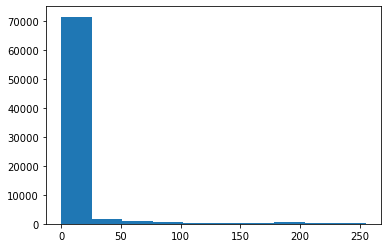

In [111]:
rows, cols = np.nonzero(gradient)
plt.hist(gradient[rows, cols], bins=10)

(225, 225)


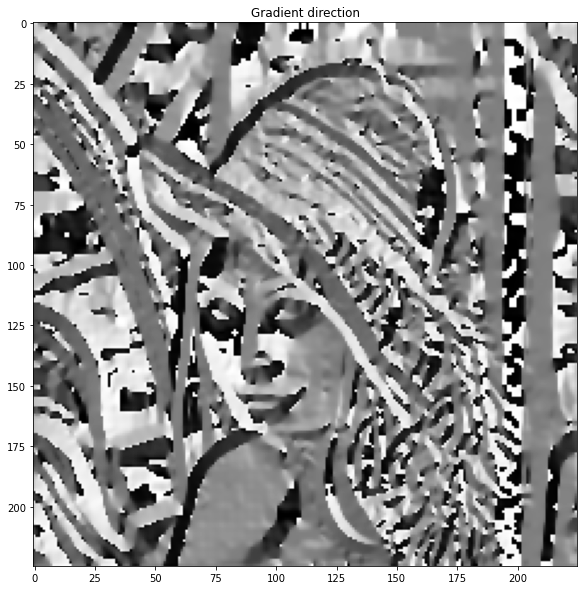

In [175]:
theta = np.arctan2(im_y, im_x)

img(theta, 'Gradient direction')

# rows, cols = np.nonzero(theta)
# plt.hist(theta[rows, cols])

## Edge image according to the threshold criteria
Each pixel at which the gradient magnitude exceeds a given threshold is displayed.

(225, 225)


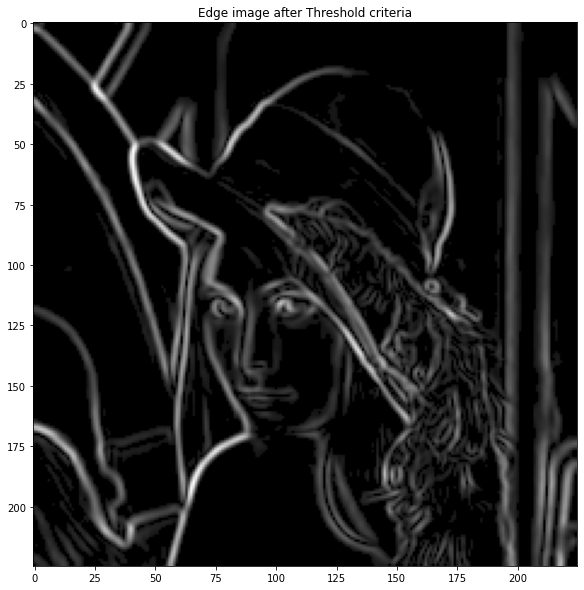

In [176]:
thresh=20;
# TODO: Implement Thresholding
thresholdEdges = (gradient > thresh) * gradient

img(thresholdEdges, 'Edge image after Threshold criteria')

(array([16893., 12156.,  9105.,  6216.,  3746.,  2512.,  2518.,  1473.,
         1019.,   465.,  1027.,  1683.,   877.,   140.,    87.,   116.,
          132.,   131.,   872.,   249.]),
 array([ 40.00002697,  50.75002562,  61.50002428,  72.25002293,
         83.00002158,  93.75002023, 104.50001888, 115.25001753,
        126.00001618, 136.75001483, 147.50001349, 158.25001214,
        169.00001079, 179.75000944, 190.50000809, 201.25000674,
        212.00000539, 222.75000405, 233.5000027 , 244.25000135,
        255.        ]),
 <BarContainer object of 20 artists>)

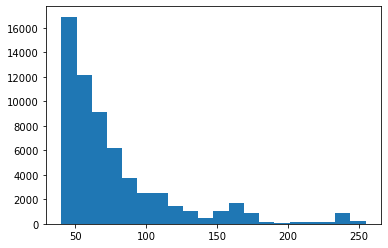

In [157]:
rows, cols = np.nonzero(thresholdEdges)
plt.hist(thresholdEdges[rows, cols], bins=20)

## Non-Maximum-Suppression
Each pixel which fulfills the threshold criterion and has a larger gradient magnitude than its adjacent pixels in the direction orthogonal to the edge is displayed.

(225, 225)


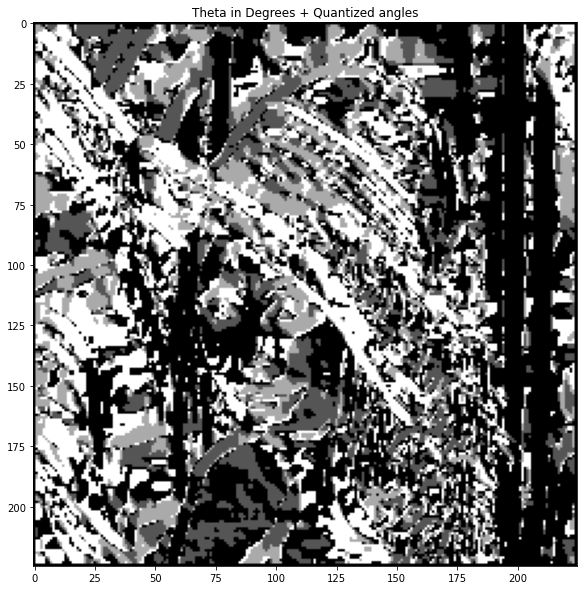

In [177]:
# TODO: Implement Non-Maximum Suppression

###### Convert to degree ######
theta_deg = np.rad2deg(theta)
theta_deg[theta_deg < 0] += 180

###### Quantize angles ######
M, N = theta_deg.shape
theta_deg_quant = np.zeros((M,N), dtype=np.int32)
for i in range(1,M-1):
    for j in range(1,N-1):
        cont_angle = theta_deg[i,j]
        #angle 0
        if (0 <= cont_angle < 22.5) or (157.5 <= cont_angle <= 180):
            angle = 0
        #angle 45
        elif (22.5 <= cont_angle < 67.5):
            angle = 45
        #angle 90
        elif (67.5 <= cont_angle < 112.5):
            angle = 90
        #angle 135
        elif (112.5 <= cont_angle < 157.5):
            angle = 135
        else:
            assert False, f"Sth wrong: {cont_angle}"
            
        theta_deg_quant[i,j] = angle
        
img(theta_deg_quant, 'Theta in Degrees + Quantized angles')

(array([18485.,     0.,     0.,     0.,     0., 19398.,     0.,     0.,
            0., 18098.]),
 array([ 45.,  54.,  63.,  72.,  81.,  90.,  99., 108., 117., 126., 135.]),
 <BarContainer object of 10 artists>)

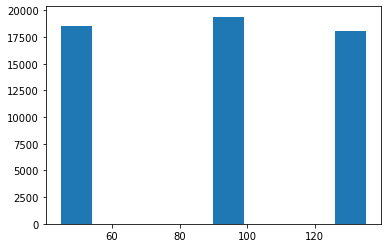

In [140]:
rows, cols = np.nonzero(theta_deg_quant)
plt.hist(theta_deg_quant[rows, cols])

(225, 225)


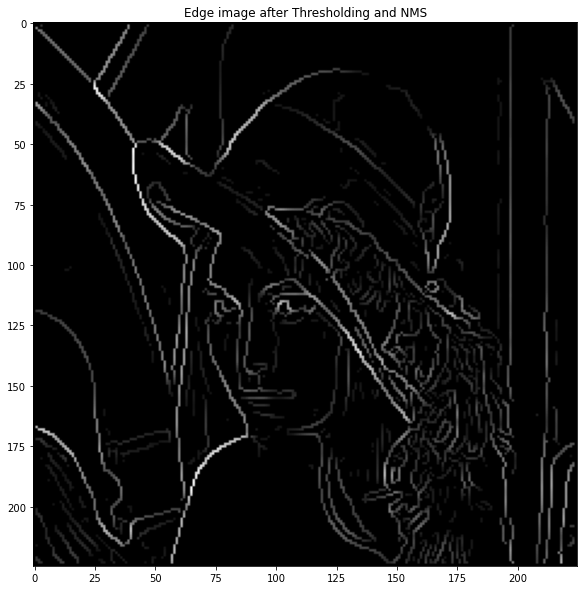

In [178]:
###### Non-maximum suppression ########
### ...
### ...
edges = np.zeros((M,N), dtype=np.int32)
for i in range(1,M-1):
    for j in range(1,N-1):
        gradient_angle = theta_deg_quant[i,j]
        
        if gradient_angle == 0:
            adj1 = thresholdEdges[i, j + 1]
            adj2 = thresholdEdges[i, j - 1]
            
        elif gradient_angle == 45:
            adj1 = thresholdEdges[i + 1, j + 1]
            adj2 = thresholdEdges[i - 1, j - 1]
            
        elif gradient_angle == 90:
            adj1 = thresholdEdges[i + 1, j]
            adj2 = thresholdEdges[i - 1, j]
            
        elif gradient_angle == 135:
            adj1 = thresholdEdges[i + 1, j - 1]
            adj2 = thresholdEdges[i - 1, j + 1]
        
        else:
            assert False, f"Sth wrong: {gradient_angle}"

            
        if adj1 < thresholdEdges[i, j] and adj2 < thresholdEdges[i, j]:
            edges[i, j] = thresholdEdges[i, j]
            
img(edges, 'Edge image after Thresholding and NMS')

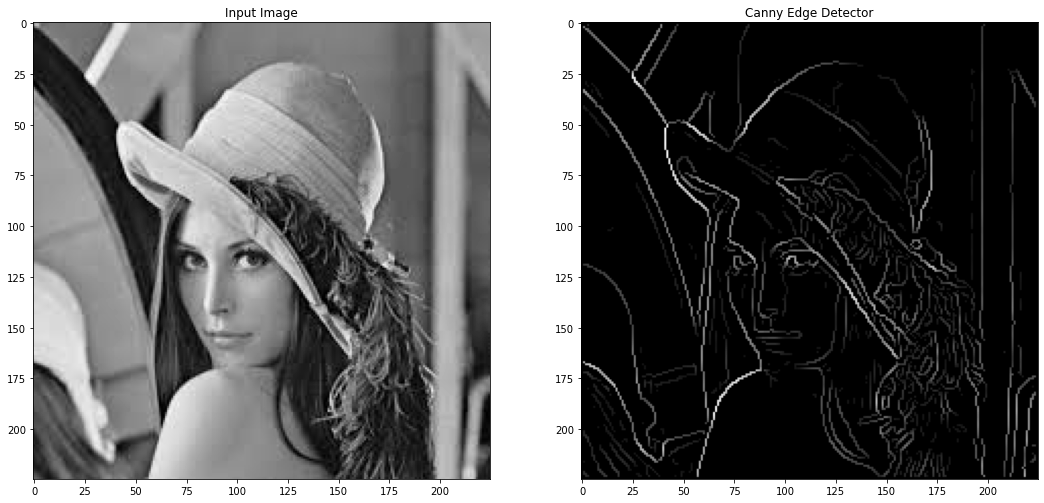

In [179]:
# Plotting of results
# No need to change it
f, ax_arr = plt.subplots(1, 2, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Canny Edge Detector")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(edges, cmap='gray')